<a href="https://colab.research.google.com/github/rich7420/CNN-Assignment-2025/blob/main/CNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CNN Classroom Exercise: Image Classification with CIFAR-10
# Objective: Practice building, training, and evaluating a CNN using TensorFlow/Keras
# Environment: Google Colab with GPU
# Dataset: CIFAR-10 (10 classes of 32x32 color images)

# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Step 2: Load and Preprocess CIFAR-10 Dataset
# CIFAR-10 contains 60,000 32x32 color images in 10 classes (e.g., airplane, cat, dog)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Normalize pixel values to range [0, 1]
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
train_generator = train_datagen.flow(train_images, train_labels, batch_size=64)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow(test_images, test_labels, batch_size=64)

# Define class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

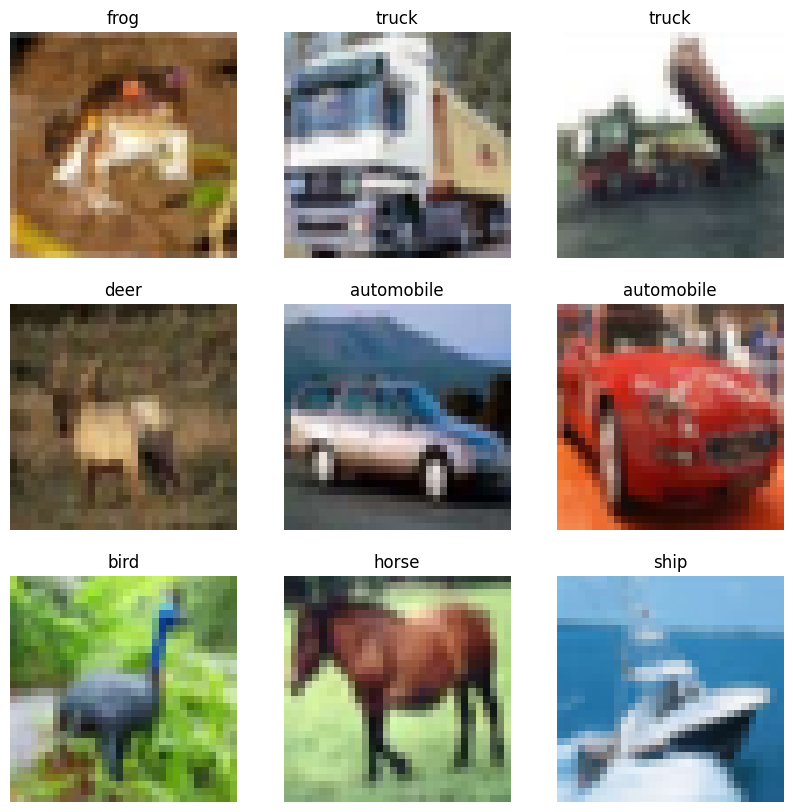

In [3]:
# Step 3: Visualize Sample Data
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()

In [4]:
from tensorflow.keras import regularizers
model = models.Sequential([
    # Conv Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    # Conv Layer 2
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    # Conv Layer 3
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),

    # Conv Layer 4
    layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),

    # Dense Layer 1
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    # Output Layer
    layers.Dense(10, activation='softmax')
])

model.summary()


c:\Users\user\anaconda3\envs\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,153,514 (4.40 MB)

 Trainable params: 1,153,002 (4.40 MB)

 Non-trainable params: 512 (2.00 KB)

In [5]:
# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Step 6: Train the Model
from tensorflow.keras.callbacks import EarlyStopping


early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=100,
    callbacks=[early_stop]
)


Epoch 1/100


c:\Users\user\anaconda3\envs\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/782 ━━━━━━━━━━━━━━━━━━━━ 32:56 3s/step - accuracy: 0.0469 - loss: 5.4754

  2/782 ━━━━━━━━━━━━━━━━━━━━ 1:21 105ms/step - accuracy: 0.0664 - loss: 5.7369

  3/782 ━━━━━━━━━━━━━━━━━━━━ 1:25 109ms/step - accuracy: 0.0738 - loss: 6.0795

  4/782 ━━━━━━━━━━━━━━━━━━━━ 1:23 107ms/step - accuracy: 0.0837 - loss: 6.0401

  5/782 ━━━━━━━━━━━━━━━━━━━━ 1:33 120ms/step - accuracy: 0.0944 - loss: 5.9591

  6/782 ━━━━━━━━━━━━━━━━━━━━ 1:29 116ms/step - accuracy: 0.1026 - loss: 5.8461

  7/782 ━━━━━━━━━━━━━━━━━━━━ 1:29 116ms/step - accuracy: 0.1096 - loss: 5.7167

  8/782 ━━━━━━━━━━━━━━━━━━━━ 1:29 116ms/step - accuracy: 0.1159 - loss: 5.5783

  9/782 ━━━━━━━━━━━━━━━━━━━━ 1:28 115ms/step - accuracy: 0.1208 - loss: 5.4444

 10/782 ━━━━━━━━━━━━━━━━━━━━ 1:27 113ms/step - accuracy: 0.1248 - loss: 5.3170

 11/782 ━━━━━━━━━━━━━━━━━━━━ 1:26 112ms/step - accuracy: 0.1280 - loss: 5.1983

 12/782 ━━━━━━━━━━━━━━━━━━━━ 1:25 111ms/step - accuracy: 0.1304 - loss: 5.0884

 13/782 ━━━━━━━━━━━━━━━━━━━━ 1:25 111ms/step - accuracy: 0.1320 - loss: 4.9863

 14/782 ━━━━━━━━━━━━━━━━━━━━ 1:24 110ms/step - accuracy: 0.1341 - loss: 4.8907

 15/782 ━━━━━━━━━━━━━━━━━━━━ 1:23 109ms/step - accuracy: 0.1360 - loss: 4.8018

 16/782 ━━━━━━━━━━━━━━━━━━━━ 1:24 110ms/step - accuracy: 0.1374 - loss: 4.7193

 17/782 ━━━━━━━━━━━━━━━━━━━━ 1:23 109ms/step - accuracy: 0.1387 - loss: 4.6421

 18/782 ━━━━━━━━━━━━━━━━━━━━ 1:23 109ms/step - accuracy: 0.1401 - loss: 4.5701

 19/782 ━━━━━━━━━━━━━━━━━━━━ 1:22 108ms/step - accuracy: 0.1416 - loss: 4.5025

 20/782 ━━━━━━━━━━━━━━━━━━━━ 1:21 107ms/step - accuracy: 0.1431 - loss: 4.4392

 21/782 ━━━━━━━━━━━━━━━━━━━━ 1:20 106ms/step - accuracy: 0.1446 - loss: 4.3799

 22/782 ━━━━━━━━━━━━━━━━━━━━ 1:20 106ms/step - accuracy: 0.1459 - loss: 4.3244

 23/782 ━━━━━━━━━━━━━━━━━━━━ 1:20 106ms/step - accuracy: 0.1473 - loss: 4.2721

 24/782 ━━━━━━━━━━━━━━━━━━━━ 1:19 106ms/step - accuracy: 0.1487 - loss: 4.2225

 25/782 ━━━━━━━━━━━━━━━━━━━━ 1:19 105ms/step - accuracy: 0.1502 - loss: 4.1756

 26/782 ━━━━━━━━━━━━━━━━━━━━ 1:19 105ms/step - accuracy: 0.1516 - loss: 4.1312

 27/782 ━━━━━━━━━━━━━━━━━━━━ 1:19 106ms/step - accuracy: 0.1529 - loss: 4.0894

 28/782 ━━━━━━━━━━━━━━━━━━━━ 1:19 105ms/step - accuracy: 0.1542 - loss: 4.0494

 29/782 ━━━━━━━━━━━━━━━━━━━━ 1:19 105ms/step - accuracy: 0.1555 - loss: 4.0114

 30/782 ━━━━━━━━━━━━━━━━━━━━ 1:19 105ms/step - accuracy: 0.1567 - loss: 3.9752

 31/782 ━━━━━━━━━━━━━━━━━━━━ 1:18 105ms/step - accuracy: 0.1578 - loss: 3.9407

 32/782 ━━━━━━━━━━━━━━━━━━━━ 1:18 105ms/step - accuracy: 0.1590 - loss: 3.9077

 33/782 ━━━━━━━━━━━━━━━━━━━━ 1:19 106ms/step - accuracy: 0.1600 - loss: 3.8762

 34/782 ━━━━━━━━━━━━━━━━━━━━ 1:19 106ms/step - accuracy: 0.1610 - loss: 3.8460

 35/782 ━━━━━━━━━━━━━━━━━━━━ 1:18 106ms/step - accuracy: 0.1621 - loss: 3.8169

 36/782 ━━━━━━━━━━━━━━━━━━━━ 1:18 105ms/step - accuracy: 0.1631 - loss: 3.7891

 37/782 ━━━━━━━━━━━━━━━━━━━━ 1:18 105ms/step - accuracy: 0.1641 - loss: 3.7623

 38/782 ━━━━━━━━━━━━━━━━━━━━ 1:18 105ms/step - accuracy: 0.1650 - loss: 3.7367

 39/782 ━━━━━━━━━━━━━━━━━━━━ 1:17 105ms/step - accuracy: 0.1659 - loss: 3.7119

 40/782 ━━━━━━━━━━━━━━━━━━━━ 1:17 105ms/step - accuracy: 0.1668 - loss: 3.6880

 41/782 ━━━━━━━━━━━━━━━━━━━━ 1:17 105ms/step - accuracy: 0.1678 - loss: 3.6650

 42/782 ━━━━━━━━━━━━━━━━━━━━ 1:17 105ms/step - accuracy: 0.1688 - loss: 3.6427

 43/782 ━━━━━━━━━━━━━━━━━━━━ 1:17 105ms/step - accuracy: 0.1697 - loss: 3.6212

 44/782 ━━━━━━━━━━━━━━━━━━━━ 1:17 105ms/step - accuracy: 0.1706 - loss: 3.6003

 45/782 ━━━━━━━━━━━━━━━━━━━━ 1:17 106ms/step - accuracy: 0.1715 - loss: 3.5802

 46/782 ━━━━━━━━━━━━━━━━━━━━ 1:17 105ms/step - accuracy: 0.1723 - loss: 3.5607

 47/782 ━━━━━━━━━━━━━━━━━━━━ 1:17 105ms/step - accuracy: 0.1732 - loss: 3.5419

 48/782 ━━━━━━━━━━━━━━━━━━━━ 1:17 105ms/step - accuracy: 0.1740 - loss: 3.5238

 49/782 ━━━━━━━━━━━━━━━━━━━━ 1:17 105ms/step - accuracy: 0.1748 - loss: 3.5061

 50/782 ━━━━━━━━━━━━━━━━━━━━ 1:16 105ms/step - accuracy: 0.1756 - loss: 3.4889

 51/782 ━━━━━━━━━━━━━━━━━━━━ 1:16 105ms/step - accuracy: 0.1764 - loss: 3.4723

 52/782 ━━━━━━━━━━━━━━━━━━━━ 1:16 105ms/step - accuracy: 0.1772 - loss: 3.4560

 53/782 ━━━━━━━━━━━━━━━━━━━━ 1:16 105ms/step - accuracy: 0.1780 - loss: 3.4402

 54/782 ━━━━━━━━━━━━━━━━━━━━ 1:16 105ms/step - accuracy: 0.1788 - loss: 3.4247

 55/782 ━━━━━━━━━━━━━━━━━━━━ 1:15 105ms/step - accuracy: 0.1796 - loss: 3.4098

 56/782 ━━━━━━━━━━━━━━━━━━━━ 1:15 104ms/step - accuracy: 0.1804 - loss: 3.3952

 57/782 ━━━━━━━━━━━━━━━━━━━━ 1:15 104ms/step - accuracy: 0.1811 - loss: 3.3810

 58/782 ━━━━━━━━━━━━━━━━━━━━ 1:15 104ms/step - accuracy: 0.1819 - loss: 3.3672

 59/782 ━━━━━━━━━━━━━━━━━━━━ 1:15 104ms/step - accuracy: 0.1826 - loss: 3.3537

 60/782 ━━━━━━━━━━━━━━━━━━━━ 1:15 105ms/step - accuracy: 0.1833 - loss: 3.3405

 61/782 ━━━━━━━━━━━━━━━━━━━━ 1:15 105ms/step - accuracy: 0.1840 - loss: 3.3278

 62/782 ━━━━━━━━━━━━━━━━━━━━ 1:15 104ms/step - accuracy: 0.1847 - loss: 3.3153

 63/782 ━━━━━━━━━━━━━━━━━━━━ 1:14 104ms/step - accuracy: 0.1854 - loss: 3.3031

 64/782 ━━━━━━━━━━━━━━━━━━━━ 1:14 104ms/step - accuracy: 0.1861 - loss: 3.2912

 65/782 ━━━━━━━━━━━━━━━━━━━━ 1:14 104ms/step - accuracy: 0.1867 - loss: 3.2796

 66/782 ━━━━━━━━━━━━━━━━━━━━ 1:14 104ms/step - accuracy: 0.1874 - loss: 3.2682

 67/782 ━━━━━━━━━━━━━━━━━━━━ 1:14 104ms/step - accuracy: 0.1880 - loss: 3.2571

 68/782 ━━━━━━━━━━━━━━━━━━━━ 1:14 104ms/step - accuracy: 0.1886 - loss: 3.2462

 69/782 ━━━━━━━━━━━━━━━━━━━━ 1:13 104ms/step - accuracy: 0.1892 - loss: 3.2355

 70/782 ━━━━━━━━━━━━━━━━━━━━ 1:13 104ms/step - accuracy: 0.1898 - loss: 3.2250

 71/782 ━━━━━━━━━━━━━━━━━━━━ 1:13 103ms/step - accuracy: 0.1904 - loss: 3.2148

 72/782 ━━━━━━━━━━━━━━━━━━━━ 1:13 103ms/step - accuracy: 0.1909 - loss: 3.2048

 73/782 ━━━━━━━━━━━━━━━━━━━━ 1:12 103ms/step - accuracy: 0.1915 - loss: 3.1950

 74/782 ━━━━━━━━━━━━━━━━━━━━ 1:12 103ms/step - accuracy: 0.1920 - loss: 3.1854

 75/782 ━━━━━━━━━━━━━━━━━━━━ 1:12 103ms/step - accuracy: 0.1926 - loss: 3.1760

 76/782 ━━━━━━━━━━━━━━━━━━━━ 1:12 103ms/step - accuracy: 0.1931 - loss: 3.1668

 77/782 ━━━━━━━━━━━━━━━━━━━━ 1:12 103ms/step - accuracy: 0.1936 - loss: 3.1577

 78/782 ━━━━━━━━━━━━━━━━━━━━ 1:12 103ms/step - accuracy: 0.1941 - loss: 3.1488

 79/782 ━━━━━━━━━━━━━━━━━━━━ 1:12 103ms/step - accuracy: 0.1945 - loss: 3.1402

 80/782 ━━━━━━━━━━━━━━━━━━━━ 1:12 103ms/step - accuracy: 0.1950 - loss: 3.1317

 81/782 ━━━━━━━━━━━━━━━━━━━━ 1:12 103ms/step - accuracy: 0.1955 - loss: 3.1233

 82/782 ━━━━━━━━━━━━━━━━━━━━ 1:11 103ms/step - accuracy: 0.1959 - loss: 3.1151

 83/782 ━━━━━━━━━━━━━━━━━━━━ 1:11 103ms/step - accuracy: 0.1964 - loss: 3.1070

 84/782 ━━━━━━━━━━━━━━━━━━━━ 1:11 103ms/step - accuracy: 0.1968 - loss: 3.0990

 85/782 ━━━━━━━━━━━━━━━━━━━━ 1:11 103ms/step - accuracy: 0.1973 - loss: 3.0912

 86/782 ━━━━━━━━━━━━━━━━━━━━ 1:11 103ms/step - accuracy: 0.1977 - loss: 3.0836

 87/782 ━━━━━━━━━━━━━━━━━━━━ 1:11 102ms/step - accuracy: 0.1982 - loss: 3.0760

 88/782 ━━━━━━━━━━━━━━━━━━━━ 1:11 102ms/step - accuracy: 0.1986 - loss: 3.0686

 89/782 ━━━━━━━━━━━━━━━━━━━━ 1:10 102ms/step - accuracy: 0.1990 - loss: 3.0613

 90/782 ━━━━━━━━━━━━━━━━━━━━ 1:10 102ms/step - accuracy: 0.1995 - loss: 3.0541

 91/782 ━━━━━━━━━━━━━━━━━━━━ 1:10 102ms/step - accuracy: 0.1999 - loss: 3.0470

 92/782 ━━━━━━━━━━━━━━━━━━━━ 1:10 102ms/step - accuracy: 0.2003 - loss: 3.0400

 93/782 ━━━━━━━━━━━━━━━━━━━━ 1:10 102ms/step - accuracy: 0.2007 - loss: 3.0332

 94/782 ━━━━━━━━━━━━━━━━━━━━ 1:10 102ms/step - accuracy: 0.2011 - loss: 3.0264

 95/782 ━━━━━━━━━━━━━━━━━━━━ 1:10 102ms/step - accuracy: 0.2015 - loss: 3.0198

 96/782 ━━━━━━━━━━━━━━━━━━━━ 1:09 102ms/step - accuracy: 0.2019 - loss: 3.0133

 97/782 ━━━━━━━━━━━━━━━━━━━━ 1:09 102ms/step - accuracy: 0.2023 - loss: 3.0068

 98/782 ━━━━━━━━━━━━━━━━━━━━ 1:09 102ms/step - accuracy: 0.2027 - loss: 3.0005

 99/782 ━━━━━━━━━━━━━━━━━━━━ 1:09 102ms/step - accuracy: 0.2031 - loss: 2.9943

100/782 ━━━━━━━━━━━━━━━━━━━━ 1:09 102ms/step - accuracy: 0.2034 - loss: 2.9881

101/782 ━━━━━━━━━━━━━━━━━━━━ 1:09 102ms/step - accuracy: 0.2038 - loss: 2.9820

102/782 ━━━━━━━━━━━━━━━━━━━━ 1:09 102ms/step - accuracy: 0.2042 - loss: 2.9760

103/782 ━━━━━━━━━━━━━━━━━━━━ 1:09 102ms/step - accuracy: 0.2046 - loss: 2.9701

104/782 ━━━━━━━━━━━━━━━━━━━━ 1:08 102ms/step - accuracy: 0.2049 - loss: 2.9643

105/782 ━━━━━━━━━━━━━━━━━━━━ 1:08 102ms/step - accuracy: 0.2053 - loss: 2.9586

106/782 ━━━━━━━━━━━━━━━━━━━━ 1:08 102ms/step - accuracy: 0.2056 - loss: 2.9530

107/782 ━━━━━━━━━━━━━━━━━━━━ 1:08 102ms/step - accuracy: 0.2060 - loss: 2.9475

108/782 ━━━━━━━━━━━━━━━━━━━━ 1:08 101ms/step - accuracy: 0.2063 - loss: 2.9420

109/782 ━━━━━━━━━━━━━━━━━━━━ 1:08 101ms/step - accuracy: 0.2066 - loss: 2.9366

110/782 ━━━━━━━━━━━━━━━━━━━━ 1:08 101ms/step - accuracy: 0.2070 - loss: 2.9313

111/782 ━━━━━━━━━━━━━━━━━━━━ 1:07 101ms/step - accuracy: 0.2073 - loss: 2.9261

112/782 ━━━━━━━━━━━━━━━━━━━━ 1:07 101ms/step - accuracy: 0.2076 - loss: 2.9209

113/782 ━━━━━━━━━━━━━━━━━━━━ 1:07 101ms/step - accuracy: 0.2080 - loss: 2.9159

114/782 ━━━━━━━━━━━━━━━━━━━━ 1:07 101ms/step - accuracy: 0.2083 - loss: 2.9108

115/782 ━━━━━━━━━━━━━━━━━━━━ 1:07 101ms/step - accuracy: 0.2086 - loss: 2.9059

116/782 ━━━━━━━━━━━━━━━━━━━━ 1:07 101ms/step - accuracy: 0.2089 - loss: 2.9010

117/782 ━━━━━━━━━━━━━━━━━━━━ 1:07 101ms/step - accuracy: 0.2092 - loss: 2.8962

118/782 ━━━━━━━━━━━━━━━━━━━━ 1:06 101ms/step - accuracy: 0.2095 - loss: 2.8915

119/782 ━━━━━━━━━━━━━━━━━━━━ 1:06 101ms/step - accuracy: 0.2098 - loss: 2.8868

120/782 ━━━━━━━━━━━━━━━━━━━━ 1:06 101ms/step - accuracy: 0.2101 - loss: 2.8821

121/782 ━━━━━━━━━━━━━━━━━━━━ 1:06 100ms/step - accuracy: 0.2104 - loss: 2.8775

122/782 ━━━━━━━━━━━━━━━━━━━━ 1:06 100ms/step - accuracy: 0.2107 - loss: 2.8730

123/782 ━━━━━━━━━━━━━━━━━━━━ 1:06 100ms/step - accuracy: 0.2110 - loss: 2.8686

124/782 ━━━━━━━━━━━━━━━━━━━━ 1:06 100ms/step - accuracy: 0.2113 - loss: 2.8642

125/782 ━━━━━━━━━━━━━━━━━━━━ 1:05 100ms/step - accuracy: 0.2116 - loss: 2.8598

126/782 ━━━━━━━━━━━━━━━━━━━━ 1:05 100ms/step - accuracy: 0.2119 - loss: 2.8556

127/782 ━━━━━━━━━━━━━━━━━━━━ 1:05 100ms/step - accuracy: 0.2121 - loss: 2.8513

128/782 ━━━━━━━━━━━━━━━━━━━━ 1:05 100ms/step - accuracy: 0.2124 - loss: 2.8471

129/782 ━━━━━━━━━━━━━━━━━━━━ 1:05 100ms/step - accuracy: 0.2127 - loss: 2.8430

130/782 ━━━━━━━━━━━━━━━━━━━━ 1:05 100ms/step - accuracy: 0.2130 - loss: 2.8389

131/782 ━━━━━━━━━━━━━━━━━━━━ 1:05 100ms/step - accuracy: 0.2132 - loss: 2.8348

132/782 ━━━━━━━━━━━━━━━━━━━━ 1:04 100ms/step - accuracy: 0.2135 - loss: 2.8308

133/782 ━━━━━━━━━━━━━━━━━━━━ 1:04 100ms/step - accuracy: 0.2138 - loss: 2.8269

134/782 ━━━━━━━━━━━━━━━━━━━━ 1:04 100ms/step - accuracy: 0.2140 - loss: 2.8230

135/782 ━━━━━━━━━━━━━━━━━━━━ 1:04 100ms/step - accuracy: 0.2143 - loss: 2.8191

136/782 ━━━━━━━━━━━━━━━━━━━━ 1:04 100ms/step - accuracy: 0.2145 - loss: 2.8153

137/782 ━━━━━━━━━━━━━━━━━━━━ 1:04 100ms/step - accuracy: 0.2148 - loss: 2.8115

138/782 ━━━━━━━━━━━━━━━━━━━━ 1:04 99ms/step - accuracy: 0.2150 - loss: 2.8078 

139/782 ━━━━━━━━━━━━━━━━━━━━ 1:03 99ms/step - accuracy: 0.2153 - loss: 2.8041

140/782 ━━━━━━━━━━━━━━━━━━━━ 1:03 99ms/step - accuracy: 0.2155 - loss: 2.8004

141/782 ━━━━━━━━━━━━━━━━━━━━ 1:03 99ms/step - accuracy: 0.2158 - loss: 2.7968

142/782 ━━━━━━━━━━━━━━━━━━━━ 1:03 99ms/step - accuracy: 0.2160 - loss: 2.7932

143/782 ━━━━━━━━━━━━━━━━━━━━ 1:03 99ms/step - accuracy: 0.2163 - loss: 2.7896

144/782 ━━━━━━━━━━━━━━━━━━━━ 1:03 99ms/step - accuracy: 0.2165 - loss: 2.7861

145/782 ━━━━━━━━━━━━━━━━━━━━ 1:03 99ms/step - accuracy: 0.2168 - loss: 2.7826

146/782 ━━━━━━━━━━━━━━━━━━━━ 1:03 99ms/step - accuracy: 0.2170 - loss: 2.7791

147/782 ━━━━━━━━━━━━━━━━━━━━ 1:03 99ms/step - accuracy: 0.2173 - loss: 2.7757

148/782 ━━━━━━━━━━━━━━━━━━━━ 1:02 99ms/step - accuracy: 0.2175 - loss: 2.7722

149/782 ━━━━━━━━━━━━━━━━━━━━ 1:02 99ms/step - accuracy: 0.2177 - loss: 2.7689

150/782 ━━━━━━━━━━━━━━━━━━━━ 1:02 99ms/step - accuracy: 0.2180 - loss: 2.7655

151/782 ━━━━━━━━━━━━━━━━━━━━ 1:02 99ms/step - accuracy: 0.2182 - loss: 2.7622

152/782 ━━━━━━━━━━━━━━━━━━━━ 1:02 99ms/step - accuracy: 0.2185 - loss: 2.7589

153/782 ━━━━━━━━━━━━━━━━━━━━ 1:02 99ms/step - accuracy: 0.2187 - loss: 2.7557

154/782 ━━━━━━━━━━━━━━━━━━━━ 1:02 99ms/step - accuracy: 0.2190 - loss: 2.7524

155/782 ━━━━━━━━━━━━━━━━━━━━ 1:02 99ms/step - accuracy: 0.2192 - loss: 2.7492

156/782 ━━━━━━━━━━━━━━━━━━━━ 1:02 99ms/step - accuracy: 0.2195 - loss: 2.7461

157/782 ━━━━━━━━━━━━━━━━━━━━ 1:02 99ms/step - accuracy: 0.2197 - loss: 2.7429

158/782 ━━━━━━━━━━━━━━━━━━━━ 1:01 99ms/step - accuracy: 0.2200 - loss: 2.7398

159/782 ━━━━━━━━━━━━━━━━━━━━ 1:01 99ms/step - accuracy: 0.2202 - loss: 2.7368

160/782 ━━━━━━━━━━━━━━━━━━━━ 1:01 99ms/step - accuracy: 0.2205 - loss: 2.7337

161/782 ━━━━━━━━━━━━━━━━━━━━ 1:01 99ms/step - accuracy: 0.2207 - loss: 2.7307

162/782 ━━━━━━━━━━━━━━━━━━━━ 1:01 99ms/step - accuracy: 0.2210 - loss: 2.7277

163/782 ━━━━━━━━━━━━━━━━━━━━ 1:01 99ms/step - accuracy: 0.2212 - loss: 2.7247

164/782 ━━━━━━━━━━━━━━━━━━━━ 1:01 99ms/step - accuracy: 0.2215 - loss: 2.7217

165/782 ━━━━━━━━━━━━━━━━━━━━ 1:01 99ms/step - accuracy: 0.2217 - loss: 2.7188

166/782 ━━━━━━━━━━━━━━━━━━━━ 1:00 99ms/step - accuracy: 0.2219 - loss: 2.7159

167/782 ━━━━━━━━━━━━━━━━━━━━ 1:00 99ms/step - accuracy: 0.2222 - loss: 2.7130

168/782 ━━━━━━━━━━━━━━━━━━━━ 1:00 99ms/step - accuracy: 0.2224 - loss: 2.7102

169/782 ━━━━━━━━━━━━━━━━━━━━ 1:00 99ms/step - accuracy: 0.2227 - loss: 2.7073

170/782 ━━━━━━━━━━━━━━━━━━━━ 1:00 99ms/step - accuracy: 0.2229 - loss: 2.7045

171/782 ━━━━━━━━━━━━━━━━━━━━ 1:00 99ms/step - accuracy: 0.2231 - loss: 2.7017

172/782 ━━━━━━━━━━━━━━━━━━━━ 1:00 99ms/step - accuracy: 0.2234 - loss: 2.6990

173/782 ━━━━━━━━━━━━━━━━━━━━ 1:00 99ms/step - accuracy: 0.2236 - loss: 2.6962

174/782 ━━━━━━━━━━━━━━━━━━━━ 1:00 99ms/step - accuracy: 0.2239 - loss: 2.6935

175/782 ━━━━━━━━━━━━━━━━━━━━ 1:00 99ms/step - accuracy: 0.2241 - loss: 2.6908

176/782 ━━━━━━━━━━━━━━━━━━━━ 1:00 99ms/step - accuracy: 0.2243 - loss: 2.6882

177/782 ━━━━━━━━━━━━━━━━━━━━ 59s 99ms/step - accuracy: 0.2246 - loss: 2.6855 

178/782 ━━━━━━━━━━━━━━━━━━━━ 59s 99ms/step - accuracy: 0.2248 - loss: 2.6829

179/782 ━━━━━━━━━━━━━━━━━━━━ 59s 99ms/step - accuracy: 0.2250 - loss: 2.6803

180/782 ━━━━━━━━━━━━━━━━━━━━ 59s 99ms/step - accuracy: 0.2253 - loss: 2.6777

181/782 ━━━━━━━━━━━━━━━━━━━━ 59s 99ms/step - accuracy: 0.2255 - loss: 2.6752

182/782 ━━━━━━━━━━━━━━━━━━━━ 59s 99ms/step - accuracy: 0.2257 - loss: 2.6726

183/782 ━━━━━━━━━━━━━━━━━━━━ 59s 99ms/step - accuracy: 0.2259 - loss: 2.6701

184/782 ━━━━━━━━━━━━━━━━━━━━ 59s 99ms/step - accuracy: 0.2261 - loss: 2.6676

185/782 ━━━━━━━━━━━━━━━━━━━━ 59s 99ms/step - accuracy: 0.2264 - loss: 2.6651

186/782 ━━━━━━━━━━━━━━━━━━━━ 59s 99ms/step - accuracy: 0.2266 - loss: 2.6626

187/782 ━━━━━━━━━━━━━━━━━━━━ 59s 99ms/step - accuracy: 0.2268 - loss: 2.6601

188/782 ━━━━━━━━━━━━━━━━━━━━ 58s 99ms/step - accuracy: 0.2270 - loss: 2.6577

189/782 ━━━━━━━━━━━━━━━━━━━━ 58s 99ms/step - accuracy: 0.2273 - loss: 2.6553

190/782 ━━━━━━━━━━━━━━━━━━━━ 58s 99ms/step - accuracy: 0.2275 - loss: 2.6529

191/782 ━━━━━━━━━━━━━━━━━━━━ 58s 99ms/step - accuracy: 0.2277 - loss: 2.6505

192/782 ━━━━━━━━━━━━━━━━━━━━ 58s 99ms/step - accuracy: 0.2279 - loss: 2.6481

193/782 ━━━━━━━━━━━━━━━━━━━━ 58s 99ms/step - accuracy: 0.2281 - loss: 2.6458

194/782 ━━━━━━━━━━━━━━━━━━━━ 58s 99ms/step - accuracy: 0.2283 - loss: 2.6434

195/782 ━━━━━━━━━━━━━━━━━━━━ 58s 99ms/step - accuracy: 0.2286 - loss: 2.6411

196/782 ━━━━━━━━━━━━━━━━━━━━ 58s 99ms/step - accuracy: 0.2288 - loss: 2.6388

197/782 ━━━━━━━━━━━━━━━━━━━━ 58s 99ms/step - accuracy: 0.2290 - loss: 2.6365

198/782 ━━━━━━━━━━━━━━━━━━━━ 58s 99ms/step - accuracy: 0.2292 - loss: 2.6342

199/782 ━━━━━━━━━━━━━━━━━━━━ 57s 99ms/step - accuracy: 0.2294 - loss: 2.6320

200/782 ━━━━━━━━━━━━━━━━━━━━ 57s 99ms/step - accuracy: 0.2296 - loss: 2.6297

201/782 ━━━━━━━━━━━━━━━━━━━━ 57s 99ms/step - accuracy: 0.2298 - loss: 2.6275

202/782 ━━━━━━━━━━━━━━━━━━━━ 57s 99ms/step - accuracy: 0.2300 - loss: 2.6252

203/782 ━━━━━━━━━━━━━━━━━━━━ 57s 99ms/step - accuracy: 0.2303 - loss: 2.6230

204/782 ━━━━━━━━━━━━━━━━━━━━ 57s 99ms/step - accuracy: 0.2305 - loss: 2.6208

205/782 ━━━━━━━━━━━━━━━━━━━━ 57s 99ms/step - accuracy: 0.2307 - loss: 2.6186

206/782 ━━━━━━━━━━━━━━━━━━━━ 57s 99ms/step - accuracy: 0.2309 - loss: 2.6165

207/782 ━━━━━━━━━━━━━━━━━━━━ 57s 99ms/step - accuracy: 0.2311 - loss: 2.6143

208/782 ━━━━━━━━━━━━━━━━━━━━ 57s 99ms/step - accuracy: 0.2313 - loss: 2.6122

209/782 ━━━━━━━━━━━━━━━━━━━━ 56s 99ms/step - accuracy: 0.2315 - loss: 2.6101

210/782 ━━━━━━━━━━━━━━━━━━━━ 56s 99ms/step - accuracy: 0.2317 - loss: 2.6080

211/782 ━━━━━━━━━━━━━━━━━━━━ 56s 99ms/step - accuracy: 0.2320 - loss: 2.6059

212/782 ━━━━━━━━━━━━━━━━━━━━ 56s 99ms/step - accuracy: 0.2322 - loss: 2.6038

213/782 ━━━━━━━━━━━━━━━━━━━━ 56s 99ms/step - accuracy: 0.2324 - loss: 2.6017

214/782 ━━━━━━━━━━━━━━━━━━━━ 56s 99ms/step - accuracy: 0.2326 - loss: 2.5996

215/782 ━━━━━━━━━━━━━━━━━━━━ 56s 99ms/step - accuracy: 0.2328 - loss: 2.5976

216/782 ━━━━━━━━━━━━━━━━━━━━ 56s 99ms/step - accuracy: 0.2330 - loss: 2.5956

217/782 ━━━━━━━━━━━━━━━━━━━━ 55s 99ms/step - accuracy: 0.2332 - loss: 2.5935

218/782 ━━━━━━━━━━━━━━━━━━━━ 55s 99ms/step - accuracy: 0.2334 - loss: 2.5915

219/782 ━━━━━━━━━━━━━━━━━━━━ 55s 99ms/step - accuracy: 0.2336 - loss: 2.5895

220/782 ━━━━━━━━━━━━━━━━━━━━ 55s 99ms/step - accuracy: 0.2338 - loss: 2.5876

221/782 ━━━━━━━━━━━━━━━━━━━━ 55s 99ms/step - accuracy: 0.2340 - loss: 2.5856

222/782 ━━━━━━━━━━━━━━━━━━━━ 55s 99ms/step - accuracy: 0.2342 - loss: 2.5836

223/782 ━━━━━━━━━━━━━━━━━━━━ 55s 99ms/step - accuracy: 0.2344 - loss: 2.5817

224/782 ━━━━━━━━━━━━━━━━━━━━ 55s 99ms/step - accuracy: 0.2346 - loss: 2.5798

225/782 ━━━━━━━━━━━━━━━━━━━━ 55s 99ms/step - accuracy: 0.2348 - loss: 2.5778

226/782 ━━━━━━━━━━━━━━━━━━━━ 55s 99ms/step - accuracy: 0.2350 - loss: 2.5759

227/782 ━━━━━━━━━━━━━━━━━━━━ 54s 99ms/step - accuracy: 0.2352 - loss: 2.5740

228/782 ━━━━━━━━━━━━━━━━━━━━ 54s 99ms/step - accuracy: 0.2354 - loss: 2.5722

229/782 ━━━━━━━━━━━━━━━━━━━━ 54s 99ms/step - accuracy: 0.2356 - loss: 2.5703

230/782 ━━━━━━━━━━━━━━━━━━━━ 54s 99ms/step - accuracy: 0.2358 - loss: 2.5684

231/782 ━━━━━━━━━━━━━━━━━━━━ 54s 99ms/step - accuracy: 0.2360 - loss: 2.5666

232/782 ━━━━━━━━━━━━━━━━━━━━ 54s 99ms/step - accuracy: 0.2362 - loss: 2.5647

233/782 ━━━━━━━━━━━━━━━━━━━━ 54s 99ms/step - accuracy: 0.2364 - loss: 2.5629

234/782 ━━━━━━━━━━━━━━━━━━━━ 54s 99ms/step - accuracy: 0.2366 - loss: 2.5611

235/782 ━━━━━━━━━━━━━━━━━━━━ 54s 99ms/step - accuracy: 0.2368 - loss: 2.5593

236/782 ━━━━━━━━━━━━━━━━━━━━ 54s 99ms/step - accuracy: 0.2370 - loss: 2.5575

237/782 ━━━━━━━━━━━━━━━━━━━━ 53s 99ms/step - accuracy: 0.2372 - loss: 2.5557

238/782 ━━━━━━━━━━━━━━━━━━━━ 53s 99ms/step - accuracy: 0.2374 - loss: 2.5539

239/782 ━━━━━━━━━━━━━━━━━━━━ 53s 99ms/step - accuracy: 0.2376 - loss: 2.5522

240/782 ━━━━━━━━━━━━━━━━━━━━ 53s 99ms/step - accuracy: 0.2377 - loss: 2.5504

241/782 ━━━━━━━━━━━━━━━━━━━━ 53s 99ms/step - accuracy: 0.2379 - loss: 2.5487

242/782 ━━━━━━━━━━━━━━━━━━━━ 53s 99ms/step - accuracy: 0.2381 - loss: 2.5469

243/782 ━━━━━━━━━━━━━━━━━━━━ 53s 99ms/step - accuracy: 0.2383 - loss: 2.5452

244/782 ━━━━━━━━━━━━━━━━━━━━ 53s 99ms/step - accuracy: 0.2385 - loss: 2.5435

245/782 ━━━━━━━━━━━━━━━━━━━━ 53s 99ms/step - accuracy: 0.2387 - loss: 2.5418

246/782 ━━━━━━━━━━━━━━━━━━━━ 52s 99ms/step - accuracy: 0.2389 - loss: 2.5401

247/782 ━━━━━━━━━━━━━━━━━━━━ 52s 99ms/step - accuracy: 0.2390 - loss: 2.5384

248/782 ━━━━━━━━━━━━━━━━━━━━ 52s 99ms/step - accuracy: 0.2392 - loss: 2.5367

249/782 ━━━━━━━━━━━━━━━━━━━━ 52s 99ms/step - accuracy: 0.2394 - loss: 2.5350

250/782 ━━━━━━━━━━━━━━━━━━━━ 52s 99ms/step - accuracy: 0.2396 - loss: 2.5333

251/782 ━━━━━━━━━━━━━━━━━━━━ 52s 99ms/step - accuracy: 0.2398 - loss: 2.5317

252/782 ━━━━━━━━━━━━━━━━━━━━ 52s 99ms/step - accuracy: 0.2400 - loss: 2.5300

253/782 ━━━━━━━━━━━━━━━━━━━━ 52s 99ms/step - accuracy: 0.2401 - loss: 2.5284

254/782 ━━━━━━━━━━━━━━━━━━━━ 52s 99ms/step - accuracy: 0.2403 - loss: 2.5267

255/782 ━━━━━━━━━━━━━━━━━━━━ 52s 99ms/step - accuracy: 0.2405 - loss: 2.5251

256/782 ━━━━━━━━━━━━━━━━━━━━ 52s 99ms/step - accuracy: 0.2407 - loss: 2.5235

257/782 ━━━━━━━━━━━━━━━━━━━━ 52s 99ms/step - accuracy: 0.2409 - loss: 2.5219

258/782 ━━━━━━━━━━━━━━━━━━━━ 51s 99ms/step - accuracy: 0.2410 - loss: 2.5203

259/782 ━━━━━━━━━━━━━━━━━━━━ 51s 99ms/step - accuracy: 0.2412 - loss: 2.5188

260/782 ━━━━━━━━━━━━━━━━━━━━ 51s 99ms/step - accuracy: 0.2414 - loss: 2.5172

261/782 ━━━━━━━━━━━━━━━━━━━━ 51s 99ms/step - accuracy: 0.2416 - loss: 2.5156

262/782 ━━━━━━━━━━━━━━━━━━━━ 51s 99ms/step - accuracy: 0.2417 - loss: 2.5141

263/782 ━━━━━━━━━━━━━━━━━━━━ 51s 99ms/step - accuracy: 0.2419 - loss: 2.5125

264/782 ━━━━━━━━━━━━━━━━━━━━ 51s 99ms/step - accuracy: 0.2421 - loss: 2.5110

265/782 ━━━━━━━━━━━━━━━━━━━━ 51s 99ms/step - accuracy: 0.2422 - loss: 2.5095

266/782 ━━━━━━━━━━━━━━━━━━━━ 51s 99ms/step - accuracy: 0.2424 - loss: 2.5080

267/782 ━━━━━━━━━━━━━━━━━━━━ 51s 99ms/step - accuracy: 0.2426 - loss: 2.5064

268/782 ━━━━━━━━━━━━━━━━━━━━ 50s 99ms/step - accuracy: 0.2428 - loss: 2.5049

269/782 ━━━━━━━━━━━━━━━━━━━━ 50s 99ms/step - accuracy: 0.2429 - loss: 2.5034

270/782 ━━━━━━━━━━━━━━━━━━━━ 50s 99ms/step - accuracy: 0.2431 - loss: 2.5020

271/782 ━━━━━━━━━━━━━━━━━━━━ 50s 99ms/step - accuracy: 0.2433 - loss: 2.5005

272/782 ━━━━━━━━━━━━━━━━━━━━ 50s 99ms/step - accuracy: 0.2435 - loss: 2.4990

273/782 ━━━━━━━━━━━━━━━━━━━━ 50s 99ms/step - accuracy: 0.2436 - loss: 2.4975

274/782 ━━━━━━━━━━━━━━━━━━━━ 50s 99ms/step - accuracy: 0.2438 - loss: 2.4961

275/782 ━━━━━━━━━━━━━━━━━━━━ 50s 99ms/step - accuracy: 0.2440 - loss: 2.4946

276/782 ━━━━━━━━━━━━━━━━━━━━ 50s 99ms/step - accuracy: 0.2441 - loss: 2.4932

277/782 ━━━━━━━━━━━━━━━━━━━━ 50s 99ms/step - accuracy: 0.2443 - loss: 2.4917

278/782 ━━━━━━━━━━━━━━━━━━━━ 49s 99ms/step - accuracy: 0.2445 - loss: 2.4903

279/782 ━━━━━━━━━━━━━━━━━━━━ 49s 99ms/step - accuracy: 0.2446 - loss: 2.4889

280/782 ━━━━━━━━━━━━━━━━━━━━ 49s 99ms/step - accuracy: 0.2448 - loss: 2.4874

281/782 ━━━━━━━━━━━━━━━━━━━━ 49s 99ms/step - accuracy: 0.2450 - loss: 2.4860

282/782 ━━━━━━━━━━━━━━━━━━━━ 49s 99ms/step - accuracy: 0.2451 - loss: 2.4846

283/782 ━━━━━━━━━━━━━━━━━━━━ 49s 99ms/step - accuracy: 0.2453 - loss: 2.4832

284/782 ━━━━━━━━━━━━━━━━━━━━ 49s 99ms/step - accuracy: 0.2455 - loss: 2.4818

285/782 ━━━━━━━━━━━━━━━━━━━━ 49s 99ms/step - accuracy: 0.2456 - loss: 2.4804

286/782 ━━━━━━━━━━━━━━━━━━━━ 49s 99ms/step - accuracy: 0.2458 - loss: 2.4790

287/782 ━━━━━━━━━━━━━━━━━━━━ 49s 99ms/step - accuracy: 0.2460 - loss: 2.4776

288/782 ━━━━━━━━━━━━━━━━━━━━ 49s 99ms/step - accuracy: 0.2461 - loss: 2.4763

289/782 ━━━━━━━━━━━━━━━━━━━━ 48s 99ms/step - accuracy: 0.2463 - loss: 2.4749

290/782 ━━━━━━━━━━━━━━━━━━━━ 48s 99ms/step - accuracy: 0.2465 - loss: 2.4736

291/782 ━━━━━━━━━━━━━━━━━━━━ 48s 99ms/step - accuracy: 0.2466 - loss: 2.4722

292/782 ━━━━━━━━━━━━━━━━━━━━ 48s 99ms/step - accuracy: 0.2468 - loss: 2.4709

293/782 ━━━━━━━━━━━━━━━━━━━━ 48s 99ms/step - accuracy: 0.2470 - loss: 2.4695

294/782 ━━━━━━━━━━━━━━━━━━━━ 48s 99ms/step - accuracy: 0.2471 - loss: 2.4682

295/782 ━━━━━━━━━━━━━━━━━━━━ 48s 99ms/step - accuracy: 0.2473 - loss: 2.4669

296/782 ━━━━━━━━━━━━━━━━━━━━ 48s 99ms/step - accuracy: 0.2475 - loss: 2.4656

297/782 ━━━━━━━━━━━━━━━━━━━━ 48s 99ms/step - accuracy: 0.2476 - loss: 2.4642

298/782 ━━━━━━━━━━━━━━━━━━━━ 48s 99ms/step - accuracy: 0.2478 - loss: 2.4629

299/782 ━━━━━━━━━━━━━━━━━━━━ 47s 99ms/step - accuracy: 0.2479 - loss: 2.4616

300/782 ━━━━━━━━━━━━━━━━━━━━ 47s 99ms/step - accuracy: 0.2481 - loss: 2.4603

301/782 ━━━━━━━━━━━━━━━━━━━━ 47s 99ms/step - accuracy: 0.2483 - loss: 2.4591

302/782 ━━━━━━━━━━━━━━━━━━━━ 47s 99ms/step - accuracy: 0.2484 - loss: 2.4578

303/782 ━━━━━━━━━━━━━━━━━━━━ 47s 99ms/step - accuracy: 0.2486 - loss: 2.4565

304/782 ━━━━━━━━━━━━━━━━━━━━ 47s 99ms/step - accuracy: 0.2487 - loss: 2.4552

305/782 ━━━━━━━━━━━━━━━━━━━━ 47s 99ms/step - accuracy: 0.2489 - loss: 2.4540

306/782 ━━━━━━━━━━━━━━━━━━━━ 47s 99ms/step - accuracy: 0.2491 - loss: 2.4527

307/782 ━━━━━━━━━━━━━━━━━━━━ 47s 99ms/step - accuracy: 0.2492 - loss: 2.4514

308/782 ━━━━━━━━━━━━━━━━━━━━ 47s 99ms/step - accuracy: 0.2494 - loss: 2.4502

309/782 ━━━━━━━━━━━━━━━━━━━━ 47s 99ms/step - accuracy: 0.2496 - loss: 2.4489

310/782 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.2497 - loss: 2.4477

311/782 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.2499 - loss: 2.4465

312/782 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.2500 - loss: 2.4452

313/782 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.2502 - loss: 2.4440

314/782 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.2504 - loss: 2.4428

315/782 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.2505 - loss: 2.4416

316/782 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.2507 - loss: 2.4404

317/782 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.2508 - loss: 2.4392

318/782 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.2510 - loss: 2.4380

319/782 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.2512 - loss: 2.4368

320/782 ━━━━━━━━━━━━━━━━━━━━ 45s 99ms/step - accuracy: 0.2513 - loss: 2.4356

321/782 ━━━━━━━━━━━━━━━━━━━━ 45s 99ms/step - accuracy: 0.2515 - loss: 2.4344

322/782 ━━━━━━━━━━━━━━━━━━━━ 45s 99ms/step - accuracy: 0.2516 - loss: 2.4332

323/782 ━━━━━━━━━━━━━━━━━━━━ 45s 99ms/step - accuracy: 0.2518 - loss: 2.4321

324/782 ━━━━━━━━━━━━━━━━━━━━ 45s 99ms/step - accuracy: 0.2520 - loss: 2.4309

325/782 ━━━━━━━━━━━━━━━━━━━━ 45s 99ms/step - accuracy: 0.2521 - loss: 2.4297

326/782 ━━━━━━━━━━━━━━━━━━━━ 45s 99ms/step - accuracy: 0.2523 - loss: 2.4286

327/782 ━━━━━━━━━━━━━━━━━━━━ 45s 99ms/step - accuracy: 0.2524 - loss: 2.4274

328/782 ━━━━━━━━━━━━━━━━━━━━ 45s 99ms/step - accuracy: 0.2526 - loss: 2.4263

329/782 ━━━━━━━━━━━━━━━━━━━━ 45s 99ms/step - accuracy: 0.2528 - loss: 2.4251

330/782 ━━━━━━━━━━━━━━━━━━━━ 44s 99ms/step - accuracy: 0.2529 - loss: 2.4240

331/782 ━━━━━━━━━━━━━━━━━━━━ 44s 99ms/step - accuracy: 0.2531 - loss: 2.4229

332/782 ━━━━━━━━━━━━━━━━━━━━ 44s 99ms/step - accuracy: 0.2532 - loss: 2.4217

333/782 ━━━━━━━━━━━━━━━━━━━━ 44s 99ms/step - accuracy: 0.2534 - loss: 2.4206

334/782 ━━━━━━━━━━━━━━━━━━━━ 44s 99ms/step - accuracy: 0.2535 - loss: 2.4195

335/782 ━━━━━━━━━━━━━━━━━━━━ 44s 99ms/step - accuracy: 0.2537 - loss: 2.4184

336/782 ━━━━━━━━━━━━━━━━━━━━ 44s 99ms/step - accuracy: 0.2538 - loss: 2.4173

337/782 ━━━━━━━━━━━━━━━━━━━━ 44s 99ms/step - accuracy: 0.2540 - loss: 2.4162

338/782 ━━━━━━━━━━━━━━━━━━━━ 44s 99ms/step - accuracy: 0.2542 - loss: 2.4151

339/782 ━━━━━━━━━━━━━━━━━━━━ 44s 100ms/step - accuracy: 0.2543 - loss: 2.4140

340/782 ━━━━━━━━━━━━━━━━━━━━ 43s 100ms/step - accuracy: 0.2545 - loss: 2.4129

341/782 ━━━━━━━━━━━━━━━━━━━━ 43s 100ms/step - accuracy: 0.2546 - loss: 2.4118

342/782 ━━━━━━━━━━━━━━━━━━━━ 43s 100ms/step - accuracy: 0.2548 - loss: 2.4107

343/782 ━━━━━━━━━━━━━━━━━━━━ 43s 100ms/step - accuracy: 0.2549 - loss: 2.4096

344/782 ━━━━━━━━━━━━━━━━━━━━ 43s 100ms/step - accuracy: 0.2551 - loss: 2.4085

345/782 ━━━━━━━━━━━━━━━━━━━━ 43s 100ms/step - accuracy: 0.2552 - loss: 2.4074

346/782 ━━━━━━━━━━━━━━━━━━━━ 43s 100ms/step - accuracy: 0.2554 - loss: 2.4064

347/782 ━━━━━━━━━━━━━━━━━━━━ 43s 100ms/step - accuracy: 0.2555 - loss: 2.4053

348/782 ━━━━━━━━━━━━━━━━━━━━ 43s 100ms/step - accuracy: 0.2557 - loss: 2.4042

349/782 ━━━━━━━━━━━━━━━━━━━━ 43s 100ms/step - accuracy: 0.2559 - loss: 2.4032

350/782 ━━━━━━━━━━━━━━━━━━━━ 43s 100ms/step - accuracy: 0.2560 - loss: 2.4021

351/782 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.2562 - loss: 2.4011

352/782 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.2563 - loss: 2.4000

353/782 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.2565 - loss: 2.3990

354/782 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.2566 - loss: 2.3979

355/782 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.2568 - loss: 2.3969

356/782 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.2569 - loss: 2.3959

357/782 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.2571 - loss: 2.3948

358/782 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.2572 - loss: 2.3938

359/782 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.2574 - loss: 2.3928

360/782 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.2575 - loss: 2.3918

361/782 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.2577 - loss: 2.3908

362/782 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.2578 - loss: 2.3898

363/782 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.2580 - loss: 2.3887

364/782 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.2581 - loss: 2.3877

365/782 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.2583 - loss: 2.3868

366/782 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.2584 - loss: 2.3858

367/782 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.2586 - loss: 2.3848

368/782 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.2587 - loss: 2.3838

369/782 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.2588 - loss: 2.3828

370/782 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.2590 - loss: 2.3818

371/782 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.2591 - loss: 2.3808

372/782 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.2593 - loss: 2.3799

373/782 ━━━━━━━━━━━━━━━━━━━━ 40s 100ms/step - accuracy: 0.2594 - loss: 2.3789

374/782 ━━━━━━━━━━━━━━━━━━━━ 40s 100ms/step - accuracy: 0.2596 - loss: 2.3779

375/782 ━━━━━━━━━━━━━━━━━━━━ 40s 100ms/step - accuracy: 0.2597 - loss: 2.3770

376/782 ━━━━━━━━━━━━━━━━━━━━ 40s 100ms/step - accuracy: 0.2599 - loss: 2.3760

377/782 ━━━━━━━━━━━━━━━━━━━━ 40s 100ms/step - accuracy: 0.2600 - loss: 2.3751

378/782 ━━━━━━━━━━━━━━━━━━━━ 40s 100ms/step - accuracy: 0.2601 - loss: 2.3741

379/782 ━━━━━━━━━━━━━━━━━━━━ 40s 100ms/step - accuracy: 0.2603 - loss: 2.3732

380/782 ━━━━━━━━━━━━━━━━━━━━ 40s 100ms/step - accuracy: 0.2604 - loss: 2.3722

381/782 ━━━━━━━━━━━━━━━━━━━━ 40s 100ms/step - accuracy: 0.2606 - loss: 2.3713

382/782 ━━━━━━━━━━━━━━━━━━━━ 40s 100ms/step - accuracy: 0.2607 - loss: 2.3703

383/782 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.2609 - loss: 2.3694

384/782 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.2610 - loss: 2.3685

385/782 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.2611 - loss: 2.3675

386/782 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.2613 - loss: 2.3666

387/782 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.2614 - loss: 2.3657

388/782 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.2616 - loss: 2.3648

389/782 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.2617 - loss: 2.3639

390/782 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.2618 - loss: 2.3629

391/782 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.2620 - loss: 2.3620

392/782 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.2621 - loss: 2.3611

393/782 ━━━━━━━━━━━━━━━━━━━━ 38s 100ms/step - accuracy: 0.2623 - loss: 2.3602

394/782 ━━━━━━━━━━━━━━━━━━━━ 38s 100ms/step - accuracy: 0.2624 - loss: 2.3593

395/782 ━━━━━━━━━━━━━━━━━━━━ 38s 100ms/step - accuracy: 0.2625 - loss: 2.3584

396/782 ━━━━━━━━━━━━━━━━━━━━ 38s 100ms/step - accuracy: 0.2627 - loss: 2.3575

397/782 ━━━━━━━━━━━━━━━━━━━━ 38s 100ms/step - accuracy: 0.2628 - loss: 2.3567

398/782 ━━━━━━━━━━━━━━━━━━━━ 38s 100ms/step - accuracy: 0.2629 - loss: 2.3558

399/782 ━━━━━━━━━━━━━━━━━━━━ 38s 100ms/step - accuracy: 0.2631 - loss: 2.3549

400/782 ━━━━━━━━━━━━━━━━━━━━ 38s 100ms/step - accuracy: 0.2632 - loss: 2.3540

401/782 ━━━━━━━━━━━━━━━━━━━━ 38s 100ms/step - accuracy: 0.2634 - loss: 2.3531

402/782 ━━━━━━━━━━━━━━━━━━━━ 38s 100ms/step - accuracy: 0.2635 - loss: 2.3522

403/782 ━━━━━━━━━━━━━━━━━━━━ 37s 100ms/step - accuracy: 0.2636 - loss: 2.3514

404/782 ━━━━━━━━━━━━━━━━━━━━ 37s 100ms/step - accuracy: 0.2638 - loss: 2.3505

405/782 ━━━━━━━━━━━━━━━━━━━━ 37s 100ms/step - accuracy: 0.2639 - loss: 2.3496

406/782 ━━━━━━━━━━━━━━━━━━━━ 37s 100ms/step - accuracy: 0.2640 - loss: 2.3488

407/782 ━━━━━━━━━━━━━━━━━━━━ 37s 100ms/step - accuracy: 0.2642 - loss: 2.3479

408/782 ━━━━━━━━━━━━━━━━━━━━ 37s 100ms/step - accuracy: 0.2643 - loss: 2.3470

409/782 ━━━━━━━━━━━━━━━━━━━━ 37s 100ms/step - accuracy: 0.2645 - loss: 2.3462

410/782 ━━━━━━━━━━━━━━━━━━━━ 37s 100ms/step - accuracy: 0.2646 - loss: 2.3453

411/782 ━━━━━━━━━━━━━━━━━━━━ 37s 100ms/step - accuracy: 0.2647 - loss: 2.3444

412/782 ━━━━━━━━━━━━━━━━━━━━ 37s 100ms/step - accuracy: 0.2649 - loss: 2.3436

413/782 ━━━━━━━━━━━━━━━━━━━━ 37s 100ms/step - accuracy: 0.2650 - loss: 2.3427

414/782 ━━━━━━━━━━━━━━━━━━━━ 36s 100ms/step - accuracy: 0.2651 - loss: 2.3419

415/782 ━━━━━━━━━━━━━━━━━━━━ 36s 100ms/step - accuracy: 0.2653 - loss: 2.3411

416/782 ━━━━━━━━━━━━━━━━━━━━ 36s 100ms/step - accuracy: 0.2654 - loss: 2.3402

417/782 ━━━━━━━━━━━━━━━━━━━━ 36s 100ms/step - accuracy: 0.2655 - loss: 2.3394

418/782 ━━━━━━━━━━━━━━━━━━━━ 36s 100ms/step - accuracy: 0.2657 - loss: 2.3385

419/782 ━━━━━━━━━━━━━━━━━━━━ 36s 100ms/step - accuracy: 0.2658 - loss: 2.3377

420/782 ━━━━━━━━━━━━━━━━━━━━ 36s 100ms/step - accuracy: 0.2659 - loss: 2.3369

421/782 ━━━━━━━━━━━━━━━━━━━━ 36s 100ms/step - accuracy: 0.2661 - loss: 2.3360

422/782 ━━━━━━━━━━━━━━━━━━━━ 36s 100ms/step - accuracy: 0.2662 - loss: 2.3352

423/782 ━━━━━━━━━━━━━━━━━━━━ 35s 100ms/step - accuracy: 0.2663 - loss: 2.3344

424/782 ━━━━━━━━━━━━━━━━━━━━ 35s 100ms/step - accuracy: 0.2665 - loss: 2.3336

425/782 ━━━━━━━━━━━━━━━━━━━━ 35s 100ms/step - accuracy: 0.2666 - loss: 2.3328

426/782 ━━━━━━━━━━━━━━━━━━━━ 35s 100ms/step - accuracy: 0.2667 - loss: 2.3319

427/782 ━━━━━━━━━━━━━━━━━━━━ 35s 100ms/step - accuracy: 0.2669 - loss: 2.3311

428/782 ━━━━━━━━━━━━━━━━━━━━ 35s 100ms/step - accuracy: 0.2670 - loss: 2.3303

429/782 ━━━━━━━━━━━━━━━━━━━━ 35s 100ms/step - accuracy: 0.2671 - loss: 2.3295

430/782 ━━━━━━━━━━━━━━━━━━━━ 35s 100ms/step - accuracy: 0.2672 - loss: 2.3287

431/782 ━━━━━━━━━━━━━━━━━━━━ 35s 100ms/step - accuracy: 0.2674 - loss: 2.3279

432/782 ━━━━━━━━━━━━━━━━━━━━ 35s 100ms/step - accuracy: 0.2675 - loss: 2.3271

433/782 ━━━━━━━━━━━━━━━━━━━━ 34s 100ms/step - accuracy: 0.2676 - loss: 2.3263

434/782 ━━━━━━━━━━━━━━━━━━━━ 34s 100ms/step - accuracy: 0.2678 - loss: 2.3255

435/782 ━━━━━━━━━━━━━━━━━━━━ 34s 100ms/step - accuracy: 0.2679 - loss: 2.3247

436/782 ━━━━━━━━━━━━━━━━━━━━ 34s 100ms/step - accuracy: 0.2680 - loss: 2.3239

437/782 ━━━━━━━━━━━━━━━━━━━━ 34s 100ms/step - accuracy: 0.2681 - loss: 2.3232

438/782 ━━━━━━━━━━━━━━━━━━━━ 34s 100ms/step - accuracy: 0.2683 - loss: 2.3224

439/782 ━━━━━━━━━━━━━━━━━━━━ 34s 100ms/step - accuracy: 0.2684 - loss: 2.3216

440/782 ━━━━━━━━━━━━━━━━━━━━ 34s 100ms/step - accuracy: 0.2685 - loss: 2.3208

441/782 ━━━━━━━━━━━━━━━━━━━━ 34s 100ms/step - accuracy: 0.2687 - loss: 2.3200

442/782 ━━━━━━━━━━━━━━━━━━━━ 34s 100ms/step - accuracy: 0.2688 - loss: 2.3193

443/782 ━━━━━━━━━━━━━━━━━━━━ 33s 100ms/step - accuracy: 0.2689 - loss: 2.3185

444/782 ━━━━━━━━━━━━━━━━━━━━ 33s 100ms/step - accuracy: 0.2690 - loss: 2.3177

445/782 ━━━━━━━━━━━━━━━━━━━━ 33s 100ms/step - accuracy: 0.2692 - loss: 2.3169

446/782 ━━━━━━━━━━━━━━━━━━━━ 33s 100ms/step - accuracy: 0.2693 - loss: 2.3162

447/782 ━━━━━━━━━━━━━━━━━━━━ 33s 100ms/step - accuracy: 0.2694 - loss: 2.3154

448/782 ━━━━━━━━━━━━━━━━━━━━ 33s 100ms/step - accuracy: 0.2695 - loss: 2.3146

449/782 ━━━━━━━━━━━━━━━━━━━━ 33s 100ms/step - accuracy: 0.2697 - loss: 2.3139

450/782 ━━━━━━━━━━━━━━━━━━━━ 33s 100ms/step - accuracy: 0.2698 - loss: 2.3131

451/782 ━━━━━━━━━━━━━━━━━━━━ 33s 100ms/step - accuracy: 0.2699 - loss: 2.3124

452/782 ━━━━━━━━━━━━━━━━━━━━ 33s 100ms/step - accuracy: 0.2700 - loss: 2.3116

453/782 ━━━━━━━━━━━━━━━━━━━━ 33s 100ms/step - accuracy: 0.2702 - loss: 2.3109

454/782 ━━━━━━━━━━━━━━━━━━━━ 32s 100ms/step - accuracy: 0.2703 - loss: 2.3101

455/782 ━━━━━━━━━━━━━━━━━━━━ 32s 100ms/step - accuracy: 0.2704 - loss: 2.3094

456/782 ━━━━━━━━━━━━━━━━━━━━ 32s 100ms/step - accuracy: 0.2705 - loss: 2.3086

457/782 ━━━━━━━━━━━━━━━━━━━━ 32s 100ms/step - accuracy: 0.2707 - loss: 2.3079

458/782 ━━━━━━━━━━━━━━━━━━━━ 32s 100ms/step - accuracy: 0.2708 - loss: 2.3071

459/782 ━━━━━━━━━━━━━━━━━━━━ 32s 100ms/step - accuracy: 0.2709 - loss: 2.3064

460/782 ━━━━━━━━━━━━━━━━━━━━ 32s 100ms/step - accuracy: 0.2710 - loss: 2.3057

461/782 ━━━━━━━━━━━━━━━━━━━━ 32s 100ms/step - accuracy: 0.2712 - loss: 2.3049

462/782 ━━━━━━━━━━━━━━━━━━━━ 32s 100ms/step - accuracy: 0.2713 - loss: 2.3042

463/782 ━━━━━━━━━━━━━━━━━━━━ 32s 100ms/step - accuracy: 0.2714 - loss: 2.3035

464/782 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.2715 - loss: 2.3027

465/782 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.2716 - loss: 2.3020

466/782 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.2718 - loss: 2.3013

467/782 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.2719 - loss: 2.3005

468/782 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.2720 - loss: 2.2998

469/782 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.2721 - loss: 2.2991

470/782 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.2722 - loss: 2.2984

471/782 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.2724 - loss: 2.2977

472/782 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.2725 - loss: 2.2969

473/782 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.2726 - loss: 2.2962

474/782 ━━━━━━━━━━━━━━━━━━━━ 30s 100ms/step - accuracy: 0.2727 - loss: 2.2955

475/782 ━━━━━━━━━━━━━━━━━━━━ 30s 100ms/step - accuracy: 0.2728 - loss: 2.2948

476/782 ━━━━━━━━━━━━━━━━━━━━ 30s 100ms/step - accuracy: 0.2730 - loss: 2.2941

477/782 ━━━━━━━━━━━━━━━━━━━━ 30s 100ms/step - accuracy: 0.2731 - loss: 2.2934

478/782 ━━━━━━━━━━━━━━━━━━━━ 30s 100ms/step - accuracy: 0.2732 - loss: 2.2927

479/782 ━━━━━━━━━━━━━━━━━━━━ 30s 100ms/step - accuracy: 0.2733 - loss: 2.2920

480/782 ━━━━━━━━━━━━━━━━━━━━ 30s 100ms/step - accuracy: 0.2734 - loss: 2.2913

481/782 ━━━━━━━━━━━━━━━━━━━━ 30s 100ms/step - accuracy: 0.2736 - loss: 2.2906

482/782 ━━━━━━━━━━━━━━━━━━━━ 30s 100ms/step - accuracy: 0.2737 - loss: 2.2899

483/782 ━━━━━━━━━━━━━━━━━━━━ 30s 100ms/step - accuracy: 0.2738 - loss: 2.2892

484/782 ━━━━━━━━━━━━━━━━━━━━ 29s 100ms/step - accuracy: 0.2739 - loss: 2.2885

485/782 ━━━━━━━━━━━━━━━━━━━━ 29s 101ms/step - accuracy: 0.2740 - loss: 2.2878

486/782 ━━━━━━━━━━━━━━━━━━━━ 29s 101ms/step - accuracy: 0.2741 - loss: 2.2871

487/782 ━━━━━━━━━━━━━━━━━━━━ 29s 101ms/step - accuracy: 0.2743 - loss: 2.2864

488/782 ━━━━━━━━━━━━━━━━━━━━ 29s 101ms/step - accuracy: 0.2744 - loss: 2.2857

489/782 ━━━━━━━━━━━━━━━━━━━━ 29s 101ms/step - accuracy: 0.2745 - loss: 2.2850

490/782 ━━━━━━━━━━━━━━━━━━━━ 29s 101ms/step - accuracy: 0.2746 - loss: 2.2844

491/782 ━━━━━━━━━━━━━━━━━━━━ 29s 101ms/step - accuracy: 0.2747 - loss: 2.2837

492/782 ━━━━━━━━━━━━━━━━━━━━ 29s 101ms/step - accuracy: 0.2748 - loss: 2.2830

493/782 ━━━━━━━━━━━━━━━━━━━━ 29s 101ms/step - accuracy: 0.2749 - loss: 2.2823

494/782 ━━━━━━━━━━━━━━━━━━━━ 28s 101ms/step - accuracy: 0.2751 - loss: 2.2816

496/782 ━━━━━━━━━━━━━━━━━━━━ 28s 100ms/step - accuracy: 0.2753 - loss: 2.2803

497/782 ━━━━━━━━━━━━━━━━━━━━ 28s 100ms/step - accuracy: 0.2754 - loss: 2.2796

498/782 ━━━━━━━━━━━━━━━━━━━━ 28s 100ms/step - accuracy: 0.2755 - loss: 2.2790

499/782 ━━━━━━━━━━━━━━━━━━━━ 28s 100ms/step - accuracy: 0.2756 - loss: 2.2783

500/782 ━━━━━━━━━━━━━━━━━━━━ 28s 100ms/step - accuracy: 0.2757 - loss: 2.2776

501/782 ━━━━━━━━━━━━━━━━━━━━ 28s 101ms/step - accuracy: 0.2759 - loss: 2.2770

502/782 ━━━━━━━━━━━━━━━━━━━━ 28s 100ms/step - accuracy: 0.2760 - loss: 2.2763

503/782 ━━━━━━━━━━━━━━━━━━━━ 28s 101ms/step - accuracy: 0.2761 - loss: 2.2757

504/782 ━━━━━━━━━━━━━━━━━━━━ 27s 101ms/step - accuracy: 0.2762 - loss: 2.2750

505/782 ━━━━━━━━━━━━━━━━━━━━ 27s 101ms/step - accuracy: 0.2763 - loss: 2.2743

506/782 ━━━━━━━━━━━━━━━━━━━━ 27s 101ms/step - accuracy: 0.2764 - loss: 2.2737

507/782 ━━━━━━━━━━━━━━━━━━━━ 27s 100ms/step - accuracy: 0.2765 - loss: 2.2730

508/782 ━━━━━━━━━━━━━━━━━━━━ 27s 100ms/step - accuracy: 0.2766 - loss: 2.2724

509/782 ━━━━━━━━━━━━━━━━━━━━ 27s 100ms/step - accuracy: 0.2768 - loss: 2.2717

510/782 ━━━━━━━━━━━━━━━━━━━━ 27s 100ms/step - accuracy: 0.2769 - loss: 2.2711

511/782 ━━━━━━━━━━━━━━━━━━━━ 27s 100ms/step - accuracy: 0.2770 - loss: 2.2704

512/782 ━━━━━━━━━━━━━━━━━━━━ 27s 100ms/step - accuracy: 0.2771 - loss: 2.2698

513/782 ━━━━━━━━━━━━━━━━━━━━ 27s 100ms/step - accuracy: 0.2772 - loss: 2.2691

514/782 ━━━━━━━━━━━━━━━━━━━━ 26s 100ms/step - accuracy: 0.2773 - loss: 2.2685

515/782 ━━━━━━━━━━━━━━━━━━━━ 26s 100ms/step - accuracy: 0.2774 - loss: 2.2679

516/782 ━━━━━━━━━━━━━━━━━━━━ 26s 100ms/step - accuracy: 0.2775 - loss: 2.2672

517/782 ━━━━━━━━━━━━━━━━━━━━ 26s 101ms/step - accuracy: 0.2776 - loss: 2.2666

518/782 ━━━━━━━━━━━━━━━━━━━━ 26s 101ms/step - accuracy: 0.2778 - loss: 2.2659

519/782 ━━━━━━━━━━━━━━━━━━━━ 26s 100ms/step - accuracy: 0.2779 - loss: 2.2653

520/782 ━━━━━━━━━━━━━━━━━━━━ 26s 100ms/step - accuracy: 0.2780 - loss: 2.2647

521/782 ━━━━━━━━━━━━━━━━━━━━ 26s 100ms/step - accuracy: 0.2781 - loss: 2.2640

522/782 ━━━━━━━━━━━━━━━━━━━━ 26s 100ms/step - accuracy: 0.2782 - loss: 2.2634

523/782 ━━━━━━━━━━━━━━━━━━━━ 26s 100ms/step - accuracy: 0.2783 - loss: 2.2628

524/782 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - accuracy: 0.2784 - loss: 2.2621

525/782 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - accuracy: 0.2785 - loss: 2.2615

526/782 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - accuracy: 0.2786 - loss: 2.2609

527/782 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - accuracy: 0.2788 - loss: 2.2603

528/782 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - accuracy: 0.2789 - loss: 2.2596

529/782 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - accuracy: 0.2790 - loss: 2.2590

530/782 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - accuracy: 0.2791 - loss: 2.2584

531/782 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - accuracy: 0.2792 - loss: 2.2578

532/782 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - accuracy: 0.2793 - loss: 2.2572

533/782 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - accuracy: 0.2794 - loss: 2.2566

534/782 ━━━━━━━━━━━━━━━━━━━━ 24s 100ms/step - accuracy: 0.2795 - loss: 2.2559

535/782 ━━━━━━━━━━━━━━━━━━━━ 24s 100ms/step - accuracy: 0.2796 - loss: 2.2553

536/782 ━━━━━━━━━━━━━━━━━━━━ 24s 100ms/step - accuracy: 0.2797 - loss: 2.2547

537/782 ━━━━━━━━━━━━━━━━━━━━ 24s 100ms/step - accuracy: 0.2798 - loss: 2.2541

538/782 ━━━━━━━━━━━━━━━━━━━━ 24s 100ms/step - accuracy: 0.2799 - loss: 2.2535

539/782 ━━━━━━━━━━━━━━━━━━━━ 24s 100ms/step - accuracy: 0.2801 - loss: 2.2529

540/782 ━━━━━━━━━━━━━━━━━━━━ 24s 100ms/step - accuracy: 0.2802 - loss: 2.2523

541/782 ━━━━━━━━━━━━━━━━━━━━ 24s 100ms/step - accuracy: 0.2803 - loss: 2.2517

542/782 ━━━━━━━━━━━━━━━━━━━━ 24s 100ms/step - accuracy: 0.2804 - loss: 2.2511

543/782 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.2805 - loss: 2.2505

544/782 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.2806 - loss: 2.2499

545/782 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.2807 - loss: 2.2493

546/782 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.2808 - loss: 2.2487

547/782 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.2809 - loss: 2.2481

548/782 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.2810 - loss: 2.2475

549/782 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.2811 - loss: 2.2469

550/782 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.2812 - loss: 2.2463

551/782 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.2813 - loss: 2.2458

552/782 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.2814 - loss: 2.2452

553/782 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - accuracy: 0.2815 - loss: 2.2446

554/782 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - accuracy: 0.2816 - loss: 2.2440

555/782 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - accuracy: 0.2817 - loss: 2.2434

556/782 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - accuracy: 0.2818 - loss: 2.2428

557/782 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - accuracy: 0.2820 - loss: 2.2423

558/782 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - accuracy: 0.2821 - loss: 2.2417

559/782 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - accuracy: 0.2822 - loss: 2.2411

560/782 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - accuracy: 0.2823 - loss: 2.2405

561/782 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - accuracy: 0.2824 - loss: 2.2400

562/782 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - accuracy: 0.2825 - loss: 2.2394

563/782 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - accuracy: 0.2826 - loss: 2.2388

564/782 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - accuracy: 0.2827 - loss: 2.2382

565/782 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - accuracy: 0.2828 - loss: 2.2377

566/782 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - accuracy: 0.2829 - loss: 2.2371

567/782 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - accuracy: 0.2830 - loss: 2.2365

568/782 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - accuracy: 0.2831 - loss: 2.2360

569/782 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - accuracy: 0.2832 - loss: 2.2354

570/782 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - accuracy: 0.2833 - loss: 2.2348

571/782 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - accuracy: 0.2834 - loss: 2.2343

572/782 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - accuracy: 0.2835 - loss: 2.2337

573/782 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.2836 - loss: 2.2331

574/782 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.2837 - loss: 2.2326

575/782 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.2838 - loss: 2.2320

576/782 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.2839 - loss: 2.2315

577/782 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.2840 - loss: 2.2309

578/782 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.2841 - loss: 2.2303

579/782 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.2842 - loss: 2.2298

580/782 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.2843 - loss: 2.2292

581/782 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.2844 - loss: 2.2287

582/782 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.2845 - loss: 2.2281

583/782 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - accuracy: 0.2846 - loss: 2.2276

584/782 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - accuracy: 0.2847 - loss: 2.2270

585/782 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - accuracy: 0.2848 - loss: 2.2265

586/782 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - accuracy: 0.2849 - loss: 2.2260

587/782 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - accuracy: 0.2850 - loss: 2.2254

588/782 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - accuracy: 0.2851 - loss: 2.2249

589/782 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - accuracy: 0.2852 - loss: 2.2243

590/782 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - accuracy: 0.2853 - loss: 2.2238

591/782 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - accuracy: 0.2854 - loss: 2.2232

592/782 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - accuracy: 0.2855 - loss: 2.2227

593/782 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step - accuracy: 0.2856 - loss: 2.2222

594/782 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step - accuracy: 0.2857 - loss: 2.2216

595/782 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step - accuracy: 0.2858 - loss: 2.2211

596/782 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step - accuracy: 0.2859 - loss: 2.2206

597/782 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step - accuracy: 0.2860 - loss: 2.2200

598/782 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step - accuracy: 0.2861 - loss: 2.2195

599/782 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step - accuracy: 0.2862 - loss: 2.2190

600/782 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step - accuracy: 0.2863 - loss: 2.2184

601/782 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step - accuracy: 0.2864 - loss: 2.2179

602/782 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step - accuracy: 0.2865 - loss: 2.2174

603/782 ━━━━━━━━━━━━━━━━━━━━ 17s 100ms/step - accuracy: 0.2866 - loss: 2.2169

604/782 ━━━━━━━━━━━━━━━━━━━━ 17s 100ms/step - accuracy: 0.2867 - loss: 2.2163

605/782 ━━━━━━━━━━━━━━━━━━━━ 17s 100ms/step - accuracy: 0.2868 - loss: 2.2158

606/782 ━━━━━━━━━━━━━━━━━━━━ 17s 100ms/step - accuracy: 0.2869 - loss: 2.2153

607/782 ━━━━━━━━━━━━━━━━━━━━ 17s 100ms/step - accuracy: 0.2870 - loss: 2.2148

608/782 ━━━━━━━━━━━━━━━━━━━━ 17s 100ms/step - accuracy: 0.2871 - loss: 2.2142

609/782 ━━━━━━━━━━━━━━━━━━━━ 17s 100ms/step - accuracy: 0.2872 - loss: 2.2137

610/782 ━━━━━━━━━━━━━━━━━━━━ 17s 100ms/step - accuracy: 0.2873 - loss: 2.2132

611/782 ━━━━━━━━━━━━━━━━━━━━ 17s 100ms/step - accuracy: 0.2874 - loss: 2.2127

612/782 ━━━━━━━━━━━━━━━━━━━━ 17s 100ms/step - accuracy: 0.2875 - loss: 2.2122

613/782 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - accuracy: 0.2876 - loss: 2.2117

614/782 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - accuracy: 0.2877 - loss: 2.2111

615/782 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - accuracy: 0.2878 - loss: 2.2106

616/782 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - accuracy: 0.2879 - loss: 2.2101

617/782 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - accuracy: 0.2879 - loss: 2.2096

618/782 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - accuracy: 0.2880 - loss: 2.2091

619/782 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - accuracy: 0.2881 - loss: 2.2086

620/782 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - accuracy: 0.2882 - loss: 2.2081

621/782 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - accuracy: 0.2883 - loss: 2.2076

622/782 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - accuracy: 0.2884 - loss: 2.2071

623/782 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.2885 - loss: 2.2066

624/782 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.2886 - loss: 2.2061

625/782 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.2887 - loss: 2.2056

626/782 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.2888 - loss: 2.2051

627/782 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.2889 - loss: 2.2046

628/782 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.2890 - loss: 2.2041

629/782 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.2891 - loss: 2.2036

630/782 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.2892 - loss: 2.2031

631/782 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.2893 - loss: 2.2026

632/782 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.2894 - loss: 2.2021

633/782 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.2895 - loss: 2.2016

634/782 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.2896 - loss: 2.2011

635/782 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.2897 - loss: 2.2006

636/782 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.2898 - loss: 2.2001

637/782 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.2899 - loss: 2.1997

638/782 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.2899 - loss: 2.1992

639/782 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.2900 - loss: 2.1987

640/782 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.2901 - loss: 2.1982

641/782 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.2902 - loss: 2.1977

642/782 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.2903 - loss: 2.1972

643/782 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.2904 - loss: 2.1967

644/782 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.2905 - loss: 2.1963

645/782 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.2906 - loss: 2.1958

646/782 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.2907 - loss: 2.1953

647/782 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.2908 - loss: 2.1948

648/782 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.2909 - loss: 2.1943

649/782 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.2910 - loss: 2.1939

650/782 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.2911 - loss: 2.1934

651/782 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.2912 - loss: 2.1929

652/782 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.2912 - loss: 2.1924

653/782 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.2913 - loss: 2.1920

654/782 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.2914 - loss: 2.1915

655/782 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.2915 - loss: 2.1910

656/782 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.2916 - loss: 2.1906

657/782 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.2917 - loss: 2.1901

658/782 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.2918 - loss: 2.1896

659/782 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.2919 - loss: 2.1891

660/782 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.2920 - loss: 2.1887

661/782 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.2921 - loss: 2.1882

662/782 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.2922 - loss: 2.1877

663/782 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.2922 - loss: 2.1873

664/782 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.2923 - loss: 2.1868

665/782 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.2924 - loss: 2.1864

666/782 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.2925 - loss: 2.1859

667/782 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.2926 - loss: 2.1854

668/782 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.2927 - loss: 2.1850

669/782 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.2928 - loss: 2.1845

670/782 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.2929 - loss: 2.1840

671/782 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.2930 - loss: 2.1836

672/782 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.2931 - loss: 2.1831

673/782 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.2931 - loss: 2.1827

674/782 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.2932 - loss: 2.1822

675/782 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.2933 - loss: 2.1818

676/782 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.2934 - loss: 2.1813

677/782 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.2935 - loss: 2.1809

678/782 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.2936 - loss: 2.1804

679/782 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.2937 - loss: 2.1800

680/782 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.2938 - loss: 2.1795

681/782 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.2939 - loss: 2.1791

682/782 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.2939 - loss: 2.1786

683/782 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.2940 - loss: 2.1782 

684/782 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.2941 - loss: 2.1777

685/782 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.2942 - loss: 2.1773

686/782 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.2943 - loss: 2.1768

687/782 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.2944 - loss: 2.1764

688/782 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.2945 - loss: 2.1759

689/782 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.2946 - loss: 2.1755

690/782 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.2947 - loss: 2.1750

691/782 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.2947 - loss: 2.1746

692/782 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.2948 - loss: 2.1741

693/782 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.2949 - loss: 2.1737

694/782 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.2950 - loss: 2.1733

695/782 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.2951 - loss: 2.1728

696/782 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.2952 - loss: 2.1724

697/782 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.2953 - loss: 2.1719

698/782 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.2954 - loss: 2.1715

699/782 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.2954 - loss: 2.1711

700/782 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.2955 - loss: 2.1706

701/782 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.2956 - loss: 2.1702

702/782 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.2957 - loss: 2.1698

703/782 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.2958 - loss: 2.1693

704/782 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.2959 - loss: 2.1689

705/782 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.2960 - loss: 2.1685

706/782 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.2961 - loss: 2.1680

707/782 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.2961 - loss: 2.1676

708/782 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.2962 - loss: 2.1672

709/782 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.2963 - loss: 2.1667

710/782 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.2964 - loss: 2.1663

711/782 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.2965 - loss: 2.1659

712/782 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.2966 - loss: 2.1655

713/782 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.2967 - loss: 2.1650

714/782 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.2967 - loss: 2.1646

715/782 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.2968 - loss: 2.1642

716/782 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.2969 - loss: 2.1638

717/782 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.2970 - loss: 2.1633

718/782 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.2971 - loss: 2.1629

719/782 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.2972 - loss: 2.1625

720/782 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.2973 - loss: 2.1621

721/782 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.2973 - loss: 2.1616

722/782 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.2974 - loss: 2.1612

723/782 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.2975 - loss: 2.1608

724/782 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.2976 - loss: 2.1604

725/782 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.2977 - loss: 2.1600

726/782 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.2978 - loss: 2.1595

727/782 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.2979 - loss: 2.1591

728/782 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.2979 - loss: 2.1587

729/782 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.2980 - loss: 2.1583

730/782 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.2981 - loss: 2.1579

731/782 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.2982 - loss: 2.1575

732/782 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.2983 - loss: 2.1570

733/782 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.2984 - loss: 2.1566

734/782 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.2984 - loss: 2.1562

735/782 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.2985 - loss: 2.1558

736/782 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.2986 - loss: 2.1554

737/782 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.2987 - loss: 2.1550

738/782 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.2988 - loss: 2.1546

739/782 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.2989 - loss: 2.1542

740/782 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.2990 - loss: 2.1537

741/782 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.2990 - loss: 2.1533

742/782 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.2991 - loss: 2.1529

743/782 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.2992 - loss: 2.1525

744/782 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.2993 - loss: 2.1521

745/782 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.2994 - loss: 2.1517

746/782 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.2995 - loss: 2.1513

747/782 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.2995 - loss: 2.1509

748/782 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.2996 - loss: 2.1505

749/782 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.2997 - loss: 2.1501

750/782 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.2998 - loss: 2.1497

751/782 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.2999 - loss: 2.1493

752/782 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.3000 - loss: 2.1489

753/782 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.3000 - loss: 2.1485

754/782 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.3001 - loss: 2.1481

755/782 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.3002 - loss: 2.1477

756/782 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.3003 - loss: 2.1473

757/782 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.3004 - loss: 2.1469

758/782 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.3005 - loss: 2.1465

759/782 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.3006 - loss: 2.1461

760/782 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.3006 - loss: 2.1457

761/782 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.3007 - loss: 2.1453

762/782 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.3008 - loss: 2.1449

763/782 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.3009 - loss: 2.1445

764/782 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.3010 - loss: 2.1441

765/782 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.3011 - loss: 2.1437

766/782 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.3011 - loss: 2.1433

767/782 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.3012 - loss: 2.1429

768/782 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.3013 - loss: 2.1425

769/782 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.3014 - loss: 2.1421

770/782 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.3015 - loss: 2.1417

771/782 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.3015 - loss: 2.1413

772/782 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.3016 - loss: 2.1409

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3017 - loss: 2.1406

774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3018 - loss: 2.1402

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3019 - loss: 2.1398

776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3020 - loss: 2.1394

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3020 - loss: 2.1390

778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3021 - loss: 2.1386

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3022 - loss: 2.1382

780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3023 - loss: 2.1378

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3024 - loss: 2.1374

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3025 - loss: 2.1371

782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 114ms/step - accuracy: 0.3025 - loss: 2.1367 - val_accuracy: 0.5385 - val_loss: 1.3691


Epoch 2/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 11:24:24 53s/step - accuracy: 0.4062 - loss: 1.9581

  2/782 ━━━━━━━━━━━━━━━━━━━━ 1:24 108ms/step - accuracy: 0.4141 - loss: 1.8664  

  3/782 ━━━━━━━━━━━━━━━━━━━━ 1:31 118ms/step - accuracy: 0.4306 - loss: 1.7908

  4/782 ━━━━━━━━━━━━━━━━━━━━ 1:31 118ms/step - accuracy: 0.4440 - loss: 1.7369

  5/782 ━━━━━━━━━━━━━━━━━━━━ 1:29 115ms/step - accuracy: 0.4521 - loss: 1.7022

  6/782 ━━━━━━━━━━━━━━━━━━━━ 1:26 112ms/step - accuracy: 0.4579 - loss: 1.6764

  7/782 ━━━━━━━━━━━━━━━━━━━━ 1:26 111ms/step - accuracy: 0.4591 - loss: 1.6621

  8/782 ━━━━━━━━━━━━━━━━━━━━ 1:25 110ms/step - accuracy: 0.4601 - loss: 1.6501

  9/782 ━━━━━━━━━━━━━━━━━━━━ 1:23 107ms/step - accuracy: 0.4612 - loss: 1.6388

 10/782 ━━━━━━━━━━━━━━━━━━━━ 1:23 108ms/step - accuracy: 0.4625 - loss: 1.6297

 11/782 ━━━━━━━━━━━━━━━━━━━━ 1:23 108ms/step - accuracy: 0.4636 - loss: 1.6217

 12/782 ━━━━━━━━━━━━━━━━━━━━ 1:21 106ms/step - accuracy: 0.4644 - loss: 1.6136

 13/782 ━━━━━━━━━━━━━━━━━━━━ 1:21 106ms/step - accuracy: 0.4652 - loss: 1.6069

 14/782 ━━━━━━━━━━━━━━━━━━━━ 1:21 106ms/step - accuracy: 0.4654 - loss: 1.6017

 15/782 ━━━━━━━━━━━━━━━━━━━━ 1:21 106ms/step - accuracy: 0.4653 - loss: 1.5977

 16/782 ━━━━━━━━━━━━━━━━━━━━ 1:20 106ms/step - accuracy: 0.4651 - loss: 1.5940

 17/782 ━━━━━━━━━━━━━━━━━━━━ 1:20 105ms/step - accuracy: 0.4650 - loss: 1.5902

 18/782 ━━━━━━━━━━━━━━━━━━━━ 1:19 104ms/step - accuracy: 0.4647 - loss: 1.5873

 19/782 ━━━━━━━━━━━━━━━━━━━━ 1:18 103ms/step - accuracy: 0.4642 - loss: 1.5855

 20/782 ━━━━━━━━━━━━━━━━━━━━ 1:18 103ms/step - accuracy: 0.4635 - loss: 1.5849

 21/782 ━━━━━━━━━━━━━━━━━━━━ 1:18 103ms/step - accuracy: 0.4627 - loss: 1.5845

 22/782 ━━━━━━━━━━━━━━━━━━━━ 1:17 102ms/step - accuracy: 0.4621 - loss: 1.5837

 23/782 ━━━━━━━━━━━━━━━━━━━━ 1:17 102ms/step - accuracy: 0.4616 - loss: 1.5829

 24/782 ━━━━━━━━━━━━━━━━━━━━ 1:17 102ms/step - accuracy: 0.4611 - loss: 1.5824

 25/782 ━━━━━━━━━━━━━━━━━━━━ 1:17 102ms/step - accuracy: 0.4606 - loss: 1.5818

 26/782 ━━━━━━━━━━━━━━━━━━━━ 1:17 102ms/step - accuracy: 0.4601 - loss: 1.5813

 27/782 ━━━━━━━━━━━━━━━━━━━━ 1:16 102ms/step - accuracy: 0.4596 - loss: 1.5810

 28/782 ━━━━━━━━━━━━━━━━━━━━ 1:16 102ms/step - accuracy: 0.4592 - loss: 1.5806

 29/782 ━━━━━━━━━━━━━━━━━━━━ 1:16 101ms/step - accuracy: 0.4589 - loss: 1.5801

 30/782 ━━━━━━━━━━━━━━━━━━━━ 1:16 101ms/step - accuracy: 0.4587 - loss: 1.5798

 31/782 ━━━━━━━━━━━━━━━━━━━━ 1:16 101ms/step - accuracy: 0.4585 - loss: 1.5794

 32/782 ━━━━━━━━━━━━━━━━━━━━ 1:16 102ms/step - accuracy: 0.4585 - loss: 1.5790

 33/782 ━━━━━━━━━━━━━━━━━━━━ 1:15 101ms/step - accuracy: 0.4583 - loss: 1.5787

 34/782 ━━━━━━━━━━━━━━━━━━━━ 1:16 102ms/step - accuracy: 0.4583 - loss: 1.5782

 35/782 ━━━━━━━━━━━━━━━━━━━━ 1:16 103ms/step - accuracy: 0.4583 - loss: 1.5778

 36/782 ━━━━━━━━━━━━━━━━━━━━ 1:16 103ms/step - accuracy: 0.4583 - loss: 1.5773

 37/782 ━━━━━━━━━━━━━━━━━━━━ 1:16 103ms/step - accuracy: 0.4583 - loss: 1.5769

 38/782 ━━━━━━━━━━━━━━━━━━━━ 1:16 102ms/step - accuracy: 0.4583 - loss: 1.5763

 39/782 ━━━━━━━━━━━━━━━━━━━━ 1:15 102ms/step - accuracy: 0.4584 - loss: 1.5756

 40/782 ━━━━━━━━━━━━━━━━━━━━ 1:15 102ms/step - accuracy: 0.4584 - loss: 1.5749

 41/782 ━━━━━━━━━━━━━━━━━━━━ 1:15 102ms/step - accuracy: 0.4585 - loss: 1.5743

 42/782 ━━━━━━━━━━━━━━━━━━━━ 1:15 102ms/step - accuracy: 0.4587 - loss: 1.5736

 43/782 ━━━━━━━━━━━━━━━━━━━━ 1:15 102ms/step - accuracy: 0.4589 - loss: 1.5729

 44/782 ━━━━━━━━━━━━━━━━━━━━ 1:15 102ms/step - accuracy: 0.4591 - loss: 1.5722

 45/782 ━━━━━━━━━━━━━━━━━━━━ 1:15 102ms/step - accuracy: 0.4592 - loss: 1.5715

 46/782 ━━━━━━━━━━━━━━━━━━━━ 1:14 102ms/step - accuracy: 0.4594 - loss: 1.5708

 47/782 ━━━━━━━━━━━━━━━━━━━━ 1:14 102ms/step - accuracy: 0.4596 - loss: 1.5702

 48/782 ━━━━━━━━━━━━━━━━━━━━ 1:14 102ms/step - accuracy: 0.4597 - loss: 1.5696

 49/782 ━━━━━━━━━━━━━━━━━━━━ 1:14 102ms/step - accuracy: 0.4599 - loss: 1.5690

 50/782 ━━━━━━━━━━━━━━━━━━━━ 1:14 102ms/step - accuracy: 0.4600 - loss: 1.5685

 51/782 ━━━━━━━━━━━━━━━━━━━━ 1:14 102ms/step - accuracy: 0.4600 - loss: 1.5681

 52/782 ━━━━━━━━━━━━━━━━━━━━ 1:14 102ms/step - accuracy: 0.4601 - loss: 1.5678

 53/782 ━━━━━━━━━━━━━━━━━━━━ 1:14 102ms/step - accuracy: 0.4601 - loss: 1.5674

 54/782 ━━━━━━━━━━━━━━━━━━━━ 1:14 102ms/step - accuracy: 0.4602 - loss: 1.5671

 55/782 ━━━━━━━━━━━━━━━━━━━━ 1:14 102ms/step - accuracy: 0.4602 - loss: 1.5669

 56/782 ━━━━━━━━━━━━━━━━━━━━ 1:14 102ms/step - accuracy: 0.4602 - loss: 1.5667

 57/782 ━━━━━━━━━━━━━━━━━━━━ 1:14 102ms/step - accuracy: 0.4603 - loss: 1.5666

 58/782 ━━━━━━━━━━━━━━━━━━━━ 1:14 102ms/step - accuracy: 0.4603 - loss: 1.5664

 59/782 ━━━━━━━━━━━━━━━━━━━━ 1:14 102ms/step - accuracy: 0.4604 - loss: 1.5662

 60/782 ━━━━━━━━━━━━━━━━━━━━ 1:14 103ms/step - accuracy: 0.4605 - loss: 1.5660

 61/782 ━━━━━━━━━━━━━━━━━━━━ 1:14 103ms/step - accuracy: 0.4605 - loss: 1.5658

 62/782 ━━━━━━━━━━━━━━━━━━━━ 1:13 103ms/step - accuracy: 0.4606 - loss: 1.5656

 63/782 ━━━━━━━━━━━━━━━━━━━━ 1:13 103ms/step - accuracy: 0.4607 - loss: 1.5655

 64/782 ━━━━━━━━━━━━━━━━━━━━ 1:13 103ms/step - accuracy: 0.4607 - loss: 1.5653

 65/782 ━━━━━━━━━━━━━━━━━━━━ 1:14 103ms/step - accuracy: 0.4608 - loss: 1.5652

 66/782 ━━━━━━━━━━━━━━━━━━━━ 1:14 104ms/step - accuracy: 0.4608 - loss: 1.5650

 67/782 ━━━━━━━━━━━━━━━━━━━━ 1:13 103ms/step - accuracy: 0.4609 - loss: 1.5648

 68/782 ━━━━━━━━━━━━━━━━━━━━ 1:13 103ms/step - accuracy: 0.4609 - loss: 1.5646

 69/782 ━━━━━━━━━━━━━━━━━━━━ 1:13 103ms/step - accuracy: 0.4610 - loss: 1.5644

 70/782 ━━━━━━━━━━━━━━━━━━━━ 1:13 103ms/step - accuracy: 0.4611 - loss: 1.5642

 71/782 ━━━━━━━━━━━━━━━━━━━━ 1:13 103ms/step - accuracy: 0.4612 - loss: 1.5641

 72/782 ━━━━━━━━━━━━━━━━━━━━ 1:13 103ms/step - accuracy: 0.4612 - loss: 1.5639

 73/782 ━━━━━━━━━━━━━━━━━━━━ 1:13 103ms/step - accuracy: 0.4613 - loss: 1.5636

 74/782 ━━━━━━━━━━━━━━━━━━━━ 1:13 103ms/step - accuracy: 0.4614 - loss: 1.5634

 75/782 ━━━━━━━━━━━━━━━━━━━━ 1:12 103ms/step - accuracy: 0.4616 - loss: 1.5631

 76/782 ━━━━━━━━━━━━━━━━━━━━ 1:12 103ms/step - accuracy: 0.4617 - loss: 1.5627

 77/782 ━━━━━━━━━━━━━━━━━━━━ 1:12 103ms/step - accuracy: 0.4618 - loss: 1.5623

 78/782 ━━━━━━━━━━━━━━━━━━━━ 1:12 103ms/step - accuracy: 0.4619 - loss: 1.5619

 79/782 ━━━━━━━━━━━━━━━━━━━━ 1:12 103ms/step - accuracy: 0.4621 - loss: 1.5615

 80/782 ━━━━━━━━━━━━━━━━━━━━ 1:12 103ms/step - accuracy: 0.4622 - loss: 1.5611

 81/782 ━━━━━━━━━━━━━━━━━━━━ 1:12 103ms/step - accuracy: 0.4624 - loss: 1.5607

 82/782 ━━━━━━━━━━━━━━━━━━━━ 1:11 103ms/step - accuracy: 0.4625 - loss: 1.5603

 83/782 ━━━━━━━━━━━━━━━━━━━━ 1:11 103ms/step - accuracy: 0.4627 - loss: 1.5599

 84/782 ━━━━━━━━━━━━━━━━━━━━ 1:11 103ms/step - accuracy: 0.4629 - loss: 1.5595

 85/782 ━━━━━━━━━━━━━━━━━━━━ 1:11 103ms/step - accuracy: 0.4630 - loss: 1.5590

 86/782 ━━━━━━━━━━━━━━━━━━━━ 1:11 102ms/step - accuracy: 0.4632 - loss: 1.5586

 87/782 ━━━━━━━━━━━━━━━━━━━━ 1:11 102ms/step - accuracy: 0.4633 - loss: 1.5582

 88/782 ━━━━━━━━━━━━━━━━━━━━ 1:11 102ms/step - accuracy: 0.4635 - loss: 1.5578

 89/782 ━━━━━━━━━━━━━━━━━━━━ 1:10 102ms/step - accuracy: 0.4637 - loss: 1.5574

 90/782 ━━━━━━━━━━━━━━━━━━━━ 1:10 102ms/step - accuracy: 0.4638 - loss: 1.5569

 91/782 ━━━━━━━━━━━━━━━━━━━━ 1:10 102ms/step - accuracy: 0.4640 - loss: 1.5565

 92/782 ━━━━━━━━━━━━━━━━━━━━ 1:10 102ms/step - accuracy: 0.4641 - loss: 1.5560

 93/782 ━━━━━━━━━━━━━━━━━━━━ 1:10 102ms/step - accuracy: 0.4643 - loss: 1.5556

 94/782 ━━━━━━━━━━━━━━━━━━━━ 1:10 102ms/step - accuracy: 0.4645 - loss: 1.5551

 95/782 ━━━━━━━━━━━━━━━━━━━━ 1:10 102ms/step - accuracy: 0.4646 - loss: 1.5547

 96/782 ━━━━━━━━━━━━━━━━━━━━ 1:10 102ms/step - accuracy: 0.4648 - loss: 1.5542

 97/782 ━━━━━━━━━━━━━━━━━━━━ 1:09 102ms/step - accuracy: 0.4649 - loss: 1.5538

 98/782 ━━━━━━━━━━━━━━━━━━━━ 1:09 102ms/step - accuracy: 0.4651 - loss: 1.5533

 99/782 ━━━━━━━━━━━━━━━━━━━━ 1:09 102ms/step - accuracy: 0.4652 - loss: 1.5529

100/782 ━━━━━━━━━━━━━━━━━━━━ 1:09 102ms/step - accuracy: 0.4653 - loss: 1.5525

101/782 ━━━━━━━━━━━━━━━━━━━━ 1:09 102ms/step - accuracy: 0.4655 - loss: 1.5521

102/782 ━━━━━━━━━━━━━━━━━━━━ 1:09 103ms/step - accuracy: 0.4656 - loss: 1.5517

103/782 ━━━━━━━━━━━━━━━━━━━━ 1:09 103ms/step - accuracy: 0.4658 - loss: 1.5513

104/782 ━━━━━━━━━━━━━━━━━━━━ 1:09 103ms/step - accuracy: 0.4659 - loss: 1.5509

105/782 ━━━━━━━━━━━━━━━━━━━━ 1:09 103ms/step - accuracy: 0.4660 - loss: 1.5505

106/782 ━━━━━━━━━━━━━━━━━━━━ 1:09 103ms/step - accuracy: 0.4662 - loss: 1.5502

107/782 ━━━━━━━━━━━━━━━━━━━━ 1:09 103ms/step - accuracy: 0.4663 - loss: 1.5498

108/782 ━━━━━━━━━━━━━━━━━━━━ 1:09 103ms/step - accuracy: 0.4664 - loss: 1.5494

109/782 ━━━━━━━━━━━━━━━━━━━━ 1:09 103ms/step - accuracy: 0.4665 - loss: 1.5491

110/782 ━━━━━━━━━━━━━━━━━━━━ 1:09 103ms/step - accuracy: 0.4667 - loss: 1.5487

111/782 ━━━━━━━━━━━━━━━━━━━━ 1:09 103ms/step - accuracy: 0.4668 - loss: 1.5484

112/782 ━━━━━━━━━━━━━━━━━━━━ 1:09 103ms/step - accuracy: 0.4669 - loss: 1.5481

113/782 ━━━━━━━━━━━━━━━━━━━━ 1:08 103ms/step - accuracy: 0.4670 - loss: 1.5478

114/782 ━━━━━━━━━━━━━━━━━━━━ 1:08 103ms/step - accuracy: 0.4671 - loss: 1.5475

115/782 ━━━━━━━━━━━━━━━━━━━━ 1:08 103ms/step - accuracy: 0.4672 - loss: 1.5472

116/782 ━━━━━━━━━━━━━━━━━━━━ 1:08 103ms/step - accuracy: 0.4673 - loss: 1.5469

117/782 ━━━━━━━━━━━━━━━━━━━━ 1:08 103ms/step - accuracy: 0.4673 - loss: 1.5466

118/782 ━━━━━━━━━━━━━━━━━━━━ 1:08 103ms/step - accuracy: 0.4674 - loss: 1.5463

119/782 ━━━━━━━━━━━━━━━━━━━━ 1:08 103ms/step - accuracy: 0.4675 - loss: 1.5460

120/782 ━━━━━━━━━━━━━━━━━━━━ 1:08 103ms/step - accuracy: 0.4676 - loss: 1.5457

121/782 ━━━━━━━━━━━━━━━━━━━━ 1:07 103ms/step - accuracy: 0.4677 - loss: 1.5454

122/782 ━━━━━━━━━━━━━━━━━━━━ 1:07 103ms/step - accuracy: 0.4678 - loss: 1.5452

123/782 ━━━━━━━━━━━━━━━━━━━━ 1:07 103ms/step - accuracy: 0.4679 - loss: 1.5449

124/782 ━━━━━━━━━━━━━━━━━━━━ 1:07 103ms/step - accuracy: 0.4679 - loss: 1.5447

125/782 ━━━━━━━━━━━━━━━━━━━━ 1:07 103ms/step - accuracy: 0.4680 - loss: 1.5445

126/782 ━━━━━━━━━━━━━━━━━━━━ 1:07 103ms/step - accuracy: 0.4681 - loss: 1.5443

127/782 ━━━━━━━━━━━━━━━━━━━━ 1:07 103ms/step - accuracy: 0.4681 - loss: 1.5441

128/782 ━━━━━━━━━━━━━━━━━━━━ 1:07 103ms/step - accuracy: 0.4682 - loss: 1.5440

129/782 ━━━━━━━━━━━━━━━━━━━━ 1:06 103ms/step - accuracy: 0.4683 - loss: 1.5438

130/782 ━━━━━━━━━━━━━━━━━━━━ 1:06 103ms/step - accuracy: 0.4683 - loss: 1.5436

131/782 ━━━━━━━━━━━━━━━━━━━━ 1:06 102ms/step - accuracy: 0.4684 - loss: 1.5434

132/782 ━━━━━━━━━━━━━━━━━━━━ 1:06 102ms/step - accuracy: 0.4685 - loss: 1.5433

133/782 ━━━━━━━━━━━━━━━━━━━━ 1:06 102ms/step - accuracy: 0.4685 - loss: 1.5432

134/782 ━━━━━━━━━━━━━━━━━━━━ 1:06 102ms/step - accuracy: 0.4686 - loss: 1.5430

135/782 ━━━━━━━━━━━━━━━━━━━━ 1:06 102ms/step - accuracy: 0.4686 - loss: 1.5429

136/782 ━━━━━━━━━━━━━━━━━━━━ 1:05 102ms/step - accuracy: 0.4687 - loss: 1.5427

137/782 ━━━━━━━━━━━━━━━━━━━━ 1:05 102ms/step - accuracy: 0.4687 - loss: 1.5426

138/782 ━━━━━━━━━━━━━━━━━━━━ 1:05 102ms/step - accuracy: 0.4687 - loss: 1.5425

139/782 ━━━━━━━━━━━━━━━━━━━━ 1:05 102ms/step - accuracy: 0.4688 - loss: 1.5424

140/782 ━━━━━━━━━━━━━━━━━━━━ 1:05 102ms/step - accuracy: 0.4688 - loss: 1.5422

141/782 ━━━━━━━━━━━━━━━━━━━━ 1:05 102ms/step - accuracy: 0.4689 - loss: 1.5421

142/782 ━━━━━━━━━━━━━━━━━━━━ 1:05 102ms/step - accuracy: 0.4689 - loss: 1.5420

143/782 ━━━━━━━━━━━━━━━━━━━━ 1:05 102ms/step - accuracy: 0.4690 - loss: 1.5419

144/782 ━━━━━━━━━━━━━━━━━━━━ 1:04 102ms/step - accuracy: 0.4690 - loss: 1.5418

145/782 ━━━━━━━━━━━━━━━━━━━━ 1:04 102ms/step - accuracy: 0.4691 - loss: 1.5417

146/782 ━━━━━━━━━━━━━━━━━━━━ 1:04 102ms/step - accuracy: 0.4691 - loss: 1.5416

147/782 ━━━━━━━━━━━━━━━━━━━━ 1:04 102ms/step - accuracy: 0.4692 - loss: 1.5415

148/782 ━━━━━━━━━━━━━━━━━━━━ 1:04 102ms/step - accuracy: 0.4692 - loss: 1.5414

149/782 ━━━━━━━━━━━━━━━━━━━━ 1:04 102ms/step - accuracy: 0.4692 - loss: 1.5413

150/782 ━━━━━━━━━━━━━━━━━━━━ 1:04 102ms/step - accuracy: 0.4692 - loss: 1.5412

151/782 ━━━━━━━━━━━━━━━━━━━━ 1:04 102ms/step - accuracy: 0.4693 - loss: 1.5411

152/782 ━━━━━━━━━━━━━━━━━━━━ 1:04 102ms/step - accuracy: 0.4693 - loss: 1.5410

153/782 ━━━━━━━━━━━━━━━━━━━━ 1:03 102ms/step - accuracy: 0.4694 - loss: 1.5409

154/782 ━━━━━━━━━━━━━━━━━━━━ 1:03 102ms/step - accuracy: 0.4694 - loss: 1.5408

155/782 ━━━━━━━━━━━━━━━━━━━━ 1:03 102ms/step - accuracy: 0.4694 - loss: 1.5407

156/782 ━━━━━━━━━━━━━━━━━━━━ 1:03 102ms/step - accuracy: 0.4695 - loss: 1.5406

157/782 ━━━━━━━━━━━━━━━━━━━━ 1:03 102ms/step - accuracy: 0.4695 - loss: 1.5405

158/782 ━━━━━━━━━━━━━━━━━━━━ 1:03 102ms/step - accuracy: 0.4695 - loss: 1.5404

159/782 ━━━━━━━━━━━━━━━━━━━━ 1:03 102ms/step - accuracy: 0.4696 - loss: 1.5403

160/782 ━━━━━━━━━━━━━━━━━━━━ 1:03 102ms/step - accuracy: 0.4696 - loss: 1.5402

161/782 ━━━━━━━━━━━━━━━━━━━━ 1:03 102ms/step - accuracy: 0.4696 - loss: 1.5401

162/782 ━━━━━━━━━━━━━━━━━━━━ 1:03 102ms/step - accuracy: 0.4697 - loss: 1.5400

163/782 ━━━━━━━━━━━━━━━━━━━━ 1:02 102ms/step - accuracy: 0.4697 - loss: 1.5399

164/782 ━━━━━━━━━━━━━━━━━━━━ 1:02 102ms/step - accuracy: 0.4697 - loss: 1.5398

165/782 ━━━━━━━━━━━━━━━━━━━━ 1:02 102ms/step - accuracy: 0.4698 - loss: 1.5397

166/782 ━━━━━━━━━━━━━━━━━━━━ 1:02 102ms/step - accuracy: 0.4698 - loss: 1.5396

167/782 ━━━━━━━━━━━━━━━━━━━━ 1:02 101ms/step - accuracy: 0.4698 - loss: 1.5395

169/782 ━━━━━━━━━━━━━━━━━━━━ 1:01 101ms/step - accuracy: 0.4699 - loss: 1.5393

170/782 ━━━━━━━━━━━━━━━━━━━━ 1:01 101ms/step - accuracy: 0.4699 - loss: 1.5392

171/782 ━━━━━━━━━━━━━━━━━━━━ 1:01 101ms/step - accuracy: 0.4700 - loss: 1.5391

172/782 ━━━━━━━━━━━━━━━━━━━━ 1:01 101ms/step - accuracy: 0.4700 - loss: 1.5391

173/782 ━━━━━━━━━━━━━━━━━━━━ 1:01 101ms/step - accuracy: 0.4700 - loss: 1.5390

174/782 ━━━━━━━━━━━━━━━━━━━━ 1:01 101ms/step - accuracy: 0.4701 - loss: 1.5389

175/782 ━━━━━━━━━━━━━━━━━━━━ 1:01 101ms/step - accuracy: 0.4701 - loss: 1.5388

176/782 ━━━━━━━━━━━━━━━━━━━━ 1:01 101ms/step - accuracy: 0.4701 - loss: 1.5387

177/782 ━━━━━━━━━━━━━━━━━━━━ 1:00 101ms/step - accuracy: 0.4701 - loss: 1.5386

178/782 ━━━━━━━━━━━━━━━━━━━━ 1:00 101ms/step - accuracy: 0.4702 - loss: 1.5385

179/782 ━━━━━━━━━━━━━━━━━━━━ 1:00 101ms/step - accuracy: 0.4702 - loss: 1.5385

180/782 ━━━━━━━━━━━━━━━━━━━━ 1:00 101ms/step - accuracy: 0.4702 - loss: 1.5384

181/782 ━━━━━━━━━━━━━━━━━━━━ 1:00 101ms/step - accuracy: 0.4702 - loss: 1.5383

182/782 ━━━━━━━━━━━━━━━━━━━━ 1:00 101ms/step - accuracy: 0.4703 - loss: 1.5382

183/782 ━━━━━━━━━━━━━━━━━━━━ 1:00 101ms/step - accuracy: 0.4703 - loss: 1.5381

184/782 ━━━━━━━━━━━━━━━━━━━━ 1:00 101ms/step - accuracy: 0.4703 - loss: 1.5380

185/782 ━━━━━━━━━━━━━━━━━━━━ 1:00 101ms/step - accuracy: 0.4704 - loss: 1.5379

186/782 ━━━━━━━━━━━━━━━━━━━━ 1:00 101ms/step - accuracy: 0.4704 - loss: 1.5379

187/782 ━━━━━━━━━━━━━━━━━━━━ 59s 101ms/step - accuracy: 0.4704 - loss: 1.5378 

188/782 ━━━━━━━━━━━━━━━━━━━━ 59s 101ms/step - accuracy: 0.4704 - loss: 1.5377

189/782 ━━━━━━━━━━━━━━━━━━━━ 59s 101ms/step - accuracy: 0.4705 - loss: 1.5376

190/782 ━━━━━━━━━━━━━━━━━━━━ 59s 101ms/step - accuracy: 0.4705 - loss: 1.5375

191/782 ━━━━━━━━━━━━━━━━━━━━ 59s 101ms/step - accuracy: 0.4705 - loss: 1.5374

192/782 ━━━━━━━━━━━━━━━━━━━━ 59s 101ms/step - accuracy: 0.4705 - loss: 1.5373

193/782 ━━━━━━━━━━━━━━━━━━━━ 59s 101ms/step - accuracy: 0.4706 - loss: 1.5372

194/782 ━━━━━━━━━━━━━━━━━━━━ 59s 101ms/step - accuracy: 0.4706 - loss: 1.5371

195/782 ━━━━━━━━━━━━━━━━━━━━ 59s 101ms/step - accuracy: 0.4706 - loss: 1.5370

196/782 ━━━━━━━━━━━━━━━━━━━━ 59s 101ms/step - accuracy: 0.4707 - loss: 1.5370

197/782 ━━━━━━━━━━━━━━━━━━━━ 59s 101ms/step - accuracy: 0.4707 - loss: 1.5369

198/782 ━━━━━━━━━━━━━━━━━━━━ 58s 101ms/step - accuracy: 0.4707 - loss: 1.5368

199/782 ━━━━━━━━━━━━━━━━━━━━ 58s 101ms/step - accuracy: 0.4707 - loss: 1.5367

200/782 ━━━━━━━━━━━━━━━━━━━━ 58s 101ms/step - accuracy: 0.4708 - loss: 1.5366

201/782 ━━━━━━━━━━━━━━━━━━━━ 58s 101ms/step - accuracy: 0.4708 - loss: 1.5365

202/782 ━━━━━━━━━━━━━━━━━━━━ 58s 101ms/step - accuracy: 0.4708 - loss: 1.5364

203/782 ━━━━━━━━━━━━━━━━━━━━ 58s 101ms/step - accuracy: 0.4709 - loss: 1.5363

204/782 ━━━━━━━━━━━━━━━━━━━━ 58s 101ms/step - accuracy: 0.4709 - loss: 1.5362

205/782 ━━━━━━━━━━━━━━━━━━━━ 58s 101ms/step - accuracy: 0.4709 - loss: 1.5361

206/782 ━━━━━━━━━━━━━━━━━━━━ 58s 101ms/step - accuracy: 0.4710 - loss: 1.5360

207/782 ━━━━━━━━━━━━━━━━━━━━ 58s 101ms/step - accuracy: 0.4710 - loss: 1.5359

208/782 ━━━━━━━━━━━━━━━━━━━━ 57s 101ms/step - accuracy: 0.4710 - loss: 1.5358

209/782 ━━━━━━━━━━━━━━━━━━━━ 57s 101ms/step - accuracy: 0.4711 - loss: 1.5357

210/782 ━━━━━━━━━━━━━━━━━━━━ 57s 101ms/step - accuracy: 0.4711 - loss: 1.5356

211/782 ━━━━━━━━━━━━━━━━━━━━ 57s 101ms/step - accuracy: 0.4711 - loss: 1.5355

212/782 ━━━━━━━━━━━━━━━━━━━━ 57s 101ms/step - accuracy: 0.4711 - loss: 1.5354

213/782 ━━━━━━━━━━━━━━━━━━━━ 57s 101ms/step - accuracy: 0.4712 - loss: 1.5353

214/782 ━━━━━━━━━━━━━━━━━━━━ 57s 101ms/step - accuracy: 0.4712 - loss: 1.5352

215/782 ━━━━━━━━━━━━━━━━━━━━ 57s 101ms/step - accuracy: 0.4712 - loss: 1.5351

216/782 ━━━━━━━━━━━━━━━━━━━━ 57s 101ms/step - accuracy: 0.4713 - loss: 1.5350

217/782 ━━━━━━━━━━━━━━━━━━━━ 57s 101ms/step - accuracy: 0.4713 - loss: 1.5349

218/782 ━━━━━━━━━━━━━━━━━━━━ 56s 101ms/step - accuracy: 0.4713 - loss: 1.5348

219/782 ━━━━━━━━━━━━━━━━━━━━ 56s 101ms/step - accuracy: 0.4713 - loss: 1.5347

220/782 ━━━━━━━━━━━━━━━━━━━━ 56s 101ms/step - accuracy: 0.4714 - loss: 1.5347

221/782 ━━━━━━━━━━━━━━━━━━━━ 56s 101ms/step - accuracy: 0.4714 - loss: 1.5346

222/782 ━━━━━━━━━━━━━━━━━━━━ 56s 101ms/step - accuracy: 0.4714 - loss: 1.5345

223/782 ━━━━━━━━━━━━━━━━━━━━ 56s 101ms/step - accuracy: 0.4714 - loss: 1.5344

224/782 ━━━━━━━━━━━━━━━━━━━━ 56s 101ms/step - accuracy: 0.4715 - loss: 1.5343

225/782 ━━━━━━━━━━━━━━━━━━━━ 56s 101ms/step - accuracy: 0.4715 - loss: 1.5342

226/782 ━━━━━━━━━━━━━━━━━━━━ 56s 101ms/step - accuracy: 0.4715 - loss: 1.5341

227/782 ━━━━━━━━━━━━━━━━━━━━ 56s 101ms/step - accuracy: 0.4715 - loss: 1.5340

228/782 ━━━━━━━━━━━━━━━━━━━━ 56s 101ms/step - accuracy: 0.4716 - loss: 1.5340

229/782 ━━━━━━━━━━━━━━━━━━━━ 55s 101ms/step - accuracy: 0.4716 - loss: 1.5339

230/782 ━━━━━━━━━━━━━━━━━━━━ 55s 101ms/step - accuracy: 0.4716 - loss: 1.5338

231/782 ━━━━━━━━━━━━━━━━━━━━ 55s 101ms/step - accuracy: 0.4716 - loss: 1.5337

232/782 ━━━━━━━━━━━━━━━━━━━━ 55s 101ms/step - accuracy: 0.4716 - loss: 1.5336

233/782 ━━━━━━━━━━━━━━━━━━━━ 55s 101ms/step - accuracy: 0.4717 - loss: 1.5335

234/782 ━━━━━━━━━━━━━━━━━━━━ 55s 101ms/step - accuracy: 0.4717 - loss: 1.5334

235/782 ━━━━━━━━━━━━━━━━━━━━ 55s 101ms/step - accuracy: 0.4717 - loss: 1.5333

236/782 ━━━━━━━━━━━━━━━━━━━━ 55s 101ms/step - accuracy: 0.4718 - loss: 1.5332

237/782 ━━━━━━━━━━━━━━━━━━━━ 55s 101ms/step - accuracy: 0.4718 - loss: 1.5331

238/782 ━━━━━━━━━━━━━━━━━━━━ 55s 101ms/step - accuracy: 0.4718 - loss: 1.5330

239/782 ━━━━━━━━━━━━━━━━━━━━ 54s 101ms/step - accuracy: 0.4718 - loss: 1.5329

240/782 ━━━━━━━━━━━━━━━━━━━━ 54s 101ms/step - accuracy: 0.4719 - loss: 1.5328

241/782 ━━━━━━━━━━━━━━━━━━━━ 54s 101ms/step - accuracy: 0.4719 - loss: 1.5327

242/782 ━━━━━━━━━━━━━━━━━━━━ 54s 101ms/step - accuracy: 0.4719 - loss: 1.5326

243/782 ━━━━━━━━━━━━━━━━━━━━ 54s 101ms/step - accuracy: 0.4719 - loss: 1.5325

244/782 ━━━━━━━━━━━━━━━━━━━━ 54s 101ms/step - accuracy: 0.4719 - loss: 1.5324

245/782 ━━━━━━━━━━━━━━━━━━━━ 54s 102ms/step - accuracy: 0.4720 - loss: 1.5324

246/782 ━━━━━━━━━━━━━━━━━━━━ 54s 102ms/step - accuracy: 0.4720 - loss: 1.5323

247/782 ━━━━━━━━━━━━━━━━━━━━ 54s 102ms/step - accuracy: 0.4720 - loss: 1.5322

248/782 ━━━━━━━━━━━━━━━━━━━━ 54s 102ms/step - accuracy: 0.4720 - loss: 1.5321

249/782 ━━━━━━━━━━━━━━━━━━━━ 54s 102ms/step - accuracy: 0.4721 - loss: 1.5320

250/782 ━━━━━━━━━━━━━━━━━━━━ 54s 102ms/step - accuracy: 0.4721 - loss: 1.5319

251/782 ━━━━━━━━━━━━━━━━━━━━ 53s 102ms/step - accuracy: 0.4721 - loss: 1.5318

252/782 ━━━━━━━━━━━━━━━━━━━━ 53s 102ms/step - accuracy: 0.4721 - loss: 1.5317

253/782 ━━━━━━━━━━━━━━━━━━━━ 53s 102ms/step - accuracy: 0.4722 - loss: 1.5316

254/782 ━━━━━━━━━━━━━━━━━━━━ 53s 102ms/step - accuracy: 0.4722 - loss: 1.5315

255/782 ━━━━━━━━━━━━━━━━━━━━ 53s 102ms/step - accuracy: 0.4722 - loss: 1.5315

256/782 ━━━━━━━━━━━━━━━━━━━━ 53s 102ms/step - accuracy: 0.4722 - loss: 1.5314

257/782 ━━━━━━━━━━━━━━━━━━━━ 53s 102ms/step - accuracy: 0.4722 - loss: 1.5313

258/782 ━━━━━━━━━━━━━━━━━━━━ 53s 102ms/step - accuracy: 0.4723 - loss: 1.5312

259/782 ━━━━━━━━━━━━━━━━━━━━ 53s 102ms/step - accuracy: 0.4723 - loss: 1.5311

260/782 ━━━━━━━━━━━━━━━━━━━━ 53s 102ms/step - accuracy: 0.4723 - loss: 1.5310

261/782 ━━━━━━━━━━━━━━━━━━━━ 53s 102ms/step - accuracy: 0.4723 - loss: 1.5309

262/782 ━━━━━━━━━━━━━━━━━━━━ 52s 102ms/step - accuracy: 0.4723 - loss: 1.5308

263/782 ━━━━━━━━━━━━━━━━━━━━ 52s 102ms/step - accuracy: 0.4724 - loss: 1.5307

264/782 ━━━━━━━━━━━━━━━━━━━━ 52s 102ms/step - accuracy: 0.4724 - loss: 1.5307

265/782 ━━━━━━━━━━━━━━━━━━━━ 52s 102ms/step - accuracy: 0.4724 - loss: 1.5306

266/782 ━━━━━━━━━━━━━━━━━━━━ 52s 102ms/step - accuracy: 0.4724 - loss: 1.5305

267/782 ━━━━━━━━━━━━━━━━━━━━ 52s 102ms/step - accuracy: 0.4725 - loss: 1.5304

268/782 ━━━━━━━━━━━━━━━━━━━━ 52s 102ms/step - accuracy: 0.4725 - loss: 1.5303

269/782 ━━━━━━━━━━━━━━━━━━━━ 52s 102ms/step - accuracy: 0.4725 - loss: 1.5302

270/782 ━━━━━━━━━━━━━━━━━━━━ 52s 102ms/step - accuracy: 0.4725 - loss: 1.5302

271/782 ━━━━━━━━━━━━━━━━━━━━ 51s 102ms/step - accuracy: 0.4725 - loss: 1.5301

272/782 ━━━━━━━━━━━━━━━━━━━━ 51s 102ms/step - accuracy: 0.4726 - loss: 1.5300

273/782 ━━━━━━━━━━━━━━━━━━━━ 51s 102ms/step - accuracy: 0.4726 - loss: 1.5299

274/782 ━━━━━━━━━━━━━━━━━━━━ 51s 102ms/step - accuracy: 0.4726 - loss: 1.5298

275/782 ━━━━━━━━━━━━━━━━━━━━ 51s 102ms/step - accuracy: 0.4726 - loss: 1.5297

276/782 ━━━━━━━━━━━━━━━━━━━━ 51s 102ms/step - accuracy: 0.4726 - loss: 1.5297

277/782 ━━━━━━━━━━━━━━━━━━━━ 51s 102ms/step - accuracy: 0.4727 - loss: 1.5296

278/782 ━━━━━━━━━━━━━━━━━━━━ 51s 102ms/step - accuracy: 0.4727 - loss: 1.5295

279/782 ━━━━━━━━━━━━━━━━━━━━ 51s 102ms/step - accuracy: 0.4727 - loss: 1.5294

280/782 ━━━━━━━━━━━━━━━━━━━━ 51s 102ms/step - accuracy: 0.4727 - loss: 1.5293

281/782 ━━━━━━━━━━━━━━━━━━━━ 51s 102ms/step - accuracy: 0.4727 - loss: 1.5292

282/782 ━━━━━━━━━━━━━━━━━━━━ 50s 102ms/step - accuracy: 0.4728 - loss: 1.5291

283/782 ━━━━━━━━━━━━━━━━━━━━ 50s 102ms/step - accuracy: 0.4728 - loss: 1.5290

284/782 ━━━━━━━━━━━━━━━━━━━━ 50s 102ms/step - accuracy: 0.4728 - loss: 1.5290

285/782 ━━━━━━━━━━━━━━━━━━━━ 50s 102ms/step - accuracy: 0.4728 - loss: 1.5289

286/782 ━━━━━━━━━━━━━━━━━━━━ 50s 102ms/step - accuracy: 0.4728 - loss: 1.5288

287/782 ━━━━━━━━━━━━━━━━━━━━ 50s 102ms/step - accuracy: 0.4729 - loss: 1.5287

288/782 ━━━━━━━━━━━━━━━━━━━━ 50s 102ms/step - accuracy: 0.4729 - loss: 1.5286

289/782 ━━━━━━━━━━━━━━━━━━━━ 50s 102ms/step - accuracy: 0.4729 - loss: 1.5285

290/782 ━━━━━━━━━━━━━━━━━━━━ 50s 102ms/step - accuracy: 0.4729 - loss: 1.5284

291/782 ━━━━━━━━━━━━━━━━━━━━ 49s 102ms/step - accuracy: 0.4730 - loss: 1.5284

292/782 ━━━━━━━━━━━━━━━━━━━━ 49s 102ms/step - accuracy: 0.4730 - loss: 1.5283

293/782 ━━━━━━━━━━━━━━━━━━━━ 49s 102ms/step - accuracy: 0.4730 - loss: 1.5282

294/782 ━━━━━━━━━━━━━━━━━━━━ 49s 102ms/step - accuracy: 0.4730 - loss: 1.5281

295/782 ━━━━━━━━━━━━━━━━━━━━ 49s 102ms/step - accuracy: 0.4730 - loss: 1.5280

296/782 ━━━━━━━━━━━━━━━━━━━━ 49s 102ms/step - accuracy: 0.4731 - loss: 1.5279

297/782 ━━━━━━━━━━━━━━━━━━━━ 49s 102ms/step - accuracy: 0.4731 - loss: 1.5278

298/782 ━━━━━━━━━━━━━━━━━━━━ 49s 102ms/step - accuracy: 0.4731 - loss: 1.5278

299/782 ━━━━━━━━━━━━━━━━━━━━ 49s 102ms/step - accuracy: 0.4731 - loss: 1.5277

300/782 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.4731 - loss: 1.5276

301/782 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.4732 - loss: 1.5275

302/782 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.4732 - loss: 1.5274

303/782 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.4732 - loss: 1.5273

304/782 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.4732 - loss: 1.5273

305/782 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.4732 - loss: 1.5272

306/782 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.4733 - loss: 1.5271

307/782 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.4733 - loss: 1.5270

308/782 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.4733 - loss: 1.5270

309/782 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.4733 - loss: 1.5269

310/782 ━━━━━━━━━━━━━━━━━━━━ 47s 102ms/step - accuracy: 0.4733 - loss: 1.5268

311/782 ━━━━━━━━━━━━━━━━━━━━ 47s 102ms/step - accuracy: 0.4733 - loss: 1.5268

312/782 ━━━━━━━━━━━━━━━━━━━━ 47s 102ms/step - accuracy: 0.4733 - loss: 1.5267

313/782 ━━━━━━━━━━━━━━━━━━━━ 47s 102ms/step - accuracy: 0.4733 - loss: 1.5266

314/782 ━━━━━━━━━━━━━━━━━━━━ 47s 102ms/step - accuracy: 0.4734 - loss: 1.5266

315/782 ━━━━━━━━━━━━━━━━━━━━ 47s 102ms/step - accuracy: 0.4734 - loss: 1.5265

316/782 ━━━━━━━━━━━━━━━━━━━━ 47s 102ms/step - accuracy: 0.4734 - loss: 1.5264

317/782 ━━━━━━━━━━━━━━━━━━━━ 47s 102ms/step - accuracy: 0.4734 - loss: 1.5263

318/782 ━━━━━━━━━━━━━━━━━━━━ 47s 102ms/step - accuracy: 0.4734 - loss: 1.5263

319/782 ━━━━━━━━━━━━━━━━━━━━ 47s 102ms/step - accuracy: 0.4734 - loss: 1.5262

320/782 ━━━━━━━━━━━━━━━━━━━━ 46s 102ms/step - accuracy: 0.4735 - loss: 1.5261

321/782 ━━━━━━━━━━━━━━━━━━━━ 46s 102ms/step - accuracy: 0.4735 - loss: 1.5260

322/782 ━━━━━━━━━━━━━━━━━━━━ 46s 102ms/step - accuracy: 0.4735 - loss: 1.5260

323/782 ━━━━━━━━━━━━━━━━━━━━ 46s 102ms/step - accuracy: 0.4735 - loss: 1.5259

324/782 ━━━━━━━━━━━━━━━━━━━━ 46s 102ms/step - accuracy: 0.4735 - loss: 1.5258

325/782 ━━━━━━━━━━━━━━━━━━━━ 46s 102ms/step - accuracy: 0.4735 - loss: 1.5257

326/782 ━━━━━━━━━━━━━━━━━━━━ 46s 102ms/step - accuracy: 0.4736 - loss: 1.5257

327/782 ━━━━━━━━━━━━━━━━━━━━ 46s 102ms/step - accuracy: 0.4736 - loss: 1.5256

328/782 ━━━━━━━━━━━━━━━━━━━━ 46s 102ms/step - accuracy: 0.4736 - loss: 1.5255

329/782 ━━━━━━━━━━━━━━━━━━━━ 46s 102ms/step - accuracy: 0.4736 - loss: 1.5254

330/782 ━━━━━━━━━━━━━━━━━━━━ 46s 102ms/step - accuracy: 0.4736 - loss: 1.5254

331/782 ━━━━━━━━━━━━━━━━━━━━ 45s 102ms/step - accuracy: 0.4736 - loss: 1.5253

332/782 ━━━━━━━━━━━━━━━━━━━━ 45s 102ms/step - accuracy: 0.4737 - loss: 1.5252

333/782 ━━━━━━━━━━━━━━━━━━━━ 45s 102ms/step - accuracy: 0.4737 - loss: 1.5251

334/782 ━━━━━━━━━━━━━━━━━━━━ 45s 102ms/step - accuracy: 0.4737 - loss: 1.5251

335/782 ━━━━━━━━━━━━━━━━━━━━ 45s 102ms/step - accuracy: 0.4737 - loss: 1.5250

336/782 ━━━━━━━━━━━━━━━━━━━━ 45s 102ms/step - accuracy: 0.4737 - loss: 1.5249

337/782 ━━━━━━━━━━━━━━━━━━━━ 45s 102ms/step - accuracy: 0.4737 - loss: 1.5248

338/782 ━━━━━━━━━━━━━━━━━━━━ 45s 102ms/step - accuracy: 0.4738 - loss: 1.5248

339/782 ━━━━━━━━━━━━━━━━━━━━ 45s 102ms/step - accuracy: 0.4738 - loss: 1.5247

340/782 ━━━━━━━━━━━━━━━━━━━━ 44s 102ms/step - accuracy: 0.4738 - loss: 1.5246

341/782 ━━━━━━━━━━━━━━━━━━━━ 44s 102ms/step - accuracy: 0.4738 - loss: 1.5246

342/782 ━━━━━━━━━━━━━━━━━━━━ 44s 102ms/step - accuracy: 0.4738 - loss: 1.5245

343/782 ━━━━━━━━━━━━━━━━━━━━ 44s 102ms/step - accuracy: 0.4739 - loss: 1.5244

344/782 ━━━━━━━━━━━━━━━━━━━━ 44s 102ms/step - accuracy: 0.4739 - loss: 1.5243

345/782 ━━━━━━━━━━━━━━━━━━━━ 44s 102ms/step - accuracy: 0.4739 - loss: 1.5243

346/782 ━━━━━━━━━━━━━━━━━━━━ 44s 102ms/step - accuracy: 0.4739 - loss: 1.5242

347/782 ━━━━━━━━━━━━━━━━━━━━ 44s 102ms/step - accuracy: 0.4739 - loss: 1.5241

348/782 ━━━━━━━━━━━━━━━━━━━━ 44s 102ms/step - accuracy: 0.4739 - loss: 1.5241

349/782 ━━━━━━━━━━━━━━━━━━━━ 43s 102ms/step - accuracy: 0.4740 - loss: 1.5240

350/782 ━━━━━━━━━━━━━━━━━━━━ 43s 101ms/step - accuracy: 0.4740 - loss: 1.5239

351/782 ━━━━━━━━━━━━━━━━━━━━ 43s 101ms/step - accuracy: 0.4740 - loss: 1.5238

352/782 ━━━━━━━━━━━━━━━━━━━━ 43s 101ms/step - accuracy: 0.4740 - loss: 1.5238

353/782 ━━━━━━━━━━━━━━━━━━━━ 43s 101ms/step - accuracy: 0.4740 - loss: 1.5237

354/782 ━━━━━━━━━━━━━━━━━━━━ 43s 101ms/step - accuracy: 0.4740 - loss: 1.5236

355/782 ━━━━━━━━━━━━━━━━━━━━ 43s 101ms/step - accuracy: 0.4741 - loss: 1.5236

356/782 ━━━━━━━━━━━━━━━━━━━━ 43s 101ms/step - accuracy: 0.4741 - loss: 1.5235

357/782 ━━━━━━━━━━━━━━━━━━━━ 43s 101ms/step - accuracy: 0.4741 - loss: 1.5234

358/782 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.4741 - loss: 1.5233

359/782 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.4741 - loss: 1.5233

360/782 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.4741 - loss: 1.5232

361/782 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.4742 - loss: 1.5231

362/782 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.4742 - loss: 1.5231

363/782 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.4742 - loss: 1.5230

364/782 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.4742 - loss: 1.5229

365/782 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.4742 - loss: 1.5229

366/782 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.4742 - loss: 1.5228

367/782 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.4743 - loss: 1.5227

368/782 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.4743 - loss: 1.5227

369/782 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.4743 - loss: 1.5226

370/782 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.4743 - loss: 1.5225

371/782 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.4743 - loss: 1.5225

372/782 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.4743 - loss: 1.5224

373/782 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.4744 - loss: 1.5223

374/782 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.4744 - loss: 1.5223

375/782 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.4744 - loss: 1.5222

376/782 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.4744 - loss: 1.5221

377/782 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.4744 - loss: 1.5221

378/782 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.4745 - loss: 1.5220

379/782 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.4745 - loss: 1.5219

380/782 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.4745 - loss: 1.5219

381/782 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.4745 - loss: 1.5218

382/782 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.4745 - loss: 1.5217

383/782 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.4745 - loss: 1.5217

384/782 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.4746 - loss: 1.5216

385/782 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.4746 - loss: 1.5215

386/782 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.4746 - loss: 1.5215

387/782 ━━━━━━━━━━━━━━━━━━━━ 39s 101ms/step - accuracy: 0.4746 - loss: 1.5214

388/782 ━━━━━━━━━━━━━━━━━━━━ 39s 101ms/step - accuracy: 0.4746 - loss: 1.5214

389/782 ━━━━━━━━━━━━━━━━━━━━ 39s 101ms/step - accuracy: 0.4747 - loss: 1.5213

390/782 ━━━━━━━━━━━━━━━━━━━━ 39s 101ms/step - accuracy: 0.4747 - loss: 1.5212

391/782 ━━━━━━━━━━━━━━━━━━━━ 39s 101ms/step - accuracy: 0.4747 - loss: 1.5212

392/782 ━━━━━━━━━━━━━━━━━━━━ 39s 101ms/step - accuracy: 0.4747 - loss: 1.5211

393/782 ━━━━━━━━━━━━━━━━━━━━ 39s 101ms/step - accuracy: 0.4747 - loss: 1.5210

394/782 ━━━━━━━━━━━━━━━━━━━━ 39s 101ms/step - accuracy: 0.4747 - loss: 1.5210

395/782 ━━━━━━━━━━━━━━━━━━━━ 39s 101ms/step - accuracy: 0.4748 - loss: 1.5209

396/782 ━━━━━━━━━━━━━━━━━━━━ 39s 101ms/step - accuracy: 0.4748 - loss: 1.5208

397/782 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.4748 - loss: 1.5208

398/782 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.4748 - loss: 1.5207

399/782 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.4748 - loss: 1.5207

400/782 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.4749 - loss: 1.5206

401/782 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.4749 - loss: 1.5205

402/782 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.4749 - loss: 1.5205

403/782 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.4749 - loss: 1.5204

404/782 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.4749 - loss: 1.5204

405/782 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.4749 - loss: 1.5203

406/782 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.4750 - loss: 1.5202

407/782 ━━━━━━━━━━━━━━━━━━━━ 37s 101ms/step - accuracy: 0.4750 - loss: 1.5202

408/782 ━━━━━━━━━━━━━━━━━━━━ 37s 101ms/step - accuracy: 0.4750 - loss: 1.5201

409/782 ━━━━━━━━━━━━━━━━━━━━ 37s 101ms/step - accuracy: 0.4750 - loss: 1.5201

410/782 ━━━━━━━━━━━━━━━━━━━━ 37s 101ms/step - accuracy: 0.4750 - loss: 1.5200

411/782 ━━━━━━━━━━━━━━━━━━━━ 37s 101ms/step - accuracy: 0.4751 - loss: 1.5200

412/782 ━━━━━━━━━━━━━━━━━━━━ 37s 101ms/step - accuracy: 0.4751 - loss: 1.5199

413/782 ━━━━━━━━━━━━━━━━━━━━ 37s 101ms/step - accuracy: 0.4751 - loss: 1.5198

414/782 ━━━━━━━━━━━━━━━━━━━━ 37s 101ms/step - accuracy: 0.4751 - loss: 1.5198

415/782 ━━━━━━━━━━━━━━━━━━━━ 37s 101ms/step - accuracy: 0.4751 - loss: 1.5197

416/782 ━━━━━━━━━━━━━━━━━━━━ 37s 101ms/step - accuracy: 0.4751 - loss: 1.5197

417/782 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.4752 - loss: 1.5196

418/782 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.4752 - loss: 1.5195

419/782 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.4752 - loss: 1.5195

420/782 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.4752 - loss: 1.5194

421/782 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.4752 - loss: 1.5194

422/782 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.4753 - loss: 1.5193

423/782 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.4753 - loss: 1.5193

424/782 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.4753 - loss: 1.5192

425/782 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.4753 - loss: 1.5191

426/782 ━━━━━━━━━━━━━━━━━━━━ 35s 101ms/step - accuracy: 0.4753 - loss: 1.5191

427/782 ━━━━━━━━━━━━━━━━━━━━ 35s 101ms/step - accuracy: 0.4754 - loss: 1.5190

428/782 ━━━━━━━━━━━━━━━━━━━━ 35s 101ms/step - accuracy: 0.4754 - loss: 1.5190

429/782 ━━━━━━━━━━━━━━━━━━━━ 35s 101ms/step - accuracy: 0.4754 - loss: 1.5189

430/782 ━━━━━━━━━━━━━━━━━━━━ 35s 101ms/step - accuracy: 0.4754 - loss: 1.5188

431/782 ━━━━━━━━━━━━━━━━━━━━ 35s 101ms/step - accuracy: 0.4754 - loss: 1.5188

432/782 ━━━━━━━━━━━━━━━━━━━━ 35s 101ms/step - accuracy: 0.4755 - loss: 1.5187

433/782 ━━━━━━━━━━━━━━━━━━━━ 35s 101ms/step - accuracy: 0.4755 - loss: 1.5187

434/782 ━━━━━━━━━━━━━━━━━━━━ 35s 101ms/step - accuracy: 0.4755 - loss: 1.5186

435/782 ━━━━━━━━━━━━━━━━━━━━ 35s 101ms/step - accuracy: 0.4755 - loss: 1.5186

436/782 ━━━━━━━━━━━━━━━━━━━━ 34s 101ms/step - accuracy: 0.4755 - loss: 1.5185

437/782 ━━━━━━━━━━━━━━━━━━━━ 34s 101ms/step - accuracy: 0.4755 - loss: 1.5184

438/782 ━━━━━━━━━━━━━━━━━━━━ 34s 101ms/step - accuracy: 0.4756 - loss: 1.5184

439/782 ━━━━━━━━━━━━━━━━━━━━ 34s 101ms/step - accuracy: 0.4756 - loss: 1.5183

440/782 ━━━━━━━━━━━━━━━━━━━━ 34s 101ms/step - accuracy: 0.4756 - loss: 1.5183

441/782 ━━━━━━━━━━━━━━━━━━━━ 34s 101ms/step - accuracy: 0.4756 - loss: 1.5182

442/782 ━━━━━━━━━━━━━━━━━━━━ 34s 101ms/step - accuracy: 0.4756 - loss: 1.5181

443/782 ━━━━━━━━━━━━━━━━━━━━ 34s 101ms/step - accuracy: 0.4757 - loss: 1.5181

444/782 ━━━━━━━━━━━━━━━━━━━━ 34s 101ms/step - accuracy: 0.4757 - loss: 1.5180

445/782 ━━━━━━━━━━━━━━━━━━━━ 34s 101ms/step - accuracy: 0.4757 - loss: 1.5180

446/782 ━━━━━━━━━━━━━━━━━━━━ 33s 101ms/step - accuracy: 0.4757 - loss: 1.5179

447/782 ━━━━━━━━━━━━━━━━━━━━ 33s 101ms/step - accuracy: 0.4757 - loss: 1.5178

448/782 ━━━━━━━━━━━━━━━━━━━━ 33s 101ms/step - accuracy: 0.4758 - loss: 1.5178

449/782 ━━━━━━━━━━━━━━━━━━━━ 33s 101ms/step - accuracy: 0.4758 - loss: 1.5177

450/782 ━━━━━━━━━━━━━━━━━━━━ 33s 101ms/step - accuracy: 0.4758 - loss: 1.5177

451/782 ━━━━━━━━━━━━━━━━━━━━ 33s 101ms/step - accuracy: 0.4758 - loss: 1.5176

452/782 ━━━━━━━━━━━━━━━━━━━━ 33s 101ms/step - accuracy: 0.4758 - loss: 1.5175

453/782 ━━━━━━━━━━━━━━━━━━━━ 33s 101ms/step - accuracy: 0.4759 - loss: 1.5175

454/782 ━━━━━━━━━━━━━━━━━━━━ 33s 101ms/step - accuracy: 0.4759 - loss: 1.5174

455/782 ━━━━━━━━━━━━━━━━━━━━ 33s 101ms/step - accuracy: 0.4759 - loss: 1.5173

456/782 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.4759 - loss: 1.5173

457/782 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.4759 - loss: 1.5172

458/782 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.4760 - loss: 1.5171

459/782 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.4760 - loss: 1.5171

460/782 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.4760 - loss: 1.5170

461/782 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.4760 - loss: 1.5170

462/782 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.4760 - loss: 1.5169

463/782 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.4761 - loss: 1.5168

464/782 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.4761 - loss: 1.5168

465/782 ━━━━━━━━━━━━━━━━━━━━ 31s 101ms/step - accuracy: 0.4761 - loss: 1.5167

466/782 ━━━━━━━━━━━━━━━━━━━━ 31s 101ms/step - accuracy: 0.4761 - loss: 1.5166

467/782 ━━━━━━━━━━━━━━━━━━━━ 31s 101ms/step - accuracy: 0.4761 - loss: 1.5166

468/782 ━━━━━━━━━━━━━━━━━━━━ 31s 101ms/step - accuracy: 0.4761 - loss: 1.5165

469/782 ━━━━━━━━━━━━━━━━━━━━ 31s 101ms/step - accuracy: 0.4762 - loss: 1.5165

470/782 ━━━━━━━━━━━━━━━━━━━━ 31s 101ms/step - accuracy: 0.4762 - loss: 1.5164

471/782 ━━━━━━━━━━━━━━━━━━━━ 31s 101ms/step - accuracy: 0.4762 - loss: 1.5163

472/782 ━━━━━━━━━━━━━━━━━━━━ 31s 101ms/step - accuracy: 0.4762 - loss: 1.5163

473/782 ━━━━━━━━━━━━━━━━━━━━ 31s 101ms/step - accuracy: 0.4762 - loss: 1.5162

474/782 ━━━━━━━━━━━━━━━━━━━━ 31s 101ms/step - accuracy: 0.4763 - loss: 1.5162

475/782 ━━━━━━━━━━━━━━━━━━━━ 30s 101ms/step - accuracy: 0.4763 - loss: 1.5161

476/782 ━━━━━━━━━━━━━━━━━━━━ 30s 101ms/step - accuracy: 0.4763 - loss: 1.5160

477/782 ━━━━━━━━━━━━━━━━━━━━ 30s 101ms/step - accuracy: 0.4763 - loss: 1.5160

478/782 ━━━━━━━━━━━━━━━━━━━━ 30s 101ms/step - accuracy: 0.4763 - loss: 1.5159

479/782 ━━━━━━━━━━━━━━━━━━━━ 30s 101ms/step - accuracy: 0.4764 - loss: 1.5158

480/782 ━━━━━━━━━━━━━━━━━━━━ 30s 101ms/step - accuracy: 0.4764 - loss: 1.5158

481/782 ━━━━━━━━━━━━━━━━━━━━ 30s 101ms/step - accuracy: 0.4764 - loss: 1.5157

482/782 ━━━━━━━━━━━━━━━━━━━━ 30s 101ms/step - accuracy: 0.4764 - loss: 1.5157

483/782 ━━━━━━━━━━━━━━━━━━━━ 30s 101ms/step - accuracy: 0.4764 - loss: 1.5156

484/782 ━━━━━━━━━━━━━━━━━━━━ 30s 101ms/step - accuracy: 0.4764 - loss: 1.5156

485/782 ━━━━━━━━━━━━━━━━━━━━ 29s 101ms/step - accuracy: 0.4765 - loss: 1.5155

486/782 ━━━━━━━━━━━━━━━━━━━━ 29s 101ms/step - accuracy: 0.4765 - loss: 1.5154

487/782 ━━━━━━━━━━━━━━━━━━━━ 29s 101ms/step - accuracy: 0.4765 - loss: 1.5154

488/782 ━━━━━━━━━━━━━━━━━━━━ 29s 101ms/step - accuracy: 0.4765 - loss: 1.5153

489/782 ━━━━━━━━━━━━━━━━━━━━ 29s 101ms/step - accuracy: 0.4765 - loss: 1.5153

490/782 ━━━━━━━━━━━━━━━━━━━━ 29s 101ms/step - accuracy: 0.4766 - loss: 1.5152

491/782 ━━━━━━━━━━━━━━━━━━━━ 29s 101ms/step - accuracy: 0.4766 - loss: 1.5151

492/782 ━━━━━━━━━━━━━━━━━━━━ 29s 101ms/step - accuracy: 0.4766 - loss: 1.5151

493/782 ━━━━━━━━━━━━━━━━━━━━ 29s 101ms/step - accuracy: 0.4766 - loss: 1.5150

494/782 ━━━━━━━━━━━━━━━━━━━━ 29s 101ms/step - accuracy: 0.4766 - loss: 1.5150

495/782 ━━━━━━━━━━━━━━━━━━━━ 28s 101ms/step - accuracy: 0.4766 - loss: 1.5149

496/782 ━━━━━━━━━━━━━━━━━━━━ 28s 101ms/step - accuracy: 0.4767 - loss: 1.5148

497/782 ━━━━━━━━━━━━━━━━━━━━ 28s 101ms/step - accuracy: 0.4767 - loss: 1.5148

498/782 ━━━━━━━━━━━━━━━━━━━━ 28s 101ms/step - accuracy: 0.4767 - loss: 1.5147

499/782 ━━━━━━━━━━━━━━━━━━━━ 28s 101ms/step - accuracy: 0.4767 - loss: 1.5147

500/782 ━━━━━━━━━━━━━━━━━━━━ 28s 101ms/step - accuracy: 0.4767 - loss: 1.5146

501/782 ━━━━━━━━━━━━━━━━━━━━ 28s 101ms/step - accuracy: 0.4767 - loss: 1.5145

502/782 ━━━━━━━━━━━━━━━━━━━━ 28s 101ms/step - accuracy: 0.4768 - loss: 1.5145

503/782 ━━━━━━━━━━━━━━━━━━━━ 28s 101ms/step - accuracy: 0.4768 - loss: 1.5144

504/782 ━━━━━━━━━━━━━━━━━━━━ 28s 101ms/step - accuracy: 0.4768 - loss: 1.5144

505/782 ━━━━━━━━━━━━━━━━━━━━ 27s 101ms/step - accuracy: 0.4768 - loss: 1.5143

506/782 ━━━━━━━━━━━━━━━━━━━━ 27s 101ms/step - accuracy: 0.4768 - loss: 1.5142

507/782 ━━━━━━━━━━━━━━━━━━━━ 27s 101ms/step - accuracy: 0.4768 - loss: 1.5142

508/782 ━━━━━━━━━━━━━━━━━━━━ 27s 101ms/step - accuracy: 0.4769 - loss: 1.5141

509/782 ━━━━━━━━━━━━━━━━━━━━ 27s 101ms/step - accuracy: 0.4769 - loss: 1.5141

510/782 ━━━━━━━━━━━━━━━━━━━━ 27s 101ms/step - accuracy: 0.4769 - loss: 1.5140

511/782 ━━━━━━━━━━━━━━━━━━━━ 27s 101ms/step - accuracy: 0.4769 - loss: 1.5140

512/782 ━━━━━━━━━━━━━━━━━━━━ 27s 101ms/step - accuracy: 0.4769 - loss: 1.5139

513/782 ━━━━━━━━━━━━━━━━━━━━ 27s 101ms/step - accuracy: 0.4769 - loss: 1.5138

514/782 ━━━━━━━━━━━━━━━━━━━━ 27s 101ms/step - accuracy: 0.4770 - loss: 1.5138

515/782 ━━━━━━━━━━━━━━━━━━━━ 26s 101ms/step - accuracy: 0.4770 - loss: 1.5137

516/782 ━━━━━━━━━━━━━━━━━━━━ 26s 101ms/step - accuracy: 0.4770 - loss: 1.5137

517/782 ━━━━━━━━━━━━━━━━━━━━ 26s 101ms/step - accuracy: 0.4770 - loss: 1.5136

518/782 ━━━━━━━━━━━━━━━━━━━━ 26s 101ms/step - accuracy: 0.4770 - loss: 1.5135

519/782 ━━━━━━━━━━━━━━━━━━━━ 26s 101ms/step - accuracy: 0.4771 - loss: 1.5135

520/782 ━━━━━━━━━━━━━━━━━━━━ 26s 101ms/step - accuracy: 0.4771 - loss: 1.5134

521/782 ━━━━━━━━━━━━━━━━━━━━ 26s 101ms/step - accuracy: 0.4771 - loss: 1.5134

522/782 ━━━━━━━━━━━━━━━━━━━━ 26s 101ms/step - accuracy: 0.4771 - loss: 1.5133

523/782 ━━━━━━━━━━━━━━━━━━━━ 26s 101ms/step - accuracy: 0.4771 - loss: 1.5132

524/782 ━━━━━━━━━━━━━━━━━━━━ 26s 101ms/step - accuracy: 0.4771 - loss: 1.5132

525/782 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.4772 - loss: 1.5131

526/782 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.4772 - loss: 1.5131

527/782 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.4772 - loss: 1.5130

528/782 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.4772 - loss: 1.5129

529/782 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.4772 - loss: 1.5129

530/782 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.4772 - loss: 1.5128

531/782 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.4773 - loss: 1.5127

532/782 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.4773 - loss: 1.5127

533/782 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.4773 - loss: 1.5126

534/782 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.4773 - loss: 1.5126

535/782 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.4773 - loss: 1.5125

536/782 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.4774 - loss: 1.5124

537/782 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.4774 - loss: 1.5124

538/782 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.4774 - loss: 1.5123

539/782 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.4774 - loss: 1.5123

540/782 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.4774 - loss: 1.5122

541/782 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.4774 - loss: 1.5121

542/782 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.4775 - loss: 1.5121

543/782 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.4775 - loss: 1.5120

544/782 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.4775 - loss: 1.5120

545/782 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step - accuracy: 0.4775 - loss: 1.5119

546/782 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step - accuracy: 0.4775 - loss: 1.5118

547/782 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step - accuracy: 0.4776 - loss: 1.5118

548/782 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step - accuracy: 0.4776 - loss: 1.5117

549/782 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step - accuracy: 0.4776 - loss: 1.5117

550/782 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step - accuracy: 0.4776 - loss: 1.5116

551/782 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step - accuracy: 0.4776 - loss: 1.5116

552/782 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step - accuracy: 0.4776 - loss: 1.5115

553/782 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step - accuracy: 0.4777 - loss: 1.5114

554/782 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step - accuracy: 0.4777 - loss: 1.5114

555/782 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.4777 - loss: 1.5113

556/782 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.4777 - loss: 1.5113

557/782 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.4777 - loss: 1.5112

558/782 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.4777 - loss: 1.5112

559/782 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.4778 - loss: 1.5111

560/782 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.4778 - loss: 1.5111

561/782 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.4778 - loss: 1.5110

562/782 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.4778 - loss: 1.5110

563/782 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.4778 - loss: 1.5109

564/782 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - accuracy: 0.4778 - loss: 1.5108

565/782 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - accuracy: 0.4779 - loss: 1.5108

566/782 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - accuracy: 0.4779 - loss: 1.5107

567/782 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - accuracy: 0.4779 - loss: 1.5107

568/782 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - accuracy: 0.4779 - loss: 1.5106

569/782 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - accuracy: 0.4779 - loss: 1.5106

570/782 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - accuracy: 0.4780 - loss: 1.5105

571/782 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - accuracy: 0.4780 - loss: 1.5105

572/782 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - accuracy: 0.4780 - loss: 1.5104

573/782 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - accuracy: 0.4780 - loss: 1.5103

574/782 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.4780 - loss: 1.5103

575/782 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.4780 - loss: 1.5102

576/782 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.4780 - loss: 1.5102

577/782 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.4781 - loss: 1.5101

578/782 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.4781 - loss: 1.5101

579/782 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.4781 - loss: 1.5100

580/782 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.4781 - loss: 1.5100

581/782 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.4781 - loss: 1.5099

582/782 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.4782 - loss: 1.5099

583/782 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.4782 - loss: 1.5098

584/782 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.4782 - loss: 1.5098

585/782 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.4782 - loss: 1.5097

586/782 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.4782 - loss: 1.5096

587/782 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.4782 - loss: 1.5096

588/782 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.4783 - loss: 1.5095

589/782 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.4783 - loss: 1.5095

590/782 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.4783 - loss: 1.5094

591/782 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.4783 - loss: 1.5094

592/782 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.4783 - loss: 1.5093

593/782 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.4783 - loss: 1.5093

594/782 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.4784 - loss: 1.5092

595/782 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.4784 - loss: 1.5091

596/782 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.4784 - loss: 1.5091

597/782 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.4784 - loss: 1.5090

598/782 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.4784 - loss: 1.5090

599/782 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.4785 - loss: 1.5089

600/782 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.4785 - loss: 1.5089

601/782 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.4785 - loss: 1.5088

602/782 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.4785 - loss: 1.5087

603/782 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.4785 - loss: 1.5087

604/782 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - accuracy: 0.4785 - loss: 1.5086

605/782 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - accuracy: 0.4786 - loss: 1.5086

606/782 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - accuracy: 0.4786 - loss: 1.5085

607/782 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - accuracy: 0.4786 - loss: 1.5084

608/782 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - accuracy: 0.4786 - loss: 1.5084

609/782 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - accuracy: 0.4786 - loss: 1.5083

610/782 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - accuracy: 0.4787 - loss: 1.5083

611/782 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - accuracy: 0.4787 - loss: 1.5082

612/782 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - accuracy: 0.4787 - loss: 1.5082

613/782 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - accuracy: 0.4787 - loss: 1.5081

614/782 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.4787 - loss: 1.5080

615/782 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.4788 - loss: 1.5080

616/782 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.4788 - loss: 1.5079

617/782 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.4788 - loss: 1.5079

618/782 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.4788 - loss: 1.5078

619/782 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.4788 - loss: 1.5077

620/782 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.4789 - loss: 1.5077

621/782 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.4789 - loss: 1.5076

622/782 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.4789 - loss: 1.5076

623/782 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.4789 - loss: 1.5075

624/782 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.4789 - loss: 1.5074

625/782 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.4790 - loss: 1.5074

626/782 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.4790 - loss: 1.5073

627/782 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.4790 - loss: 1.5073

628/782 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.4790 - loss: 1.5072

629/782 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.4790 - loss: 1.5071

630/782 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.4791 - loss: 1.5071

631/782 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.4791 - loss: 1.5070

632/782 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.4791 - loss: 1.5070

633/782 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.4791 - loss: 1.5069

634/782 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - accuracy: 0.4791 - loss: 1.5068

635/782 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - accuracy: 0.4792 - loss: 1.5068

636/782 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - accuracy: 0.4792 - loss: 1.5067

637/782 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - accuracy: 0.4792 - loss: 1.5067

638/782 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - accuracy: 0.4792 - loss: 1.5066

639/782 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - accuracy: 0.4792 - loss: 1.5065

640/782 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - accuracy: 0.4793 - loss: 1.5065

641/782 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - accuracy: 0.4793 - loss: 1.5064

642/782 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - accuracy: 0.4793 - loss: 1.5064

643/782 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.4793 - loss: 1.5063

644/782 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.4793 - loss: 1.5062

645/782 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.4794 - loss: 1.5062

646/782 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.4794 - loss: 1.5061

647/782 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.4794 - loss: 1.5061

648/782 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.4794 - loss: 1.5060

649/782 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.4795 - loss: 1.5059

650/782 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.4795 - loss: 1.5059

651/782 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.4795 - loss: 1.5058

652/782 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.4795 - loss: 1.5058

653/782 ━━━━━━━━━━━━━━━━━━━━ 12s 101ms/step - accuracy: 0.4795 - loss: 1.5057

654/782 ━━━━━━━━━━━━━━━━━━━━ 12s 101ms/step - accuracy: 0.4796 - loss: 1.5056

655/782 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.4796 - loss: 1.5056

656/782 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.4796 - loss: 1.5055

657/782 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.4796 - loss: 1.5055

658/782 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.4796 - loss: 1.5054

659/782 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.4797 - loss: 1.5053

660/782 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.4797 - loss: 1.5053

661/782 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.4797 - loss: 1.5052

662/782 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.4797 - loss: 1.5052

663/782 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.4798 - loss: 1.5051

664/782 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.4798 - loss: 1.5050

665/782 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.4798 - loss: 1.5050

666/782 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.4798 - loss: 1.5049

667/782 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.4798 - loss: 1.5049

668/782 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.4799 - loss: 1.5048

669/782 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.4799 - loss: 1.5047

670/782 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.4799 - loss: 1.5047

671/782 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.4799 - loss: 1.5046

672/782 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.4799 - loss: 1.5046

673/782 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.4800 - loss: 1.5045

674/782 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.4800 - loss: 1.5044

675/782 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.4800 - loss: 1.5044

676/782 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.4800 - loss: 1.5043

677/782 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.4801 - loss: 1.5043

678/782 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.4801 - loss: 1.5042

679/782 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.4801 - loss: 1.5041

680/782 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.4801 - loss: 1.5041

681/782 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.4801 - loss: 1.5040

682/782 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.4802 - loss: 1.5040 

683/782 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.4802 - loss: 1.5039

684/782 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.4802 - loss: 1.5038

685/782 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.4802 - loss: 1.5038

686/782 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.4802 - loss: 1.5037

687/782 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.4803 - loss: 1.5037

688/782 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.4803 - loss: 1.5036

689/782 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.4803 - loss: 1.5036

690/782 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.4803 - loss: 1.5035

691/782 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.4803 - loss: 1.5034

692/782 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.4804 - loss: 1.5034

693/782 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.4804 - loss: 1.5033

694/782 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.4804 - loss: 1.5033

695/782 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.4804 - loss: 1.5032

696/782 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.4804 - loss: 1.5031

697/782 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.4805 - loss: 1.5031

698/782 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.4805 - loss: 1.5030

699/782 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.4805 - loss: 1.5030

700/782 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.4805 - loss: 1.5029

701/782 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.4805 - loss: 1.5029

702/782 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.4806 - loss: 1.5028

703/782 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.4806 - loss: 1.5027

704/782 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.4806 - loss: 1.5027

705/782 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.4806 - loss: 1.5026

706/782 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.4806 - loss: 1.5026

707/782 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.4807 - loss: 1.5025

708/782 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.4807 - loss: 1.5024

709/782 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.4807 - loss: 1.5024

710/782 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.4807 - loss: 1.5023

711/782 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.4807 - loss: 1.5023

712/782 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.4808 - loss: 1.5022

713/782 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.4808 - loss: 1.5022

714/782 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.4808 - loss: 1.5021

715/782 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.4808 - loss: 1.5020

716/782 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.4808 - loss: 1.5020

717/782 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.4809 - loss: 1.5019 

718/782 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.4809 - loss: 1.5019

719/782 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.4809 - loss: 1.5018

720/782 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.4809 - loss: 1.5018

721/782 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.4809 - loss: 1.5017

722/782 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.4810 - loss: 1.5017

723/782 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.4810 - loss: 1.5016

724/782 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.4810 - loss: 1.5015

725/782 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.4810 - loss: 1.5015

726/782 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.4810 - loss: 1.5014

727/782 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.4811 - loss: 1.5014

728/782 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.4811 - loss: 1.5013

729/782 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.4811 - loss: 1.5013

730/782 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.4811 - loss: 1.5012

731/782 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.4811 - loss: 1.5011

732/782 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.4812 - loss: 1.5011

733/782 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.4812 - loss: 1.5010

734/782 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.4812 - loss: 1.5010

735/782 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.4812 - loss: 1.5009

736/782 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.4812 - loss: 1.5009

737/782 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.4813 - loss: 1.5008

738/782 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.4813 - loss: 1.5007

739/782 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.4813 - loss: 1.5007

740/782 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.4813 - loss: 1.5006

741/782 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.4813 - loss: 1.5006

742/782 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.4813 - loss: 1.5005

743/782 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.4814 - loss: 1.5005

744/782 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.4814 - loss: 1.5004

745/782 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.4814 - loss: 1.5004

746/782 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.4814 - loss: 1.5003

747/782 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.4814 - loss: 1.5002

748/782 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.4815 - loss: 1.5002

749/782 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.4815 - loss: 1.5001

750/782 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.4815 - loss: 1.5001

751/782 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.4815 - loss: 1.5000

752/782 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.4815 - loss: 1.5000

753/782 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.4816 - loss: 1.4999

754/782 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.4816 - loss: 1.4998

755/782 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.4816 - loss: 1.4998

756/782 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.4816 - loss: 1.4997

757/782 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.4816 - loss: 1.4997

758/782 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.4817 - loss: 1.4996

759/782 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.4817 - loss: 1.4996

760/782 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.4817 - loss: 1.4995

761/782 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.4817 - loss: 1.4994

762/782 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.4817 - loss: 1.4994

763/782 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.4818 - loss: 1.4993

764/782 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.4818 - loss: 1.4993

765/782 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.4818 - loss: 1.4992

766/782 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.4818 - loss: 1.4992

767/782 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.4818 - loss: 1.4991

768/782 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.4819 - loss: 1.4990

769/782 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.4819 - loss: 1.4990

770/782 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.4819 - loss: 1.4989

771/782 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.4819 - loss: 1.4989

772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.4819 - loss: 1.4988

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.4820 - loss: 1.4988

774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.4820 - loss: 1.4987

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.4820 - loss: 1.4986

776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.4820 - loss: 1.4986

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.4820 - loss: 1.4985

778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.4821 - loss: 1.4985

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.4821 - loss: 1.4984

780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.4821 - loss: 1.4984

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.4821 - loss: 1.4983

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.4821 - loss: 1.4983

782/782 ━━━━━━━━━━━━━━━━━━━━ 136s 107ms/step - accuracy: 0.4822 - loss: 1.4982 - val_accuracy: 0.6082 - val_loss: 1.1620


Epoch 3/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 47s 61ms/step - accuracy: 0.5156 - loss: 1.5506

  3/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.5156 - loss: 1.4993

  5/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.5092 - loss: 1.4787

  7/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.5114 - loss: 1.4566

  9/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.5105 - loss: 1.4473

 11/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.5111 - loss: 1.4391

 13/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.5123 - loss: 1.4302

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.5142 - loss: 1.4223

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.5156 - loss: 1.4161

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.5164 - loss: 1.4104

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.5171 - loss: 1.4057

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.5172 - loss: 1.4037

 25/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.5173 - loss: 1.4017

 27/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.5170 - loss: 1.4004

 29/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.5171 - loss: 1.3989

 31/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.5169 - loss: 1.3978

 33/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.5167 - loss: 1.3969

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.5166 - loss: 1.3959

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.5165 - loss: 1.3947

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.5167 - loss: 1.3932

 41/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5170 - loss: 1.3917

 43/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5173 - loss: 1.3902

 45/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5177 - loss: 1.3887

 47/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5183 - loss: 1.3872

 49/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5187 - loss: 1.3860

 51/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5193 - loss: 1.3848

 53/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5199 - loss: 1.3837

 55/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5204 - loss: 1.3826

 57/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5211 - loss: 1.3815

 59/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5217 - loss: 1.3805

 61/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5221 - loss: 1.3796

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5226 - loss: 1.3787

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5231 - loss: 1.3779

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5235 - loss: 1.3772

 69/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.5240 - loss: 1.3765

 71/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.5244 - loss: 1.3759

 73/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.5247 - loss: 1.3753

 75/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.5251 - loss: 1.3747

 77/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.5254 - loss: 1.3742

 79/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.5258 - loss: 1.3736

 81/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.5261 - loss: 1.3730

 83/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.5264 - loss: 1.3724

 85/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.5267 - loss: 1.3719

 87/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.5269 - loss: 1.3715

 89/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.5272 - loss: 1.3711

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.5274 - loss: 1.3706

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.5276 - loss: 1.3701

 95/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.5279 - loss: 1.3697

 97/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.5281 - loss: 1.3693

 99/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.5283 - loss: 1.3688

101/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.5286 - loss: 1.3684

103/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.5288 - loss: 1.3680

105/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.5290 - loss: 1.3675

107/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.5292 - loss: 1.3670

109/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.5294 - loss: 1.3665

111/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.5297 - loss: 1.3660

113/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.5299 - loss: 1.3655

115/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.5301 - loss: 1.3650

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.5303 - loss: 1.3645

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.5305 - loss: 1.3640

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.5306 - loss: 1.3637

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.5308 - loss: 1.3633

125/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.5309 - loss: 1.3629

127/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.5311 - loss: 1.3625

129/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.5313 - loss: 1.3621

131/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.5314 - loss: 1.3617

133/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.5316 - loss: 1.3613

135/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.5317 - loss: 1.3609

137/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.5319 - loss: 1.3605

139/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.5320 - loss: 1.3601

141/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.5322 - loss: 1.3597

143/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.5323 - loss: 1.3593

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.5325 - loss: 1.3589

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.5326 - loss: 1.3586

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.5327 - loss: 1.3583

151/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.5328 - loss: 1.3580

153/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.5329 - loss: 1.3577

155/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.5330 - loss: 1.3573

157/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.5331 - loss: 1.3570

159/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.5333 - loss: 1.3567

161/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.5334 - loss: 1.3563

163/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.5335 - loss: 1.3560

165/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.5337 - loss: 1.3557

167/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.5338 - loss: 1.3554

169/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.5339 - loss: 1.3551

171/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.5340 - loss: 1.3547

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.5342 - loss: 1.3544

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.5343 - loss: 1.3541

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.5344 - loss: 1.3538

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.5345 - loss: 1.3535

181/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.5346 - loss: 1.3532

183/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.5348 - loss: 1.3529

185/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.5349 - loss: 1.3526

187/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.5350 - loss: 1.3523

189/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.5351 - loss: 1.3520

191/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.5352 - loss: 1.3517

193/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.5353 - loss: 1.3514

195/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.5354 - loss: 1.3511

197/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.5355 - loss: 1.3509

199/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.5356 - loss: 1.3506

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.5357 - loss: 1.3504

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.5358 - loss: 1.3501

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.5359 - loss: 1.3499

207/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.5360 - loss: 1.3496

209/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.5361 - loss: 1.3494

211/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.5362 - loss: 1.3492

213/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.5362 - loss: 1.3489

215/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.5363 - loss: 1.3487

217/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.5364 - loss: 1.3485

219/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.5365 - loss: 1.3483

221/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.5365 - loss: 1.3481

223/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.5366 - loss: 1.3479

225/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.5367 - loss: 1.3477

227/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.5367 - loss: 1.3475

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.5368 - loss: 1.3473

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.5369 - loss: 1.3471

233/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.5369 - loss: 1.3469

235/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.5370 - loss: 1.3467

237/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.5371 - loss: 1.3465

239/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.5371 - loss: 1.3463

241/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.5372 - loss: 1.3461

243/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.5372 - loss: 1.3459

245/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.5373 - loss: 1.3457

247/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.5373 - loss: 1.3455

249/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.5374 - loss: 1.3453

251/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.5375 - loss: 1.3451

253/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.5375 - loss: 1.3449

255/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.5376 - loss: 1.3448

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.5376 - loss: 1.3446

259/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.5377 - loss: 1.3444

261/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.5377 - loss: 1.3442

263/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.5377 - loss: 1.3440

265/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.5378 - loss: 1.3438

267/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.5378 - loss: 1.3437

269/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.5379 - loss: 1.3435

271/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.5379 - loss: 1.3433

273/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.5380 - loss: 1.3431

275/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.5380 - loss: 1.3430

277/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.5380 - loss: 1.3428

279/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.5381 - loss: 1.3427

281/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.5381 - loss: 1.3425

283/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.5382 - loss: 1.3424

285/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.5382 - loss: 1.3422

287/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.5382 - loss: 1.3421

289/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.5383 - loss: 1.3419

291/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.5383 - loss: 1.3418

293/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.5383 - loss: 1.3417

295/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.5383 - loss: 1.3415

297/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.5384 - loss: 1.3414

299/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.5384 - loss: 1.3413

301/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.5384 - loss: 1.3412

303/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.5384 - loss: 1.3410

305/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.5385 - loss: 1.3409

307/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.5385 - loss: 1.3408

309/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.5385 - loss: 1.3407

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.5386 - loss: 1.3406

313/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5386 - loss: 1.3404

315/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5386 - loss: 1.3403

317/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5386 - loss: 1.3402

319/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5387 - loss: 1.3401

321/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5387 - loss: 1.3400

323/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5387 - loss: 1.3399

325/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5387 - loss: 1.3398

327/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5387 - loss: 1.3397

329/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5388 - loss: 1.3396

331/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5388 - loss: 1.3395

333/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5388 - loss: 1.3394

335/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5388 - loss: 1.3394

337/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5389 - loss: 1.3393

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5389 - loss: 1.3392

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5389 - loss: 1.3391

343/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5389 - loss: 1.3390

345/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5389 - loss: 1.3389

347/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5390 - loss: 1.3388

349/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5390 - loss: 1.3387

351/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5390 - loss: 1.3386

353/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5390 - loss: 1.3385

355/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5391 - loss: 1.3384

357/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5391 - loss: 1.3383

359/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5391 - loss: 1.3382

361/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5391 - loss: 1.3381

363/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5391 - loss: 1.3381

365/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5392 - loss: 1.3380

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5392 - loss: 1.3379

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5392 - loss: 1.3378

371/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5392 - loss: 1.3378

373/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5392 - loss: 1.3377

375/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5393 - loss: 1.3376

377/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5393 - loss: 1.3375

379/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5393 - loss: 1.3375

381/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5393 - loss: 1.3374

383/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5393 - loss: 1.3373

385/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5393 - loss: 1.3372

387/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5394 - loss: 1.3372

389/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5394 - loss: 1.3371

391/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5394 - loss: 1.3370

393/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5394 - loss: 1.3370

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5394 - loss: 1.3369

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5394 - loss: 1.3368

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5395 - loss: 1.3367

401/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5395 - loss: 1.3367

403/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5395 - loss: 1.3366

405/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5395 - loss: 1.3365

407/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5395 - loss: 1.3364

409/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5396 - loss: 1.3363

411/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5396 - loss: 1.3363

413/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5396 - loss: 1.3362

415/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5396 - loss: 1.3361

417/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5397 - loss: 1.3360

419/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5397 - loss: 1.3360

421/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5397 - loss: 1.3359

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5397 - loss: 1.3358

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5397 - loss: 1.3357

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5398 - loss: 1.3357

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5398 - loss: 1.3356

431/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5398 - loss: 1.3355

433/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5398 - loss: 1.3354

435/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5398 - loss: 1.3353

437/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5399 - loss: 1.3353

439/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5399 - loss: 1.3352

442/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5399 - loss: 1.3350

444/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5400 - loss: 1.3350

446/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5400 - loss: 1.3349

448/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5400 - loss: 1.3348

450/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5400 - loss: 1.3348

452/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5400 - loss: 1.3347

454/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5401 - loss: 1.3346

456/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5401 - loss: 1.3345

458/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5401 - loss: 1.3345

460/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5401 - loss: 1.3344

462/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5401 - loss: 1.3343

464/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5402 - loss: 1.3343

466/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5402 - loss: 1.3342

468/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5402 - loss: 1.3341

470/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5402 - loss: 1.3340

472/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5402 - loss: 1.3340

474/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5403 - loss: 1.3339

476/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5403 - loss: 1.3338

478/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5403 - loss: 1.3337

480/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5403 - loss: 1.3337

482/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5403 - loss: 1.3336

484/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5404 - loss: 1.3335

486/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5404 - loss: 1.3334

488/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5404 - loss: 1.3334

490/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5404 - loss: 1.3333 

492/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5405 - loss: 1.3332

494/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5405 - loss: 1.3331

496/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5405 - loss: 1.3331

498/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5405 - loss: 1.3330

500/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5405 - loss: 1.3329

502/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5406 - loss: 1.3329

504/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5406 - loss: 1.3328

506/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5406 - loss: 1.3327

508/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5406 - loss: 1.3326

510/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5406 - loss: 1.3326

512/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5407 - loss: 1.3325

514/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5407 - loss: 1.3324

516/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5407 - loss: 1.3323

518/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5407 - loss: 1.3323

520/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5408 - loss: 1.3322

522/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5408 - loss: 1.3321

524/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5408 - loss: 1.3321

526/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5408 - loss: 1.3320

528/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5409 - loss: 1.3319

530/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5409 - loss: 1.3318

532/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5409 - loss: 1.3318

534/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5409 - loss: 1.3317

536/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5409 - loss: 1.3316

538/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5410 - loss: 1.3316

540/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5410 - loss: 1.3315

542/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5410 - loss: 1.3314

544/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5410 - loss: 1.3314

546/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5411 - loss: 1.3313

548/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5411 - loss: 1.3312

550/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5411 - loss: 1.3312

552/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5411 - loss: 1.3311

554/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5411 - loss: 1.3310

556/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5412 - loss: 1.3309

558/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5412 - loss: 1.3309

560/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5412 - loss: 1.3308

562/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5412 - loss: 1.3307

564/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5413 - loss: 1.3306

566/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5413 - loss: 1.3306

568/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5413 - loss: 1.3305

570/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5414 - loss: 1.3304

572/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5414 - loss: 1.3303

574/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5414 - loss: 1.3303

576/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5414 - loss: 1.3302

578/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5415 - loss: 1.3301

580/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5415 - loss: 1.3300

582/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5415 - loss: 1.3299

584/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5415 - loss: 1.3298

586/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5416 - loss: 1.3298

588/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5416 - loss: 1.3297

590/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5416 - loss: 1.3296

592/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5417 - loss: 1.3295

594/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5417 - loss: 1.3294

596/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5417 - loss: 1.3294

598/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5417 - loss: 1.3293

600/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5418 - loss: 1.3292

602/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5418 - loss: 1.3291

604/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5418 - loss: 1.3290

606/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5419 - loss: 1.3289

608/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5419 - loss: 1.3289

610/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5419 - loss: 1.3288

612/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5419 - loss: 1.3287

614/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5420 - loss: 1.3286

616/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5420 - loss: 1.3285

618/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5420 - loss: 1.3285

620/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5421 - loss: 1.3284

622/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5421 - loss: 1.3283

624/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5421 - loss: 1.3282

626/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5422 - loss: 1.3281

628/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5422 - loss: 1.3281

630/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5422 - loss: 1.3280

632/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5422 - loss: 1.3279

634/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5423 - loss: 1.3278

636/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5423 - loss: 1.3278

638/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5423 - loss: 1.3277

640/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5423 - loss: 1.3276

642/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5424 - loss: 1.3275

644/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5424 - loss: 1.3275

646/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5424 - loss: 1.3274

648/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5425 - loss: 1.3273

650/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5425 - loss: 1.3272

652/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5425 - loss: 1.3272

654/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5425 - loss: 1.3271

656/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5426 - loss: 1.3270

658/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5426 - loss: 1.3269

660/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5426 - loss: 1.3269

662/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5427 - loss: 1.3268

664/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5427 - loss: 1.3267

666/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5427 - loss: 1.3266

668/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5427 - loss: 1.3266

670/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5428 - loss: 1.3265

672/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5428 - loss: 1.3264

674/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5428 - loss: 1.3263

676/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5429 - loss: 1.3263

678/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5429 - loss: 1.3262

680/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5429 - loss: 1.3261

682/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5429 - loss: 1.3260

684/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5430 - loss: 1.3260

686/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5430 - loss: 1.3259

688/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5430 - loss: 1.3258

690/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5431 - loss: 1.3258

692/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5431 - loss: 1.3257

694/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5431 - loss: 1.3256

696/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5431 - loss: 1.3255

698/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5432 - loss: 1.3255

700/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5432 - loss: 1.3254

702/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5432 - loss: 1.3253

704/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5433 - loss: 1.3252

706/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5433 - loss: 1.3252

708/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5433 - loss: 1.3251

710/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5433 - loss: 1.3250

712/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5434 - loss: 1.3249

714/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5434 - loss: 1.3249

716/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5434 - loss: 1.3248

718/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5435 - loss: 1.3247

720/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5435 - loss: 1.3246

722/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5435 - loss: 1.3246

724/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5435 - loss: 1.3245

726/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5436 - loss: 1.3244

728/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5436 - loss: 1.3244

730/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5436 - loss: 1.3243

732/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5437 - loss: 1.3242

734/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5437 - loss: 1.3241

736/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5437 - loss: 1.3241

738/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5437 - loss: 1.3240

740/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5438 - loss: 1.3239

742/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5438 - loss: 1.3239

744/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5438 - loss: 1.3238

746/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5439 - loss: 1.3237

748/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5439 - loss: 1.3237

750/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5439 - loss: 1.3236

752/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5439 - loss: 1.3235

754/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5440 - loss: 1.3234

756/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5440 - loss: 1.3234

758/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5440 - loss: 1.3233

760/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5440 - loss: 1.3232

762/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5441 - loss: 1.3232

764/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5441 - loss: 1.3231

766/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5441 - loss: 1.3230

768/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5442 - loss: 1.3230

770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5442 - loss: 1.3229

772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5442 - loss: 1.3228

774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5442 - loss: 1.3228

776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5443 - loss: 1.3227

778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5443 - loss: 1.3226

780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5443 - loss: 1.3226

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5444 - loss: 1.3225

782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.5444 - loss: 1.3225 - val_accuracy: 0.6093 - val_loss: 1.1649


Epoch 4/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.5938 - loss: 0.9873

  3/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6128 - loss: 1.0540

  5/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.6101 - loss: 1.0870

  7/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.6120 - loss: 1.1011

  9/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.6108 - loss: 1.1152

 11/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.6123 - loss: 1.1177

 13/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.6149 - loss: 1.1163

 15/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.6165 - loss: 1.1148

 17/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.6177 - loss: 1.1141

 19/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.6185 - loss: 1.1130

 21/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.6191 - loss: 1.1132

 23/782 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.6193 - loss: 1.1144

 25/782 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.6196 - loss: 1.1163

 27/782 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.6196 - loss: 1.1181

 29/782 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.6195 - loss: 1.1198

 31/782 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.6193 - loss: 1.1213

 33/782 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.6189 - loss: 1.1233

 35/782 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.6185 - loss: 1.1254

 37/782 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.6180 - loss: 1.1273

 39/782 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.6176 - loss: 1.1290

 41/782 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.6172 - loss: 1.1308

 43/782 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.6166 - loss: 1.1327

 45/782 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.6162 - loss: 1.1344

 47/782 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.6157 - loss: 1.1361

 49/782 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.6152 - loss: 1.1378

 51/782 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.6147 - loss: 1.1396

 53/782 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.6142 - loss: 1.1413

 55/782 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.6138 - loss: 1.1429

 57/782 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.6134 - loss: 1.1443

 59/782 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.6130 - loss: 1.1457

 61/782 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.6126 - loss: 1.1471

 63/782 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.6123 - loss: 1.1483

 65/782 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.6120 - loss: 1.1494

 67/782 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.6118 - loss: 1.1504

 69/782 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.6116 - loss: 1.1514

 72/782 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.6112 - loss: 1.1527

 74/782 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.6110 - loss: 1.1537

 76/782 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.6107 - loss: 1.1546

 78/782 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.6105 - loss: 1.1555

 80/782 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.6103 - loss: 1.1563

 82/782 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.6101 - loss: 1.1570

 84/782 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.6099 - loss: 1.1579

 86/782 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.6097 - loss: 1.1587

 88/782 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.6095 - loss: 1.1594

 90/782 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.6093 - loss: 1.1601

 92/782 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.6091 - loss: 1.1609

 94/782 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.6089 - loss: 1.1616

 96/782 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.6087 - loss: 1.1623

 98/782 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.6085 - loss: 1.1630

100/782 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.6083 - loss: 1.1636

102/782 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.6080 - loss: 1.1643

104/782 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.6078 - loss: 1.1649

106/782 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.6076 - loss: 1.1656

108/782 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.6074 - loss: 1.1662

110/782 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.6072 - loss: 1.1668

112/782 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.6069 - loss: 1.1674

114/782 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.6068 - loss: 1.1679

116/782 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.6066 - loss: 1.1685

118/782 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.6064 - loss: 1.1690

120/782 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.6062 - loss: 1.1695

122/782 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.6061 - loss: 1.1701

124/782 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.6059 - loss: 1.1707

126/782 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.6057 - loss: 1.1713

128/782 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.6055 - loss: 1.1719

130/782 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.6053 - loss: 1.1724

132/782 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.6052 - loss: 1.1729

134/782 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.6050 - loss: 1.1734

136/782 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.6049 - loss: 1.1739

138/782 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.6047 - loss: 1.1744

140/782 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.6045 - loss: 1.1748

142/782 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.6044 - loss: 1.1753

144/782 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.6043 - loss: 1.1757

146/782 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.6041 - loss: 1.1761

148/782 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.6040 - loss: 1.1765

150/782 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.6039 - loss: 1.1769

152/782 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.6038 - loss: 1.1773

154/782 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.6036 - loss: 1.1777

156/782 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.6035 - loss: 1.1780

158/782 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.6034 - loss: 1.1784

160/782 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.6033 - loss: 1.1788

162/782 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.6032 - loss: 1.1791

164/782 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.6031 - loss: 1.1795

166/782 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.6030 - loss: 1.1798

168/782 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.6029 - loss: 1.1802

170/782 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.6028 - loss: 1.1805

172/782 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.6027 - loss: 1.1808

174/782 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.6026 - loss: 1.1811

176/782 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.6025 - loss: 1.1814

178/782 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.6024 - loss: 1.1817

180/782 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.6023 - loss: 1.1820

182/782 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.6023 - loss: 1.1822

184/782 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.6022 - loss: 1.1824

186/782 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.6022 - loss: 1.1826

188/782 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.6021 - loss: 1.1828

190/782 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.6021 - loss: 1.1830

192/782 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.6020 - loss: 1.1832

194/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.6020 - loss: 1.1835

196/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.6019 - loss: 1.1837

198/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.6019 - loss: 1.1838

200/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.6019 - loss: 1.1840

202/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.6018 - loss: 1.1842

204/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.6018 - loss: 1.1843

206/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.6018 - loss: 1.1845

208/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.6017 - loss: 1.1847

210/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.6017 - loss: 1.1848

212/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.6017 - loss: 1.1850

214/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.6016 - loss: 1.1851

216/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.6016 - loss: 1.1853

218/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.6016 - loss: 1.1855

220/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.6015 - loss: 1.1856

222/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.6015 - loss: 1.1858

224/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.6015 - loss: 1.1860

226/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.6014 - loss: 1.1861

228/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.6014 - loss: 1.1863

230/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.6014 - loss: 1.1864

232/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.6014 - loss: 1.1866

234/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.6013 - loss: 1.1868

236/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.6013 - loss: 1.1870

238/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.6013 - loss: 1.1871

240/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.6013 - loss: 1.1873

242/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.6012 - loss: 1.1875

244/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.6012 - loss: 1.1877

246/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.6012 - loss: 1.1878

248/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.6011 - loss: 1.1880

250/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.6011 - loss: 1.1882

252/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.6011 - loss: 1.1884

254/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.6010 - loss: 1.1886

256/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.6010 - loss: 1.1887

258/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.6010 - loss: 1.1889

260/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.6009 - loss: 1.1891

262/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.6009 - loss: 1.1892

264/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.6009 - loss: 1.1894

266/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.6008 - loss: 1.1896

268/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.6008 - loss: 1.1897

270/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.6007 - loss: 1.1899

272/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.6007 - loss: 1.1900

274/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.6007 - loss: 1.1902

276/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.6006 - loss: 1.1903

278/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.6006 - loss: 1.1905

280/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.6006 - loss: 1.1906

282/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.6005 - loss: 1.1908

284/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.6005 - loss: 1.1909

286/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.6005 - loss: 1.1911

288/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.6004 - loss: 1.1912

290/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.6004 - loss: 1.1914

292/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.6004 - loss: 1.1915

294/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.6003 - loss: 1.1917

296/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.6003 - loss: 1.1918

298/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.6002 - loss: 1.1920

300/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.6002 - loss: 1.1921

302/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.6002 - loss: 1.1923

304/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.6001 - loss: 1.1924

306/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.6001 - loss: 1.1926

308/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.6001 - loss: 1.1927

310/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.6000 - loss: 1.1929

312/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.6000 - loss: 1.1930

314/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.6000 - loss: 1.1931

316/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5999 - loss: 1.1932

318/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5999 - loss: 1.1933

320/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5999 - loss: 1.1935

322/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5998 - loss: 1.1936

324/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5998 - loss: 1.1937

326/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5998 - loss: 1.1938

328/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5998 - loss: 1.1939

330/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5997 - loss: 1.1940

332/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5997 - loss: 1.1941

334/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5997 - loss: 1.1942

336/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5996 - loss: 1.1943

338/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5996 - loss: 1.1944

340/782 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5996 - loss: 1.1945

342/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5996 - loss: 1.1946

344/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5995 - loss: 1.1947

346/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5995 - loss: 1.1948

348/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5995 - loss: 1.1949

350/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5994 - loss: 1.1950

352/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5994 - loss: 1.1951

354/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5994 - loss: 1.1952

356/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5994 - loss: 1.1953

358/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5993 - loss: 1.1954

360/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5993 - loss: 1.1955

362/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5993 - loss: 1.1956

364/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5993 - loss: 1.1956

366/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5992 - loss: 1.1957

368/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5992 - loss: 1.1958

370/782 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5992 - loss: 1.1959

372/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5992 - loss: 1.1960

374/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5991 - loss: 1.1961

376/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5991 - loss: 1.1961

378/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5991 - loss: 1.1962

380/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5991 - loss: 1.1963

382/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5990 - loss: 1.1964

384/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5990 - loss: 1.1965

386/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5990 - loss: 1.1965

388/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5990 - loss: 1.1966

390/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5990 - loss: 1.1967

392/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5989 - loss: 1.1968

394/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5989 - loss: 1.1969

396/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5989 - loss: 1.1969

398/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5989 - loss: 1.1970

400/782 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.5988 - loss: 1.1971

402/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5988 - loss: 1.1971

404/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5988 - loss: 1.1972

406/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5988 - loss: 1.1973

408/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5988 - loss: 1.1974

410/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5987 - loss: 1.1974

412/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5987 - loss: 1.1975

414/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5987 - loss: 1.1976

416/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5987 - loss: 1.1976

418/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5987 - loss: 1.1977

420/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5986 - loss: 1.1978

422/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5986 - loss: 1.1978

424/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5986 - loss: 1.1979

426/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5986 - loss: 1.1979

428/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5986 - loss: 1.1980

430/782 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5985 - loss: 1.1981

432/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5985 - loss: 1.1981

434/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5985 - loss: 1.1982

436/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5985 - loss: 1.1982

438/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5985 - loss: 1.1983

440/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5984 - loss: 1.1984

442/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5984 - loss: 1.1984

444/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5984 - loss: 1.1984

446/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5984 - loss: 1.1985

448/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5984 - loss: 1.1985

450/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5983 - loss: 1.1986

452/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5983 - loss: 1.1986

454/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5983 - loss: 1.1987

456/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5983 - loss: 1.1987

458/782 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.5983 - loss: 1.1987

460/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5983 - loss: 1.1988

462/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5983 - loss: 1.1988

464/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5983 - loss: 1.1988

466/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5983 - loss: 1.1989

468/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5982 - loss: 1.1989

470/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5982 - loss: 1.1989

472/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5982 - loss: 1.1990

474/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5982 - loss: 1.1990

476/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5982 - loss: 1.1990

478/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5982 - loss: 1.1991

480/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5982 - loss: 1.1991

482/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5982 - loss: 1.1991

484/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5982 - loss: 1.1992

486/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5982 - loss: 1.1992

488/782 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5982 - loss: 1.1992

490/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5982 - loss: 1.1992 

492/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5982 - loss: 1.1992

494/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5982 - loss: 1.1993

496/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5982 - loss: 1.1993

498/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5982 - loss: 1.1993

500/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5982 - loss: 1.1993

502/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5982 - loss: 1.1994

504/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5982 - loss: 1.1994

506/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5981 - loss: 1.1994

508/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5981 - loss: 1.1995

510/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5981 - loss: 1.1995

512/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5981 - loss: 1.1995

514/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5981 - loss: 1.1995

516/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5981 - loss: 1.1996

518/782 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5981 - loss: 1.1996

520/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5981 - loss: 1.1996

522/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5981 - loss: 1.1996

524/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5981 - loss: 1.1997

526/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5981 - loss: 1.1997

528/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5981 - loss: 1.1997

530/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5981 - loss: 1.1997

532/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5981 - loss: 1.1997

534/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5981 - loss: 1.1998

536/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5981 - loss: 1.1998

538/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5981 - loss: 1.1998

540/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5981 - loss: 1.1998

542/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5981 - loss: 1.1999

544/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5981 - loss: 1.1999

546/782 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5981 - loss: 1.1999

548/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5981 - loss: 1.1999

550/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5981 - loss: 1.1999

552/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5981 - loss: 1.1999

554/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5981 - loss: 1.2000

556/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5981 - loss: 1.2000

558/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5981 - loss: 1.2000

560/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5981 - loss: 1.2000

562/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5981 - loss: 1.2000

564/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5981 - loss: 1.2000

566/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5981 - loss: 1.2001

568/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5981 - loss: 1.2001

570/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5981 - loss: 1.2001

572/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5981 - loss: 1.2001

574/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5981 - loss: 1.2001

576/782 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5981 - loss: 1.2001

578/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5981 - loss: 1.2001

580/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5981 - loss: 1.2002

582/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5981 - loss: 1.2002

584/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5981 - loss: 1.2002

586/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5981 - loss: 1.2002

588/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5981 - loss: 1.2002

590/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5981 - loss: 1.2002

592/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5981 - loss: 1.2002

594/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5981 - loss: 1.2002

596/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5981 - loss: 1.2003

598/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5981 - loss: 1.2003

600/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5981 - loss: 1.2003

602/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5981 - loss: 1.2003

604/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5981 - loss: 1.2003

606/782 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5981 - loss: 1.2003

608/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5981 - loss: 1.2003

610/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5981 - loss: 1.2003

612/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5981 - loss: 1.2003

614/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5982 - loss: 1.2003

616/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5982 - loss: 1.2003

618/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5982 - loss: 1.2003

620/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5982 - loss: 1.2004

622/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5982 - loss: 1.2004

624/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5982 - loss: 1.2004

626/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5982 - loss: 1.2004

628/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5982 - loss: 1.2004

630/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5982 - loss: 1.2004

632/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5982 - loss: 1.2004

634/782 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5982 - loss: 1.2004

636/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5982 - loss: 1.2004

638/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5982 - loss: 1.2004

640/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5982 - loss: 1.2004

642/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5982 - loss: 1.2004

644/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5982 - loss: 1.2004

646/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5983 - loss: 1.2004

648/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5983 - loss: 1.2004

650/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5983 - loss: 1.2004

652/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5983 - loss: 1.2004

654/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5983 - loss: 1.2004

656/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5983 - loss: 1.2004

658/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5983 - loss: 1.2004

660/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5983 - loss: 1.2004

662/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5983 - loss: 1.2004

664/782 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5983 - loss: 1.2004

666/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5983 - loss: 1.2004

668/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5983 - loss: 1.2004

670/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5984 - loss: 1.2003

672/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5984 - loss: 1.2003

674/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5984 - loss: 1.2003

676/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5984 - loss: 1.2003

678/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5984 - loss: 1.2003

680/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5984 - loss: 1.2003

682/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5984 - loss: 1.2003

684/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5984 - loss: 1.2003

686/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5984 - loss: 1.2003

688/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5984 - loss: 1.2003

690/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5984 - loss: 1.2003

692/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5984 - loss: 1.2003

694/782 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5985 - loss: 1.2003

696/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5985 - loss: 1.2003

698/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5985 - loss: 1.2003

700/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5985 - loss: 1.2003

702/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5985 - loss: 1.2003

704/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5985 - loss: 1.2003

706/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5985 - loss: 1.2003

708/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5985 - loss: 1.2003

710/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5985 - loss: 1.2003

712/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5985 - loss: 1.2003

714/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5985 - loss: 1.2003

716/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5985 - loss: 1.2003

718/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5986 - loss: 1.2003

720/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5986 - loss: 1.2003

722/782 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5986 - loss: 1.2003

724/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5986 - loss: 1.2002

726/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5986 - loss: 1.2002

728/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5986 - loss: 1.2002

730/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5986 - loss: 1.2002

732/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5986 - loss: 1.2002

734/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5986 - loss: 1.2002

736/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5986 - loss: 1.2002

738/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5987 - loss: 1.2002

740/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5987 - loss: 1.2002

742/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5987 - loss: 1.2002

744/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5987 - loss: 1.2001

746/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5987 - loss: 1.2001

748/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5987 - loss: 1.2001

750/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5987 - loss: 1.2001

752/782 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5987 - loss: 1.2001

754/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5988 - loss: 1.2001

756/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5988 - loss: 1.2001

758/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5988 - loss: 1.2000

760/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5988 - loss: 1.2000

762/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5988 - loss: 1.2000

764/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5988 - loss: 1.2000

766/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5988 - loss: 1.2000

768/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5988 - loss: 1.2000

770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5989 - loss: 1.2000

772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5989 - loss: 1.1999

774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5989 - loss: 1.1999

776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5989 - loss: 1.1999

778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5989 - loss: 1.1999

780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5989 - loss: 1.1999

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5989 - loss: 1.1999

782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.5989 - loss: 1.1999 - val_accuracy: 0.6609 - val_loss: 1.0556


Epoch 5/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 1:03 81ms/step - accuracy: 0.6250 - loss: 0.9974

  3/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.6632 - loss: 1.0107 

  5/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6679 - loss: 1.0146

  7/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.6684 - loss: 1.0223

  9/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.6688 - loss: 1.0263

 11/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.6681 - loss: 1.0290

 13/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.6671 - loss: 1.0304

 15/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.6668 - loss: 1.0299

 17/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.6660 - loss: 1.0312

 19/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.6646 - loss: 1.0340

 21/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.6639 - loss: 1.0367

 23/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.6625 - loss: 1.0405

 25/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.6611 - loss: 1.0445

 27/782 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.6597 - loss: 1.0483

 29/782 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.6580 - loss: 1.0525

 31/782 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.6564 - loss: 1.0563

 33/782 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.6551 - loss: 1.0592

 35/782 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.6539 - loss: 1.0617

 37/782 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.6527 - loss: 1.0644

 39/782 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.6516 - loss: 1.0667

 41/782 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.6506 - loss: 1.0688

 43/782 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.6497 - loss: 1.0706

 45/782 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.6490 - loss: 1.0720

 47/782 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.6482 - loss: 1.0732

 49/782 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.6474 - loss: 1.0747

 51/782 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.6466 - loss: 1.0763

 53/782 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.6459 - loss: 1.0777

 55/782 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.6453 - loss: 1.0789

 57/782 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.6447 - loss: 1.0801

 59/782 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.6441 - loss: 1.0813

 61/782 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.6436 - loss: 1.0826

 63/782 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.6431 - loss: 1.0839

 65/782 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.6426 - loss: 1.0852

 67/782 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.6423 - loss: 1.0864

 69/782 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.6419 - loss: 1.0874

 71/782 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.6416 - loss: 1.0886

 73/782 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.6412 - loss: 1.0898

 75/782 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.6408 - loss: 1.0910

 77/782 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.6404 - loss: 1.0922

 79/782 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.6400 - loss: 1.0933

 81/782 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.6397 - loss: 1.0944

 83/782 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.6393 - loss: 1.0954

 85/782 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.6390 - loss: 1.0965

 87/782 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.6387 - loss: 1.0974

 89/782 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.6384 - loss: 1.0984

 91/782 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.6381 - loss: 1.0992

 93/782 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.6378 - loss: 1.1001

 95/782 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.6375 - loss: 1.1010

 97/782 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.6372 - loss: 1.1019

 99/782 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.6369 - loss: 1.1028

101/782 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.6366 - loss: 1.1037

103/782 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.6363 - loss: 1.1045

105/782 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.6360 - loss: 1.1053

107/782 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.6358 - loss: 1.1060

109/782 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.6355 - loss: 1.1067

111/782 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.6352 - loss: 1.1074

113/782 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.6350 - loss: 1.1080

115/782 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.6347 - loss: 1.1087

117/782 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.6345 - loss: 1.1093

119/782 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.6343 - loss: 1.1099

121/782 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.6341 - loss: 1.1104

123/782 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.6340 - loss: 1.1109

125/782 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.6338 - loss: 1.1114

127/782 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.6336 - loss: 1.1119

129/782 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.6334 - loss: 1.1124

131/782 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.6332 - loss: 1.1129

133/782 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6331 - loss: 1.1133

135/782 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6329 - loss: 1.1137

137/782 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6328 - loss: 1.1141

139/782 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6326 - loss: 1.1145

141/782 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6325 - loss: 1.1149

143/782 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6323 - loss: 1.1153

145/782 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6322 - loss: 1.1157

146/782 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6321 - loss: 1.1159

148/782 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6320 - loss: 1.1163

150/782 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6319 - loss: 1.1167

152/782 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6317 - loss: 1.1170

154/782 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6316 - loss: 1.1174

156/782 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6315 - loss: 1.1177

158/782 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6314 - loss: 1.1180

160/782 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6313 - loss: 1.1183

162/782 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6312 - loss: 1.1185

164/782 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6311 - loss: 1.1188

166/782 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.6310 - loss: 1.1191

168/782 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.6309 - loss: 1.1194

170/782 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.6308 - loss: 1.1196

172/782 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.6308 - loss: 1.1199

174/782 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.6307 - loss: 1.1201

175/782 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.6306 - loss: 1.1202

176/782 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.6306 - loss: 1.1203

178/782 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.6305 - loss: 1.1206

180/782 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.6304 - loss: 1.1208

182/782 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.6304 - loss: 1.1210

184/782 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.6303 - loss: 1.1212

186/782 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.6303 - loss: 1.1214

188/782 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.6302 - loss: 1.1216

190/782 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.6301 - loss: 1.1218

192/782 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.6301 - loss: 1.1219

194/782 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.6300 - loss: 1.1221

196/782 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.6300 - loss: 1.1223

198/782 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.6299 - loss: 1.1225

200/782 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.6299 - loss: 1.1227

202/782 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.6298 - loss: 1.1229

204/782 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.6298 - loss: 1.1231

206/782 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.6297 - loss: 1.1233

208/782 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.6297 - loss: 1.1235

210/782 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.6297 - loss: 1.1237

212/782 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.6296 - loss: 1.1239

214/782 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.6296 - loss: 1.1241

216/782 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.6295 - loss: 1.1243

218/782 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.6295 - loss: 1.1244

220/782 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.6295 - loss: 1.1246

222/782 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.6295 - loss: 1.1248

224/782 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.6294 - loss: 1.1249

226/782 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.6294 - loss: 1.1251

228/782 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.6294 - loss: 1.1252

230/782 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.6294 - loss: 1.1254

232/782 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.6293 - loss: 1.1255

234/782 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.6293 - loss: 1.1257

236/782 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.6293 - loss: 1.1258

238/782 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.6293 - loss: 1.1259

240/782 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.6292 - loss: 1.1261

242/782 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.6292 - loss: 1.1262

244/782 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.6292 - loss: 1.1264

246/782 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.6292 - loss: 1.1265

248/782 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.6291 - loss: 1.1266

250/782 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.6291 - loss: 1.1267

252/782 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.6291 - loss: 1.1268

254/782 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.6291 - loss: 1.1270

256/782 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.6291 - loss: 1.1271

258/782 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.6291 - loss: 1.1272

260/782 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.6290 - loss: 1.1273

262/782 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.6290 - loss: 1.1274

264/782 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.6290 - loss: 1.1275

266/782 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.6290 - loss: 1.1276

268/782 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.6290 - loss: 1.1276

270/782 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.6290 - loss: 1.1277

272/782 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.6290 - loss: 1.1278

274/782 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.6290 - loss: 1.1279

276/782 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.6290 - loss: 1.1280

278/782 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.6290 - loss: 1.1281

280/782 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.6290 - loss: 1.1281

282/782 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.6290 - loss: 1.1282

284/782 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.6290 - loss: 1.1283

286/782 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.6290 - loss: 1.1284

288/782 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.6290 - loss: 1.1285

290/782 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.6290 - loss: 1.1285

292/782 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.6289 - loss: 1.1286

294/782 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.6289 - loss: 1.1287

296/782 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.6289 - loss: 1.1288

298/782 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.6289 - loss: 1.1289

300/782 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.6289 - loss: 1.1290

302/782 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.6289 - loss: 1.1291

304/782 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.6289 - loss: 1.1292

306/782 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.6289 - loss: 1.1293

308/782 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.6289 - loss: 1.1293

310/782 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.6288 - loss: 1.1294

312/782 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.6288 - loss: 1.1295

314/782 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.6288 - loss: 1.1296

316/782 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.6288 - loss: 1.1297

318/782 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.6288 - loss: 1.1297

320/782 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.6288 - loss: 1.1298

322/782 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.6288 - loss: 1.1299

324/782 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.6288 - loss: 1.1299

326/782 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.6288 - loss: 1.1300

328/782 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.6288 - loss: 1.1301

330/782 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.6288 - loss: 1.1302

332/782 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.6288 - loss: 1.1302

334/782 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.6288 - loss: 1.1303

336/782 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.6288 - loss: 1.1304

338/782 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.6287 - loss: 1.1304

340/782 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.6287 - loss: 1.1305

342/782 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.6287 - loss: 1.1305

344/782 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.6287 - loss: 1.1306

346/782 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.6287 - loss: 1.1307

348/782 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.6287 - loss: 1.1307

350/782 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.6287 - loss: 1.1308

352/782 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.6287 - loss: 1.1308

354/782 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.6287 - loss: 1.1308

356/782 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.6287 - loss: 1.1309

358/782 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.6287 - loss: 1.1309

360/782 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.6287 - loss: 1.1310

362/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.6287 - loss: 1.1310

364/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.6286 - loss: 1.1311

366/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.6286 - loss: 1.1311

368/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.6286 - loss: 1.1312

370/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.6286 - loss: 1.1312

372/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.6286 - loss: 1.1312

374/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.6286 - loss: 1.1313

376/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.6286 - loss: 1.1313

378/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.6286 - loss: 1.1314

380/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.6286 - loss: 1.1314

382/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.6286 - loss: 1.1315

384/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.6286 - loss: 1.1315

386/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.6286 - loss: 1.1315

388/782 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.6286 - loss: 1.1316

390/782 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.6286 - loss: 1.1316

392/782 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.6286 - loss: 1.1317

394/782 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.6286 - loss: 1.1317

396/782 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.6286 - loss: 1.1317

398/782 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.6286 - loss: 1.1318

400/782 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.6286 - loss: 1.1318

402/782 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.6286 - loss: 1.1318

404/782 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.6286 - loss: 1.1318

406/782 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.6286 - loss: 1.1319

408/782 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.6286 - loss: 1.1319

410/782 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.6286 - loss: 1.1319

412/782 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.6286 - loss: 1.1320

414/782 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.6286 - loss: 1.1320

416/782 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.6286 - loss: 1.1320

418/782 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.6286 - loss: 1.1320

420/782 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.6286 - loss: 1.1321

422/782 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.6287 - loss: 1.1321

424/782 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.6287 - loss: 1.1321

426/782 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.6287 - loss: 1.1321

428/782 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.6287 - loss: 1.1321

430/782 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.6287 - loss: 1.1322

432/782 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.6287 - loss: 1.1322

434/782 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.6287 - loss: 1.1322

436/782 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.6287 - loss: 1.1322

438/782 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.6287 - loss: 1.1322

440/782 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.6287 - loss: 1.1322

442/782 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.6287 - loss: 1.1322

444/782 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.6287 - loss: 1.1322

446/782 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.6287 - loss: 1.1323

448/782 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.6287 - loss: 1.1323

450/782 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.6287 - loss: 1.1323

452/782 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.6287 - loss: 1.1323

454/782 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.6287 - loss: 1.1323

456/782 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.6287 - loss: 1.1323

458/782 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.6287 - loss: 1.1324

460/782 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.6288 - loss: 1.1324

462/782 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.6288 - loss: 1.1324

464/782 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.6288 - loss: 1.1324

466/782 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.6288 - loss: 1.1324

468/782 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.6288 - loss: 1.1324

470/782 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.6288 - loss: 1.1324

472/782 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.6288 - loss: 1.1324

474/782 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.6288 - loss: 1.1324

476/782 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.6288 - loss: 1.1325

478/782 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.6288 - loss: 1.1325

480/782 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.6288 - loss: 1.1325

482/782 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.6288 - loss: 1.1325

484/782 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.6288 - loss: 1.1325

486/782 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.6288 - loss: 1.1325

488/782 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.6288 - loss: 1.1325

490/782 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.6288 - loss: 1.1325

492/782 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.6288 - loss: 1.1325

494/782 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.6288 - loss: 1.1325

496/782 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.6288 - loss: 1.1326

498/782 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.6288 - loss: 1.1326

500/782 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.6288 - loss: 1.1326

502/782 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.6288 - loss: 1.1326

504/782 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.6288 - loss: 1.1326

506/782 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.6288 - loss: 1.1326

508/782 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.6288 - loss: 1.1326

510/782 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.6288 - loss: 1.1327

512/782 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.6288 - loss: 1.1327

514/782 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.6288 - loss: 1.1327

516/782 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.6288 - loss: 1.1327

518/782 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.6288 - loss: 1.1327

520/782 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.6288 - loss: 1.1327

522/782 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.6288 - loss: 1.1327

524/782 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.6288 - loss: 1.1327

526/782 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.6288 - loss: 1.1328

528/782 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.6288 - loss: 1.1328

530/782 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.6288 - loss: 1.1328

532/782 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.6288 - loss: 1.1328 

534/782 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.6288 - loss: 1.1328

536/782 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.6288 - loss: 1.1328

538/782 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.6288 - loss: 1.1328

540/782 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.6288 - loss: 1.1328

542/782 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.6288 - loss: 1.1328

544/782 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.6288 - loss: 1.1328

546/782 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.6288 - loss: 1.1328

548/782 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.6288 - loss: 1.1329

550/782 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.6288 - loss: 1.1329

552/782 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.6288 - loss: 1.1329

554/782 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.6288 - loss: 1.1329

556/782 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.6288 - loss: 1.1329

558/782 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.6288 - loss: 1.1329

560/782 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.6288 - loss: 1.1329

562/782 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.6288 - loss: 1.1329

564/782 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.6288 - loss: 1.1329

566/782 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.6288 - loss: 1.1329

568/782 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.6288 - loss: 1.1329

570/782 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.6288 - loss: 1.1329

572/782 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.6288 - loss: 1.1329

574/782 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.6288 - loss: 1.1329

576/782 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.6288 - loss: 1.1329

578/782 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.6288 - loss: 1.1329

580/782 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.6288 - loss: 1.1329

582/782 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.6289 - loss: 1.1329

584/782 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.6289 - loss: 1.1329

586/782 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.6289 - loss: 1.1329

588/782 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.6289 - loss: 1.1329

590/782 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.6289 - loss: 1.1329

592/782 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.6289 - loss: 1.1329

594/782 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.6289 - loss: 1.1328

596/782 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.6289 - loss: 1.1328

598/782 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.6289 - loss: 1.1328

600/782 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.6289 - loss: 1.1328

602/782 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.6289 - loss: 1.1328

604/782 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.6289 - loss: 1.1328

606/782 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.6289 - loss: 1.1328

608/782 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.6289 - loss: 1.1328

610/782 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.6289 - loss: 1.1328

612/782 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.6289 - loss: 1.1328

614/782 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.6289 - loss: 1.1328

616/782 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.6289 - loss: 1.1328

618/782 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.6289 - loss: 1.1328

620/782 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.6289 - loss: 1.1328

622/782 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.6289 - loss: 1.1328

624/782 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.6289 - loss: 1.1328

626/782 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.6289 - loss: 1.1328

628/782 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.6289 - loss: 1.1328

630/782 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.6289 - loss: 1.1328

632/782 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.6289 - loss: 1.1328

634/782 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.6289 - loss: 1.1328

636/782 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.6289 - loss: 1.1328

638/782 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.6289 - loss: 1.1328

640/782 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.6289 - loss: 1.1328

642/782 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.6289 - loss: 1.1328

644/782 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.6290 - loss: 1.1328

646/782 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.6290 - loss: 1.1328

648/782 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.6290 - loss: 1.1327

650/782 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.6290 - loss: 1.1327

652/782 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.6290 - loss: 1.1327

654/782 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6290 - loss: 1.1327

656/782 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6290 - loss: 1.1327

658/782 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6290 - loss: 1.1327

660/782 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6290 - loss: 1.1327

662/782 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6290 - loss: 1.1327

664/782 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6290 - loss: 1.1327

666/782 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6290 - loss: 1.1327

668/782 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6290 - loss: 1.1327

670/782 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6290 - loss: 1.1327

672/782 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6290 - loss: 1.1327

674/782 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6290 - loss: 1.1327

676/782 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6290 - loss: 1.1327

678/782 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6290 - loss: 1.1327

680/782 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6290 - loss: 1.1327

682/782 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6290 - loss: 1.1327

684/782 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6290 - loss: 1.1327

686/782 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6290 - loss: 1.1327

688/782 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6290 - loss: 1.1326

690/782 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6290 - loss: 1.1326

692/782 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6290 - loss: 1.1326

694/782 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6291 - loss: 1.1326

696/782 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6291 - loss: 1.1326

698/782 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6291 - loss: 1.1326

700/782 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6291 - loss: 1.1326

702/782 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6291 - loss: 1.1326

704/782 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6291 - loss: 1.1326

706/782 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6291 - loss: 1.1326

708/782 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6291 - loss: 1.1326

710/782 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6291 - loss: 1.1326

712/782 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6291 - loss: 1.1326

714/782 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6291 - loss: 1.1326

716/782 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6291 - loss: 1.1326

718/782 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6291 - loss: 1.1325

720/782 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6291 - loss: 1.1325

722/782 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6291 - loss: 1.1325

724/782 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6291 - loss: 1.1325

726/782 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6291 - loss: 1.1325

728/782 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6291 - loss: 1.1325

730/782 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6291 - loss: 1.1325

732/782 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6291 - loss: 1.1325

734/782 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6291 - loss: 1.1325

736/782 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6291 - loss: 1.1325

738/782 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6291 - loss: 1.1325

740/782 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6291 - loss: 1.1325

742/782 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6292 - loss: 1.1325

744/782 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6292 - loss: 1.1324

746/782 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6292 - loss: 1.1324

748/782 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6292 - loss: 1.1324

750/782 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6292 - loss: 1.1324

752/782 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6292 - loss: 1.1324

754/782 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6292 - loss: 1.1324

756/782 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6292 - loss: 1.1324

758/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6292 - loss: 1.1324

760/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6292 - loss: 1.1324

762/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6292 - loss: 1.1324

764/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6292 - loss: 1.1324

766/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6292 - loss: 1.1324

768/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6292 - loss: 1.1324

770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6292 - loss: 1.1324

772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6292 - loss: 1.1323

774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6292 - loss: 1.1323

776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6292 - loss: 1.1323

778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6292 - loss: 1.1323

780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6292 - loss: 1.1323

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6292 - loss: 1.1323

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.6292 - loss: 1.1323 - val_accuracy: 0.6643 - val_loss: 1.0601


Epoch 6/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.6094 - loss: 1.2244

  3/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.6007 - loss: 1.1821

  5/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6064 - loss: 1.1498

  7/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6132 - loss: 1.1206

  9/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6178 - loss: 1.1057

 11/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6226 - loss: 1.0989

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6270 - loss: 1.0931

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6300 - loss: 1.0909

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6319 - loss: 1.0896

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6333 - loss: 1.0898

 21/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.6348 - loss: 1.0891

 23/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.6369 - loss: 1.0875

 25/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.6388 - loss: 1.0873

 27/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.6400 - loss: 1.0877

 29/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.6409 - loss: 1.0878

 31/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.6417 - loss: 1.0876

 33/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.6424 - loss: 1.0874

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.6431 - loss: 1.0871

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6438 - loss: 1.0866

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.6444 - loss: 1.0861

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.6448 - loss: 1.0858

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6453 - loss: 1.0854

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6457 - loss: 1.0847

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.6462 - loss: 1.0840

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.6465 - loss: 1.0838

 51/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.6467 - loss: 1.0838

 53/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.6469 - loss: 1.0838

 55/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.6471 - loss: 1.0837

 57/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.6473 - loss: 1.0836

 59/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6474 - loss: 1.0836

 61/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6475 - loss: 1.0836

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6476 - loss: 1.0837

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6477 - loss: 1.0838

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6478 - loss: 1.0840

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6479 - loss: 1.0841

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6480 - loss: 1.0842

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6480 - loss: 1.0844

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6480 - loss: 1.0847

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6479 - loss: 1.0851

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6479 - loss: 1.0855

 81/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6478 - loss: 1.0859

 83/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6478 - loss: 1.0862

 85/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6478 - loss: 1.0864

 87/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6478 - loss: 1.0866

 89/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6478 - loss: 1.0867

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6477 - loss: 1.0869

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6477 - loss: 1.0870

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6477 - loss: 1.0872

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6477 - loss: 1.0873

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6477 - loss: 1.0875

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6477 - loss: 1.0875

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6478 - loss: 1.0876

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6478 - loss: 1.0876

107/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6478 - loss: 1.0876

109/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6478 - loss: 1.0876

111/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6479 - loss: 1.0876

113/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6479 - loss: 1.0877

115/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6479 - loss: 1.0878

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6479 - loss: 1.0880

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6478 - loss: 1.0881

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6478 - loss: 1.0883

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6478 - loss: 1.0885

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6478 - loss: 1.0887

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6477 - loss: 1.0889

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6477 - loss: 1.0891

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6477 - loss: 1.0892

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6476 - loss: 1.0895

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6476 - loss: 1.0897

137/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6475 - loss: 1.0900

139/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6474 - loss: 1.0903

141/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6474 - loss: 1.0905

143/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6473 - loss: 1.0907

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6473 - loss: 1.0910

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6472 - loss: 1.0912

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6472 - loss: 1.0914

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6472 - loss: 1.0916

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6472 - loss: 1.0918

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6471 - loss: 1.0919

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6471 - loss: 1.0921

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6471 - loss: 1.0923

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6471 - loss: 1.0924

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6471 - loss: 1.0925

165/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6471 - loss: 1.0927

167/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6471 - loss: 1.0928

169/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6471 - loss: 1.0929

171/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6472 - loss: 1.0930

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6472 - loss: 1.0931

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6472 - loss: 1.0932

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6473 - loss: 1.0932

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6473 - loss: 1.0933

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6473 - loss: 1.0933

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6474 - loss: 1.0934

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6474 - loss: 1.0934

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6474 - loss: 1.0935

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6474 - loss: 1.0936

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6475 - loss: 1.0937

193/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6475 - loss: 1.0937

195/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6475 - loss: 1.0938

197/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6475 - loss: 1.0939

199/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6475 - loss: 1.0939

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6475 - loss: 1.0940

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6475 - loss: 1.0940

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6475 - loss: 1.0941

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6476 - loss: 1.0942

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6476 - loss: 1.0943

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6476 - loss: 1.0943

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6476 - loss: 1.0944

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6477 - loss: 1.0944

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6477 - loss: 1.0945

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6477 - loss: 1.0945

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6477 - loss: 1.0946

223/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6477 - loss: 1.0947

225/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6477 - loss: 1.0947

227/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6477 - loss: 1.0948

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6477 - loss: 1.0948

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6478 - loss: 1.0949

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6478 - loss: 1.0950

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6478 - loss: 1.0950

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6478 - loss: 1.0951

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6478 - loss: 1.0951

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6478 - loss: 1.0952

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6478 - loss: 1.0952

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6478 - loss: 1.0953

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6478 - loss: 1.0953

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6478 - loss: 1.0953

251/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6478 - loss: 1.0954

253/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6478 - loss: 1.0954

255/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6478 - loss: 1.0954

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6478 - loss: 1.0955

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6478 - loss: 1.0955

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6478 - loss: 1.0955

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6478 - loss: 1.0955

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6478 - loss: 1.0956

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6478 - loss: 1.0956

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6478 - loss: 1.0956

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6478 - loss: 1.0956

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6478 - loss: 1.0956

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6478 - loss: 1.0956

277/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6478 - loss: 1.0957

279/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6478 - loss: 1.0957

281/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6478 - loss: 1.0957

283/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6478 - loss: 1.0957

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6478 - loss: 1.0957

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6478 - loss: 1.0957

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6478 - loss: 1.0957

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6478 - loss: 1.0957

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6478 - loss: 1.0958

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6478 - loss: 1.0958

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6478 - loss: 1.0958

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6478 - loss: 1.0958

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6478 - loss: 1.0958

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6478 - loss: 1.0958

305/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6478 - loss: 1.0958

307/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6477 - loss: 1.0958

309/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6477 - loss: 1.0958

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6477 - loss: 1.0959

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6477 - loss: 1.0959

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6477 - loss: 1.0959

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6477 - loss: 1.0959

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6477 - loss: 1.0959

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6477 - loss: 1.0959

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6477 - loss: 1.0959

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6477 - loss: 1.0959

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6477 - loss: 1.0959

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6477 - loss: 1.0959

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6477 - loss: 1.0959

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6477 - loss: 1.0959

335/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6477 - loss: 1.0958

337/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6477 - loss: 1.0958

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6477 - loss: 1.0958

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6477 - loss: 1.0958

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6477 - loss: 1.0958

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6477 - loss: 1.0958

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6477 - loss: 1.0958

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6477 - loss: 1.0958

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6477 - loss: 1.0958

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6477 - loss: 1.0957

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6477 - loss: 1.0957

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6477 - loss: 1.0957

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6477 - loss: 1.0957

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6477 - loss: 1.0957

363/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6477 - loss: 1.0957

365/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6477 - loss: 1.0957

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6477 - loss: 1.0957

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6477 - loss: 1.0957

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6477 - loss: 1.0957

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6477 - loss: 1.0957

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6477 - loss: 1.0956

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6477 - loss: 1.0956

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6477 - loss: 1.0956

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6477 - loss: 1.0956

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6477 - loss: 1.0956

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6477 - loss: 1.0956

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6477 - loss: 1.0956

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6477 - loss: 1.0955

391/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6477 - loss: 1.0955

393/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6477 - loss: 1.0955

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6477 - loss: 1.0955

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6477 - loss: 1.0955

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6477 - loss: 1.0955

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6477 - loss: 1.0954

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6477 - loss: 1.0954

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6477 - loss: 1.0954

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6477 - loss: 1.0954

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6477 - loss: 1.0954

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6477 - loss: 1.0954

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6477 - loss: 1.0954

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6477 - loss: 1.0953

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6477 - loss: 1.0953

419/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6477 - loss: 1.0953

421/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6477 - loss: 1.0953

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6477 - loss: 1.0953

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6477 - loss: 1.0953

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6477 - loss: 1.0953

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6477 - loss: 1.0953

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6477 - loss: 1.0953

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6477 - loss: 1.0953

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6477 - loss: 1.0953

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6477 - loss: 1.0952

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6477 - loss: 1.0952

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6477 - loss: 1.0952

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6477 - loss: 1.0952

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6477 - loss: 1.0952

447/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6477 - loss: 1.0952

449/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6477 - loss: 1.0952

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6477 - loss: 1.0952

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6477 - loss: 1.0952

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6477 - loss: 1.0952

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6477 - loss: 1.0951

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6477 - loss: 1.0951

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6477 - loss: 1.0951

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6477 - loss: 1.0951

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6477 - loss: 1.0951

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6477 - loss: 1.0951

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6477 - loss: 1.0951

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6477 - loss: 1.0951

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6477 - loss: 1.0951

475/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6477 - loss: 1.0951

477/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6477 - loss: 1.0951

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6477 - loss: 1.0951

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6477 - loss: 1.0951

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6477 - loss: 1.0951

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6477 - loss: 1.0950

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6477 - loss: 1.0950

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6477 - loss: 1.0950

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6477 - loss: 1.0950

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6477 - loss: 1.0950

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6477 - loss: 1.0950

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6477 - loss: 1.0950

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6477 - loss: 1.0950

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6477 - loss: 1.0950

503/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6477 - loss: 1.0949 

505/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6477 - loss: 1.0949

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6477 - loss: 1.0949

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6477 - loss: 1.0949

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6477 - loss: 1.0949

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6477 - loss: 1.0949

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6477 - loss: 1.0949

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6477 - loss: 1.0949

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6477 - loss: 1.0949

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6477 - loss: 1.0948

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6477 - loss: 1.0948

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6477 - loss: 1.0948

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6477 - loss: 1.0948

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6477 - loss: 1.0948

531/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6477 - loss: 1.0948

533/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6477 - loss: 1.0948

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6477 - loss: 1.0947

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6477 - loss: 1.0947

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6477 - loss: 1.0947

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6477 - loss: 1.0947

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6477 - loss: 1.0947

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6477 - loss: 1.0947

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6477 - loss: 1.0947

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6477 - loss: 1.0947

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6477 - loss: 1.0947

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6477 - loss: 1.0946

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6477 - loss: 1.0946

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6477 - loss: 1.0946

559/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6477 - loss: 1.0946

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6477 - loss: 1.0946

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6477 - loss: 1.0946

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6477 - loss: 1.0946

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6477 - loss: 1.0946

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6477 - loss: 1.0946

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6477 - loss: 1.0945

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6477 - loss: 1.0945

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6477 - loss: 1.0945

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6477 - loss: 1.0945

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6477 - loss: 1.0945

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6477 - loss: 1.0945

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6477 - loss: 1.0945

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6477 - loss: 1.0945

587/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6477 - loss: 1.0944

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6477 - loss: 1.0944

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6477 - loss: 1.0944

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6477 - loss: 1.0944

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6477 - loss: 1.0944

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6477 - loss: 1.0944

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6477 - loss: 1.0944

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6477 - loss: 1.0944

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6477 - loss: 1.0944

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6477 - loss: 1.0943

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6477 - loss: 1.0943

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6477 - loss: 1.0943

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6477 - loss: 1.0943

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6477 - loss: 1.0943

615/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6477 - loss: 1.0943

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6477 - loss: 1.0943

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6477 - loss: 1.0942

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6477 - loss: 1.0942

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6477 - loss: 1.0942

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6477 - loss: 1.0942

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6477 - loss: 1.0942

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6477 - loss: 1.0942

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6477 - loss: 1.0942

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6477 - loss: 1.0942

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6477 - loss: 1.0942

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6477 - loss: 1.0942

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6477 - loss: 1.0941

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6477 - loss: 1.0941

643/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6477 - loss: 1.0941

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6477 - loss: 1.0941

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6477 - loss: 1.0941

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6477 - loss: 1.0941

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6477 - loss: 1.0941

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6477 - loss: 1.0941

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6477 - loss: 1.0940

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6477 - loss: 1.0940

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6477 - loss: 1.0940

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6477 - loss: 1.0940

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6477 - loss: 1.0940

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6477 - loss: 1.0940

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6477 - loss: 1.0940

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6478 - loss: 1.0939

671/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6478 - loss: 1.0939

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6478 - loss: 1.0939

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6478 - loss: 1.0939

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6478 - loss: 1.0939

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6478 - loss: 1.0939

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6478 - loss: 1.0938

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6478 - loss: 1.0938

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6478 - loss: 1.0938

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6478 - loss: 1.0938

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6478 - loss: 1.0938

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6478 - loss: 1.0938

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6478 - loss: 1.0937

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6478 - loss: 1.0937

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6478 - loss: 1.0937

699/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6478 - loss: 1.0937

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6478 - loss: 1.0937

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6478 - loss: 1.0937

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6478 - loss: 1.0937

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6478 - loss: 1.0937

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6478 - loss: 1.0936

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6478 - loss: 1.0936

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6478 - loss: 1.0936

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6478 - loss: 1.0936

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6478 - loss: 1.0936

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6478 - loss: 1.0936

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6478 - loss: 1.0936

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6478 - loss: 1.0935

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6478 - loss: 1.0935

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6478 - loss: 1.0935

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6478 - loss: 1.0935

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6478 - loss: 1.0935

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6478 - loss: 1.0935

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6478 - loss: 1.0935

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6478 - loss: 1.0935

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6478 - loss: 1.0934

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6479 - loss: 1.0934

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6479 - loss: 1.0934

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6479 - loss: 1.0934

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6479 - loss: 1.0934

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6479 - loss: 1.0934

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6479 - loss: 1.0934

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6479 - loss: 1.0934

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6479 - loss: 1.0934

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6479 - loss: 1.0933

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6479 - loss: 1.0933

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6479 - loss: 1.0933

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6479 - loss: 1.0933

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6479 - loss: 1.0933

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6479 - loss: 1.0933

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6479 - loss: 1.0933

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6479 - loss: 1.0933

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6479 - loss: 1.0933

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6479 - loss: 1.0932

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6479 - loss: 1.0932

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6479 - loss: 1.0932

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6479 - loss: 1.0932

782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.6479 - loss: 1.0932 - val_accuracy: 0.7014 - val_loss: 0.9392


Epoch 7/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.6094 - loss: 1.1656

  3/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6424 - loss: 1.1139

  5/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6498 - loss: 1.0949

  7/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6534 - loss: 1.0846

  9/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6547 - loss: 1.0829

 11/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6567 - loss: 1.0789

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6590 - loss: 1.0742

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6608 - loss: 1.0704

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6622 - loss: 1.0666

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6640 - loss: 1.0613

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6661 - loss: 1.0559

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6679 - loss: 1.0515

 25/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6691 - loss: 1.0484

 27/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6700 - loss: 1.0462

 29/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6707 - loss: 1.0447

 31/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6711 - loss: 1.0443

 33/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6713 - loss: 1.0440

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6714 - loss: 1.0437

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6716 - loss: 1.0434

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6717 - loss: 1.0433

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6718 - loss: 1.0433

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6718 - loss: 1.0431

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6719 - loss: 1.0429

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6718 - loss: 1.0429

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6717 - loss: 1.0431

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6714 - loss: 1.0433

 53/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6712 - loss: 1.0437

 55/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6711 - loss: 1.0438

 57/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6710 - loss: 1.0437

 59/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6709 - loss: 1.0435

 61/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6708 - loss: 1.0435

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6706 - loss: 1.0434

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6705 - loss: 1.0431

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6704 - loss: 1.0430

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6701 - loss: 1.0430

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6699 - loss: 1.0430

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6696 - loss: 1.0430

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6693 - loss: 1.0431

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6690 - loss: 1.0432

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6687 - loss: 1.0434

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6684 - loss: 1.0437

 83/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6681 - loss: 1.0440

 85/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6678 - loss: 1.0442

 88/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.6673 - loss: 1.0447

 90/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.6670 - loss: 1.0450

 92/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.6667 - loss: 1.0453

 94/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.6665 - loss: 1.0456

 96/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.6662 - loss: 1.0457

 98/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.6660 - loss: 1.0459

100/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.6658 - loss: 1.0460

102/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.6656 - loss: 1.0461

104/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.6654 - loss: 1.0462

106/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.6653 - loss: 1.0463

108/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.6651 - loss: 1.0464

110/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.6649 - loss: 1.0464

112/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.6648 - loss: 1.0465

114/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.6647 - loss: 1.0466

116/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6645 - loss: 1.0467

118/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6644 - loss: 1.0467

120/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6643 - loss: 1.0468

122/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6642 - loss: 1.0468

124/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6641 - loss: 1.0469

126/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6640 - loss: 1.0470

128/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6639 - loss: 1.0470

130/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6639 - loss: 1.0471

132/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6638 - loss: 1.0472

134/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6637 - loss: 1.0472

136/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6636 - loss: 1.0473

138/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6635 - loss: 1.0475

140/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6634 - loss: 1.0476

142/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6633 - loss: 1.0476

144/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6633 - loss: 1.0477

146/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6632 - loss: 1.0477

148/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6631 - loss: 1.0478

150/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6630 - loss: 1.0479

152/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6629 - loss: 1.0480

154/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6628 - loss: 1.0482

156/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6627 - loss: 1.0483

158/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6626 - loss: 1.0484

160/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6626 - loss: 1.0486

162/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6625 - loss: 1.0487

164/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6624 - loss: 1.0488

166/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6623 - loss: 1.0489

168/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6623 - loss: 1.0490

170/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6622 - loss: 1.0491

172/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6621 - loss: 1.0492

174/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6620 - loss: 1.0493

176/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6620 - loss: 1.0495

178/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6619 - loss: 1.0496

180/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6619 - loss: 1.0496

182/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6618 - loss: 1.0497

184/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6617 - loss: 1.0498

186/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6617 - loss: 1.0498

188/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6617 - loss: 1.0499

190/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6616 - loss: 1.0500

192/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6616 - loss: 1.0500

194/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6615 - loss: 1.0501

196/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6615 - loss: 1.0501

198/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6615 - loss: 1.0501

200/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6614 - loss: 1.0502

202/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6614 - loss: 1.0502

204/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6614 - loss: 1.0503

206/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6613 - loss: 1.0503

208/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6613 - loss: 1.0504

210/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6613 - loss: 1.0504

212/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6613 - loss: 1.0505

214/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6612 - loss: 1.0506

216/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6612 - loss: 1.0506

218/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6612 - loss: 1.0507

220/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6612 - loss: 1.0508

222/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6612 - loss: 1.0509

224/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6612 - loss: 1.0510

226/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6611 - loss: 1.0510

228/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6611 - loss: 1.0511

230/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6611 - loss: 1.0512

232/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6611 - loss: 1.0512

234/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6611 - loss: 1.0512

236/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6611 - loss: 1.0513

238/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6611 - loss: 1.0513

240/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6611 - loss: 1.0514

242/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6611 - loss: 1.0515

244/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6611 - loss: 1.0515

246/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6611 - loss: 1.0516

248/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6611 - loss: 1.0516

250/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6611 - loss: 1.0516

252/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6611 - loss: 1.0517

254/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6611 - loss: 1.0517

256/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6611 - loss: 1.0517

258/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6611 - loss: 1.0517

260/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6611 - loss: 1.0518

262/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6611 - loss: 1.0518

264/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6611 - loss: 1.0518

266/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6611 - loss: 1.0518

268/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6611 - loss: 1.0518

270/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6612 - loss: 1.0518

272/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6612 - loss: 1.0517

274/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6612 - loss: 1.0517

276/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6612 - loss: 1.0517

278/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6612 - loss: 1.0517

280/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6612 - loss: 1.0517

282/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6612 - loss: 1.0517

284/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6612 - loss: 1.0517

286/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6612 - loss: 1.0517

288/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6612 - loss: 1.0517

290/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6612 - loss: 1.0516

292/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6613 - loss: 1.0516

294/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6613 - loss: 1.0516

296/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6613 - loss: 1.0516

298/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6613 - loss: 1.0516

300/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6613 - loss: 1.0515

302/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6613 - loss: 1.0515

304/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6613 - loss: 1.0515

306/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6613 - loss: 1.0515

308/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6613 - loss: 1.0515

310/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6613 - loss: 1.0515

312/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6613 - loss: 1.0515

314/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6614 - loss: 1.0515

316/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6614 - loss: 1.0515

318/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6614 - loss: 1.0514

320/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6614 - loss: 1.0514

322/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6614 - loss: 1.0514

324/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6614 - loss: 1.0514

326/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6614 - loss: 1.0514

328/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6614 - loss: 1.0514

330/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6614 - loss: 1.0514

332/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6615 - loss: 1.0513

334/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6615 - loss: 1.0513

336/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6615 - loss: 1.0513

338/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6615 - loss: 1.0513

340/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6615 - loss: 1.0512

342/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6615 - loss: 1.0512

344/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6616 - loss: 1.0512

346/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6616 - loss: 1.0511

348/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6616 - loss: 1.0511

350/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6616 - loss: 1.0510

352/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6617 - loss: 1.0510

354/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6617 - loss: 1.0510

356/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6617 - loss: 1.0510

358/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6617 - loss: 1.0509

360/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6617 - loss: 1.0509

362/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6617 - loss: 1.0509

364/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6618 - loss: 1.0509

366/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6618 - loss: 1.0508

368/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6618 - loss: 1.0508

370/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6618 - loss: 1.0508

372/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6618 - loss: 1.0508

374/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6618 - loss: 1.0507

376/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6618 - loss: 1.0507

378/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6618 - loss: 1.0507

380/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6619 - loss: 1.0507

382/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6619 - loss: 1.0506

384/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6619 - loss: 1.0506

386/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6619 - loss: 1.0506

388/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6619 - loss: 1.0506

390/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6619 - loss: 1.0505

392/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6619 - loss: 1.0505

394/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6619 - loss: 1.0505

396/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6619 - loss: 1.0505

398/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6619 - loss: 1.0505

400/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6619 - loss: 1.0505

402/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6619 - loss: 1.0505

404/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6620 - loss: 1.0504

406/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6620 - loss: 1.0504

408/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6620 - loss: 1.0504

410/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6620 - loss: 1.0504

412/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6620 - loss: 1.0504

414/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6620 - loss: 1.0504

416/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6620 - loss: 1.0504

418/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6620 - loss: 1.0504

420/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6620 - loss: 1.0504

422/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6620 - loss: 1.0504

424/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6620 - loss: 1.0504

426/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6620 - loss: 1.0504

428/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6620 - loss: 1.0504

430/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6620 - loss: 1.0504

432/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6620 - loss: 1.0504

434/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6620 - loss: 1.0504

436/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6620 - loss: 1.0504

438/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6620 - loss: 1.0504

440/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6620 - loss: 1.0504

442/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6620 - loss: 1.0504

444/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6620 - loss: 1.0504

446/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6620 - loss: 1.0504

448/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6620 - loss: 1.0504

450/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6620 - loss: 1.0504

452/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6620 - loss: 1.0504

454/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6620 - loss: 1.0505

456/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6620 - loss: 1.0505

458/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6620 - loss: 1.0505

460/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6620 - loss: 1.0505

462/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6620 - loss: 1.0505

464/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6620 - loss: 1.0505

466/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6620 - loss: 1.0505

468/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6620 - loss: 1.0505

470/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6620 - loss: 1.0505

472/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6620 - loss: 1.0505

474/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6620 - loss: 1.0505

476/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6620 - loss: 1.0505

478/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6620 - loss: 1.0505

480/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6620 - loss: 1.0506

482/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6620 - loss: 1.0506

484/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6620 - loss: 1.0506

486/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6620 - loss: 1.0506

488/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6620 - loss: 1.0506

490/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6620 - loss: 1.0506

492/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6620 - loss: 1.0506

494/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6620 - loss: 1.0506

496/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6621 - loss: 1.0506

498/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6621 - loss: 1.0506

500/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6621 - loss: 1.0506

502/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6621 - loss: 1.0506

504/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6621 - loss: 1.0506 

506/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6621 - loss: 1.0506

508/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6621 - loss: 1.0506

510/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6621 - loss: 1.0506

512/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6621 - loss: 1.0506

514/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6621 - loss: 1.0506

516/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6621 - loss: 1.0506

518/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6621 - loss: 1.0506

520/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6621 - loss: 1.0506

522/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6620 - loss: 1.0506

524/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6620 - loss: 1.0506

526/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6620 - loss: 1.0506

528/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6620 - loss: 1.0506

530/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6620 - loss: 1.0507

532/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6620 - loss: 1.0507

534/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6620 - loss: 1.0507

536/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6620 - loss: 1.0507

538/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6620 - loss: 1.0507

540/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6620 - loss: 1.0507

542/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6620 - loss: 1.0507

544/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6620 - loss: 1.0507

546/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6620 - loss: 1.0507

548/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6620 - loss: 1.0507

550/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6620 - loss: 1.0507

552/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6620 - loss: 1.0507

554/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6620 - loss: 1.0507

556/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6620 - loss: 1.0507

558/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6620 - loss: 1.0507

560/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6620 - loss: 1.0507

562/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6620 - loss: 1.0507

564/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6620 - loss: 1.0507

566/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6620 - loss: 1.0507

568/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6620 - loss: 1.0507

570/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6620 - loss: 1.0507

572/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6620 - loss: 1.0507

574/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6620 - loss: 1.0507

576/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6620 - loss: 1.0507

578/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6620 - loss: 1.0507

580/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6620 - loss: 1.0507

582/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6620 - loss: 1.0507

584/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6620 - loss: 1.0507

586/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6620 - loss: 1.0507

588/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6621 - loss: 1.0507

590/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6621 - loss: 1.0507

592/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6621 - loss: 1.0507

594/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6621 - loss: 1.0507

596/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6621 - loss: 1.0507

598/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6621 - loss: 1.0507

600/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6621 - loss: 1.0507

602/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6621 - loss: 1.0507

604/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6621 - loss: 1.0507

606/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6621 - loss: 1.0507

608/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6621 - loss: 1.0507

610/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6621 - loss: 1.0507

612/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6621 - loss: 1.0507

614/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6621 - loss: 1.0507

616/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6621 - loss: 1.0507

618/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6621 - loss: 1.0507

620/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6621 - loss: 1.0507

622/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6621 - loss: 1.0507

624/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6621 - loss: 1.0507

626/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6621 - loss: 1.0507

628/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6621 - loss: 1.0508

630/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6621 - loss: 1.0507

632/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6621 - loss: 1.0507

634/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6621 - loss: 1.0507

636/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6621 - loss: 1.0507

638/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6621 - loss: 1.0507

640/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6621 - loss: 1.0507

642/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6621 - loss: 1.0507

644/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6621 - loss: 1.0507

646/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6621 - loss: 1.0507

648/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6621 - loss: 1.0507

650/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6621 - loss: 1.0507

652/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6621 - loss: 1.0507

654/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6621 - loss: 1.0507

656/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6622 - loss: 1.0507

658/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6622 - loss: 1.0507

660/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6622 - loss: 1.0507

662/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6622 - loss: 1.0507

664/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6622 - loss: 1.0507

666/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6622 - loss: 1.0507

668/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6622 - loss: 1.0507

670/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6622 - loss: 1.0507

672/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6622 - loss: 1.0507

674/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6622 - loss: 1.0507

676/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6622 - loss: 1.0507

678/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6622 - loss: 1.0507

680/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6622 - loss: 1.0507

682/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6622 - loss: 1.0507

684/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6622 - loss: 1.0507

686/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6622 - loss: 1.0506

688/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6622 - loss: 1.0506

690/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6622 - loss: 1.0506

692/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6622 - loss: 1.0506

694/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6623 - loss: 1.0506

696/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6623 - loss: 1.0506

698/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6623 - loss: 1.0506

700/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6623 - loss: 1.0506

702/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6623 - loss: 1.0506

704/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6623 - loss: 1.0506

706/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6623 - loss: 1.0506

708/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6623 - loss: 1.0506

710/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6623 - loss: 1.0506

712/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6623 - loss: 1.0506

714/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6623 - loss: 1.0506

716/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6623 - loss: 1.0505

718/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6623 - loss: 1.0505

720/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6623 - loss: 1.0505

722/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6623 - loss: 1.0505

724/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6624 - loss: 1.0505

726/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6624 - loss: 1.0505

728/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6624 - loss: 1.0505

730/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6624 - loss: 1.0505

732/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6624 - loss: 1.0505

734/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6624 - loss: 1.0504

736/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6624 - loss: 1.0504

738/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6624 - loss: 1.0504

740/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6624 - loss: 1.0504

742/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6624 - loss: 1.0504

744/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6624 - loss: 1.0504

746/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6624 - loss: 1.0504

748/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6624 - loss: 1.0504

750/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6624 - loss: 1.0504

752/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6625 - loss: 1.0504

754/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6625 - loss: 1.0504

756/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6625 - loss: 1.0504

758/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6625 - loss: 1.0503

760/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6625 - loss: 1.0503

762/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6625 - loss: 1.0503

764/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6625 - loss: 1.0503

766/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6625 - loss: 1.0503

768/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6625 - loss: 1.0503

770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6625 - loss: 1.0503

772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6625 - loss: 1.0503

774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6625 - loss: 1.0503

776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6625 - loss: 1.0503

778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6626 - loss: 1.0503

780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6626 - loss: 1.0503

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6626 - loss: 1.0503

782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.6626 - loss: 1.0503 - val_accuracy: 0.6586 - val_loss: 1.1463


Epoch 8/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 1:00 77ms/step - accuracy: 0.7969 - loss: 0.8462

  3/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7205 - loss: 0.9773 

  5/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.7001 - loss: 1.0023

  7/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.6941 - loss: 1.0043

  9/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6919 - loss: 1.0035

 11/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6881 - loss: 1.0019

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6844 - loss: 1.0012

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6821 - loss: 0.9998

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6817 - loss: 0.9967

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6819 - loss: 0.9944

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6822 - loss: 0.9921

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6827 - loss: 0.9901

 25/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6831 - loss: 0.9891

 27/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6833 - loss: 0.9885

 29/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6834 - loss: 0.9884

 31/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6835 - loss: 0.9883

 33/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6835 - loss: 0.9881

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6834 - loss: 0.9879

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6834 - loss: 0.9875

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6834 - loss: 0.9871

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6834 - loss: 0.9866

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6835 - loss: 0.9863

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6835 - loss: 0.9859

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6835 - loss: 0.9857

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6833 - loss: 0.9855

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6832 - loss: 0.9854

 53/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6830 - loss: 0.9853

 55/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6828 - loss: 0.9854

 57/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6826 - loss: 0.9857

 59/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6825 - loss: 0.9861

 61/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6824 - loss: 0.9863

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6822 - loss: 0.9866

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6822 - loss: 0.9867

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6821 - loss: 0.9869

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6820 - loss: 0.9870

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6819 - loss: 0.9872

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6819 - loss: 0.9872

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6818 - loss: 0.9873

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6818 - loss: 0.9875

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6817 - loss: 0.9876

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6817 - loss: 0.9878

 83/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6816 - loss: 0.9879

 85/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6816 - loss: 0.9879

 87/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6815 - loss: 0.9882

 89/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6815 - loss: 0.9884

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6814 - loss: 0.9886

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6813 - loss: 0.9889

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6812 - loss: 0.9892

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6812 - loss: 0.9894

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6811 - loss: 0.9897

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6811 - loss: 0.9899

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6811 - loss: 0.9902

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6810 - loss: 0.9904

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6810 - loss: 0.9907

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6810 - loss: 0.9909

111/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6810 - loss: 0.9911

113/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6810 - loss: 0.9913

115/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6810 - loss: 0.9916

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6810 - loss: 0.9918

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6810 - loss: 0.9921

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6810 - loss: 0.9924

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6810 - loss: 0.9927

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6810 - loss: 0.9930

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6810 - loss: 0.9933

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6809 - loss: 0.9936

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6809 - loss: 0.9938

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6809 - loss: 0.9941

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6809 - loss: 0.9944

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6809 - loss: 0.9947

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6809 - loss: 0.9949

141/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6808 - loss: 0.9952

143/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6808 - loss: 0.9955

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6808 - loss: 0.9957

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6808 - loss: 0.9960

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6808 - loss: 0.9962

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6808 - loss: 0.9964

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6808 - loss: 0.9966

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6808 - loss: 0.9969

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6808 - loss: 0.9971

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6808 - loss: 0.9974

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6808 - loss: 0.9977

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6807 - loss: 0.9979

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6807 - loss: 0.9981

167/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6807 - loss: 0.9983

169/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6807 - loss: 0.9985

171/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6807 - loss: 0.9987

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6807 - loss: 0.9989

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6807 - loss: 0.9991

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6807 - loss: 0.9992

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6808 - loss: 0.9994

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6808 - loss: 0.9995

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6808 - loss: 0.9997

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6808 - loss: 0.9998

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6808 - loss: 1.0000

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6808 - loss: 1.0001

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6808 - loss: 1.0002

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6808 - loss: 1.0003

195/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6809 - loss: 1.0005

197/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6809 - loss: 1.0006

199/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6809 - loss: 1.0006

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6809 - loss: 1.0007

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6809 - loss: 1.0008

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6809 - loss: 1.0009

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6809 - loss: 1.0010

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6810 - loss: 1.0011

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6810 - loss: 1.0012

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6810 - loss: 1.0013

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6810 - loss: 1.0014

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6810 - loss: 1.0015

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6810 - loss: 1.0016

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6810 - loss: 1.0017

223/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6810 - loss: 1.0017

225/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6810 - loss: 1.0018

227/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6810 - loss: 1.0019

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6810 - loss: 1.0020

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6810 - loss: 1.0021

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6810 - loss: 1.0022

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6810 - loss: 1.0023

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6810 - loss: 1.0024

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6810 - loss: 1.0025

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6811 - loss: 1.0026

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6811 - loss: 1.0026

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6811 - loss: 1.0027

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6810 - loss: 1.0028

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6810 - loss: 1.0029

251/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6810 - loss: 1.0030

253/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6810 - loss: 1.0031

255/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6810 - loss: 1.0032

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6810 - loss: 1.0033

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6810 - loss: 1.0034

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6810 - loss: 1.0034

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6810 - loss: 1.0035

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6810 - loss: 1.0036

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6810 - loss: 1.0037

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6810 - loss: 1.0037

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6810 - loss: 1.0038

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6809 - loss: 1.0039

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6809 - loss: 1.0040

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6809 - loss: 1.0040

279/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6809 - loss: 1.0041

281/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6809 - loss: 1.0041

283/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6809 - loss: 1.0042

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6809 - loss: 1.0042

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6809 - loss: 1.0043

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6809 - loss: 1.0043

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6809 - loss: 1.0044

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6809 - loss: 1.0044

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6809 - loss: 1.0045

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6808 - loss: 1.0045

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6808 - loss: 1.0046

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6808 - loss: 1.0047

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6808 - loss: 1.0048

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6808 - loss: 1.0048

307/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6808 - loss: 1.0049

309/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6808 - loss: 1.0050

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6808 - loss: 1.0051

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6807 - loss: 1.0051

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6807 - loss: 1.0052

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6807 - loss: 1.0053

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6807 - loss: 1.0053

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6807 - loss: 1.0054

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6807 - loss: 1.0054

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6807 - loss: 1.0055

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6807 - loss: 1.0056

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6807 - loss: 1.0056

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6807 - loss: 1.0057

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6806 - loss: 1.0057

335/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6806 - loss: 1.0058

337/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6806 - loss: 1.0058

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6806 - loss: 1.0059

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6806 - loss: 1.0060

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6806 - loss: 1.0060

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6806 - loss: 1.0061

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6806 - loss: 1.0061

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6806 - loss: 1.0062

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6806 - loss: 1.0062

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6806 - loss: 1.0063

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6805 - loss: 1.0063

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6805 - loss: 1.0064

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6805 - loss: 1.0064

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6805 - loss: 1.0065

363/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6805 - loss: 1.0065

365/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6805 - loss: 1.0066

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6805 - loss: 1.0067

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6805 - loss: 1.0067

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6804 - loss: 1.0068

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6804 - loss: 1.0068

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6804 - loss: 1.0069

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6804 - loss: 1.0069

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6804 - loss: 1.0069

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6804 - loss: 1.0070

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6804 - loss: 1.0070

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6804 - loss: 1.0071

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6804 - loss: 1.0071

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6804 - loss: 1.0072

391/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6803 - loss: 1.0072

393/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6803 - loss: 1.0072

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6803 - loss: 1.0073

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6803 - loss: 1.0073

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6803 - loss: 1.0073

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6803 - loss: 1.0074

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6803 - loss: 1.0074

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6803 - loss: 1.0075

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6803 - loss: 1.0075

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6803 - loss: 1.0075

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6803 - loss: 1.0076

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6803 - loss: 1.0076

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6802 - loss: 1.0077

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6802 - loss: 1.0077

419/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6802 - loss: 1.0077

421/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6802 - loss: 1.0078

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6802 - loss: 1.0078

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6802 - loss: 1.0078

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6802 - loss: 1.0079

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6802 - loss: 1.0079

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6802 - loss: 1.0079

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6802 - loss: 1.0080

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6802 - loss: 1.0080

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6802 - loss: 1.0080

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6802 - loss: 1.0081

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6802 - loss: 1.0081

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6802 - loss: 1.0081

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6801 - loss: 1.0082

447/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6801 - loss: 1.0082

449/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6801 - loss: 1.0082

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6801 - loss: 1.0083

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6801 - loss: 1.0083

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6801 - loss: 1.0084

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6801 - loss: 1.0084

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6801 - loss: 1.0084

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6801 - loss: 1.0085

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6801 - loss: 1.0085

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6801 - loss: 1.0085

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6800 - loss: 1.0085

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6800 - loss: 1.0086

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6800 - loss: 1.0086

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6800 - loss: 1.0086

475/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6800 - loss: 1.0087

477/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6800 - loss: 1.0087

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6800 - loss: 1.0087

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6800 - loss: 1.0087

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6800 - loss: 1.0088

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6800 - loss: 1.0088

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6800 - loss: 1.0088

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6800 - loss: 1.0088

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6800 - loss: 1.0089

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6800 - loss: 1.0089

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6800 - loss: 1.0089

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6799 - loss: 1.0089

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6799 - loss: 1.0089

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6799 - loss: 1.0090

503/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6799 - loss: 1.0090 

505/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6799 - loss: 1.0090

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6799 - loss: 1.0090

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6799 - loss: 1.0090

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6799 - loss: 1.0091

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6799 - loss: 1.0091

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6799 - loss: 1.0091

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6799 - loss: 1.0091

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6799 - loss: 1.0091

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6799 - loss: 1.0091

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6799 - loss: 1.0092

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6799 - loss: 1.0092

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6799 - loss: 1.0092

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6799 - loss: 1.0092

531/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6799 - loss: 1.0092

533/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6799 - loss: 1.0092

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6799 - loss: 1.0092

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6799 - loss: 1.0093

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6799 - loss: 1.0093

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6799 - loss: 1.0093

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6799 - loss: 1.0093

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6799 - loss: 1.0093

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6799 - loss: 1.0093

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6799 - loss: 1.0093

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6799 - loss: 1.0093

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6799 - loss: 1.0094

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6799 - loss: 1.0094

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6799 - loss: 1.0094

559/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6799 - loss: 1.0094

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6799 - loss: 1.0094

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6799 - loss: 1.0094

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6799 - loss: 1.0094

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6799 - loss: 1.0094

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6799 - loss: 1.0094

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6799 - loss: 1.0094

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6799 - loss: 1.0094

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6799 - loss: 1.0094

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6799 - loss: 1.0094

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6799 - loss: 1.0094

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6799 - loss: 1.0094

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6799 - loss: 1.0094

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6799 - loss: 1.0094

587/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6799 - loss: 1.0094

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6799 - loss: 1.0094

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6799 - loss: 1.0094

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6799 - loss: 1.0094

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6799 - loss: 1.0094

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6799 - loss: 1.0094

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6799 - loss: 1.0094

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6799 - loss: 1.0094

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6799 - loss: 1.0094

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6799 - loss: 1.0094

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6800 - loss: 1.0094

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6800 - loss: 1.0094

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6800 - loss: 1.0094

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6800 - loss: 1.0094

615/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6800 - loss: 1.0094

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6800 - loss: 1.0094

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6800 - loss: 1.0094

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6800 - loss: 1.0093

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6800 - loss: 1.0093

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6800 - loss: 1.0093

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6800 - loss: 1.0093

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6800 - loss: 1.0093

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6800 - loss: 1.0093

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6800 - loss: 1.0093

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6800 - loss: 1.0093

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6800 - loss: 1.0093

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6800 - loss: 1.0093

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6800 - loss: 1.0093

643/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6800 - loss: 1.0093

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6800 - loss: 1.0093

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6800 - loss: 1.0093

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6800 - loss: 1.0092

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6800 - loss: 1.0092

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6801 - loss: 1.0092

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6801 - loss: 1.0092

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6801 - loss: 1.0092

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6801 - loss: 1.0092

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6801 - loss: 1.0092

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6801 - loss: 1.0092

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6801 - loss: 1.0092

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6801 - loss: 1.0092

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6801 - loss: 1.0092

671/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6801 - loss: 1.0092

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6801 - loss: 1.0092

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6801 - loss: 1.0091

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6801 - loss: 1.0091

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6801 - loss: 1.0091

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6801 - loss: 1.0091

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6801 - loss: 1.0091

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6801 - loss: 1.0091

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6801 - loss: 1.0091

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6801 - loss: 1.0091

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6801 - loss: 1.0090

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6801 - loss: 1.0090

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6801 - loss: 1.0090

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6802 - loss: 1.0090

699/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6802 - loss: 1.0090

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6802 - loss: 1.0090

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6802 - loss: 1.0090

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6802 - loss: 1.0090

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6802 - loss: 1.0089

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6802 - loss: 1.0089

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6802 - loss: 1.0089

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6802 - loss: 1.0089

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6802 - loss: 1.0089

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6802 - loss: 1.0089

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6802 - loss: 1.0088

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6802 - loss: 1.0088

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6803 - loss: 1.0088

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6803 - loss: 1.0088

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6803 - loss: 1.0088

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6803 - loss: 1.0087

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6803 - loss: 1.0087

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6803 - loss: 1.0087

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6803 - loss: 1.0087

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6803 - loss: 1.0087

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6803 - loss: 1.0087

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6803 - loss: 1.0086

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6803 - loss: 1.0086

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6804 - loss: 1.0086

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6804 - loss: 1.0086

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6804 - loss: 1.0086

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6804 - loss: 1.0086

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6804 - loss: 1.0085

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6804 - loss: 1.0085

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6804 - loss: 1.0085

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6804 - loss: 1.0085

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6804 - loss: 1.0085

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6804 - loss: 1.0085

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6804 - loss: 1.0085

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6804 - loss: 1.0085

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6804 - loss: 1.0085

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6804 - loss: 1.0084

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6805 - loss: 1.0084

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6805 - loss: 1.0084

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6805 - loss: 1.0084

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6805 - loss: 1.0084

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6805 - loss: 1.0084

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6805 - loss: 1.0084 - val_accuracy: 0.7203 - val_loss: 0.8871


Epoch 9/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.7656 - loss: 0.9278

  3/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.7188 - loss: 0.9906

  5/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7063 - loss: 1.0056

  7/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7042 - loss: 0.9972

  9/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7038 - loss: 0.9897

 11/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7032 - loss: 0.9854

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7015 - loss: 0.9843

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.6999 - loss: 0.9852

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.6991 - loss: 0.9857

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.6982 - loss: 0.9865

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6981 - loss: 0.9860

 23/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6986 - loss: 0.9841

 25/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6989 - loss: 0.9827

 27/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6989 - loss: 0.9818

 29/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6988 - loss: 0.9810

 31/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6987 - loss: 0.9800

 33/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6986 - loss: 0.9794

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6985 - loss: 0.9787

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6984 - loss: 0.9782

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6982 - loss: 0.9780

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6980 - loss: 0.9778

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6978 - loss: 0.9779

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6977 - loss: 0.9778

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6976 - loss: 0.9777

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6974 - loss: 0.9778

 51/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6972 - loss: 0.9777

 53/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6972 - loss: 0.9775

 55/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.6971 - loss: 0.9773

 57/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6971 - loss: 0.9771

 59/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6970 - loss: 0.9771

 61/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6968 - loss: 0.9772

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6967 - loss: 0.9773

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6966 - loss: 0.9773

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6966 - loss: 0.9770

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6966 - loss: 0.9767

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6967 - loss: 0.9763

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6967 - loss: 0.9759

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6968 - loss: 0.9756

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6969 - loss: 0.9752

 79/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6970 - loss: 0.9749

 81/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6970 - loss: 0.9745

 83/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6971 - loss: 0.9743

 85/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6971 - loss: 0.9741

 87/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.6970 - loss: 0.9741

 89/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.6970 - loss: 0.9741

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6969 - loss: 0.9740

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.6969 - loss: 0.9740

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6969 - loss: 0.9739

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6968 - loss: 0.9739

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6968 - loss: 0.9738

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6968 - loss: 0.9738

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6967 - loss: 0.9737

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6967 - loss: 0.9737

107/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6966 - loss: 0.9737

109/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6965 - loss: 0.9737

111/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.6964 - loss: 0.9737

113/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6964 - loss: 0.9738

115/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6963 - loss: 0.9739

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6963 - loss: 0.9739

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6962 - loss: 0.9740

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6962 - loss: 0.9740

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6961 - loss: 0.9740

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6961 - loss: 0.9740

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6960 - loss: 0.9740

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.6960 - loss: 0.9740

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6959 - loss: 0.9741

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6959 - loss: 0.9741

135/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6958 - loss: 0.9741

137/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6958 - loss: 0.9742

139/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6958 - loss: 0.9742

141/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6957 - loss: 0.9742

143/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6957 - loss: 0.9742

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6957 - loss: 0.9742

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6956 - loss: 0.9741

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6956 - loss: 0.9741

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6956 - loss: 0.9740

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6956 - loss: 0.9740

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6955 - loss: 0.9739

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6955 - loss: 0.9739

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6955 - loss: 0.9739

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6954 - loss: 0.9739

163/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6954 - loss: 0.9739

165/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6953 - loss: 0.9739

167/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6953 - loss: 0.9739

169/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6953 - loss: 0.9739

171/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6952 - loss: 0.9740

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6952 - loss: 0.9740

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6951 - loss: 0.9740

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6951 - loss: 0.9741

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6950 - loss: 0.9741

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6950 - loss: 0.9741

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6950 - loss: 0.9741

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6949 - loss: 0.9741

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6949 - loss: 0.9741

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6948 - loss: 0.9742

191/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6948 - loss: 0.9742

193/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6948 - loss: 0.9742

195/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6947 - loss: 0.9743

197/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6947 - loss: 0.9743

199/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6947 - loss: 0.9743

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6946 - loss: 0.9744

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6946 - loss: 0.9744

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6946 - loss: 0.9744

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6945 - loss: 0.9744

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6945 - loss: 0.9745

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6945 - loss: 0.9745

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6945 - loss: 0.9745

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6944 - loss: 0.9745

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6944 - loss: 0.9745

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6944 - loss: 0.9746

221/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6944 - loss: 0.9746

223/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6943 - loss: 0.9746

225/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6943 - loss: 0.9746

227/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6943 - loss: 0.9747

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6943 - loss: 0.9747

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6943 - loss: 0.9747

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6943 - loss: 0.9747

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6942 - loss: 0.9747

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6942 - loss: 0.9747

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6942 - loss: 0.9747

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6942 - loss: 0.9748

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6942 - loss: 0.9748

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6942 - loss: 0.9748

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.6942 - loss: 0.9748

249/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6942 - loss: 0.9748

251/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6942 - loss: 0.9748

253/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6941 - loss: 0.9748

255/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6941 - loss: 0.9748

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6941 - loss: 0.9749

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6941 - loss: 0.9749

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6941 - loss: 0.9749

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6941 - loss: 0.9749

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6941 - loss: 0.9749

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6940 - loss: 0.9749

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6940 - loss: 0.9750

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6940 - loss: 0.9750

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6940 - loss: 0.9751

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6940 - loss: 0.9751

277/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6939 - loss: 0.9751

279/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6939 - loss: 0.9752

281/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6939 - loss: 0.9752

283/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6939 - loss: 0.9752

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6938 - loss: 0.9753

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6938 - loss: 0.9753

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6938 - loss: 0.9753

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6938 - loss: 0.9754

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6937 - loss: 0.9754

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6937 - loss: 0.9754

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6937 - loss: 0.9755

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6937 - loss: 0.9755

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6937 - loss: 0.9755

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6936 - loss: 0.9755

305/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6936 - loss: 0.9755

307/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6936 - loss: 0.9756

309/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6936 - loss: 0.9756

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6936 - loss: 0.9756

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6935 - loss: 0.9756

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6935 - loss: 0.9757

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6935 - loss: 0.9757

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6935 - loss: 0.9757

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6935 - loss: 0.9758

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6934 - loss: 0.9758

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6934 - loss: 0.9758

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6934 - loss: 0.9759

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6934 - loss: 0.9759

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6934 - loss: 0.9759

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6933 - loss: 0.9759

335/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6933 - loss: 0.9760

337/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6933 - loss: 0.9760

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6933 - loss: 0.9760

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6933 - loss: 0.9760

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6933 - loss: 0.9760

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6932 - loss: 0.9760

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6932 - loss: 0.9760

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6932 - loss: 0.9760

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6932 - loss: 0.9760

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6932 - loss: 0.9760

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6932 - loss: 0.9760

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6932 - loss: 0.9760

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6932 - loss: 0.9760

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.6931 - loss: 0.9760

363/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6931 - loss: 0.9760

365/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6931 - loss: 0.9760

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6931 - loss: 0.9760

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6931 - loss: 0.9760

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6931 - loss: 0.9759

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6931 - loss: 0.9759

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6931 - loss: 0.9759

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6931 - loss: 0.9759

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6931 - loss: 0.9759

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6931 - loss: 0.9759

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6931 - loss: 0.9760

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6930 - loss: 0.9760

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6930 - loss: 0.9760

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6930 - loss: 0.9760

391/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6930 - loss: 0.9760

393/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6930 - loss: 0.9760

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6930 - loss: 0.9760

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6930 - loss: 0.9760

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6930 - loss: 0.9760

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6930 - loss: 0.9760

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6930 - loss: 0.9760

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6930 - loss: 0.9761

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6930 - loss: 0.9761

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6930 - loss: 0.9761

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6930 - loss: 0.9761

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6930 - loss: 0.9761

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6930 - loss: 0.9761

417/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6930 - loss: 0.9761

419/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6929 - loss: 0.9761

421/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6929 - loss: 0.9762

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6929 - loss: 0.9762

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6929 - loss: 0.9762

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6929 - loss: 0.9762

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6929 - loss: 0.9762

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6929 - loss: 0.9762

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6929 - loss: 0.9762

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6929 - loss: 0.9763

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6929 - loss: 0.9763

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6929 - loss: 0.9763

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6929 - loss: 0.9763

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6929 - loss: 0.9763

445/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6929 - loss: 0.9763

447/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6929 - loss: 0.9763

449/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6929 - loss: 0.9763

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6929 - loss: 0.9764

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6929 - loss: 0.9764

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6929 - loss: 0.9764

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6929 - loss: 0.9764

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6929 - loss: 0.9764

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6928 - loss: 0.9764

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6928 - loss: 0.9764

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6928 - loss: 0.9764

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6928 - loss: 0.9764

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6928 - loss: 0.9764

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6928 - loss: 0.9764

473/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6928 - loss: 0.9764

475/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6928 - loss: 0.9764

477/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6928 - loss: 0.9764

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6928 - loss: 0.9764

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6928 - loss: 0.9764

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6928 - loss: 0.9764

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6928 - loss: 0.9764

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6928 - loss: 0.9764

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6928 - loss: 0.9764

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6928 - loss: 0.9764

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6928 - loss: 0.9764

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6928 - loss: 0.9764

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6928 - loss: 0.9764

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6928 - loss: 0.9764

501/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6928 - loss: 0.9764 

503/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6928 - loss: 0.9764

505/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6928 - loss: 0.9763

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6928 - loss: 0.9763

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6928 - loss: 0.9763

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6928 - loss: 0.9763

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6929 - loss: 0.9763

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6929 - loss: 0.9763

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6929 - loss: 0.9763

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6929 - loss: 0.9763

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6929 - loss: 0.9763

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6929 - loss: 0.9762

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6929 - loss: 0.9762

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6929 - loss: 0.9762

529/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6929 - loss: 0.9762

531/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6929 - loss: 0.9762

533/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6929 - loss: 0.9762

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6929 - loss: 0.9762

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6929 - loss: 0.9762

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6929 - loss: 0.9762

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6929 - loss: 0.9762

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6929 - loss: 0.9762

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6929 - loss: 0.9762

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6929 - loss: 0.9762

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6929 - loss: 0.9762

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6929 - loss: 0.9762

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6929 - loss: 0.9761

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6929 - loss: 0.9761

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6929 - loss: 0.9761

559/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6929 - loss: 0.9761

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6929 - loss: 0.9761

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6929 - loss: 0.9761

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6929 - loss: 0.9761

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6929 - loss: 0.9761

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6929 - loss: 0.9761

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6929 - loss: 0.9761

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6930 - loss: 0.9761

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6930 - loss: 0.9761

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6930 - loss: 0.9761

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6930 - loss: 0.9761

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6930 - loss: 0.9761

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6930 - loss: 0.9761

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6930 - loss: 0.9761

587/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6930 - loss: 0.9761

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6930 - loss: 0.9761

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6930 - loss: 0.9760

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6930 - loss: 0.9760

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6930 - loss: 0.9760

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6930 - loss: 0.9760

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6930 - loss: 0.9760

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6930 - loss: 0.9760

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6930 - loss: 0.9760

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6930 - loss: 0.9760

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6930 - loss: 0.9760

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6930 - loss: 0.9760

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6930 - loss: 0.9760

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6930 - loss: 0.9760

615/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6930 - loss: 0.9760

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6930 - loss: 0.9760

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6930 - loss: 0.9760

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6930 - loss: 0.9759

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6930 - loss: 0.9759

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6930 - loss: 0.9759

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6930 - loss: 0.9759

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6930 - loss: 0.9759

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6930 - loss: 0.9759

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6930 - loss: 0.9759

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6930 - loss: 0.9759

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6930 - loss: 0.9759

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6930 - loss: 0.9759

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6930 - loss: 0.9759

643/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6931 - loss: 0.9758

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6931 - loss: 0.9758

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6931 - loss: 0.9758

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6931 - loss: 0.9758

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6931 - loss: 0.9758

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6931 - loss: 0.9758

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6931 - loss: 0.9758

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6931 - loss: 0.9758

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6931 - loss: 0.9757

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6931 - loss: 0.9757

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6931 - loss: 0.9757

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6931 - loss: 0.9757

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6931 - loss: 0.9757

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6931 - loss: 0.9757

671/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6931 - loss: 0.9757

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6931 - loss: 0.9756

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6931 - loss: 0.9756

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6931 - loss: 0.9756

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6931 - loss: 0.9756

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6931 - loss: 0.9756

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6931 - loss: 0.9756

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6931 - loss: 0.9756

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6932 - loss: 0.9756

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6932 - loss: 0.9756

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6932 - loss: 0.9756

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6932 - loss: 0.9755

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6932 - loss: 0.9755

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6932 - loss: 0.9755

699/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6932 - loss: 0.9755

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6932 - loss: 0.9755

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6932 - loss: 0.9755

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6932 - loss: 0.9755

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6932 - loss: 0.9755

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6932 - loss: 0.9754

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6932 - loss: 0.9754

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6932 - loss: 0.9754

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6932 - loss: 0.9754

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6932 - loss: 0.9754

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6932 - loss: 0.9754

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6932 - loss: 0.9754

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6932 - loss: 0.9754

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6932 - loss: 0.9754

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6932 - loss: 0.9753

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6933 - loss: 0.9753

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6933 - loss: 0.9753

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6933 - loss: 0.9753

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6933 - loss: 0.9753

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6933 - loss: 0.9753

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6933 - loss: 0.9753

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6933 - loss: 0.9753

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6933 - loss: 0.9753

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6933 - loss: 0.9753

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6933 - loss: 0.9752

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6933 - loss: 0.9752

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6933 - loss: 0.9752

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6933 - loss: 0.9752

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6933 - loss: 0.9752

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6933 - loss: 0.9752

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6933 - loss: 0.9752

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6933 - loss: 0.9752

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6933 - loss: 0.9751

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6933 - loss: 0.9751

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6933 - loss: 0.9751

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6934 - loss: 0.9751

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6934 - loss: 0.9751

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6934 - loss: 0.9751

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6934 - loss: 0.9751

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6934 - loss: 0.9751

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6934 - loss: 0.9750

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6934 - loss: 0.9750

782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6934 - loss: 0.9750 - val_accuracy: 0.6864 - val_loss: 1.0638


Epoch 10/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 58s 75ms/step - accuracy: 0.6719 - loss: 1.0476

  3/782 ━━━━━━━━━━━━━━━━━━━━ 32s 42ms/step - accuracy: 0.6884 - loss: 1.0383

  5/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.6994 - loss: 0.9986

  7/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.6992 - loss: 0.9950

  9/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6999 - loss: 0.9967

 11/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7007 - loss: 1.0005

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7034 - loss: 0.9967

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7053 - loss: 0.9928

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7063 - loss: 0.9896

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7066 - loss: 0.9869

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7069 - loss: 0.9844

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7077 - loss: 0.9811

 25/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7082 - loss: 0.9784

 27/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7086 - loss: 0.9755

 29/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7089 - loss: 0.9732

 31/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7092 - loss: 0.9710

 33/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7094 - loss: 0.9694

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7095 - loss: 0.9680

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7096 - loss: 0.9669

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7097 - loss: 0.9656

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7097 - loss: 0.9648

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7097 - loss: 0.9641

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7097 - loss: 0.9639

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7096 - loss: 0.9635

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7096 - loss: 0.9631

 51/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7096 - loss: 0.9626

 53/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.7096 - loss: 0.9622

 55/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7096 - loss: 0.9620

 57/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7096 - loss: 0.9617

 59/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7096 - loss: 0.9613

 61/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7097 - loss: 0.9608

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7097 - loss: 0.9603

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7097 - loss: 0.9598

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7097 - loss: 0.9594

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7098 - loss: 0.9591

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7097 - loss: 0.9590

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7097 - loss: 0.9588

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7097 - loss: 0.9587

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7097 - loss: 0.9586

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7097 - loss: 0.9585

 81/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7096 - loss: 0.9584

 83/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7096 - loss: 0.9582

 85/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7095 - loss: 0.9582

 87/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7095 - loss: 0.9582

 89/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7094 - loss: 0.9581

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7093 - loss: 0.9581

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7093 - loss: 0.9580

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7093 - loss: 0.9578

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7093 - loss: 0.9577

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7093 - loss: 0.9575

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7093 - loss: 0.9575

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7093 - loss: 0.9574

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7093 - loss: 0.9573

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7093 - loss: 0.9572

109/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7092 - loss: 0.9571

111/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7092 - loss: 0.9571

113/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7092 - loss: 0.9570

115/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7092 - loss: 0.9569

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7091 - loss: 0.9569

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7091 - loss: 0.9569

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7091 - loss: 0.9569

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7090 - loss: 0.9569

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7090 - loss: 0.9568

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7090 - loss: 0.9567

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7090 - loss: 0.9566

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7089 - loss: 0.9566

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7089 - loss: 0.9566

135/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7089 - loss: 0.9566

137/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7088 - loss: 0.9566

139/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7087 - loss: 0.9566

141/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7087 - loss: 0.9566

143/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7086 - loss: 0.9567

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7085 - loss: 0.9567

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7084 - loss: 0.9567

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7084 - loss: 0.9567

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7083 - loss: 0.9568

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7082 - loss: 0.9568

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7082 - loss: 0.9568

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7081 - loss: 0.9568

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7080 - loss: 0.9568

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7080 - loss: 0.9568

163/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7079 - loss: 0.9568

165/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7078 - loss: 0.9568

167/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7078 - loss: 0.9569

169/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7077 - loss: 0.9569

171/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7077 - loss: 0.9569

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7076 - loss: 0.9569

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7075 - loss: 0.9569

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7075 - loss: 0.9570

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7074 - loss: 0.9570

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7073 - loss: 0.9570

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7073 - loss: 0.9571

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7072 - loss: 0.9571

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7072 - loss: 0.9571

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7071 - loss: 0.9571

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7071 - loss: 0.9571

193/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7070 - loss: 0.9571

195/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7070 - loss: 0.9571

197/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7070 - loss: 0.9571

199/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7069 - loss: 0.9570

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7069 - loss: 0.9570

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7069 - loss: 0.9570

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7069 - loss: 0.9570

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7068 - loss: 0.9569

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7068 - loss: 0.9569

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7068 - loss: 0.9568

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7068 - loss: 0.9568

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7068 - loss: 0.9568

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7067 - loss: 0.9567

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7067 - loss: 0.9567

221/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7067 - loss: 0.9567

223/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7067 - loss: 0.9566

225/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7066 - loss: 0.9566

227/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7066 - loss: 0.9566

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7066 - loss: 0.9565

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7066 - loss: 0.9565

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7065 - loss: 0.9565

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7065 - loss: 0.9565

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7065 - loss: 0.9564

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7065 - loss: 0.9564

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7064 - loss: 0.9564

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7064 - loss: 0.9564

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7064 - loss: 0.9564

247/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7064 - loss: 0.9564

249/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7063 - loss: 0.9564

251/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7063 - loss: 0.9564

253/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7063 - loss: 0.9564

255/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7062 - loss: 0.9564

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7062 - loss: 0.9564

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7062 - loss: 0.9564

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7061 - loss: 0.9564

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7061 - loss: 0.9564

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7061 - loss: 0.9563

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7060 - loss: 0.9563

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7060 - loss: 0.9563

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7060 - loss: 0.9563

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7059 - loss: 0.9563

275/782 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.7059 - loss: 0.9563

277/782 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.7059 - loss: 0.9563

279/782 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.7059 - loss: 0.9563

281/782 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.7058 - loss: 0.9563

283/782 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.7058 - loss: 0.9563

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.7058 - loss: 0.9562

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.7058 - loss: 0.9562

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.7057 - loss: 0.9562

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.7057 - loss: 0.9562

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.7057 - loss: 0.9561

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.7057 - loss: 0.9561

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.7056 - loss: 0.9561

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.7056 - loss: 0.9561

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.7056 - loss: 0.9560

303/782 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.7056 - loss: 0.9560

305/782 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.7056 - loss: 0.9560

307/782 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.7055 - loss: 0.9560

309/782 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.7055 - loss: 0.9559

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.7055 - loss: 0.9559

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.7055 - loss: 0.9559

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.7055 - loss: 0.9559

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.7054 - loss: 0.9559

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.7054 - loss: 0.9558

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.7054 - loss: 0.9558

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.7054 - loss: 0.9558

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.7054 - loss: 0.9558

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.7054 - loss: 0.9558

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.7054 - loss: 0.9557

331/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.7053 - loss: 0.9557

333/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.7053 - loss: 0.9557

335/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.7053 - loss: 0.9557

337/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.7053 - loss: 0.9556

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.7053 - loss: 0.9556

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.7053 - loss: 0.9556

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.7053 - loss: 0.9555

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.7053 - loss: 0.9555

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.7053 - loss: 0.9555

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.7053 - loss: 0.9554

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.7052 - loss: 0.9554

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.7052 - loss: 0.9554

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.7052 - loss: 0.9553

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.7052 - loss: 0.9553

359/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.7052 - loss: 0.9553

361/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.7052 - loss: 0.9552

363/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.7052 - loss: 0.9552

365/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.7052 - loss: 0.9552

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.7052 - loss: 0.9551

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.7052 - loss: 0.9551

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.7052 - loss: 0.9551

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.7052 - loss: 0.9550

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.7052 - loss: 0.9550

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.7052 - loss: 0.9550

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.7052 - loss: 0.9549

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.7052 - loss: 0.9549

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.7052 - loss: 0.9549

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.7052 - loss: 0.9548

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.7052 - loss: 0.9548

389/782 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.7052 - loss: 0.9548

391/782 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.7052 - loss: 0.9547

393/782 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.7052 - loss: 0.9547

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.7052 - loss: 0.9547

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.7052 - loss: 0.9546

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.7052 - loss: 0.9546

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7052 - loss: 0.9545

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7052 - loss: 0.9545

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7052 - loss: 0.9545

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7052 - loss: 0.9544

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7052 - loss: 0.9544

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7052 - loss: 0.9544

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7052 - loss: 0.9543

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7052 - loss: 0.9543

417/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7052 - loss: 0.9543

419/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7052 - loss: 0.9542

421/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7052 - loss: 0.9542

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7052 - loss: 0.9542

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7052 - loss: 0.9541

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7052 - loss: 0.9541

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7052 - loss: 0.9540

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7052 - loss: 0.9540

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7052 - loss: 0.9540

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7052 - loss: 0.9539

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7051 - loss: 0.9539

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7051 - loss: 0.9538

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7051 - loss: 0.9538

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7051 - loss: 0.9538

445/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7051 - loss: 0.9537

447/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7051 - loss: 0.9537

449/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7051 - loss: 0.9537

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7051 - loss: 0.9537

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7051 - loss: 0.9536

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7051 - loss: 0.9536

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7051 - loss: 0.9536

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7051 - loss: 0.9535

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7051 - loss: 0.9535

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7051 - loss: 0.9535

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7051 - loss: 0.9534

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7051 - loss: 0.9534

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7051 - loss: 0.9534

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7051 - loss: 0.9533

473/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7051 - loss: 0.9533

475/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7051 - loss: 0.9533

477/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7051 - loss: 0.9532

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7051 - loss: 0.9532

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7051 - loss: 0.9532

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7051 - loss: 0.9531

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7051 - loss: 0.9531

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7051 - loss: 0.9531

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7051 - loss: 0.9530

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7051 - loss: 0.9530

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7051 - loss: 0.9529

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7051 - loss: 0.9529

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7051 - loss: 0.9529

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7051 - loss: 0.9528

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7051 - loss: 0.9528

503/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7051 - loss: 0.9528 

505/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7051 - loss: 0.9527

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7051 - loss: 0.9527

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7051 - loss: 0.9527

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7051 - loss: 0.9526

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7051 - loss: 0.9526

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7051 - loss: 0.9525

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7051 - loss: 0.9525

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7051 - loss: 0.9525

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7051 - loss: 0.9524

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7051 - loss: 0.9524

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7051 - loss: 0.9524

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7051 - loss: 0.9523

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7051 - loss: 0.9523

531/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7051 - loss: 0.9523

533/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7051 - loss: 0.9523

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7051 - loss: 0.9522

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7051 - loss: 0.9522

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7051 - loss: 0.9522

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7051 - loss: 0.9521

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7051 - loss: 0.9521

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7051 - loss: 0.9521

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7051 - loss: 0.9520

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7051 - loss: 0.9520

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7051 - loss: 0.9520

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7051 - loss: 0.9519

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7051 - loss: 0.9519

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7051 - loss: 0.9519

559/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7051 - loss: 0.9518

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7051 - loss: 0.9518

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7051 - loss: 0.9518

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7051 - loss: 0.9517

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7051 - loss: 0.9517

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7051 - loss: 0.9517

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7051 - loss: 0.9517

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7051 - loss: 0.9516

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7051 - loss: 0.9516

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7051 - loss: 0.9516

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7051 - loss: 0.9516

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7051 - loss: 0.9515

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7051 - loss: 0.9515

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7051 - loss: 0.9515

587/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7051 - loss: 0.9515

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7051 - loss: 0.9514

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7051 - loss: 0.9514

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7051 - loss: 0.9514

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7051 - loss: 0.9514

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7051 - loss: 0.9513

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7051 - loss: 0.9513

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7051 - loss: 0.9513

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7051 - loss: 0.9513

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7051 - loss: 0.9512

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7051 - loss: 0.9512

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7051 - loss: 0.9512

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7051 - loss: 0.9512

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7051 - loss: 0.9511

615/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7051 - loss: 0.9511

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7051 - loss: 0.9511

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7051 - loss: 0.9511

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7051 - loss: 0.9511

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7051 - loss: 0.9510

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7051 - loss: 0.9510

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7051 - loss: 0.9510

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7051 - loss: 0.9510

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7051 - loss: 0.9510

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7051 - loss: 0.9509

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7051 - loss: 0.9509

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7051 - loss: 0.9509

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7051 - loss: 0.9509

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7051 - loss: 0.9509

643/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7051 - loss: 0.9508

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7051 - loss: 0.9508

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7051 - loss: 0.9508

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7051 - loss: 0.9508

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7051 - loss: 0.9508

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7051 - loss: 0.9508

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7051 - loss: 0.9507

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7051 - loss: 0.9507

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7051 - loss: 0.9507

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7051 - loss: 0.9507

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7051 - loss: 0.9507

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7051 - loss: 0.9506

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7051 - loss: 0.9506

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7051 - loss: 0.9506

671/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7051 - loss: 0.9506

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7051 - loss: 0.9506

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7051 - loss: 0.9506

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7051 - loss: 0.9506

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7051 - loss: 0.9505

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7050 - loss: 0.9505

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7050 - loss: 0.9505

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7050 - loss: 0.9505

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7050 - loss: 0.9505

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7050 - loss: 0.9505

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7050 - loss: 0.9505

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7050 - loss: 0.9505

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7050 - loss: 0.9504

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7050 - loss: 0.9504

699/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7050 - loss: 0.9504

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7050 - loss: 0.9504

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7050 - loss: 0.9504

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7050 - loss: 0.9504

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7050 - loss: 0.9504

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7050 - loss: 0.9504

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7050 - loss: 0.9504

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7050 - loss: 0.9504

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7050 - loss: 0.9503

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7050 - loss: 0.9503

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7050 - loss: 0.9503

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7050 - loss: 0.9503

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7050 - loss: 0.9503

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7050 - loss: 0.9503

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7050 - loss: 0.9503

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7050 - loss: 0.9503

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7050 - loss: 0.9503

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7050 - loss: 0.9502

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7050 - loss: 0.9502

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7050 - loss: 0.9502

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7050 - loss: 0.9502

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7050 - loss: 0.9502

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7050 - loss: 0.9502

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7050 - loss: 0.9502

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7050 - loss: 0.9501

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7050 - loss: 0.9501

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7050 - loss: 0.9501

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7050 - loss: 0.9501

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7050 - loss: 0.9501

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7050 - loss: 0.9501

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7050 - loss: 0.9500

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7050 - loss: 0.9500

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7050 - loss: 0.9500

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7051 - loss: 0.9500

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7051 - loss: 0.9500

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7051 - loss: 0.9500

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7051 - loss: 0.9499

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7051 - loss: 0.9499

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7051 - loss: 0.9499

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7051 - loss: 0.9499

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7051 - loss: 0.9499

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7051 - loss: 0.9499

782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.7051 - loss: 0.9498 - val_accuracy: 0.6781 - val_loss: 1.1173


Epoch 11/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.7812 - loss: 0.7193

  3/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.7708 - loss: 0.7849

  5/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7641 - loss: 0.8111

  7/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7583 - loss: 0.8165

  9/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7510 - loss: 0.8308

 11/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7473 - loss: 0.8404

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7440 - loss: 0.8488

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7417 - loss: 0.8561

 17/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7406 - loss: 0.8606

 19/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7387 - loss: 0.8678

 21/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7373 - loss: 0.8731

 23/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7365 - loss: 0.8770

 25/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7361 - loss: 0.8794

 27/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7354 - loss: 0.8817

 29/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7345 - loss: 0.8839

 31/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7335 - loss: 0.8860

 33/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7327 - loss: 0.8875

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7320 - loss: 0.8888

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7315 - loss: 0.8898

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7311 - loss: 0.8910

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7307 - loss: 0.8921

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7303 - loss: 0.8930

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7297 - loss: 0.8939

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7293 - loss: 0.8949

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7288 - loss: 0.8957

 51/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7283 - loss: 0.8966

 53/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7278 - loss: 0.8976

 55/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7274 - loss: 0.8985

 57/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.7269 - loss: 0.8993

 59/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7265 - loss: 0.9003

 61/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7261 - loss: 0.9012

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7257 - loss: 0.9021

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7253 - loss: 0.9030

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7249 - loss: 0.9039

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7245 - loss: 0.9048

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.7240 - loss: 0.9058

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.7236 - loss: 0.9068

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7231 - loss: 0.9078

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7227 - loss: 0.9088

 79/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7222 - loss: 0.9096

 81/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7219 - loss: 0.9103

 83/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7215 - loss: 0.9109

 85/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7212 - loss: 0.9115

 87/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7209 - loss: 0.9121

 89/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7206 - loss: 0.9126

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7203 - loss: 0.9131

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7200 - loss: 0.9137

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7197 - loss: 0.9143

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7194 - loss: 0.9149

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7191 - loss: 0.9154

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7189 - loss: 0.9160

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7186 - loss: 0.9166

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7183 - loss: 0.9172

107/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7181 - loss: 0.9177

109/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7179 - loss: 0.9182

111/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7177 - loss: 0.9187

113/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7175 - loss: 0.9191

115/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7173 - loss: 0.9195

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7172 - loss: 0.9199

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7170 - loss: 0.9202

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7168 - loss: 0.9205

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7167 - loss: 0.9208

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7166 - loss: 0.9212

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7164 - loss: 0.9215

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7163 - loss: 0.9218

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7162 - loss: 0.9220

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7161 - loss: 0.9222

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7160 - loss: 0.9223

137/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7160 - loss: 0.9225

139/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7159 - loss: 0.9226

141/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7159 - loss: 0.9227

143/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7158 - loss: 0.9229

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7158 - loss: 0.9229

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7158 - loss: 0.9230

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7157 - loss: 0.9231

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7157 - loss: 0.9233

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7157 - loss: 0.9234

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7156 - loss: 0.9234

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7156 - loss: 0.9235

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7156 - loss: 0.9236

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7155 - loss: 0.9237

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7155 - loss: 0.9238

165/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7155 - loss: 0.9239

167/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7154 - loss: 0.9240

169/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7154 - loss: 0.9241

171/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7153 - loss: 0.9241

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7153 - loss: 0.9242

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7153 - loss: 0.9242

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7152 - loss: 0.9243

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7152 - loss: 0.9243

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7152 - loss: 0.9243

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7152 - loss: 0.9243

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7151 - loss: 0.9243

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7151 - loss: 0.9244

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7151 - loss: 0.9244

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7151 - loss: 0.9244

193/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7150 - loss: 0.9244

195/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7150 - loss: 0.9244

197/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7150 - loss: 0.9245

199/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7149 - loss: 0.9245

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7149 - loss: 0.9245

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7149 - loss: 0.9246

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7148 - loss: 0.9246

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7148 - loss: 0.9246

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7148 - loss: 0.9246

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7148 - loss: 0.9245

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7148 - loss: 0.9245

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7148 - loss: 0.9245

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7147 - loss: 0.9245

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7147 - loss: 0.9244

221/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7147 - loss: 0.9244

223/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7147 - loss: 0.9244

225/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7147 - loss: 0.9244

227/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7147 - loss: 0.9243

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7147 - loss: 0.9243

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7146 - loss: 0.9243

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7146 - loss: 0.9243

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7146 - loss: 0.9243

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7146 - loss: 0.9243

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7145 - loss: 0.9243

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7145 - loss: 0.9243

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7145 - loss: 0.9243

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7145 - loss: 0.9243

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7144 - loss: 0.9243

249/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7144 - loss: 0.9243

251/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7144 - loss: 0.9243

253/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7144 - loss: 0.9243

255/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7144 - loss: 0.9243

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7144 - loss: 0.9243

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7144 - loss: 0.9243

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7143 - loss: 0.9243

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7143 - loss: 0.9243

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7143 - loss: 0.9243

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7143 - loss: 0.9243

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7143 - loss: 0.9243

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7143 - loss: 0.9243

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7142 - loss: 0.9243

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7142 - loss: 0.9243

277/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7142 - loss: 0.9243

279/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7142 - loss: 0.9242

281/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7142 - loss: 0.9242

283/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7142 - loss: 0.9242

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7142 - loss: 0.9242

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7142 - loss: 0.9242

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7142 - loss: 0.9242

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7142 - loss: 0.9242

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7142 - loss: 0.9242

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7142 - loss: 0.9241

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7142 - loss: 0.9241

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7142 - loss: 0.9241

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7141 - loss: 0.9241

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7141 - loss: 0.9241

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7141 - loss: 0.9242

307/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7141 - loss: 0.9242

309/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7141 - loss: 0.9242

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7141 - loss: 0.9242

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7141 - loss: 0.9242

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7141 - loss: 0.9242

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7141 - loss: 0.9242

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7141 - loss: 0.9242

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7140 - loss: 0.9242

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7140 - loss: 0.9242

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7140 - loss: 0.9242

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7140 - loss: 0.9242

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7140 - loss: 0.9242

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7140 - loss: 0.9242

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7140 - loss: 0.9242

335/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7140 - loss: 0.9242

337/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7140 - loss: 0.9242

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7140 - loss: 0.9241

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7140 - loss: 0.9241

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7140 - loss: 0.9241

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7140 - loss: 0.9241

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7140 - loss: 0.9241

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7140 - loss: 0.9241

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7140 - loss: 0.9240

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7140 - loss: 0.9240

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7140 - loss: 0.9240

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7140 - loss: 0.9240

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7140 - loss: 0.9240

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7140 - loss: 0.9240

363/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7140 - loss: 0.9240

365/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7140 - loss: 0.9240

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7140 - loss: 0.9240

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7140 - loss: 0.9240

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7139 - loss: 0.9240

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7139 - loss: 0.9240

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7139 - loss: 0.9239

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7139 - loss: 0.9239

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7139 - loss: 0.9239

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7139 - loss: 0.9239

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7139 - loss: 0.9239

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7139 - loss: 0.9239

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7139 - loss: 0.9239

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7139 - loss: 0.9239

391/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7139 - loss: 0.9239

393/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7139 - loss: 0.9239

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7139 - loss: 0.9239

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7139 - loss: 0.9239

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7139 - loss: 0.9239

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7139 - loss: 0.9239

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7139 - loss: 0.9239

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7139 - loss: 0.9239

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7138 - loss: 0.9239

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7138 - loss: 0.9239

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7138 - loss: 0.9239

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7138 - loss: 0.9239

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7138 - loss: 0.9240

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7138 - loss: 0.9240

419/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7138 - loss: 0.9240

421/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7138 - loss: 0.9240

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7138 - loss: 0.9240

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7138 - loss: 0.9241

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7138 - loss: 0.9241

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7137 - loss: 0.9241

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7137 - loss: 0.9241

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7137 - loss: 0.9242

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7137 - loss: 0.9242

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7137 - loss: 0.9242

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7137 - loss: 0.9242

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7137 - loss: 0.9242

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7137 - loss: 0.9243

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7137 - loss: 0.9243

447/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7137 - loss: 0.9243

449/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7136 - loss: 0.9243

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7136 - loss: 0.9243

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7136 - loss: 0.9244

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7136 - loss: 0.9244

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7136 - loss: 0.9244

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7136 - loss: 0.9244

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7136 - loss: 0.9244

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7136 - loss: 0.9245

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7136 - loss: 0.9245

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7136 - loss: 0.9245

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7136 - loss: 0.9245

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7135 - loss: 0.9245

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7135 - loss: 0.9246

475/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7135 - loss: 0.9246

477/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7135 - loss: 0.9246

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7135 - loss: 0.9246

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7135 - loss: 0.9246

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7135 - loss: 0.9246

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7135 - loss: 0.9246

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7135 - loss: 0.9246

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7135 - loss: 0.9246

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7134 - loss: 0.9247

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7134 - loss: 0.9247

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7134 - loss: 0.9247

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7134 - loss: 0.9247

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7134 - loss: 0.9247

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7134 - loss: 0.9247

503/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7134 - loss: 0.9247 

505/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7134 - loss: 0.9247

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7134 - loss: 0.9248

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7134 - loss: 0.9248

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7134 - loss: 0.9248

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7134 - loss: 0.9248

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7134 - loss: 0.9248

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7133 - loss: 0.9248

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7133 - loss: 0.9248

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7133 - loss: 0.9249

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7133 - loss: 0.9249

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7133 - loss: 0.9249

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7133 - loss: 0.9249

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7133 - loss: 0.9249

531/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7133 - loss: 0.9249

533/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7133 - loss: 0.9249

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7133 - loss: 0.9249

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7133 - loss: 0.9249

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7133 - loss: 0.9249

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7133 - loss: 0.9249

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7133 - loss: 0.9249

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7133 - loss: 0.9249

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7133 - loss: 0.9249

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7133 - loss: 0.9249

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7133 - loss: 0.9250

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7132 - loss: 0.9250

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7132 - loss: 0.9250

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7132 - loss: 0.9250

559/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7132 - loss: 0.9250

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7132 - loss: 0.9250

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7132 - loss: 0.9250

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7132 - loss: 0.9250

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7132 - loss: 0.9251

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7132 - loss: 0.9251

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7132 - loss: 0.9251

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7132 - loss: 0.9251

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7132 - loss: 0.9251

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7132 - loss: 0.9251

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7132 - loss: 0.9251

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7132 - loss: 0.9252

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7132 - loss: 0.9252

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7131 - loss: 0.9252

587/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7131 - loss: 0.9252

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7131 - loss: 0.9252

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7131 - loss: 0.9252

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7131 - loss: 0.9253

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7131 - loss: 0.9253

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7131 - loss: 0.9253

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7131 - loss: 0.9253

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7131 - loss: 0.9253

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7131 - loss: 0.9253

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7131 - loss: 0.9254

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7131 - loss: 0.9254

610/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7131 - loss: 0.9254

612/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7130 - loss: 0.9254

614/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7130 - loss: 0.9254

616/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7130 - loss: 0.9255

618/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7130 - loss: 0.9255

620/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7130 - loss: 0.9255

622/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7130 - loss: 0.9255

624/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7130 - loss: 0.9255

626/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7130 - loss: 0.9256

628/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7130 - loss: 0.9256

630/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7130 - loss: 0.9256

632/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7130 - loss: 0.9256

634/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7130 - loss: 0.9256

636/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7130 - loss: 0.9257

638/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7129 - loss: 0.9257

640/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7129 - loss: 0.9257

642/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7129 - loss: 0.9257

644/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7129 - loss: 0.9258

646/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7129 - loss: 0.9258

648/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7129 - loss: 0.9258

650/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7129 - loss: 0.9258

652/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7129 - loss: 0.9258

654/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7129 - loss: 0.9259

656/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7129 - loss: 0.9259

658/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7129 - loss: 0.9259

660/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7128 - loss: 0.9259

662/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7128 - loss: 0.9260

664/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7128 - loss: 0.9260

666/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7128 - loss: 0.9260

668/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7128 - loss: 0.9260

670/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7128 - loss: 0.9261

672/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7128 - loss: 0.9261

674/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7128 - loss: 0.9261

676/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7128 - loss: 0.9261

678/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7128 - loss: 0.9261

680/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7128 - loss: 0.9262

682/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7127 - loss: 0.9262

684/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7127 - loss: 0.9262

686/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7127 - loss: 0.9262

688/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7127 - loss: 0.9263

690/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7127 - loss: 0.9263

692/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7127 - loss: 0.9263

694/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7127 - loss: 0.9263

696/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7127 - loss: 0.9263

698/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7127 - loss: 0.9264

700/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7127 - loss: 0.9264

702/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7127 - loss: 0.9264

704/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7126 - loss: 0.9264

706/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7126 - loss: 0.9264

708/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7126 - loss: 0.9265

710/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7126 - loss: 0.9265

712/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7126 - loss: 0.9265

714/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7126 - loss: 0.9265

716/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7126 - loss: 0.9265

718/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7126 - loss: 0.9266

720/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7126 - loss: 0.9266

722/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7126 - loss: 0.9266

724/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7126 - loss: 0.9266

726/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7126 - loss: 0.9266

728/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7125 - loss: 0.9267

730/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7125 - loss: 0.9267

732/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7125 - loss: 0.9267

734/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7125 - loss: 0.9267

736/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7125 - loss: 0.9267

738/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7125 - loss: 0.9267

740/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7125 - loss: 0.9268

742/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7125 - loss: 0.9268

744/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7125 - loss: 0.9268

746/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7125 - loss: 0.9268

748/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7125 - loss: 0.9268

750/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7125 - loss: 0.9268

752/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7125 - loss: 0.9269

754/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7125 - loss: 0.9269

756/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7125 - loss: 0.9269

758/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7124 - loss: 0.9269

760/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7124 - loss: 0.9269

762/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7124 - loss: 0.9269

764/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7124 - loss: 0.9269

766/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7124 - loss: 0.9269

768/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7124 - loss: 0.9270

770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7124 - loss: 0.9270

772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7124 - loss: 0.9270

774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7124 - loss: 0.9270

776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7124 - loss: 0.9270

778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7124 - loss: 0.9270

780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7124 - loss: 0.9270

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7124 - loss: 0.9270

782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.7124 - loss: 0.9270 - val_accuracy: 0.7324 - val_loss: 0.9239


Epoch 12/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 53s 69ms/step - accuracy: 0.8125 - loss: 0.7305

  3/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.8151 - loss: 0.7097

  5/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7903 - loss: 0.7730

  7/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7711 - loss: 0.8187

  9/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7576 - loss: 0.8467

 11/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7478 - loss: 0.8668

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7403 - loss: 0.8796

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7350 - loss: 0.8884

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7318 - loss: 0.8926

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7294 - loss: 0.8945

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7275 - loss: 0.8977

 23/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7259 - loss: 0.9002

 25/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7244 - loss: 0.9026

 27/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7238 - loss: 0.9034

 29/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7231 - loss: 0.9047

 31/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7222 - loss: 0.9066

 33/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7215 - loss: 0.9080

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7207 - loss: 0.9093

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7198 - loss: 0.9105

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7190 - loss: 0.9116

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7183 - loss: 0.9126

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7179 - loss: 0.9132

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7176 - loss: 0.9137

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7174 - loss: 0.9141

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7173 - loss: 0.9145

 51/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7171 - loss: 0.9151

 53/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7169 - loss: 0.9156

 55/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7167 - loss: 0.9159

 57/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7166 - loss: 0.9161

 59/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7165 - loss: 0.9162

 61/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7165 - loss: 0.9162

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7163 - loss: 0.9164

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7163 - loss: 0.9165

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7163 - loss: 0.9164

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7163 - loss: 0.9163

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7163 - loss: 0.9162

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7163 - loss: 0.9161

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7164 - loss: 0.9159

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7164 - loss: 0.9157

 79/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7164 - loss: 0.9154

 81/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7165 - loss: 0.9151

 83/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7166 - loss: 0.9148

 85/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7166 - loss: 0.9147

 87/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7166 - loss: 0.9147

 89/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7167 - loss: 0.9147

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7167 - loss: 0.9146

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7168 - loss: 0.9145

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7168 - loss: 0.9143

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7169 - loss: 0.9142

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7169 - loss: 0.9141

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7170 - loss: 0.9140

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7170 - loss: 0.9139

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7170 - loss: 0.9138

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7170 - loss: 0.9137

109/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7170 - loss: 0.9136

111/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7170 - loss: 0.9135

113/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.7171 - loss: 0.9134

115/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.7171 - loss: 0.9133

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.7171 - loss: 0.9132

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7171 - loss: 0.9131

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7171 - loss: 0.9130

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7171 - loss: 0.9129

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7171 - loss: 0.9128

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7171 - loss: 0.9128

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7171 - loss: 0.9127

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7171 - loss: 0.9127

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7171 - loss: 0.9126

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7171 - loss: 0.9126

137/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7171 - loss: 0.9126

139/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7171 - loss: 0.9126

141/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7170 - loss: 0.9127

143/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7170 - loss: 0.9127

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7170 - loss: 0.9128

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7169 - loss: 0.9129

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7169 - loss: 0.9130

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7169 - loss: 0.9131

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7169 - loss: 0.9131

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7168 - loss: 0.9132

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7168 - loss: 0.9133

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7168 - loss: 0.9134

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7167 - loss: 0.9135

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7167 - loss: 0.9135

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7167 - loss: 0.9136

167/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7167 - loss: 0.9136

169/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7166 - loss: 0.9137

171/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7166 - loss: 0.9138

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7166 - loss: 0.9138

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7165 - loss: 0.9139

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7165 - loss: 0.9140

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7165 - loss: 0.9141

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7164 - loss: 0.9141

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7164 - loss: 0.9142

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7164 - loss: 0.9142

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7164 - loss: 0.9143

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7164 - loss: 0.9143

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7163 - loss: 0.9144

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7163 - loss: 0.9144

195/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7163 - loss: 0.9145

197/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7162 - loss: 0.9146

199/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7162 - loss: 0.9146

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7162 - loss: 0.9147

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7162 - loss: 0.9147

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7161 - loss: 0.9148

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7161 - loss: 0.9149

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7161 - loss: 0.9150

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7160 - loss: 0.9151

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7160 - loss: 0.9152

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7159 - loss: 0.9153

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7159 - loss: 0.9153

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7159 - loss: 0.9154

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7158 - loss: 0.9155

223/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7158 - loss: 0.9156

225/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7158 - loss: 0.9157

227/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7157 - loss: 0.9158

229/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7157 - loss: 0.9159

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7156 - loss: 0.9160

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7156 - loss: 0.9161

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7155 - loss: 0.9161

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7155 - loss: 0.9162

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7155 - loss: 0.9163

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7154 - loss: 0.9164

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7154 - loss: 0.9165

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7153 - loss: 0.9166

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7153 - loss: 0.9167

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7153 - loss: 0.9168

251/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7152 - loss: 0.9169

253/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7152 - loss: 0.9170

255/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7152 - loss: 0.9170

257/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7152 - loss: 0.9171

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7151 - loss: 0.9172

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7151 - loss: 0.9172

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7151 - loss: 0.9173

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7151 - loss: 0.9173

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7151 - loss: 0.9174

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7150 - loss: 0.9174

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7150 - loss: 0.9175

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7150 - loss: 0.9175

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7150 - loss: 0.9176

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7150 - loss: 0.9176

279/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7150 - loss: 0.9176

281/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7150 - loss: 0.9176

283/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7150 - loss: 0.9177

285/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7150 - loss: 0.9177

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7150 - loss: 0.9177

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7150 - loss: 0.9177

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7150 - loss: 0.9177

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7150 - loss: 0.9177

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7150 - loss: 0.9177

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7150 - loss: 0.9178

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7150 - loss: 0.9178

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7150 - loss: 0.9178

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7150 - loss: 0.9178

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7150 - loss: 0.9178

307/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7150 - loss: 0.9178

309/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7150 - loss: 0.9178

311/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7150 - loss: 0.9178

313/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7150 - loss: 0.9178

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7150 - loss: 0.9178

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7150 - loss: 0.9178

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7150 - loss: 0.9179

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7150 - loss: 0.9179

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7150 - loss: 0.9179

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7150 - loss: 0.9179

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7150 - loss: 0.9179

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7150 - loss: 0.9179

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7150 - loss: 0.9179

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7150 - loss: 0.9179

335/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7150 - loss: 0.9179

337/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7150 - loss: 0.9179

339/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7150 - loss: 0.9179

341/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7151 - loss: 0.9179

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7151 - loss: 0.9179

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7151 - loss: 0.9179

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7151 - loss: 0.9179

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7151 - loss: 0.9179

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7151 - loss: 0.9179

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7151 - loss: 0.9179

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7151 - loss: 0.9179

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7151 - loss: 0.9179

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7151 - loss: 0.9180

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7151 - loss: 0.9180

363/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7151 - loss: 0.9180

365/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7151 - loss: 0.9180

367/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7151 - loss: 0.9180

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7151 - loss: 0.9180

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7151 - loss: 0.9180

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7152 - loss: 0.9180

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7152 - loss: 0.9180

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7152 - loss: 0.9180

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7152 - loss: 0.9180

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7152 - loss: 0.9180

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7152 - loss: 0.9180

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7152 - loss: 0.9179

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7152 - loss: 0.9179

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7152 - loss: 0.9179

391/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7152 - loss: 0.9179

393/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7152 - loss: 0.9179

395/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7152 - loss: 0.9179

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7152 - loss: 0.9179

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7153 - loss: 0.9179

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7153 - loss: 0.9178

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7153 - loss: 0.9178

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7153 - loss: 0.9178

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7153 - loss: 0.9178

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7153 - loss: 0.9178

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7153 - loss: 0.9178

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7153 - loss: 0.9178

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7153 - loss: 0.9177

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7153 - loss: 0.9177

419/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7154 - loss: 0.9177

421/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7154 - loss: 0.9177

423/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7154 - loss: 0.9177

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7154 - loss: 0.9177

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7154 - loss: 0.9177

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7154 - loss: 0.9176

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7154 - loss: 0.9176

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7154 - loss: 0.9176

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7154 - loss: 0.9176

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7154 - loss: 0.9176

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7154 - loss: 0.9176

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7155 - loss: 0.9175

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7155 - loss: 0.9175

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7155 - loss: 0.9175

447/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7155 - loss: 0.9175

449/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7155 - loss: 0.9175

451/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7155 - loss: 0.9174

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7155 - loss: 0.9174

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7155 - loss: 0.9174

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7155 - loss: 0.9174

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7155 - loss: 0.9174

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7155 - loss: 0.9173

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7155 - loss: 0.9173

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7155 - loss: 0.9173

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7155 - loss: 0.9173

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7156 - loss: 0.9173

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7156 - loss: 0.9173

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7156 - loss: 0.9172

475/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7156 - loss: 0.9172

477/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7156 - loss: 0.9172

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7156 - loss: 0.9172

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7156 - loss: 0.9172

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7156 - loss: 0.9171

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7156 - loss: 0.9171

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7156 - loss: 0.9171

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7156 - loss: 0.9171

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7156 - loss: 0.9170

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7156 - loss: 0.9170

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7156 - loss: 0.9170

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7157 - loss: 0.9170

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7157 - loss: 0.9170

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7157 - loss: 0.9169

503/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7157 - loss: 0.9169

505/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7157 - loss: 0.9169

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7157 - loss: 0.9169 

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7157 - loss: 0.9168

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7157 - loss: 0.9168

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7157 - loss: 0.9168

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7157 - loss: 0.9168

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7157 - loss: 0.9168

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7157 - loss: 0.9167

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7158 - loss: 0.9167

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7158 - loss: 0.9167

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7158 - loss: 0.9167

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7158 - loss: 0.9166

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7158 - loss: 0.9166

531/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7158 - loss: 0.9166

533/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7158 - loss: 0.9166

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7158 - loss: 0.9166

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7158 - loss: 0.9165

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7158 - loss: 0.9165

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7159 - loss: 0.9165

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7159 - loss: 0.9165

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7159 - loss: 0.9164

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7159 - loss: 0.9164

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7159 - loss: 0.9164

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7159 - loss: 0.9164

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7159 - loss: 0.9164

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7159 - loss: 0.9164

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7159 - loss: 0.9163

559/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7159 - loss: 0.9163

561/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7159 - loss: 0.9163

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7159 - loss: 0.9163

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7159 - loss: 0.9163

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7159 - loss: 0.9163

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7160 - loss: 0.9162

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7160 - loss: 0.9162

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7160 - loss: 0.9162

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7160 - loss: 0.9162

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7160 - loss: 0.9162

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7160 - loss: 0.9162

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7160 - loss: 0.9161

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7160 - loss: 0.9161

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7160 - loss: 0.9161

587/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7160 - loss: 0.9161

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7160 - loss: 0.9161

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7160 - loss: 0.9161

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7160 - loss: 0.9161

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7160 - loss: 0.9160

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7160 - loss: 0.9160

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7160 - loss: 0.9160

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7160 - loss: 0.9160

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7160 - loss: 0.9160

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7160 - loss: 0.9160

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7160 - loss: 0.9160

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7161 - loss: 0.9160

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7161 - loss: 0.9159

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7161 - loss: 0.9159

615/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7161 - loss: 0.9159

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7161 - loss: 0.9159

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7161 - loss: 0.9159

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7161 - loss: 0.9159

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7161 - loss: 0.9159

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7161 - loss: 0.9158

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7161 - loss: 0.9158

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7161 - loss: 0.9158

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7161 - loss: 0.9158

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7161 - loss: 0.9158

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7161 - loss: 0.9158

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7161 - loss: 0.9158

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7161 - loss: 0.9158

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7161 - loss: 0.9157

643/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7161 - loss: 0.9157

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7161 - loss: 0.9157

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7161 - loss: 0.9157

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7161 - loss: 0.9157

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7161 - loss: 0.9157

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7161 - loss: 0.9157

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7161 - loss: 0.9157

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7161 - loss: 0.9156

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7162 - loss: 0.9156

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7162 - loss: 0.9156

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7162 - loss: 0.9156

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7162 - loss: 0.9156

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7162 - loss: 0.9156

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7162 - loss: 0.9155

671/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7162 - loss: 0.9155

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7162 - loss: 0.9155

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7162 - loss: 0.9155

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7162 - loss: 0.9155

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7162 - loss: 0.9155

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7162 - loss: 0.9155

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7162 - loss: 0.9154

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7162 - loss: 0.9154

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7162 - loss: 0.9154

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7162 - loss: 0.9154

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7162 - loss: 0.9154

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7162 - loss: 0.9154

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7162 - loss: 0.9154

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7162 - loss: 0.9153

699/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7162 - loss: 0.9153

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7162 - loss: 0.9153

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7163 - loss: 0.9153

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7163 - loss: 0.9153

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7163 - loss: 0.9153

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7163 - loss: 0.9153

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7163 - loss: 0.9153

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7163 - loss: 0.9152

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7163 - loss: 0.9152

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7163 - loss: 0.9152

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7163 - loss: 0.9152

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7163 - loss: 0.9152

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7163 - loss: 0.9152

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7163 - loss: 0.9152

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7163 - loss: 0.9152

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7163 - loss: 0.9152

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7163 - loss: 0.9151

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7163 - loss: 0.9151

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7163 - loss: 0.9151

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7163 - loss: 0.9151

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7163 - loss: 0.9151

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7163 - loss: 0.9151

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7163 - loss: 0.9151

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7163 - loss: 0.9151

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7163 - loss: 0.9150

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7163 - loss: 0.9150

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7163 - loss: 0.9150

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7163 - loss: 0.9150

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7163 - loss: 0.9150

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7163 - loss: 0.9150

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7164 - loss: 0.9150

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7164 - loss: 0.9149

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7164 - loss: 0.9149

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7164 - loss: 0.9149

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7164 - loss: 0.9149

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7164 - loss: 0.9149

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7164 - loss: 0.9149

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7164 - loss: 0.9149

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7164 - loss: 0.9149

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7164 - loss: 0.9148

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7164 - loss: 0.9148

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7164 - loss: 0.9148

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7164 - loss: 0.9148 - val_accuracy: 0.7431 - val_loss: 0.8966


Epoch 13/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.7500 - loss: 0.9467

  3/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7231 - loss: 0.9797

  5/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7239 - loss: 0.9606

  7/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7227 - loss: 0.9553

  9/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7224 - loss: 0.9508

 11/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7223 - loss: 0.9465

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7232 - loss: 0.9399

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7233 - loss: 0.9351

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7237 - loss: 0.9317

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7236 - loss: 0.9286

 21/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7238 - loss: 0.9252

 23/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7237 - loss: 0.9233

 25/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7237 - loss: 0.9215

 27/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7236 - loss: 0.9201

 29/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7235 - loss: 0.9193

 31/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7238 - loss: 0.9178

 33/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7242 - loss: 0.9164

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7244 - loss: 0.9153

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7245 - loss: 0.9147

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7246 - loss: 0.9140

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7246 - loss: 0.9137

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7245 - loss: 0.9135

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7243 - loss: 0.9136

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7241 - loss: 0.9139

 49/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.7239 - loss: 0.9138

 51/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.7238 - loss: 0.9136

 53/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.7237 - loss: 0.9135

 55/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7236 - loss: 0.9136

 57/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7235 - loss: 0.9135

 59/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7235 - loss: 0.9132

 61/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7236 - loss: 0.9128

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7237 - loss: 0.9123

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7239 - loss: 0.9117

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7241 - loss: 0.9111

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.7242 - loss: 0.9106

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7243 - loss: 0.9101

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7244 - loss: 0.9098

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7245 - loss: 0.9095

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7246 - loss: 0.9091

 79/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7247 - loss: 0.9087

 81/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7248 - loss: 0.9083

 83/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7248 - loss: 0.9080

 85/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.7249 - loss: 0.9076

 87/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.7250 - loss: 0.9072

 89/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7250 - loss: 0.9069

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.7250 - loss: 0.9066

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.7250 - loss: 0.9063

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.7250 - loss: 0.9061

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7250 - loss: 0.9058

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7250 - loss: 0.9055

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7250 - loss: 0.9053

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.7250 - loss: 0.9050

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.7250 - loss: 0.9048

107/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.7250 - loss: 0.9045

109/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7250 - loss: 0.9043

111/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7250 - loss: 0.9040

113/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7250 - loss: 0.9038

115/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7250 - loss: 0.9035

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.7251 - loss: 0.9032

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.7251 - loss: 0.9029

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.7251 - loss: 0.9026

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.7251 - loss: 0.9023

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.7251 - loss: 0.9021

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.7251 - loss: 0.9018

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.7251 - loss: 0.9016

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.7251 - loss: 0.9014

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.7251 - loss: 0.9012

135/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7251 - loss: 0.9009

137/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7251 - loss: 0.9007

139/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7251 - loss: 0.9005

141/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7251 - loss: 0.9004

143/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7251 - loss: 0.9002

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7251 - loss: 0.9000

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7251 - loss: 0.8998

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7251 - loss: 0.8997

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7251 - loss: 0.8995

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7251 - loss: 0.8993

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7252 - loss: 0.8992

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7252 - loss: 0.8990

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7252 - loss: 0.8988

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7252 - loss: 0.8986

163/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.7252 - loss: 0.8984

165/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.7252 - loss: 0.8983

167/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.7252 - loss: 0.8981

169/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.7253 - loss: 0.8980

171/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.7253 - loss: 0.8979

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.7253 - loss: 0.8977

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.7253 - loss: 0.8976

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.7253 - loss: 0.8975

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.7254 - loss: 0.8974

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.7254 - loss: 0.8972

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.7254 - loss: 0.8971

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.7254 - loss: 0.8970

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.7254 - loss: 0.8969

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.7254 - loss: 0.8967

191/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7255 - loss: 0.8966

193/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7255 - loss: 0.8965

195/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7255 - loss: 0.8964

197/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7256 - loss: 0.8962

199/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7256 - loss: 0.8961

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7256 - loss: 0.8960

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7256 - loss: 0.8959

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7257 - loss: 0.8958

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7257 - loss: 0.8957

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7257 - loss: 0.8957

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7257 - loss: 0.8956

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7257 - loss: 0.8956

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7257 - loss: 0.8955

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7258 - loss: 0.8954

219/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.7258 - loss: 0.8954

221/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.7258 - loss: 0.8954

223/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.7258 - loss: 0.8953

225/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.7258 - loss: 0.8953

227/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.7258 - loss: 0.8953

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.7258 - loss: 0.8952

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.7258 - loss: 0.8952

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.7258 - loss: 0.8952

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.7258 - loss: 0.8952

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.7258 - loss: 0.8952

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.7258 - loss: 0.8952

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.7258 - loss: 0.8952

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.7258 - loss: 0.8951

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.7259 - loss: 0.8951

247/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7259 - loss: 0.8951

249/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7259 - loss: 0.8951

251/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7259 - loss: 0.8951

253/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7259 - loss: 0.8951

255/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7259 - loss: 0.8950

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7259 - loss: 0.8950

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7259 - loss: 0.8950

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7260 - loss: 0.8949

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7260 - loss: 0.8949

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7260 - loss: 0.8949

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7260 - loss: 0.8949

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7260 - loss: 0.8949

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7260 - loss: 0.8949

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7260 - loss: 0.8949

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7261 - loss: 0.8949

277/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7261 - loss: 0.8948

279/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7261 - loss: 0.8948

281/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7261 - loss: 0.8948

283/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7261 - loss: 0.8948

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7261 - loss: 0.8948

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7261 - loss: 0.8948

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7261 - loss: 0.8948

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7261 - loss: 0.8948

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7262 - loss: 0.8948

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7262 - loss: 0.8948

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7262 - loss: 0.8948

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7262 - loss: 0.8948

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7262 - loss: 0.8948

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7262 - loss: 0.8948

305/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7262 - loss: 0.8948

307/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7262 - loss: 0.8948

309/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7262 - loss: 0.8947

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7262 - loss: 0.8947

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7263 - loss: 0.8947

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7263 - loss: 0.8947

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7263 - loss: 0.8947

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7263 - loss: 0.8947

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7263 - loss: 0.8947

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7263 - loss: 0.8947

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7263 - loss: 0.8947

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7263 - loss: 0.8947

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7263 - loss: 0.8947

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7263 - loss: 0.8947

333/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7263 - loss: 0.8947

335/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7263 - loss: 0.8947

337/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7263 - loss: 0.8947

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7263 - loss: 0.8947

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7263 - loss: 0.8947

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7263 - loss: 0.8947

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7263 - loss: 0.8947

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7263 - loss: 0.8947

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7263 - loss: 0.8947

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7263 - loss: 0.8947

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7263 - loss: 0.8947

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7263 - loss: 0.8947

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7263 - loss: 0.8947

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7263 - loss: 0.8947

361/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7263 - loss: 0.8947

363/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7263 - loss: 0.8947

365/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7263 - loss: 0.8947

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7263 - loss: 0.8947

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7263 - loss: 0.8947

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7263 - loss: 0.8947

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7263 - loss: 0.8947

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7264 - loss: 0.8947

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7264 - loss: 0.8947

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7264 - loss: 0.8947

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7264 - loss: 0.8947

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7264 - loss: 0.8947

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7264 - loss: 0.8947

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7264 - loss: 0.8947

389/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7264 - loss: 0.8947

391/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7264 - loss: 0.8947

393/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7264 - loss: 0.8947

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7264 - loss: 0.8947

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7264 - loss: 0.8947

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7264 - loss: 0.8947

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7264 - loss: 0.8947

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7264 - loss: 0.8947

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7264 - loss: 0.8947

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7264 - loss: 0.8948

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7264 - loss: 0.8948

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7264 - loss: 0.8948

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7264 - loss: 0.8948

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7264 - loss: 0.8948

417/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7264 - loss: 0.8948

419/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7264 - loss: 0.8948

421/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7264 - loss: 0.8948

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7264 - loss: 0.8948

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7264 - loss: 0.8948

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7264 - loss: 0.8948

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7264 - loss: 0.8948

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7264 - loss: 0.8948

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7264 - loss: 0.8948

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7264 - loss: 0.8948

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7264 - loss: 0.8948

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7264 - loss: 0.8948

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7264 - loss: 0.8948

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7264 - loss: 0.8948

445/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7264 - loss: 0.8948

447/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7264 - loss: 0.8948

449/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7264 - loss: 0.8948

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7264 - loss: 0.8948

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7264 - loss: 0.8948

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7264 - loss: 0.8948

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7264 - loss: 0.8948

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7264 - loss: 0.8948

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7264 - loss: 0.8948

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7264 - loss: 0.8948

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7264 - loss: 0.8948

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7264 - loss: 0.8948

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7264 - loss: 0.8948

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7264 - loss: 0.8948

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7264 - loss: 0.8948

475/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7264 - loss: 0.8948

477/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7264 - loss: 0.8948

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7264 - loss: 0.8948

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7264 - loss: 0.8948

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7264 - loss: 0.8948

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7264 - loss: 0.8947

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7264 - loss: 0.8947

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7264 - loss: 0.8947

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7264 - loss: 0.8947

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7264 - loss: 0.8947

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7264 - loss: 0.8947

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7264 - loss: 0.8947

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7264 - loss: 0.8947

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7264 - loss: 0.8947

503/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7264 - loss: 0.8947 

505/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7264 - loss: 0.8947

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7264 - loss: 0.8947

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7264 - loss: 0.8947

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7264 - loss: 0.8947

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7264 - loss: 0.8947

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7264 - loss: 0.8947

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7264 - loss: 0.8947

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7264 - loss: 0.8947

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7264 - loss: 0.8947

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7264 - loss: 0.8947

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7264 - loss: 0.8947

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7264 - loss: 0.8947

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7264 - loss: 0.8947

531/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7264 - loss: 0.8947

534/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7264 - loss: 0.8947

536/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7264 - loss: 0.8947

538/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7264 - loss: 0.8947

540/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7264 - loss: 0.8947

542/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7265 - loss: 0.8947

544/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7265 - loss: 0.8947

546/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7265 - loss: 0.8947

548/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7265 - loss: 0.8947

550/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7265 - loss: 0.8947

552/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7265 - loss: 0.8947

554/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7265 - loss: 0.8947

556/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7265 - loss: 0.8947

558/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7265 - loss: 0.8947

560/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7265 - loss: 0.8947

562/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7265 - loss: 0.8947

564/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7265 - loss: 0.8948

566/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7265 - loss: 0.8948

568/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7265 - loss: 0.8948

570/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7265 - loss: 0.8948

572/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7265 - loss: 0.8948

574/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7265 - loss: 0.8948

576/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7265 - loss: 0.8948

578/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7265 - loss: 0.8948

580/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7265 - loss: 0.8948

582/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7265 - loss: 0.8948

584/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7265 - loss: 0.8948

586/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7265 - loss: 0.8948

588/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7265 - loss: 0.8948

590/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7265 - loss: 0.8948

592/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7265 - loss: 0.8948

594/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7265 - loss: 0.8948

596/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7265 - loss: 0.8948

598/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7265 - loss: 0.8948

600/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7265 - loss: 0.8948

602/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7265 - loss: 0.8948

604/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7265 - loss: 0.8948

606/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7265 - loss: 0.8948

608/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7265 - loss: 0.8948

610/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7265 - loss: 0.8948

612/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7265 - loss: 0.8948

614/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7265 - loss: 0.8948

616/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7265 - loss: 0.8948

618/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7265 - loss: 0.8948

620/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7265 - loss: 0.8948

622/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7265 - loss: 0.8948

624/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7265 - loss: 0.8948

626/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7265 - loss: 0.8948

628/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7265 - loss: 0.8948

630/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7265 - loss: 0.8948

632/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7265 - loss: 0.8948

634/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7265 - loss: 0.8948

636/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7265 - loss: 0.8948

638/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7265 - loss: 0.8948

640/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7265 - loss: 0.8948

642/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7265 - loss: 0.8948

644/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7265 - loss: 0.8948

646/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7265 - loss: 0.8948

648/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7265 - loss: 0.8948

650/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7265 - loss: 0.8948

652/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7265 - loss: 0.8948

654/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7265 - loss: 0.8948

656/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7265 - loss: 0.8948

658/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7265 - loss: 0.8948

660/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7265 - loss: 0.8948

662/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7265 - loss: 0.8948

664/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7265 - loss: 0.8948

666/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7265 - loss: 0.8948

668/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7265 - loss: 0.8948

670/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7265 - loss: 0.8949

672/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7265 - loss: 0.8949

674/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7265 - loss: 0.8949

676/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7265 - loss: 0.8949

678/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7265 - loss: 0.8949

680/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7265 - loss: 0.8949

682/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7265 - loss: 0.8949

684/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7265 - loss: 0.8949

686/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7265 - loss: 0.8949

688/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7265 - loss: 0.8949

690/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7265 - loss: 0.8949

692/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7265 - loss: 0.8949

694/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7265 - loss: 0.8949

696/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7265 - loss: 0.8949

698/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7265 - loss: 0.8950

700/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7265 - loss: 0.8950

702/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7265 - loss: 0.8950

704/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7265 - loss: 0.8950

706/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7265 - loss: 0.8950

708/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7265 - loss: 0.8950

710/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7264 - loss: 0.8950

712/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7264 - loss: 0.8950

714/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7264 - loss: 0.8950

716/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7264 - loss: 0.8950

718/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7264 - loss: 0.8950

720/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7264 - loss: 0.8950

722/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7264 - loss: 0.8950

724/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7264 - loss: 0.8950

726/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7264 - loss: 0.8950

728/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7264 - loss: 0.8950

730/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7264 - loss: 0.8951

732/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7264 - loss: 0.8951

734/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7264 - loss: 0.8951

736/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7264 - loss: 0.8951

738/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7264 - loss: 0.8951

740/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7264 - loss: 0.8951

742/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7264 - loss: 0.8951

744/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7264 - loss: 0.8951

746/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7264 - loss: 0.8951

748/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7264 - loss: 0.8951

750/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7264 - loss: 0.8952

752/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7264 - loss: 0.8952

754/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7264 - loss: 0.8952

756/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7264 - loss: 0.8952

758/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7264 - loss: 0.8952

760/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7264 - loss: 0.8952

762/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7264 - loss: 0.8952

764/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7263 - loss: 0.8952

766/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7263 - loss: 0.8953

768/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7263 - loss: 0.8953

770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7263 - loss: 0.8953

772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7263 - loss: 0.8953

774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7263 - loss: 0.8953

776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7263 - loss: 0.8953

778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7263 - loss: 0.8953

780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7263 - loss: 0.8954

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7263 - loss: 0.8954

782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.7263 - loss: 0.8954 - val_accuracy: 0.7445 - val_loss: 0.8703


Epoch 14/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.7500 - loss: 0.6707

  3/782 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.7517 - loss: 0.6811

  5/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.7465 - loss: 0.7120

  7/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7383 - loss: 0.7470

  9/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7335 - loss: 0.7674

 11/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7312 - loss: 0.7796

 13/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7299 - loss: 0.7885

 15/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7287 - loss: 0.7959

 17/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7283 - loss: 0.8011

 19/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7284 - loss: 0.8058

 21/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7285 - loss: 0.8096

 23/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7282 - loss: 0.8131

 25/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7274 - loss: 0.8168

 27/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7268 - loss: 0.8196

 29/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7265 - loss: 0.8217

 31/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7262 - loss: 0.8239

 33/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7259 - loss: 0.8260

 35/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7257 - loss: 0.8275

 37/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7258 - loss: 0.8285

 39/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7260 - loss: 0.8292

 41/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7262 - loss: 0.8298

 43/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7264 - loss: 0.8307

 45/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7265 - loss: 0.8318

 47/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7265 - loss: 0.8330

 49/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7265 - loss: 0.8341

 51/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7265 - loss: 0.8351

 53/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7265 - loss: 0.8361

 55/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7265 - loss: 0.8372

 57/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7264 - loss: 0.8382

 59/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7264 - loss: 0.8390

 61/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7264 - loss: 0.8398

 63/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7264 - loss: 0.8407

 65/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7263 - loss: 0.8415

 67/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7263 - loss: 0.8423

 69/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7263 - loss: 0.8430

 71/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7263 - loss: 0.8436

 73/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7264 - loss: 0.8442

 75/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7264 - loss: 0.8447

 77/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7265 - loss: 0.8451

 79/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7267 - loss: 0.8454

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7268 - loss: 0.8456

 83/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7269 - loss: 0.8459

 85/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7270 - loss: 0.8462

 87/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7271 - loss: 0.8465

 89/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7272 - loss: 0.8470

 91/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7272 - loss: 0.8474

 93/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7273 - loss: 0.8480

 95/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7274 - loss: 0.8484

 97/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7275 - loss: 0.8488

 99/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7275 - loss: 0.8492

101/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7276 - loss: 0.8496

103/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7277 - loss: 0.8499

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7277 - loss: 0.8503

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7278 - loss: 0.8507

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7278 - loss: 0.8510

111/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7279 - loss: 0.8514

113/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7280 - loss: 0.8517

115/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7280 - loss: 0.8520

117/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7281 - loss: 0.8523

119/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7282 - loss: 0.8526

121/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7282 - loss: 0.8529

123/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7283 - loss: 0.8532

125/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7283 - loss: 0.8535

127/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7284 - loss: 0.8537

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7284 - loss: 0.8540

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7284 - loss: 0.8543

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7285 - loss: 0.8546

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7285 - loss: 0.8549

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7285 - loss: 0.8552

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7285 - loss: 0.8555

141/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7285 - loss: 0.8558

143/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7286 - loss: 0.8560

145/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7286 - loss: 0.8562

147/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7286 - loss: 0.8564

149/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7287 - loss: 0.8566

151/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7287 - loss: 0.8568

153/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7287 - loss: 0.8570

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7288 - loss: 0.8571

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7288 - loss: 0.8573

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7288 - loss: 0.8574

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7289 - loss: 0.8575

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7289 - loss: 0.8576

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7290 - loss: 0.8577

167/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7290 - loss: 0.8578

169/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7291 - loss: 0.8579

171/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7291 - loss: 0.8580

173/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7292 - loss: 0.8580

175/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7292 - loss: 0.8581

177/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7293 - loss: 0.8582

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7293 - loss: 0.8582

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7293 - loss: 0.8583

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7294 - loss: 0.8584

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7294 - loss: 0.8584

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7295 - loss: 0.8585

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7295 - loss: 0.8586

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7295 - loss: 0.8586

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7296 - loss: 0.8587

195/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7296 - loss: 0.8588

197/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7296 - loss: 0.8588

199/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7297 - loss: 0.8589

201/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7297 - loss: 0.8589

203/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7297 - loss: 0.8590

205/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7298 - loss: 0.8590

207/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7298 - loss: 0.8591

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7298 - loss: 0.8591

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7299 - loss: 0.8592

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7299 - loss: 0.8592

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7299 - loss: 0.8593

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7299 - loss: 0.8594

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7299 - loss: 0.8594

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7300 - loss: 0.8595

223/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7300 - loss: 0.8595

225/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7300 - loss: 0.8596

227/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7300 - loss: 0.8596

229/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7301 - loss: 0.8597

231/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7301 - loss: 0.8597

233/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7301 - loss: 0.8597

235/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7301 - loss: 0.8598

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7301 - loss: 0.8598

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7302 - loss: 0.8598

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7302 - loss: 0.8599

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7302 - loss: 0.8599

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7302 - loss: 0.8599

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7302 - loss: 0.8600

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7303 - loss: 0.8600

251/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7303 - loss: 0.8600

253/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7303 - loss: 0.8601

255/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7303 - loss: 0.8601

257/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7303 - loss: 0.8601

259/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7303 - loss: 0.8602

261/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7303 - loss: 0.8602

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.7304 - loss: 0.8603

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.7304 - loss: 0.8603

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.7304 - loss: 0.8603

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.7304 - loss: 0.8604

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.7304 - loss: 0.8604

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7304 - loss: 0.8605

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7304 - loss: 0.8605

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7305 - loss: 0.8605

279/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7305 - loss: 0.8606

281/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7305 - loss: 0.8606

283/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7305 - loss: 0.8607

285/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7305 - loss: 0.8607

287/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7305 - loss: 0.8608

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7306 - loss: 0.8608

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7306 - loss: 0.8609

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7306 - loss: 0.8609

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7306 - loss: 0.8609

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7306 - loss: 0.8610

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7306 - loss: 0.8610

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7307 - loss: 0.8611

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7307 - loss: 0.8611

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7307 - loss: 0.8612

307/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7307 - loss: 0.8612

309/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7307 - loss: 0.8613

311/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7307 - loss: 0.8613

313/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7308 - loss: 0.8614

315/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7308 - loss: 0.8614

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7308 - loss: 0.8615

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7308 - loss: 0.8615

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7308 - loss: 0.8616

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7308 - loss: 0.8616

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7309 - loss: 0.8617

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7309 - loss: 0.8617

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7309 - loss: 0.8618

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7309 - loss: 0.8618

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7309 - loss: 0.8619

335/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7309 - loss: 0.8619

337/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7310 - loss: 0.8619

339/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7310 - loss: 0.8620

341/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7310 - loss: 0.8620

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7310 - loss: 0.8621

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7310 - loss: 0.8621

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7310 - loss: 0.8621

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7311 - loss: 0.8622

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7311 - loss: 0.8622

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7311 - loss: 0.8623

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7311 - loss: 0.8623

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7311 - loss: 0.8623

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7311 - loss: 0.8624

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7311 - loss: 0.8624

363/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7312 - loss: 0.8625

365/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7312 - loss: 0.8625

367/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7312 - loss: 0.8626

369/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7312 - loss: 0.8626

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7312 - loss: 0.8627

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7312 - loss: 0.8628

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7312 - loss: 0.8628

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7312 - loss: 0.8629

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7312 - loss: 0.8629

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7312 - loss: 0.8630

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7312 - loss: 0.8630

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7313 - loss: 0.8631

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7313 - loss: 0.8632

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7313 - loss: 0.8632

391/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7313 - loss: 0.8633

393/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7313 - loss: 0.8633

395/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7313 - loss: 0.8633

397/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7313 - loss: 0.8634

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7313 - loss: 0.8634

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7313 - loss: 0.8635

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7313 - loss: 0.8635

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7313 - loss: 0.8636

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7314 - loss: 0.8636

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7314 - loss: 0.8636

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7314 - loss: 0.8637

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7314 - loss: 0.8637

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7314 - loss: 0.8637

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7314 - loss: 0.8638

419/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7314 - loss: 0.8638

421/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7315 - loss: 0.8638

423/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7315 - loss: 0.8639

425/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7315 - loss: 0.8639

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7315 - loss: 0.8639

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7315 - loss: 0.8639

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7315 - loss: 0.8640

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7315 - loss: 0.8640

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7315 - loss: 0.8640

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7315 - loss: 0.8640

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7316 - loss: 0.8641

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7316 - loss: 0.8641

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7316 - loss: 0.8641

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7316 - loss: 0.8641

447/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7316 - loss: 0.8642

449/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7316 - loss: 0.8642

451/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7316 - loss: 0.8642

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7316 - loss: 0.8642

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7316 - loss: 0.8642

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7317 - loss: 0.8643

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7317 - loss: 0.8643

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7317 - loss: 0.8643

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7317 - loss: 0.8643

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7317 - loss: 0.8644

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7317 - loss: 0.8644

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7317 - loss: 0.8644

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7317 - loss: 0.8645

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7317 - loss: 0.8645

475/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7317 - loss: 0.8645

477/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7317 - loss: 0.8646

479/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7317 - loss: 0.8646

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7317 - loss: 0.8646

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7317 - loss: 0.8647

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7317 - loss: 0.8647

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7317 - loss: 0.8647

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7317 - loss: 0.8648

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7318 - loss: 0.8648

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7318 - loss: 0.8648

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7318 - loss: 0.8648

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7318 - loss: 0.8649

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7318 - loss: 0.8649

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7318 - loss: 0.8649

503/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7318 - loss: 0.8649

505/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7318 - loss: 0.8650

507/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7318 - loss: 0.8650

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7318 - loss: 0.8650 

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7318 - loss: 0.8650

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7318 - loss: 0.8651

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7318 - loss: 0.8651

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7318 - loss: 0.8651

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7318 - loss: 0.8651

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7319 - loss: 0.8652

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7319 - loss: 0.8652

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7319 - loss: 0.8652

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7319 - loss: 0.8652

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7319 - loss: 0.8653

531/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7319 - loss: 0.8653

533/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7319 - loss: 0.8653

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7319 - loss: 0.8653

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7319 - loss: 0.8654

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7319 - loss: 0.8654

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7319 - loss: 0.8654

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7319 - loss: 0.8654

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7319 - loss: 0.8655

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7319 - loss: 0.8655

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7319 - loss: 0.8655

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7319 - loss: 0.8655

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7319 - loss: 0.8656

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7319 - loss: 0.8656

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7320 - loss: 0.8656

559/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7320 - loss: 0.8656

561/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7320 - loss: 0.8657

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7320 - loss: 0.8657

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7320 - loss: 0.8657

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7320 - loss: 0.8657

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7320 - loss: 0.8657

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7320 - loss: 0.8658

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7320 - loss: 0.8658

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7320 - loss: 0.8658

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7320 - loss: 0.8658

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7320 - loss: 0.8659

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7320 - loss: 0.8659

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7320 - loss: 0.8659

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7320 - loss: 0.8659

587/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7320 - loss: 0.8660

589/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7320 - loss: 0.8660

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7320 - loss: 0.8660

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7320 - loss: 0.8660

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7320 - loss: 0.8661

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7320 - loss: 0.8661

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7320 - loss: 0.8661

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7320 - loss: 0.8661

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7320 - loss: 0.8662

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7320 - loss: 0.8662

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7320 - loss: 0.8662

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7321 - loss: 0.8662

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7321 - loss: 0.8663

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7321 - loss: 0.8663

615/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7321 - loss: 0.8663

617/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7321 - loss: 0.8663

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7321 - loss: 0.8663

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7321 - loss: 0.8664

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7321 - loss: 0.8664

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7321 - loss: 0.8664

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7321 - loss: 0.8664

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7321 - loss: 0.8664

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7321 - loss: 0.8665

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7321 - loss: 0.8665

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7321 - loss: 0.8665

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7321 - loss: 0.8665

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7321 - loss: 0.8666

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7321 - loss: 0.8666

643/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7321 - loss: 0.8666

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7321 - loss: 0.8666

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7321 - loss: 0.8667

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7321 - loss: 0.8667

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7321 - loss: 0.8667

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7321 - loss: 0.8667

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7321 - loss: 0.8668

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7321 - loss: 0.8668

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7321 - loss: 0.8668

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7321 - loss: 0.8669

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7321 - loss: 0.8669

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7322 - loss: 0.8669

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7322 - loss: 0.8669

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7322 - loss: 0.8670

671/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7322 - loss: 0.8670

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7322 - loss: 0.8670

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7322 - loss: 0.8670

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7322 - loss: 0.8671

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7322 - loss: 0.8671

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7322 - loss: 0.8671

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7322 - loss: 0.8671

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7322 - loss: 0.8672

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7322 - loss: 0.8672

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7322 - loss: 0.8672

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7322 - loss: 0.8672

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7322 - loss: 0.8673

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7322 - loss: 0.8673

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7322 - loss: 0.8673

699/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7322 - loss: 0.8673

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7322 - loss: 0.8674

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7322 - loss: 0.8674

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7322 - loss: 0.8674

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7322 - loss: 0.8674

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7322 - loss: 0.8674

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7322 - loss: 0.8675

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7322 - loss: 0.8675

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7322 - loss: 0.8675

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7322 - loss: 0.8675

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7322 - loss: 0.8676

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7322 - loss: 0.8676

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7322 - loss: 0.8676

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7322 - loss: 0.8676

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7322 - loss: 0.8677

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7322 - loss: 0.8677

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7322 - loss: 0.8677

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7322 - loss: 0.8677

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7322 - loss: 0.8677

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7323 - loss: 0.8678

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7323 - loss: 0.8678

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7323 - loss: 0.8678

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7323 - loss: 0.8678

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7323 - loss: 0.8678

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7323 - loss: 0.8679

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7323 - loss: 0.8679

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7323 - loss: 0.8679

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7323 - loss: 0.8679

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7323 - loss: 0.8680

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7323 - loss: 0.8680

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7323 - loss: 0.8680

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7323 - loss: 0.8680

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7323 - loss: 0.8680

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7323 - loss: 0.8681

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7323 - loss: 0.8681

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7323 - loss: 0.8681

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7323 - loss: 0.8681

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7323 - loss: 0.8681

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7323 - loss: 0.8682

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7323 - loss: 0.8682

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7323 - loss: 0.8682

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7323 - loss: 0.8682

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7323 - loss: 0.8683 - val_accuracy: 0.7349 - val_loss: 0.8910


Epoch 15/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.6250 - loss: 1.1254

  3/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.6832 - loss: 0.9616

  5/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7001 - loss: 0.9200

  7/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7075 - loss: 0.9128

  9/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7134 - loss: 0.8999

 11/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7186 - loss: 0.8886

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7219 - loss: 0.8812

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7246 - loss: 0.8745

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7259 - loss: 0.8719

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7275 - loss: 0.8686

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7281 - loss: 0.8680

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7284 - loss: 0.8683

 25/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7288 - loss: 0.8679

 27/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7292 - loss: 0.8671

 29/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7297 - loss: 0.8661

 31/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7299 - loss: 0.8659

 33/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7300 - loss: 0.8662

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7300 - loss: 0.8666

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7301 - loss: 0.8664

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7300 - loss: 0.8664

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7299 - loss: 0.8666

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7299 - loss: 0.8666

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7300 - loss: 0.8665

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7300 - loss: 0.8665

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7300 - loss: 0.8666

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7300 - loss: 0.8668

 53/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7301 - loss: 0.8667

 55/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7301 - loss: 0.8665

 57/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7302 - loss: 0.8664

 59/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7303 - loss: 0.8663

 61/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7303 - loss: 0.8663

 63/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7304 - loss: 0.8662

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7305 - loss: 0.8661

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7305 - loss: 0.8660

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7306 - loss: 0.8660

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7306 - loss: 0.8659

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7307 - loss: 0.8659

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7307 - loss: 0.8659

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7306 - loss: 0.8661

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7306 - loss: 0.8662

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7306 - loss: 0.8664

 83/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7306 - loss: 0.8664

 85/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7306 - loss: 0.8664

 87/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7306 - loss: 0.8664

 89/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7306 - loss: 0.8664

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7306 - loss: 0.8663

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7306 - loss: 0.8662

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7307 - loss: 0.8661

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7307 - loss: 0.8661

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7307 - loss: 0.8660

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7307 - loss: 0.8659

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7308 - loss: 0.8659

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7308 - loss: 0.8658

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7308 - loss: 0.8657

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7309 - loss: 0.8656

111/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7309 - loss: 0.8655

113/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7309 - loss: 0.8654

115/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7309 - loss: 0.8652

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7309 - loss: 0.8652

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7309 - loss: 0.8651

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7310 - loss: 0.8650

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7310 - loss: 0.8650

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7310 - loss: 0.8649

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7310 - loss: 0.8649

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7310 - loss: 0.8649

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7310 - loss: 0.8648

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7310 - loss: 0.8647

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7310 - loss: 0.8647

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7311 - loss: 0.8646

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7311 - loss: 0.8645

141/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7311 - loss: 0.8645

143/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7311 - loss: 0.8645

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7311 - loss: 0.8645

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7311 - loss: 0.8645

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7311 - loss: 0.8645

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7311 - loss: 0.8645

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7311 - loss: 0.8645

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7311 - loss: 0.8645

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7311 - loss: 0.8645

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7311 - loss: 0.8644

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7312 - loss: 0.8644

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7312 - loss: 0.8644

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7312 - loss: 0.8644

167/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7312 - loss: 0.8643

169/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7313 - loss: 0.8643

171/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7313 - loss: 0.8643

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7313 - loss: 0.8643

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7314 - loss: 0.8643

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7314 - loss: 0.8642

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7314 - loss: 0.8641

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7315 - loss: 0.8641

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7315 - loss: 0.8640

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7316 - loss: 0.8640

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7316 - loss: 0.8639

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7317 - loss: 0.8639

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7317 - loss: 0.8638

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7317 - loss: 0.8638

195/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7318 - loss: 0.8638

197/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7318 - loss: 0.8638

199/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7318 - loss: 0.8638

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7319 - loss: 0.8638

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7319 - loss: 0.8638

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7319 - loss: 0.8637

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7320 - loss: 0.8637

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7320 - loss: 0.8637

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7320 - loss: 0.8637

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7321 - loss: 0.8637

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7321 - loss: 0.8637

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7322 - loss: 0.8636

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7322 - loss: 0.8636

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7323 - loss: 0.8636

223/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7323 - loss: 0.8636

225/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7323 - loss: 0.8636

227/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7324 - loss: 0.8635

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7324 - loss: 0.8635

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7325 - loss: 0.8635

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7325 - loss: 0.8635

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7326 - loss: 0.8635

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7326 - loss: 0.8634

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7326 - loss: 0.8634

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7327 - loss: 0.8634

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7327 - loss: 0.8633

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7328 - loss: 0.8633

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7328 - loss: 0.8633

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7329 - loss: 0.8633

251/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7329 - loss: 0.8632

253/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7330 - loss: 0.8632

255/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7330 - loss: 0.8631

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7331 - loss: 0.8631

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7331 - loss: 0.8631

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7331 - loss: 0.8630

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7332 - loss: 0.8630

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7332 - loss: 0.8629

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7333 - loss: 0.8629

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7333 - loss: 0.8629

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7334 - loss: 0.8628

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7334 - loss: 0.8628

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7334 - loss: 0.8628

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7335 - loss: 0.8627

279/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7335 - loss: 0.8627

281/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7335 - loss: 0.8627

283/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7336 - loss: 0.8626

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7336 - loss: 0.8626

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7336 - loss: 0.8626

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7337 - loss: 0.8625

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7337 - loss: 0.8625

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7337 - loss: 0.8625

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7338 - loss: 0.8625

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7338 - loss: 0.8624

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7338 - loss: 0.8624

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7338 - loss: 0.8624

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7339 - loss: 0.8624

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7339 - loss: 0.8624

307/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7339 - loss: 0.8624

309/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7339 - loss: 0.8624

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7340 - loss: 0.8623

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7340 - loss: 0.8623

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7340 - loss: 0.8623

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7340 - loss: 0.8623

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7341 - loss: 0.8623

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7341 - loss: 0.8623

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7341 - loss: 0.8623

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7341 - loss: 0.8623

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7341 - loss: 0.8623

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7341 - loss: 0.8623

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7342 - loss: 0.8623

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7342 - loss: 0.8623

335/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7342 - loss: 0.8623

337/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7342 - loss: 0.8623

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7342 - loss: 0.8623

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7343 - loss: 0.8623

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7343 - loss: 0.8623

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7343 - loss: 0.8623

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7343 - loss: 0.8622

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7343 - loss: 0.8622

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7343 - loss: 0.8622

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7344 - loss: 0.8623

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7344 - loss: 0.8623

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7344 - loss: 0.8623

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7344 - loss: 0.8623

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7344 - loss: 0.8623

363/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7345 - loss: 0.8623

365/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7345 - loss: 0.8623

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7345 - loss: 0.8623

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7345 - loss: 0.8622

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7345 - loss: 0.8622

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7346 - loss: 0.8622

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7346 - loss: 0.8622

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7346 - loss: 0.8623

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7346 - loss: 0.8623

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7346 - loss: 0.8623

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7346 - loss: 0.8623

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7346 - loss: 0.8623

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7347 - loss: 0.8623

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7347 - loss: 0.8623

391/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7347 - loss: 0.8623

393/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7347 - loss: 0.8623

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7347 - loss: 0.8623

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7347 - loss: 0.8623

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7348 - loss: 0.8623

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7348 - loss: 0.8623

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7348 - loss: 0.8623

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7348 - loss: 0.8623

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7348 - loss: 0.8623

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7348 - loss: 0.8623

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7349 - loss: 0.8623

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7349 - loss: 0.8623

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7349 - loss: 0.8623

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7349 - loss: 0.8623

419/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7349 - loss: 0.8623

421/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7349 - loss: 0.8623

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7350 - loss: 0.8623

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7350 - loss: 0.8623

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7350 - loss: 0.8623

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7350 - loss: 0.8623

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7350 - loss: 0.8623

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7350 - loss: 0.8623

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7350 - loss: 0.8623

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7351 - loss: 0.8623

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7351 - loss: 0.8623

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7351 - loss: 0.8623

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7351 - loss: 0.8623

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7351 - loss: 0.8623

447/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7351 - loss: 0.8623

449/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7351 - loss: 0.8623

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7352 - loss: 0.8623

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7352 - loss: 0.8623

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7352 - loss: 0.8623

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7352 - loss: 0.8623

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7352 - loss: 0.8623

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7352 - loss: 0.8623

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7352 - loss: 0.8623

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7352 - loss: 0.8623

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7352 - loss: 0.8623

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7353 - loss: 0.8623

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7353 - loss: 0.8623

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7353 - loss: 0.8623

475/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7353 - loss: 0.8623

477/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7353 - loss: 0.8623

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7353 - loss: 0.8623

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7353 - loss: 0.8623

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7353 - loss: 0.8623

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7354 - loss: 0.8623

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7354 - loss: 0.8623

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7354 - loss: 0.8623

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7354 - loss: 0.8623

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7354 - loss: 0.8623

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7354 - loss: 0.8623

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7354 - loss: 0.8623

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7354 - loss: 0.8623

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7354 - loss: 0.8623

503/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7355 - loss: 0.8623 

505/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7355 - loss: 0.8623

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7355 - loss: 0.8623

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7355 - loss: 0.8623

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7355 - loss: 0.8623

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7355 - loss: 0.8623

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7355 - loss: 0.8623

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7356 - loss: 0.8623

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7356 - loss: 0.8623

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7356 - loss: 0.8622

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7356 - loss: 0.8622

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7356 - loss: 0.8622

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7356 - loss: 0.8622

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7356 - loss: 0.8622

531/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7357 - loss: 0.8622

533/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7357 - loss: 0.8622

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7357 - loss: 0.8622

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7357 - loss: 0.8622

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7357 - loss: 0.8621

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7357 - loss: 0.8621

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7357 - loss: 0.8621

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7357 - loss: 0.8621

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7358 - loss: 0.8621

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7358 - loss: 0.8621

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7358 - loss: 0.8621

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7358 - loss: 0.8621

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7358 - loss: 0.8620

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7358 - loss: 0.8620

559/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7358 - loss: 0.8620

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7358 - loss: 0.8620

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7358 - loss: 0.8620

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7359 - loss: 0.8620

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7359 - loss: 0.8620

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7359 - loss: 0.8620

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7359 - loss: 0.8620

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7359 - loss: 0.8619

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7359 - loss: 0.8619

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7359 - loss: 0.8619

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7359 - loss: 0.8619

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7359 - loss: 0.8619

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7360 - loss: 0.8619

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7360 - loss: 0.8619

587/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7360 - loss: 0.8619

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7360 - loss: 0.8618

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7360 - loss: 0.8618

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7360 - loss: 0.8618

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7360 - loss: 0.8618

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7360 - loss: 0.8618

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7360 - loss: 0.8618

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7360 - loss: 0.8618

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7361 - loss: 0.8618

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7361 - loss: 0.8618

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7361 - loss: 0.8617

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7361 - loss: 0.8617

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7361 - loss: 0.8617

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7361 - loss: 0.8617

615/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7361 - loss: 0.8617

618/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7361 - loss: 0.8617

620/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7361 - loss: 0.8617

622/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7361 - loss: 0.8617

624/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7361 - loss: 0.8617

626/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7361 - loss: 0.8617

628/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7362 - loss: 0.8617

630/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7362 - loss: 0.8616

632/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7362 - loss: 0.8616

634/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7362 - loss: 0.8616

636/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7362 - loss: 0.8616

638/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7362 - loss: 0.8616

640/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7362 - loss: 0.8616

642/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7362 - loss: 0.8616

644/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7362 - loss: 0.8616

646/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7362 - loss: 0.8616

648/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7362 - loss: 0.8616

650/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7362 - loss: 0.8616

652/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7362 - loss: 0.8616

654/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7362 - loss: 0.8616

656/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7362 - loss: 0.8616

658/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7362 - loss: 0.8616

660/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7362 - loss: 0.8615

662/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7362 - loss: 0.8615

664/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7363 - loss: 0.8615

666/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7363 - loss: 0.8615

668/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7363 - loss: 0.8615

670/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7363 - loss: 0.8615

672/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7363 - loss: 0.8615

674/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7363 - loss: 0.8615

676/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7363 - loss: 0.8615

678/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7363 - loss: 0.8615

680/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7363 - loss: 0.8615

682/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7363 - loss: 0.8615

684/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7363 - loss: 0.8615

686/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7363 - loss: 0.8615

688/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7363 - loss: 0.8615

690/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7363 - loss: 0.8614

692/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7363 - loss: 0.8614

694/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7363 - loss: 0.8614

696/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7363 - loss: 0.8614

698/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7363 - loss: 0.8614

700/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7363 - loss: 0.8614

702/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7364 - loss: 0.8614

704/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7364 - loss: 0.8614

706/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7364 - loss: 0.8614

708/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7364 - loss: 0.8614

710/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7364 - loss: 0.8614

712/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7364 - loss: 0.8614

714/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7364 - loss: 0.8614

716/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7364 - loss: 0.8614

718/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7364 - loss: 0.8614

720/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7364 - loss: 0.8614

722/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7364 - loss: 0.8614

724/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7364 - loss: 0.8614

726/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7364 - loss: 0.8613

728/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7364 - loss: 0.8613

730/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7364 - loss: 0.8613

732/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7364 - loss: 0.8613

734/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7364 - loss: 0.8613

736/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7364 - loss: 0.8613

738/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7364 - loss: 0.8613

740/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7364 - loss: 0.8613

742/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7364 - loss: 0.8613

744/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7364 - loss: 0.8613

746/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7364 - loss: 0.8613

748/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7364 - loss: 0.8613

750/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7364 - loss: 0.8613

752/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7364 - loss: 0.8613

754/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7364 - loss: 0.8613

756/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7364 - loss: 0.8613

758/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7364 - loss: 0.8613

760/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7364 - loss: 0.8613

762/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7364 - loss: 0.8613

764/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7364 - loss: 0.8612

766/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7364 - loss: 0.8612

768/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7365 - loss: 0.8612

770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7365 - loss: 0.8612

772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7365 - loss: 0.8612

774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7365 - loss: 0.8612

776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7365 - loss: 0.8612

778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7365 - loss: 0.8612

780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7365 - loss: 0.8612

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7365 - loss: 0.8612

782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.7365 - loss: 0.8612 - val_accuracy: 0.7088 - val_loss: 1.0416


Epoch 16/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.8438 - loss: 0.6332

  3/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.8299 - loss: 0.6280

  5/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.8190 - loss: 0.6495

  7/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.8058 - loss: 0.6807

  9/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7963 - loss: 0.7013

 11/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7918 - loss: 0.7142

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7888 - loss: 0.7261

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7864 - loss: 0.7355

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7835 - loss: 0.7448

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7805 - loss: 0.7518

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7781 - loss: 0.7574

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7758 - loss: 0.7628

 25/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7739 - loss: 0.7672

 27/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7724 - loss: 0.7710

 29/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7712 - loss: 0.7739

 31/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7700 - loss: 0.7766

 33/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7690 - loss: 0.7788

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7682 - loss: 0.7805

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7674 - loss: 0.7825

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7667 - loss: 0.7843

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7662 - loss: 0.7856

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7658 - loss: 0.7868

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7655 - loss: 0.7877

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7653 - loss: 0.7886

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7650 - loss: 0.7894

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7648 - loss: 0.7900

 53/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7646 - loss: 0.7906

 55/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7645 - loss: 0.7910

 57/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7643 - loss: 0.7915

 59/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7642 - loss: 0.7920

 61/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7641 - loss: 0.7925

 63/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7640 - loss: 0.7930

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7639 - loss: 0.7935

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7639 - loss: 0.7939

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7638 - loss: 0.7944

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7636 - loss: 0.7951

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7634 - loss: 0.7957

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7633 - loss: 0.7964

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7631 - loss: 0.7971

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7629 - loss: 0.7978

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7627 - loss: 0.7984

 83/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7625 - loss: 0.7991

 85/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7624 - loss: 0.7997

 87/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7622 - loss: 0.8003

 89/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7620 - loss: 0.8009

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7619 - loss: 0.8014

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7617 - loss: 0.8020

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7616 - loss: 0.8025

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7614 - loss: 0.8030

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7613 - loss: 0.8036

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7611 - loss: 0.8041

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7610 - loss: 0.8047

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7609 - loss: 0.8051

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7608 - loss: 0.8056

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7607 - loss: 0.8060

111/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7606 - loss: 0.8064

113/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7605 - loss: 0.8068

115/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7604 - loss: 0.8073

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7603 - loss: 0.8077

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7602 - loss: 0.8081

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7601 - loss: 0.8084

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7600 - loss: 0.8088

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7599 - loss: 0.8091

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7598 - loss: 0.8095

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7597 - loss: 0.8098

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7596 - loss: 0.8101

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7596 - loss: 0.8103

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7595 - loss: 0.8106

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7594 - loss: 0.8108

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7593 - loss: 0.8110

141/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7592 - loss: 0.8113

143/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7592 - loss: 0.8115

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7591 - loss: 0.8118

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7590 - loss: 0.8120

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7589 - loss: 0.8122

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7589 - loss: 0.8125

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7588 - loss: 0.8126

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7588 - loss: 0.8128

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7587 - loss: 0.8130

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7586 - loss: 0.8132

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7586 - loss: 0.8134

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7585 - loss: 0.8136

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7584 - loss: 0.8138

167/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7584 - loss: 0.8140

169/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7583 - loss: 0.8141

171/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7583 - loss: 0.8143

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7582 - loss: 0.8145

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7582 - loss: 0.8147

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7581 - loss: 0.8148

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7580 - loss: 0.8150

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7580 - loss: 0.8152

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7579 - loss: 0.8154

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7578 - loss: 0.8156

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7578 - loss: 0.8158

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7577 - loss: 0.8160

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7576 - loss: 0.8162

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7575 - loss: 0.8164

195/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7575 - loss: 0.8166

197/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7574 - loss: 0.8168

199/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7573 - loss: 0.8171

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7572 - loss: 0.8173

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7571 - loss: 0.8175

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7570 - loss: 0.8178

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7570 - loss: 0.8180

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7569 - loss: 0.8182

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7568 - loss: 0.8185

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7567 - loss: 0.8187

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7566 - loss: 0.8189

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7565 - loss: 0.8191

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7565 - loss: 0.8193

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7564 - loss: 0.8195

223/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7563 - loss: 0.8197

225/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7562 - loss: 0.8199

227/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7562 - loss: 0.8201

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7561 - loss: 0.8203

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7560 - loss: 0.8204

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7560 - loss: 0.8206

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7559 - loss: 0.8208

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7558 - loss: 0.8209

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7558 - loss: 0.8211

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7557 - loss: 0.8212

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7556 - loss: 0.8214

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7556 - loss: 0.8215

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7555 - loss: 0.8217

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7554 - loss: 0.8218

251/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7554 - loss: 0.8220

253/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7553 - loss: 0.8221

255/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7552 - loss: 0.8223

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7552 - loss: 0.8224

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7551 - loss: 0.8226

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7550 - loss: 0.8227

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7550 - loss: 0.8229

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7549 - loss: 0.8230

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7548 - loss: 0.8232

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7548 - loss: 0.8233

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7547 - loss: 0.8234

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7547 - loss: 0.8236

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7546 - loss: 0.8237

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7545 - loss: 0.8239

279/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7545 - loss: 0.8240

281/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7544 - loss: 0.8241

283/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7543 - loss: 0.8243

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7543 - loss: 0.8244

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7542 - loss: 0.8245

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7542 - loss: 0.8246

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7541 - loss: 0.8248

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7541 - loss: 0.8249

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7540 - loss: 0.8250

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7540 - loss: 0.8251

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7539 - loss: 0.8252

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7539 - loss: 0.8253

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7538 - loss: 0.8254

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7538 - loss: 0.8255

307/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7537 - loss: 0.8257

309/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7537 - loss: 0.8258

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7536 - loss: 0.8259

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7536 - loss: 0.8260

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7535 - loss: 0.8261

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7535 - loss: 0.8262

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7535 - loss: 0.8262

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7534 - loss: 0.8263

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7534 - loss: 0.8264

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7533 - loss: 0.8265

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7533 - loss: 0.8266

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7533 - loss: 0.8267

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7532 - loss: 0.8267

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7532 - loss: 0.8268

335/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7531 - loss: 0.8269

337/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7531 - loss: 0.8270

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7531 - loss: 0.8271

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7530 - loss: 0.8271

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7530 - loss: 0.8272

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7530 - loss: 0.8273

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7529 - loss: 0.8273

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7529 - loss: 0.8274

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7529 - loss: 0.8274

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7528 - loss: 0.8275

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7528 - loss: 0.8275

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7528 - loss: 0.8276

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7528 - loss: 0.8276

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7527 - loss: 0.8277

363/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7527 - loss: 0.8277

365/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7527 - loss: 0.8278

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7527 - loss: 0.8278

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7526 - loss: 0.8279

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7526 - loss: 0.8279

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7526 - loss: 0.8280

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7526 - loss: 0.8280

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7525 - loss: 0.8281

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7525 - loss: 0.8282

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7525 - loss: 0.8282

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7525 - loss: 0.8283

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7524 - loss: 0.8283

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7524 - loss: 0.8284

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7524 - loss: 0.8285

391/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7523 - loss: 0.8285

393/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7523 - loss: 0.8286

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7523 - loss: 0.8287

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7523 - loss: 0.8288

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7522 - loss: 0.8288

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7522 - loss: 0.8289

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7522 - loss: 0.8290

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7521 - loss: 0.8290

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7521 - loss: 0.8291

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7521 - loss: 0.8292

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7520 - loss: 0.8293

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7520 - loss: 0.8293

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7520 - loss: 0.8294

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7519 - loss: 0.8295

419/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7519 - loss: 0.8296

421/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7519 - loss: 0.8296

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7518 - loss: 0.8297

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7518 - loss: 0.8298

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7518 - loss: 0.8299

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7517 - loss: 0.8299

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7517 - loss: 0.8300

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7517 - loss: 0.8301

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7516 - loss: 0.8302

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7516 - loss: 0.8302

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7516 - loss: 0.8303

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7516 - loss: 0.8303

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7515 - loss: 0.8304

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7515 - loss: 0.8305

447/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7515 - loss: 0.8305

449/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7514 - loss: 0.8306

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7514 - loss: 0.8307

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7514 - loss: 0.8307

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7513 - loss: 0.8308

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7513 - loss: 0.8309

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7513 - loss: 0.8309

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7512 - loss: 0.8310

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7512 - loss: 0.8311

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7512 - loss: 0.8311

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7511 - loss: 0.8312

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7511 - loss: 0.8312

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7511 - loss: 0.8313

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7510 - loss: 0.8314

475/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7510 - loss: 0.8314

477/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7510 - loss: 0.8315

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7510 - loss: 0.8316

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7509 - loss: 0.8316

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7509 - loss: 0.8317

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7508 - loss: 0.8318

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7508 - loss: 0.8318

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7508 - loss: 0.8319

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7507 - loss: 0.8320

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7507 - loss: 0.8320

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7507 - loss: 0.8321

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7506 - loss: 0.8322

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7506 - loss: 0.8322

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7506 - loss: 0.8323

503/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7506 - loss: 0.8323

505/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7505 - loss: 0.8324 

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7505 - loss: 0.8324

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7505 - loss: 0.8325

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7504 - loss: 0.8326

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7504 - loss: 0.8326

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7504 - loss: 0.8327

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7504 - loss: 0.8327

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7503 - loss: 0.8328

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7503 - loss: 0.8329

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7503 - loss: 0.8329

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7502 - loss: 0.8330

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7502 - loss: 0.8330

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7502 - loss: 0.8331

531/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7501 - loss: 0.8331

533/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7501 - loss: 0.8332

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7501 - loss: 0.8333

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7501 - loss: 0.8333

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7500 - loss: 0.8334

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7500 - loss: 0.8334

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7500 - loss: 0.8335

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7499 - loss: 0.8335

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7499 - loss: 0.8336

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7499 - loss: 0.8336

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7499 - loss: 0.8337

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7498 - loss: 0.8338

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7498 - loss: 0.8338

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7498 - loss: 0.8339

559/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7498 - loss: 0.8339

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7497 - loss: 0.8340

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7497 - loss: 0.8340

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7497 - loss: 0.8340

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7497 - loss: 0.8341

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7496 - loss: 0.8341

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7496 - loss: 0.8342

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7496 - loss: 0.8342

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7496 - loss: 0.8343

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7495 - loss: 0.8343

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7495 - loss: 0.8344

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7495 - loss: 0.8344

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7495 - loss: 0.8345

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7494 - loss: 0.8345

587/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7494 - loss: 0.8345

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7494 - loss: 0.8346

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7494 - loss: 0.8346

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7494 - loss: 0.8346

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7493 - loss: 0.8347

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7493 - loss: 0.8347

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7493 - loss: 0.8348

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7493 - loss: 0.8348

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7493 - loss: 0.8348

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7492 - loss: 0.8349

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7492 - loss: 0.8349

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7492 - loss: 0.8349

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7492 - loss: 0.8350

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7492 - loss: 0.8350

615/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7491 - loss: 0.8350

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7491 - loss: 0.8351

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7491 - loss: 0.8351

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7491 - loss: 0.8351

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7491 - loss: 0.8352

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7490 - loss: 0.8352

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7490 - loss: 0.8352

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7490 - loss: 0.8352

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7490 - loss: 0.8353

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7490 - loss: 0.8353

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7489 - loss: 0.8353

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7489 - loss: 0.8354

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7489 - loss: 0.8354

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7489 - loss: 0.8354

643/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7489 - loss: 0.8355

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7489 - loss: 0.8355

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7488 - loss: 0.8355

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7488 - loss: 0.8356

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7488 - loss: 0.8356

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7488 - loss: 0.8356

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7488 - loss: 0.8357

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7487 - loss: 0.8357

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7487 - loss: 0.8357

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7487 - loss: 0.8358

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7487 - loss: 0.8358

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7487 - loss: 0.8358

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7486 - loss: 0.8359

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7486 - loss: 0.8359

671/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7486 - loss: 0.8359

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7486 - loss: 0.8360

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7486 - loss: 0.8360

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7485 - loss: 0.8360

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7485 - loss: 0.8361

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7485 - loss: 0.8361

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7485 - loss: 0.8361

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7485 - loss: 0.8362

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7484 - loss: 0.8362

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7484 - loss: 0.8362

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7484 - loss: 0.8362

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7484 - loss: 0.8363

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7484 - loss: 0.8363

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7484 - loss: 0.8363

699/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7483 - loss: 0.8364

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7483 - loss: 0.8364

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7483 - loss: 0.8364

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7483 - loss: 0.8364

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7483 - loss: 0.8365

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7482 - loss: 0.8365

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7482 - loss: 0.8365

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7482 - loss: 0.8366

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7482 - loss: 0.8366

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7482 - loss: 0.8366

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7482 - loss: 0.8366

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7482 - loss: 0.8367

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7481 - loss: 0.8367

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7481 - loss: 0.8367

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7481 - loss: 0.8367

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7481 - loss: 0.8368

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7481 - loss: 0.8368

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7481 - loss: 0.8368

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7480 - loss: 0.8369

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7480 - loss: 0.8369

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7480 - loss: 0.8369

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7480 - loss: 0.8369

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7480 - loss: 0.8370

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7479 - loss: 0.8370

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7479 - loss: 0.8370

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7479 - loss: 0.8371

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7479 - loss: 0.8371

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7479 - loss: 0.8371

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7479 - loss: 0.8372

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7478 - loss: 0.8372

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7478 - loss: 0.8372

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7478 - loss: 0.8372

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7478 - loss: 0.8373

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7478 - loss: 0.8373

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7478 - loss: 0.8373

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7477 - loss: 0.8374

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7477 - loss: 0.8374

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7477 - loss: 0.8374

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7477 - loss: 0.8374

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7477 - loss: 0.8375

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7477 - loss: 0.8375

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7476 - loss: 0.8375

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7476 - loss: 0.8375 - val_accuracy: 0.7655 - val_loss: 0.8013


Epoch 17/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.6562 - loss: 1.1116

  3/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.6953 - loss: 0.9876

  5/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7098 - loss: 0.9522

  7/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7242 - loss: 0.9182

  9/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7281 - loss: 0.9011

 11/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7323 - loss: 0.8853

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7348 - loss: 0.8773

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7364 - loss: 0.8720

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7371 - loss: 0.8684

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7377 - loss: 0.8662

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7380 - loss: 0.8654

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7381 - loss: 0.8647

 25/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7379 - loss: 0.8642

 27/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7378 - loss: 0.8639

 29/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7378 - loss: 0.8633

 31/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7380 - loss: 0.8624

 33/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7382 - loss: 0.8617

 35/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7383 - loss: 0.8611

 37/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7383 - loss: 0.8604

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7383 - loss: 0.8600

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7382 - loss: 0.8598

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7381 - loss: 0.8596

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7378 - loss: 0.8595

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7376 - loss: 0.8591

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7374 - loss: 0.8589

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7371 - loss: 0.8588

 53/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7368 - loss: 0.8589

 55/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7366 - loss: 0.8589

 57/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7364 - loss: 0.8588

 59/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7362 - loss: 0.8587

 61/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7360 - loss: 0.8589

 63/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7358 - loss: 0.8590

 65/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7356 - loss: 0.8591

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7355 - loss: 0.8592

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7354 - loss: 0.8593

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7354 - loss: 0.8592

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7353 - loss: 0.8592

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7352 - loss: 0.8591

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7352 - loss: 0.8589

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7352 - loss: 0.8586

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7352 - loss: 0.8585

 83/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7352 - loss: 0.8585

 85/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7351 - loss: 0.8585

 87/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7351 - loss: 0.8584

 89/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7351 - loss: 0.8584

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7351 - loss: 0.8585

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7350 - loss: 0.8586

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7350 - loss: 0.8586

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7350 - loss: 0.8586

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7350 - loss: 0.8585

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7351 - loss: 0.8585

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7351 - loss: 0.8584

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7351 - loss: 0.8583

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7352 - loss: 0.8582

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7352 - loss: 0.8581

111/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7352 - loss: 0.8581

113/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7352 - loss: 0.8580

115/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7352 - loss: 0.8579

117/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7352 - loss: 0.8579

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7352 - loss: 0.8578

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7353 - loss: 0.8577

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7353 - loss: 0.8575

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7354 - loss: 0.8573

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7354 - loss: 0.8571

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7355 - loss: 0.8569

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7356 - loss: 0.8567

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7356 - loss: 0.8565

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7357 - loss: 0.8564

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7358 - loss: 0.8562

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7358 - loss: 0.8560

141/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7359 - loss: 0.8558

143/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7360 - loss: 0.8556

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7361 - loss: 0.8554

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7362 - loss: 0.8552

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7363 - loss: 0.8549

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7364 - loss: 0.8547

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7365 - loss: 0.8545

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7366 - loss: 0.8542

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7367 - loss: 0.8540

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7368 - loss: 0.8538

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7369 - loss: 0.8536

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7370 - loss: 0.8534

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7371 - loss: 0.8532

167/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7372 - loss: 0.8530

169/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7373 - loss: 0.8528

171/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7374 - loss: 0.8525

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7375 - loss: 0.8523

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7376 - loss: 0.8521

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7377 - loss: 0.8519

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7378 - loss: 0.8517

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7379 - loss: 0.8515

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7380 - loss: 0.8513

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7381 - loss: 0.8510

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7382 - loss: 0.8508

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7383 - loss: 0.8506

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7383 - loss: 0.8504

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7384 - loss: 0.8502

195/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7385 - loss: 0.8500

197/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7386 - loss: 0.8498

199/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7387 - loss: 0.8496

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7388 - loss: 0.8494

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7389 - loss: 0.8493

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7390 - loss: 0.8491

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7390 - loss: 0.8490

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7391 - loss: 0.8488

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7392 - loss: 0.8487

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7392 - loss: 0.8486

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7393 - loss: 0.8484

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7393 - loss: 0.8483

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7394 - loss: 0.8482

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7395 - loss: 0.8481

223/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7395 - loss: 0.8480

225/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7396 - loss: 0.8479

227/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7396 - loss: 0.8478

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7397 - loss: 0.8477

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7397 - loss: 0.8476

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7397 - loss: 0.8476

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7398 - loss: 0.8475

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7398 - loss: 0.8474

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7398 - loss: 0.8473

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7399 - loss: 0.8472

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7399 - loss: 0.8472

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7399 - loss: 0.8471

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7400 - loss: 0.8471

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7400 - loss: 0.8470

251/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7400 - loss: 0.8470

253/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7401 - loss: 0.8469

255/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7401 - loss: 0.8469

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7401 - loss: 0.8468

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7401 - loss: 0.8468

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7402 - loss: 0.8467

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7402 - loss: 0.8467

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7402 - loss: 0.8466

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7402 - loss: 0.8465

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7403 - loss: 0.8465

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7403 - loss: 0.8464

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7403 - loss: 0.8464

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7403 - loss: 0.8463

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7404 - loss: 0.8463

279/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7404 - loss: 0.8463

281/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7404 - loss: 0.8462

283/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7404 - loss: 0.8462

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7404 - loss: 0.8461

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7405 - loss: 0.8461

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7405 - loss: 0.8461

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7405 - loss: 0.8460

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7405 - loss: 0.8460

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7405 - loss: 0.8460

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7405 - loss: 0.8460

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7406 - loss: 0.8459

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7406 - loss: 0.8459

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7406 - loss: 0.8459

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7406 - loss: 0.8459

307/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7406 - loss: 0.8459

309/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7406 - loss: 0.8459

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7406 - loss: 0.8459

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7406 - loss: 0.8458

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7407 - loss: 0.8458

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7407 - loss: 0.8458

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7407 - loss: 0.8458

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7407 - loss: 0.8458

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7407 - loss: 0.8458

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7407 - loss: 0.8458

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7407 - loss: 0.8458

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7407 - loss: 0.8458

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7408 - loss: 0.8458

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7408 - loss: 0.8458

335/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7408 - loss: 0.8458

337/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7408 - loss: 0.8458

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7408 - loss: 0.8458

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7408 - loss: 0.8457

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7408 - loss: 0.8457

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7408 - loss: 0.8457

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7409 - loss: 0.8457

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7409 - loss: 0.8457

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7409 - loss: 0.8457

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7409 - loss: 0.8457

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7409 - loss: 0.8457

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7409 - loss: 0.8457

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7409 - loss: 0.8457

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7410 - loss: 0.8456

363/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7410 - loss: 0.8456

365/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7410 - loss: 0.8456

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7410 - loss: 0.8456

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7410 - loss: 0.8456

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7410 - loss: 0.8456

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7410 - loss: 0.8456

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7410 - loss: 0.8456

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7410 - loss: 0.8457

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7410 - loss: 0.8457

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7410 - loss: 0.8457

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7410 - loss: 0.8457

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7410 - loss: 0.8457

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7410 - loss: 0.8457

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7410 - loss: 0.8457

391/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7410 - loss: 0.8457

393/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7410 - loss: 0.8457

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7411 - loss: 0.8457

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7411 - loss: 0.8457

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7411 - loss: 0.8457

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7411 - loss: 0.8458

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7411 - loss: 0.8458

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7411 - loss: 0.8458

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7411 - loss: 0.8458

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7411 - loss: 0.8458

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7411 - loss: 0.8458

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7411 - loss: 0.8458

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7411 - loss: 0.8458

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7411 - loss: 0.8458

419/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7411 - loss: 0.8458

421/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7411 - loss: 0.8458

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7411 - loss: 0.8458

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7411 - loss: 0.8459

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7411 - loss: 0.8459

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7411 - loss: 0.8459

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7411 - loss: 0.8459

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7411 - loss: 0.8459

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7411 - loss: 0.8459

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7411 - loss: 0.8459

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7411 - loss: 0.8459

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7411 - loss: 0.8459

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7411 - loss: 0.8459

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7411 - loss: 0.8459

447/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7411 - loss: 0.8459

449/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7411 - loss: 0.8459

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7411 - loss: 0.8459

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7412 - loss: 0.8459

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7412 - loss: 0.8459

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7412 - loss: 0.8459

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7412 - loss: 0.8459

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7412 - loss: 0.8459

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7412 - loss: 0.8460

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7412 - loss: 0.8460

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7412 - loss: 0.8460

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7412 - loss: 0.8460

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7412 - loss: 0.8460

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7412 - loss: 0.8460

475/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7412 - loss: 0.8460

477/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7412 - loss: 0.8460

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7412 - loss: 0.8460

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7412 - loss: 0.8460

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7412 - loss: 0.8460

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7412 - loss: 0.8460

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7412 - loss: 0.8460

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7412 - loss: 0.8460

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7412 - loss: 0.8460

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7412 - loss: 0.8461

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7412 - loss: 0.8461

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7412 - loss: 0.8461

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7412 - loss: 0.8461

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7412 - loss: 0.8461

503/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7412 - loss: 0.8461

505/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7413 - loss: 0.8461 

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7413 - loss: 0.8461

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7413 - loss: 0.8461

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7413 - loss: 0.8461

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7413 - loss: 0.8461

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7413 - loss: 0.8461

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7413 - loss: 0.8461

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7413 - loss: 0.8461

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7413 - loss: 0.8461

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7413 - loss: 0.8461

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7413 - loss: 0.8461

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7413 - loss: 0.8461

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7413 - loss: 0.8461

531/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7413 - loss: 0.8461

533/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7413 - loss: 0.8461

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7413 - loss: 0.8461

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7413 - loss: 0.8461

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7414 - loss: 0.8461

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7414 - loss: 0.8461

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7414 - loss: 0.8461

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7414 - loss: 0.8461

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7414 - loss: 0.8460

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7414 - loss: 0.8460

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7414 - loss: 0.8460

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7414 - loss: 0.8460

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7414 - loss: 0.8460

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7414 - loss: 0.8460

559/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7414 - loss: 0.8460

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7414 - loss: 0.8460

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7414 - loss: 0.8460

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7414 - loss: 0.8460

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7414 - loss: 0.8460

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7415 - loss: 0.8460

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7415 - loss: 0.8460

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7415 - loss: 0.8460

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7415 - loss: 0.8460

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7415 - loss: 0.8460

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7415 - loss: 0.8460

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7415 - loss: 0.8460

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7415 - loss: 0.8460

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7415 - loss: 0.8460

587/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7415 - loss: 0.8460

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7415 - loss: 0.8460

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7415 - loss: 0.8460

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7415 - loss: 0.8460

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7415 - loss: 0.8460

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7416 - loss: 0.8460

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7416 - loss: 0.8460

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7416 - loss: 0.8460

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7416 - loss: 0.8460

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7416 - loss: 0.8460

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7416 - loss: 0.8460

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7416 - loss: 0.8460

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7416 - loss: 0.8460

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7416 - loss: 0.8460

615/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7416 - loss: 0.8460

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7416 - loss: 0.8460

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7416 - loss: 0.8460

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7416 - loss: 0.8460

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7416 - loss: 0.8460

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7416 - loss: 0.8460

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7416 - loss: 0.8460

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7416 - loss: 0.8460

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7417 - loss: 0.8460

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7417 - loss: 0.8460

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7417 - loss: 0.8460

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7417 - loss: 0.8460

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7417 - loss: 0.8460

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7417 - loss: 0.8460

643/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7417 - loss: 0.8460

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7417 - loss: 0.8460

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7417 - loss: 0.8460

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7417 - loss: 0.8460

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7417 - loss: 0.8460

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7417 - loss: 0.8460

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7417 - loss: 0.8460

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7417 - loss: 0.8460

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7417 - loss: 0.8460

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7417 - loss: 0.8460

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7417 - loss: 0.8459

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7417 - loss: 0.8459

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7418 - loss: 0.8459

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7418 - loss: 0.8459

671/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7418 - loss: 0.8459

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7418 - loss: 0.8459

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7418 - loss: 0.8459

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7418 - loss: 0.8459

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7418 - loss: 0.8459

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7418 - loss: 0.8459

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7418 - loss: 0.8459

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7418 - loss: 0.8459

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7418 - loss: 0.8459

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7418 - loss: 0.8459

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7418 - loss: 0.8459

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7418 - loss: 0.8459

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7418 - loss: 0.8459

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7418 - loss: 0.8458

699/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7419 - loss: 0.8458

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7419 - loss: 0.8458

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7419 - loss: 0.8458

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7419 - loss: 0.8458

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7419 - loss: 0.8458

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7419 - loss: 0.8458

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7419 - loss: 0.8458

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7419 - loss: 0.8458

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7419 - loss: 0.8458

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7419 - loss: 0.8458

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7419 - loss: 0.8458

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7419 - loss: 0.8458

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7419 - loss: 0.8458

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7419 - loss: 0.8458

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7419 - loss: 0.8458

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7419 - loss: 0.8458

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7419 - loss: 0.8458

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7419 - loss: 0.8458

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7419 - loss: 0.8458

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7419 - loss: 0.8457

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7419 - loss: 0.8457

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7419 - loss: 0.8457

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7419 - loss: 0.8457

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7419 - loss: 0.8457

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7420 - loss: 0.8457

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7420 - loss: 0.8457

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7420 - loss: 0.8457

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7420 - loss: 0.8457

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7420 - loss: 0.8457

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7420 - loss: 0.8457

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7420 - loss: 0.8457

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7420 - loss: 0.8457

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7420 - loss: 0.8457

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7420 - loss: 0.8457

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7420 - loss: 0.8457

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7420 - loss: 0.8457

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7420 - loss: 0.8457

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7420 - loss: 0.8457

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7420 - loss: 0.8457

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7420 - loss: 0.8457

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7420 - loss: 0.8457

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7420 - loss: 0.8457

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7420 - loss: 0.8457 - val_accuracy: 0.7229 - val_loss: 1.0113


Epoch 18/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.6406 - loss: 1.1210

  3/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6589 - loss: 1.0706

  5/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.6777 - loss: 1.0377

  7/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.6855 - loss: 1.0074

  9/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6909 - loss: 0.9903

 11/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6940 - loss: 0.9835

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6987 - loss: 0.9709

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7018 - loss: 0.9618

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7047 - loss: 0.9530

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7072 - loss: 0.9447

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7095 - loss: 0.9383

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7116 - loss: 0.9323

 25/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7139 - loss: 0.9266

 27/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7156 - loss: 0.9217

 29/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7174 - loss: 0.9170

 31/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7192 - loss: 0.9123

 33/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7206 - loss: 0.9086

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7222 - loss: 0.9048

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7239 - loss: 0.9008

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7254 - loss: 0.8975

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7265 - loss: 0.8949

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7275 - loss: 0.8926

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7285 - loss: 0.8904

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7293 - loss: 0.8885

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7301 - loss: 0.8868

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7308 - loss: 0.8850

 53/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7316 - loss: 0.8832

 55/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7323 - loss: 0.8816

 57/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7329 - loss: 0.8801

 59/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7334 - loss: 0.8788

 61/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7338 - loss: 0.8775

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7342 - loss: 0.8765

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7345 - loss: 0.8756

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7348 - loss: 0.8748

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7350 - loss: 0.8741

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7353 - loss: 0.8734

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7356 - loss: 0.8727

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7358 - loss: 0.8721

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7360 - loss: 0.8715

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7362 - loss: 0.8709

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7364 - loss: 0.8704

 83/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7366 - loss: 0.8699

 85/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7367 - loss: 0.8694

 87/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7369 - loss: 0.8690

 89/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7371 - loss: 0.8685

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7372 - loss: 0.8680

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7374 - loss: 0.8675

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7376 - loss: 0.8669

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7377 - loss: 0.8664

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7379 - loss: 0.8660

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7380 - loss: 0.8655

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7381 - loss: 0.8651

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7382 - loss: 0.8647

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7383 - loss: 0.8644

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7384 - loss: 0.8640

111/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7386 - loss: 0.8635

113/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7387 - loss: 0.8631

115/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7388 - loss: 0.8628

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7389 - loss: 0.8624

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7389 - loss: 0.8621

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7390 - loss: 0.8617

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7391 - loss: 0.8614

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7391 - loss: 0.8612

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7391 - loss: 0.8609

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7392 - loss: 0.8606

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7392 - loss: 0.8604

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7392 - loss: 0.8601

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7392 - loss: 0.8599

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7392 - loss: 0.8596

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7393 - loss: 0.8594

141/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7393 - loss: 0.8592

143/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7394 - loss: 0.8590

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7394 - loss: 0.8587

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7394 - loss: 0.8586

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7395 - loss: 0.8584

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7395 - loss: 0.8582

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7395 - loss: 0.8581

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7396 - loss: 0.8579

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7396 - loss: 0.8578

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7396 - loss: 0.8576

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7397 - loss: 0.8575

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7397 - loss: 0.8574

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7397 - loss: 0.8573

167/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7398 - loss: 0.8572

169/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7398 - loss: 0.8571

171/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7398 - loss: 0.8570

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7398 - loss: 0.8569

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7399 - loss: 0.8569

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7399 - loss: 0.8568

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7399 - loss: 0.8568

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7399 - loss: 0.8567

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7400 - loss: 0.8566

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7400 - loss: 0.8566

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7400 - loss: 0.8566

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7400 - loss: 0.8565

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7400 - loss: 0.8565

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7401 - loss: 0.8564

195/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7401 - loss: 0.8563

197/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7401 - loss: 0.8562

199/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7401 - loss: 0.8561

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7402 - loss: 0.8561

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7402 - loss: 0.8560

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7402 - loss: 0.8559

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7403 - loss: 0.8558

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7403 - loss: 0.8558

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7403 - loss: 0.8557

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7404 - loss: 0.8556

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7404 - loss: 0.8555

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7404 - loss: 0.8555

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7404 - loss: 0.8554

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7405 - loss: 0.8553

223/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7405 - loss: 0.8552

225/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7405 - loss: 0.8551

227/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7406 - loss: 0.8550

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7406 - loss: 0.8550

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7406 - loss: 0.8548

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7407 - loss: 0.8547

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7407 - loss: 0.8546

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7407 - loss: 0.8545

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7408 - loss: 0.8544

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7408 - loss: 0.8543

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7408 - loss: 0.8542

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7409 - loss: 0.8540

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7409 - loss: 0.8539

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7409 - loss: 0.8538

251/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7410 - loss: 0.8537

253/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7410 - loss: 0.8536

255/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7410 - loss: 0.8534

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7411 - loss: 0.8533

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7411 - loss: 0.8532

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7411 - loss: 0.8531

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7412 - loss: 0.8530

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7412 - loss: 0.8529

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7413 - loss: 0.8527

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7413 - loss: 0.8526

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7413 - loss: 0.8525

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7414 - loss: 0.8524

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7414 - loss: 0.8523

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7414 - loss: 0.8522

279/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7415 - loss: 0.8521

281/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7415 - loss: 0.8520

283/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7415 - loss: 0.8519

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7416 - loss: 0.8518

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7416 - loss: 0.8517

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7416 - loss: 0.8516

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7417 - loss: 0.8515

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7417 - loss: 0.8514

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7417 - loss: 0.8513

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7418 - loss: 0.8513

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7418 - loss: 0.8511

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7418 - loss: 0.8510

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7419 - loss: 0.8509

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7419 - loss: 0.8508

307/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7420 - loss: 0.8507

309/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7420 - loss: 0.8506

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7420 - loss: 0.8505

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7421 - loss: 0.8504

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7421 - loss: 0.8503

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7422 - loss: 0.8502

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7422 - loss: 0.8501

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7422 - loss: 0.8500

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7423 - loss: 0.8499

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7423 - loss: 0.8498

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7424 - loss: 0.8497

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7424 - loss: 0.8496

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7424 - loss: 0.8494

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7425 - loss: 0.8494

335/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7425 - loss: 0.8493

337/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7425 - loss: 0.8492

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7426 - loss: 0.8491

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7426 - loss: 0.8490

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7426 - loss: 0.8489

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7426 - loss: 0.8488

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7427 - loss: 0.8487

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7427 - loss: 0.8486

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7427 - loss: 0.8486

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7428 - loss: 0.8485

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7428 - loss: 0.8484

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7428 - loss: 0.8483

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7428 - loss: 0.8483

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7429 - loss: 0.8482

363/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7429 - loss: 0.8481

365/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7429 - loss: 0.8480

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7429 - loss: 0.8480

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7429 - loss: 0.8479

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7430 - loss: 0.8478

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7430 - loss: 0.8478

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7430 - loss: 0.8477

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7430 - loss: 0.8477

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7430 - loss: 0.8476

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7431 - loss: 0.8475

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7431 - loss: 0.8475

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7431 - loss: 0.8474

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7431 - loss: 0.8474

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7431 - loss: 0.8473

391/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7431 - loss: 0.8473

393/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7432 - loss: 0.8472

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7432 - loss: 0.8472

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7432 - loss: 0.8471

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7432 - loss: 0.8471

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7432 - loss: 0.8471

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7432 - loss: 0.8470

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7432 - loss: 0.8470

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7433 - loss: 0.8469

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7433 - loss: 0.8469

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7433 - loss: 0.8468

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7433 - loss: 0.8468

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7433 - loss: 0.8468

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7433 - loss: 0.8467

419/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7433 - loss: 0.8467

421/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7434 - loss: 0.8466

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7434 - loss: 0.8466

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7434 - loss: 0.8466

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7434 - loss: 0.8465

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7434 - loss: 0.8465

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7434 - loss: 0.8465

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7434 - loss: 0.8464

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7434 - loss: 0.8464

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7434 - loss: 0.8464

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7434 - loss: 0.8463

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7435 - loss: 0.8463

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7435 - loss: 0.8463

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7435 - loss: 0.8462

447/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7435 - loss: 0.8462

449/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7435 - loss: 0.8462

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7435 - loss: 0.8462

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7435 - loss: 0.8461

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7435 - loss: 0.8461

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7435 - loss: 0.8461

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7435 - loss: 0.8460

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7435 - loss: 0.8460

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7435 - loss: 0.8460

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7435 - loss: 0.8460

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7435 - loss: 0.8459

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7435 - loss: 0.8459

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7435 - loss: 0.8459

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7436 - loss: 0.8459

475/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7436 - loss: 0.8459

477/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7436 - loss: 0.8459

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7436 - loss: 0.8458

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7436 - loss: 0.8458

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7436 - loss: 0.8458

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7436 - loss: 0.8458

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7436 - loss: 0.8458

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7436 - loss: 0.8458

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7436 - loss: 0.8458

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7436 - loss: 0.8457

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7436 - loss: 0.8457

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7436 - loss: 0.8457

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7436 - loss: 0.8457

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7436 - loss: 0.8457

503/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7436 - loss: 0.8457

505/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7436 - loss: 0.8456 

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7436 - loss: 0.8456

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7436 - loss: 0.8456

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7436 - loss: 0.8456

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7436 - loss: 0.8456

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7436 - loss: 0.8456

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7436 - loss: 0.8455

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7436 - loss: 0.8455

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7436 - loss: 0.8455

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7436 - loss: 0.8455

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7436 - loss: 0.8455

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7436 - loss: 0.8455

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7436 - loss: 0.8455

531/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7436 - loss: 0.8454

533/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7436 - loss: 0.8454

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7437 - loss: 0.8454

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7437 - loss: 0.8454

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7437 - loss: 0.8454

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7437 - loss: 0.8454

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7437 - loss: 0.8454

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7437 - loss: 0.8453

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7437 - loss: 0.8453

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7437 - loss: 0.8453

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7437 - loss: 0.8453

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7437 - loss: 0.8453

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7437 - loss: 0.8453

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7437 - loss: 0.8453

559/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7437 - loss: 0.8453

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7437 - loss: 0.8453

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7437 - loss: 0.8453

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7437 - loss: 0.8452

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7437 - loss: 0.8452

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7437 - loss: 0.8452

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7437 - loss: 0.8452

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7437 - loss: 0.8452

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7437 - loss: 0.8452

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7437 - loss: 0.8452

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7437 - loss: 0.8452

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7437 - loss: 0.8452

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7437 - loss: 0.8452

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7437 - loss: 0.8452

587/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7437 - loss: 0.8452

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7437 - loss: 0.8452

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7437 - loss: 0.8452

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7437 - loss: 0.8451

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7437 - loss: 0.8451

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7437 - loss: 0.8451

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7437 - loss: 0.8451

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7437 - loss: 0.8451

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7437 - loss: 0.8451

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7437 - loss: 0.8451

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7437 - loss: 0.8451

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7437 - loss: 0.8451

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7437 - loss: 0.8451

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7437 - loss: 0.8451

615/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7437 - loss: 0.8451

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7437 - loss: 0.8451

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7437 - loss: 0.8450

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7437 - loss: 0.8450

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7437 - loss: 0.8450

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7437 - loss: 0.8450

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7437 - loss: 0.8450

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7437 - loss: 0.8450

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7437 - loss: 0.8450

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7437 - loss: 0.8450

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7437 - loss: 0.8450

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7437 - loss: 0.8450

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7437 - loss: 0.8450

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7437 - loss: 0.8450

643/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7437 - loss: 0.8450

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7437 - loss: 0.8450

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7437 - loss: 0.8450

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7437 - loss: 0.8450

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7437 - loss: 0.8450

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7437 - loss: 0.8450

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7437 - loss: 0.8450

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7437 - loss: 0.8450

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7437 - loss: 0.8450

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7437 - loss: 0.8450

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7437 - loss: 0.8450

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7437 - loss: 0.8450

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7437 - loss: 0.8450

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7437 - loss: 0.8450

671/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7437 - loss: 0.8449

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7437 - loss: 0.8449

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7437 - loss: 0.8449

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7437 - loss: 0.8449

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7437 - loss: 0.8449

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7437 - loss: 0.8449

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7437 - loss: 0.8449

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7437 - loss: 0.8449

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7437 - loss: 0.8449

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7437 - loss: 0.8449

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7437 - loss: 0.8449

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7437 - loss: 0.8449

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7437 - loss: 0.8449

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7437 - loss: 0.8449

699/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7437 - loss: 0.8449

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7437 - loss: 0.8449

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7437 - loss: 0.8449

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7437 - loss: 0.8449

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7437 - loss: 0.8449

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7437 - loss: 0.8449

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7437 - loss: 0.8449

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7437 - loss: 0.8449

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7437 - loss: 0.8449

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7437 - loss: 0.8449

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7437 - loss: 0.8449

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7437 - loss: 0.8449

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7437 - loss: 0.8449

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7437 - loss: 0.8449

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7437 - loss: 0.8449

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7437 - loss: 0.8449

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7437 - loss: 0.8449

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7437 - loss: 0.8449

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7437 - loss: 0.8449

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7437 - loss: 0.8449

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7437 - loss: 0.8449

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7437 - loss: 0.8449

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7437 - loss: 0.8449

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7437 - loss: 0.8449

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7437 - loss: 0.8449

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7437 - loss: 0.8449

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7437 - loss: 0.8449

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7437 - loss: 0.8449

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7437 - loss: 0.8449

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7437 - loss: 0.8449

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7437 - loss: 0.8449

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7437 - loss: 0.8449

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7437 - loss: 0.8449

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7437 - loss: 0.8448

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7437 - loss: 0.8448

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7437 - loss: 0.8448

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7437 - loss: 0.8448

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7437 - loss: 0.8448

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7437 - loss: 0.8448

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7437 - loss: 0.8448

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7437 - loss: 0.8448

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7437 - loss: 0.8448

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7437 - loss: 0.8448 - val_accuracy: 0.7313 - val_loss: 0.9085


Epoch 19/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.7031 - loss: 0.8546

  3/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.6884 - loss: 0.8953

  5/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7022 - loss: 0.8667

  7/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7076 - loss: 0.8667

  9/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7105 - loss: 0.8700

 11/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7139 - loss: 0.8687

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7160 - loss: 0.8676

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7174 - loss: 0.8674

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7189 - loss: 0.8664

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7206 - loss: 0.8646

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7219 - loss: 0.8639

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7231 - loss: 0.8625

 25/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7246 - loss: 0.8603

 27/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7258 - loss: 0.8590

 29/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7268 - loss: 0.8579

 31/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7279 - loss: 0.8564

 33/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7290 - loss: 0.8556

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7299 - loss: 0.8546

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7308 - loss: 0.8535

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7317 - loss: 0.8524

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7325 - loss: 0.8516

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7332 - loss: 0.8508

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7337 - loss: 0.8503

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7343 - loss: 0.8500

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7347 - loss: 0.8498

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7351 - loss: 0.8494

 53/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7356 - loss: 0.8489

 55/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7361 - loss: 0.8483

 57/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7365 - loss: 0.8476

 59/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7369 - loss: 0.8469

 61/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7373 - loss: 0.8464

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7377 - loss: 0.8460

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7380 - loss: 0.8457

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7383 - loss: 0.8455

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7385 - loss: 0.8453

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7387 - loss: 0.8452

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7389 - loss: 0.8452

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7391 - loss: 0.8451

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7393 - loss: 0.8451

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7394 - loss: 0.8451

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7395 - loss: 0.8451

 83/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7396 - loss: 0.8451

 85/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7397 - loss: 0.8450

 87/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7398 - loss: 0.8450

 89/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7399 - loss: 0.8449

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7400 - loss: 0.8449

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7400 - loss: 0.8450

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7401 - loss: 0.8450

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7402 - loss: 0.8449

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7403 - loss: 0.8448

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7404 - loss: 0.8447

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7405 - loss: 0.8446

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7405 - loss: 0.8446

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7406 - loss: 0.8446

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7406 - loss: 0.8446

111/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7407 - loss: 0.8446

113/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7407 - loss: 0.8447

115/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7407 - loss: 0.8447

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7408 - loss: 0.8447

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7408 - loss: 0.8447

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7409 - loss: 0.8447

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7409 - loss: 0.8447

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7410 - loss: 0.8447

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7410 - loss: 0.8447

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7411 - loss: 0.8447

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7411 - loss: 0.8447

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7412 - loss: 0.8447

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7412 - loss: 0.8447

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7412 - loss: 0.8446

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7413 - loss: 0.8446

141/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7413 - loss: 0.8445

143/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7414 - loss: 0.8445

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7415 - loss: 0.8444

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7415 - loss: 0.8443

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7416 - loss: 0.8442

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7416 - loss: 0.8442

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7417 - loss: 0.8441

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7417 - loss: 0.8440

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7418 - loss: 0.8440

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7418 - loss: 0.8440

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7418 - loss: 0.8439

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7418 - loss: 0.8439

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7419 - loss: 0.8438

167/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7419 - loss: 0.8438

169/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7419 - loss: 0.8438

171/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7419 - loss: 0.8437

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7420 - loss: 0.8437

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7420 - loss: 0.8436

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7420 - loss: 0.8436

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7420 - loss: 0.8435

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7420 - loss: 0.8435

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7421 - loss: 0.8435

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7421 - loss: 0.8434

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7421 - loss: 0.8434

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7421 - loss: 0.8434

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7421 - loss: 0.8434

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7421 - loss: 0.8433

195/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7422 - loss: 0.8433

197/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7422 - loss: 0.8433

199/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7422 - loss: 0.8432

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7422 - loss: 0.8432

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7422 - loss: 0.8431

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7423 - loss: 0.8431

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7423 - loss: 0.8430

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7423 - loss: 0.8430

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7424 - loss: 0.8430

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7424 - loss: 0.8429

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7424 - loss: 0.8429

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7424 - loss: 0.8428

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7425 - loss: 0.8428

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7425 - loss: 0.8428

223/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7425 - loss: 0.8427

225/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7425 - loss: 0.8427

227/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7425 - loss: 0.8427

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7426 - loss: 0.8426

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7426 - loss: 0.8426

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7426 - loss: 0.8425

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7426 - loss: 0.8424

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7427 - loss: 0.8424

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7427 - loss: 0.8423

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7427 - loss: 0.8423

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7428 - loss: 0.8422

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7428 - loss: 0.8422

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7428 - loss: 0.8421

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7428 - loss: 0.8420

251/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7429 - loss: 0.8420

253/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7429 - loss: 0.8419

255/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7429 - loss: 0.8419

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7429 - loss: 0.8418

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7430 - loss: 0.8418

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7430 - loss: 0.8417

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7430 - loss: 0.8417

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7430 - loss: 0.8416

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7431 - loss: 0.8415

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7431 - loss: 0.8415

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7431 - loss: 0.8414

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7432 - loss: 0.8413

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7432 - loss: 0.8413

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7432 - loss: 0.8412

279/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7432 - loss: 0.8411

281/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7433 - loss: 0.8411

283/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7433 - loss: 0.8410

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7433 - loss: 0.8409

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7434 - loss: 0.8408

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7434 - loss: 0.8408

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7435 - loss: 0.8407

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7435 - loss: 0.8406

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7435 - loss: 0.8405

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7435 - loss: 0.8405

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7436 - loss: 0.8404

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7436 - loss: 0.8403

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7436 - loss: 0.8403

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7437 - loss: 0.8402

307/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7437 - loss: 0.8401

309/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7438 - loss: 0.8400

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7438 - loss: 0.8400

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7438 - loss: 0.8399

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7439 - loss: 0.8398

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7439 - loss: 0.8397

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7439 - loss: 0.8396

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7440 - loss: 0.8396

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7440 - loss: 0.8395

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7440 - loss: 0.8394

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7441 - loss: 0.8393

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7441 - loss: 0.8393

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7442 - loss: 0.8392

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7442 - loss: 0.8391

335/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7442 - loss: 0.8390

337/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7443 - loss: 0.8390

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7443 - loss: 0.8389

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7443 - loss: 0.8388

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7444 - loss: 0.8388

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7444 - loss: 0.8387

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7444 - loss: 0.8386

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7444 - loss: 0.8386

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7445 - loss: 0.8385

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7445 - loss: 0.8385

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7445 - loss: 0.8384

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7446 - loss: 0.8383

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7446 - loss: 0.8383

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7446 - loss: 0.8382

363/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7447 - loss: 0.8382

365/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7447 - loss: 0.8381

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7447 - loss: 0.8380

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7447 - loss: 0.8380

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7448 - loss: 0.8379

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7448 - loss: 0.8379

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7448 - loss: 0.8378

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7449 - loss: 0.8377

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7449 - loss: 0.8377

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7449 - loss: 0.8376

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7449 - loss: 0.8375

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7450 - loss: 0.8375

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7450 - loss: 0.8374

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7450 - loss: 0.8374

391/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7450 - loss: 0.8373

393/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7451 - loss: 0.8372

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7451 - loss: 0.8372

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7451 - loss: 0.8371

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7451 - loss: 0.8371

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7452 - loss: 0.8370

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7452 - loss: 0.8370

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7452 - loss: 0.8369

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7452 - loss: 0.8368

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7453 - loss: 0.8368

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7453 - loss: 0.8367

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7453 - loss: 0.8367

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7453 - loss: 0.8366

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7454 - loss: 0.8366

419/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7454 - loss: 0.8365

421/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7454 - loss: 0.8364

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7454 - loss: 0.8364

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7455 - loss: 0.8363

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7455 - loss: 0.8363

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7455 - loss: 0.8362

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7455 - loss: 0.8361

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7456 - loss: 0.8361

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7456 - loss: 0.8360

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7456 - loss: 0.8360

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7456 - loss: 0.8359

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7456 - loss: 0.8359

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7457 - loss: 0.8358

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7457 - loss: 0.8358

447/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7457 - loss: 0.8357

449/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7457 - loss: 0.8357

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7457 - loss: 0.8357

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7458 - loss: 0.8356

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7458 - loss: 0.8356

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7458 - loss: 0.8355

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7458 - loss: 0.8355

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7458 - loss: 0.8355

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7459 - loss: 0.8354

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7459 - loss: 0.8354

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7459 - loss: 0.8353

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7459 - loss: 0.8353

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7459 - loss: 0.8352

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7460 - loss: 0.8352

475/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7460 - loss: 0.8351

477/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7460 - loss: 0.8351

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7460 - loss: 0.8351

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7460 - loss: 0.8350

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7461 - loss: 0.8350

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7461 - loss: 0.8349

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7461 - loss: 0.8349

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7461 - loss: 0.8348

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7461 - loss: 0.8348

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7462 - loss: 0.8347

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7462 - loss: 0.8347

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7462 - loss: 0.8346

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7462 - loss: 0.8346

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7462 - loss: 0.8345

503/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7463 - loss: 0.8345

505/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7463 - loss: 0.8344 

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7463 - loss: 0.8344

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7463 - loss: 0.8343

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7463 - loss: 0.8342

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7464 - loss: 0.8342

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7464 - loss: 0.8341

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7464 - loss: 0.8341

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7464 - loss: 0.8340

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7465 - loss: 0.8340

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7465 - loss: 0.8339

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7465 - loss: 0.8339

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7465 - loss: 0.8338

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7465 - loss: 0.8338

531/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7466 - loss: 0.8337

533/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7466 - loss: 0.8337

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7466 - loss: 0.8336

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7466 - loss: 0.8336

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7466 - loss: 0.8336

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7467 - loss: 0.8335

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7467 - loss: 0.8335

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7467 - loss: 0.8334

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7467 - loss: 0.8334

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7467 - loss: 0.8333

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7467 - loss: 0.8333

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7468 - loss: 0.8333

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7468 - loss: 0.8332

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7468 - loss: 0.8332

559/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7468 - loss: 0.8331

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7468 - loss: 0.8331

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7468 - loss: 0.8331

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7469 - loss: 0.8330

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7469 - loss: 0.8330

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7469 - loss: 0.8329

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7469 - loss: 0.8329

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7469 - loss: 0.8329

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7469 - loss: 0.8328

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7470 - loss: 0.8328

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7470 - loss: 0.8327

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7470 - loss: 0.8327

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7470 - loss: 0.8327

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7470 - loss: 0.8326

587/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7470 - loss: 0.8326

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7471 - loss: 0.8325

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7471 - loss: 0.8325

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7471 - loss: 0.8324

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7471 - loss: 0.8324

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7471 - loss: 0.8324

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7471 - loss: 0.8323

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7472 - loss: 0.8323

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7472 - loss: 0.8322

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7472 - loss: 0.8322

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7472 - loss: 0.8321

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7472 - loss: 0.8321

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7472 - loss: 0.8321

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7472 - loss: 0.8320

615/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7473 - loss: 0.8320

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7473 - loss: 0.8319

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7473 - loss: 0.8319

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7473 - loss: 0.8319

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7473 - loss: 0.8318

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7473 - loss: 0.8318

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7473 - loss: 0.8317

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7474 - loss: 0.8317

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7474 - loss: 0.8316

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7474 - loss: 0.8316

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7474 - loss: 0.8316

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7474 - loss: 0.8315

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7474 - loss: 0.8315

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7475 - loss: 0.8314

643/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7475 - loss: 0.8314

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7475 - loss: 0.8314

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7475 - loss: 0.8313

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7475 - loss: 0.8313

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7475 - loss: 0.8312

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7475 - loss: 0.8312

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7476 - loss: 0.8312

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7476 - loss: 0.8311

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7476 - loss: 0.8311

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7476 - loss: 0.8310

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7476 - loss: 0.8310

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7476 - loss: 0.8310

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7476 - loss: 0.8309

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7477 - loss: 0.8309

671/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7477 - loss: 0.8309

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7477 - loss: 0.8308

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7477 - loss: 0.8308

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7477 - loss: 0.8307

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7477 - loss: 0.8307

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7477 - loss: 0.8307

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7478 - loss: 0.8306

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7478 - loss: 0.8306

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7478 - loss: 0.8305

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7478 - loss: 0.8305

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7478 - loss: 0.8305

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7478 - loss: 0.8304

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7478 - loss: 0.8304

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7479 - loss: 0.8303

699/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7479 - loss: 0.8303

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7479 - loss: 0.8303

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7479 - loss: 0.8302

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7479 - loss: 0.8302

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7479 - loss: 0.8301

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7479 - loss: 0.8301

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7480 - loss: 0.8301

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7480 - loss: 0.8300

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7480 - loss: 0.8300

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7480 - loss: 0.8299

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7480 - loss: 0.8299

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7480 - loss: 0.8299

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7480 - loss: 0.8298

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7481 - loss: 0.8298

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7481 - loss: 0.8297

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7481 - loss: 0.8297

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7481 - loss: 0.8297

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7481 - loss: 0.8296

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7481 - loss: 0.8296

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7482 - loss: 0.8295

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7482 - loss: 0.8295

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7482 - loss: 0.8295

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7482 - loss: 0.8294

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7482 - loss: 0.8294

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7482 - loss: 0.8294

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7482 - loss: 0.8293

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7483 - loss: 0.8293

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7483 - loss: 0.8292

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7483 - loss: 0.8292

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7483 - loss: 0.8292

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7483 - loss: 0.8291

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7483 - loss: 0.8291

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7483 - loss: 0.8291

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7483 - loss: 0.8290

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7484 - loss: 0.8290

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7484 - loss: 0.8290

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7484 - loss: 0.8290

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7484 - loss: 0.8289

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7484 - loss: 0.8289

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7484 - loss: 0.8289

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7484 - loss: 0.8288

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7484 - loss: 0.8288

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7485 - loss: 0.8288 - val_accuracy: 0.7763 - val_loss: 0.7494


Epoch 20/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 1:00 78ms/step - accuracy: 0.8125 - loss: 0.7108

  3/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7752 - loss: 0.7946 

  5/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7678 - loss: 0.8008

  7/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7654 - loss: 0.7948

  9/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7631 - loss: 0.7947

 11/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7619 - loss: 0.7959

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7615 - loss: 0.7945

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7602 - loss: 0.7971

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7596 - loss: 0.7994

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7587 - loss: 0.8019

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7574 - loss: 0.8055

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7570 - loss: 0.8062

 25/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7569 - loss: 0.8058

 27/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7565 - loss: 0.8064

 29/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7561 - loss: 0.8069

 31/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7558 - loss: 0.8070

 33/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7554 - loss: 0.8074

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7551 - loss: 0.8081

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7549 - loss: 0.8087

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7546 - loss: 0.8093

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7544 - loss: 0.8099

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7540 - loss: 0.8104

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7538 - loss: 0.8109

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7535 - loss: 0.8117

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7532 - loss: 0.8126

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7530 - loss: 0.8136

 53/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7527 - loss: 0.8145

 55/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7524 - loss: 0.8153

 57/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7521 - loss: 0.8161

 59/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7518 - loss: 0.8170

 61/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7514 - loss: 0.8182

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7511 - loss: 0.8193

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7508 - loss: 0.8204

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7505 - loss: 0.8214

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7502 - loss: 0.8223

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7500 - loss: 0.8231

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7498 - loss: 0.8237

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7497 - loss: 0.8242

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7495 - loss: 0.8247

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7494 - loss: 0.8251

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7493 - loss: 0.8254

 83/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7492 - loss: 0.8257

 85/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7491 - loss: 0.8261

 87/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7490 - loss: 0.8264

 89/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7489 - loss: 0.8266

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7489 - loss: 0.8269

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7488 - loss: 0.8271

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7487 - loss: 0.8274

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7487 - loss: 0.8276

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7486 - loss: 0.8278

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7485 - loss: 0.8280

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7485 - loss: 0.8282

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7485 - loss: 0.8283

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7485 - loss: 0.8285

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7485 - loss: 0.8285

111/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7484 - loss: 0.8287

113/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7484 - loss: 0.8288

115/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7484 - loss: 0.8289

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7484 - loss: 0.8290

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7484 - loss: 0.8291

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7484 - loss: 0.8291

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7483 - loss: 0.8292

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7483 - loss: 0.8293

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7483 - loss: 0.8294

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7483 - loss: 0.8295

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7482 - loss: 0.8296

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7482 - loss: 0.8297

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7482 - loss: 0.8297

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7482 - loss: 0.8297

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7482 - loss: 0.8297

141/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7482 - loss: 0.8297

143/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7482 - loss: 0.8297

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7482 - loss: 0.8296

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7482 - loss: 0.8296

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7482 - loss: 0.8295

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7482 - loss: 0.8295

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7482 - loss: 0.8294

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7483 - loss: 0.8293

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7483 - loss: 0.8293

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7484 - loss: 0.8292

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7484 - loss: 0.8291

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7484 - loss: 0.8290

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7485 - loss: 0.8289

167/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7485 - loss: 0.8288

169/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7485 - loss: 0.8288

171/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7485 - loss: 0.8287

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7486 - loss: 0.8287

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7486 - loss: 0.8286

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7486 - loss: 0.8285

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7486 - loss: 0.8285

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7486 - loss: 0.8285

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7486 - loss: 0.8285

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7486 - loss: 0.8285

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7487 - loss: 0.8285

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7487 - loss: 0.8285

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7486 - loss: 0.8285

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7486 - loss: 0.8286

195/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7486 - loss: 0.8286

197/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7486 - loss: 0.8286

199/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7486 - loss: 0.8286

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7486 - loss: 0.8286

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7486 - loss: 0.8286

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7487 - loss: 0.8286

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7487 - loss: 0.8286

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7487 - loss: 0.8286

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7487 - loss: 0.8286

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7487 - loss: 0.8286

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7487 - loss: 0.8286

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7487 - loss: 0.8286

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7487 - loss: 0.8286

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7487 - loss: 0.8286

223/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7487 - loss: 0.8286

225/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7488 - loss: 0.8286

227/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7488 - loss: 0.8286

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7488 - loss: 0.8286

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7488 - loss: 0.8286

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7488 - loss: 0.8286

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7488 - loss: 0.8286

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7488 - loss: 0.8286

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7488 - loss: 0.8286

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7488 - loss: 0.8286

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7488 - loss: 0.8286

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7488 - loss: 0.8286

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7488 - loss: 0.8286

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7488 - loss: 0.8286

251/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7488 - loss: 0.8286

253/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7488 - loss: 0.8286

255/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7488 - loss: 0.8285

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7489 - loss: 0.8285

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7489 - loss: 0.8285

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7489 - loss: 0.8284

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7489 - loss: 0.8284

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7489 - loss: 0.8284

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7489 - loss: 0.8283

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7490 - loss: 0.8283

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7490 - loss: 0.8282

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7490 - loss: 0.8282

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7490 - loss: 0.8281

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7490 - loss: 0.8281

279/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7491 - loss: 0.8281

281/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7491 - loss: 0.8280

283/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7491 - loss: 0.8280

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7491 - loss: 0.8279

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7491 - loss: 0.8279

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7492 - loss: 0.8278

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7492 - loss: 0.8278

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7492 - loss: 0.8277

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7492 - loss: 0.8277

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7493 - loss: 0.8277

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7493 - loss: 0.8276

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7493 - loss: 0.8276

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7493 - loss: 0.8276

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7493 - loss: 0.8275

307/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7493 - loss: 0.8275

309/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7493 - loss: 0.8275

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7494 - loss: 0.8275

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7494 - loss: 0.8274

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7494 - loss: 0.8274

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7494 - loss: 0.8274

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7494 - loss: 0.8274

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7495 - loss: 0.8273

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7495 - loss: 0.8273

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7495 - loss: 0.8273

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7495 - loss: 0.8272

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7495 - loss: 0.8272

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7496 - loss: 0.8272

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7496 - loss: 0.8271

335/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7496 - loss: 0.8271

337/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7496 - loss: 0.8271

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7497 - loss: 0.8270

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7497 - loss: 0.8270

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7497 - loss: 0.8269

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7497 - loss: 0.8269

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7498 - loss: 0.8269

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7498 - loss: 0.8268

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7498 - loss: 0.8268

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7498 - loss: 0.8267

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7499 - loss: 0.8267

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7499 - loss: 0.8267

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7499 - loss: 0.8266

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7499 - loss: 0.8266

363/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7499 - loss: 0.8265

365/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7500 - loss: 0.8265

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7500 - loss: 0.8265

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7500 - loss: 0.8264

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7500 - loss: 0.8264

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7500 - loss: 0.8263

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7501 - loss: 0.8263

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7501 - loss: 0.8263

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7501 - loss: 0.8262

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7501 - loss: 0.8262

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7501 - loss: 0.8262

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7501 - loss: 0.8262

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7501 - loss: 0.8261

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7502 - loss: 0.8261

391/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7502 - loss: 0.8261

393/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7502 - loss: 0.8260

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7502 - loss: 0.8260

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7502 - loss: 0.8260

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7502 - loss: 0.8260

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7502 - loss: 0.8259

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7502 - loss: 0.8259

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7503 - loss: 0.8259

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7503 - loss: 0.8259

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7503 - loss: 0.8258

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7503 - loss: 0.8258

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7503 - loss: 0.8258

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7503 - loss: 0.8258

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7503 - loss: 0.8257

419/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7503 - loss: 0.8257

421/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7503 - loss: 0.8257

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7503 - loss: 0.8256

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7504 - loss: 0.8256

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7504 - loss: 0.8256

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7504 - loss: 0.8255

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7504 - loss: 0.8255

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7504 - loss: 0.8255

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7504 - loss: 0.8254

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7504 - loss: 0.8254

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7504 - loss: 0.8254

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7505 - loss: 0.8253

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7505 - loss: 0.8253

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7505 - loss: 0.8252

447/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7505 - loss: 0.8252

449/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7505 - loss: 0.8252

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7505 - loss: 0.8251

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7506 - loss: 0.8251

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7506 - loss: 0.8251

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7506 - loss: 0.8250

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7506 - loss: 0.8250

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7506 - loss: 0.8250

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7506 - loss: 0.8249

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7507 - loss: 0.8249

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7507 - loss: 0.8249

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7507 - loss: 0.8248

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7507 - loss: 0.8248

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7507 - loss: 0.8248

475/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7507 - loss: 0.8247

477/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7507 - loss: 0.8247

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7508 - loss: 0.8247

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7508 - loss: 0.8246

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7508 - loss: 0.8246

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7508 - loss: 0.8246

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7508 - loss: 0.8245

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7508 - loss: 0.8245

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7508 - loss: 0.8245

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7509 - loss: 0.8244

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7509 - loss: 0.8244

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7509 - loss: 0.8244

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7509 - loss: 0.8243

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7509 - loss: 0.8243

503/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7509 - loss: 0.8243 

505/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7509 - loss: 0.8243

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7509 - loss: 0.8242

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7509 - loss: 0.8242

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7509 - loss: 0.8242

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7509 - loss: 0.8242

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7509 - loss: 0.8242

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7509 - loss: 0.8241

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7510 - loss: 0.8241

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7510 - loss: 0.8241

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7510 - loss: 0.8241

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7510 - loss: 0.8241

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7510 - loss: 0.8240

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7510 - loss: 0.8240

531/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7510 - loss: 0.8240

533/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7510 - loss: 0.8240

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7510 - loss: 0.8239

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7510 - loss: 0.8239

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7510 - loss: 0.8239

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7510 - loss: 0.8239

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7510 - loss: 0.8239

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7510 - loss: 0.8238

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7510 - loss: 0.8238

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7510 - loss: 0.8238

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7510 - loss: 0.8238

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7510 - loss: 0.8238

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7510 - loss: 0.8237

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7510 - loss: 0.8237

559/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7510 - loss: 0.8237

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7510 - loss: 0.8237

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7511 - loss: 0.8236

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7511 - loss: 0.8236

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7511 - loss: 0.8236

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7511 - loss: 0.8236

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7511 - loss: 0.8235

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7511 - loss: 0.8235

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7511 - loss: 0.8235

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7511 - loss: 0.8235

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7511 - loss: 0.8235

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7511 - loss: 0.8234

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7511 - loss: 0.8234

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7511 - loss: 0.8234

587/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7511 - loss: 0.8233

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7511 - loss: 0.8233

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7511 - loss: 0.8233

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7511 - loss: 0.8233

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7511 - loss: 0.8232

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7511 - loss: 0.8232

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7511 - loss: 0.8232

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7511 - loss: 0.8232

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7511 - loss: 0.8231

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7511 - loss: 0.8231

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7511 - loss: 0.8231

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7511 - loss: 0.8231

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7511 - loss: 0.8230

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7511 - loss: 0.8230

615/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7511 - loss: 0.8230

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7511 - loss: 0.8230

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7511 - loss: 0.8230

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7511 - loss: 0.8229

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7511 - loss: 0.8229

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7511 - loss: 0.8229

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7511 - loss: 0.8229

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7511 - loss: 0.8229

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7511 - loss: 0.8228

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7511 - loss: 0.8228

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7511 - loss: 0.8228

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7511 - loss: 0.8228

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7511 - loss: 0.8228

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7511 - loss: 0.8227

643/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7511 - loss: 0.8227

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7512 - loss: 0.8227

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7512 - loss: 0.8227

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7512 - loss: 0.8227

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7512 - loss: 0.8226

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7512 - loss: 0.8226

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7512 - loss: 0.8226

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7512 - loss: 0.8226

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7512 - loss: 0.8226

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7512 - loss: 0.8225

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7512 - loss: 0.8225

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7512 - loss: 0.8225

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7512 - loss: 0.8225

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7512 - loss: 0.8225

671/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7512 - loss: 0.8225

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7512 - loss: 0.8224

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7512 - loss: 0.8224

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7512 - loss: 0.8224

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7512 - loss: 0.8224

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7512 - loss: 0.8224

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7512 - loss: 0.8223

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7512 - loss: 0.8223

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7512 - loss: 0.8223

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7512 - loss: 0.8223

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7512 - loss: 0.8223

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7512 - loss: 0.8223

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7512 - loss: 0.8223

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7512 - loss: 0.8222

699/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7512 - loss: 0.8222

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7512 - loss: 0.8222

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7512 - loss: 0.8222

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7512 - loss: 0.8222

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7512 - loss: 0.8222

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7512 - loss: 0.8222

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7512 - loss: 0.8221

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7512 - loss: 0.8221

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7512 - loss: 0.8221

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7512 - loss: 0.8221

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7512 - loss: 0.8221

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7512 - loss: 0.8221

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7512 - loss: 0.8221

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7512 - loss: 0.8221

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7512 - loss: 0.8220

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7512 - loss: 0.8220

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7512 - loss: 0.8220

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7512 - loss: 0.8220

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7512 - loss: 0.8220

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7513 - loss: 0.8220

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7513 - loss: 0.8220

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7513 - loss: 0.8220

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7513 - loss: 0.8220

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7513 - loss: 0.8219

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7513 - loss: 0.8219

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7513 - loss: 0.8219

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7513 - loss: 0.8219

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7513 - loss: 0.8219

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7513 - loss: 0.8219

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7513 - loss: 0.8219

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7513 - loss: 0.8218

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7513 - loss: 0.8218

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7513 - loss: 0.8218

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7513 - loss: 0.8218

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7513 - loss: 0.8218

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7513 - loss: 0.8218

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7513 - loss: 0.8218

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7513 - loss: 0.8217

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7513 - loss: 0.8217

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7513 - loss: 0.8217

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7513 - loss: 0.8217

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7513 - loss: 0.8217

782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.7513 - loss: 0.8216 - val_accuracy: 0.7756 - val_loss: 0.7812


Epoch 21/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.8438 - loss: 0.5437

  3/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.8281 - loss: 0.6137

  5/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.8189 - loss: 0.6518

  7/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8095 - loss: 0.6709

  9/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.8006 - loss: 0.6945

 11/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7950 - loss: 0.7139

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7911 - loss: 0.7260

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7880 - loss: 0.7348

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7849 - loss: 0.7438

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7824 - loss: 0.7511

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7797 - loss: 0.7576

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7777 - loss: 0.7613

 25/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7763 - loss: 0.7634

 27/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7752 - loss: 0.7652

 29/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7741 - loss: 0.7672

 31/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7731 - loss: 0.7688

 33/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7722 - loss: 0.7703

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7715 - loss: 0.7719

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7707 - loss: 0.7736

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7701 - loss: 0.7751

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7696 - loss: 0.7761

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7693 - loss: 0.7769

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7690 - loss: 0.7776

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7687 - loss: 0.7783

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7684 - loss: 0.7789

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7682 - loss: 0.7794

 53/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7680 - loss: 0.7802

 55/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7678 - loss: 0.7808

 57/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7677 - loss: 0.7813

 59/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7675 - loss: 0.7819

 61/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7673 - loss: 0.7825

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7671 - loss: 0.7830

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7670 - loss: 0.7835

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7669 - loss: 0.7838

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7667 - loss: 0.7841

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7666 - loss: 0.7843

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7666 - loss: 0.7845

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7665 - loss: 0.7847

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7664 - loss: 0.7849

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7663 - loss: 0.7851

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7662 - loss: 0.7854

 83/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7662 - loss: 0.7856

 85/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7661 - loss: 0.7858

 87/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7661 - loss: 0.7859

 89/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7660 - loss: 0.7860

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7660 - loss: 0.7861

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7659 - loss: 0.7863

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7658 - loss: 0.7865

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7658 - loss: 0.7867

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7657 - loss: 0.7869

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7656 - loss: 0.7872

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7656 - loss: 0.7875

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7655 - loss: 0.7877

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7655 - loss: 0.7879

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7655 - loss: 0.7882

111/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7654 - loss: 0.7884

113/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7654 - loss: 0.7887

115/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7653 - loss: 0.7889

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7652 - loss: 0.7892

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7652 - loss: 0.7894

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7651 - loss: 0.7896

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7650 - loss: 0.7898

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7650 - loss: 0.7900

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7649 - loss: 0.7902

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7648 - loss: 0.7904

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7648 - loss: 0.7906

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7647 - loss: 0.7908

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7646 - loss: 0.7910

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7646 - loss: 0.7913

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7645 - loss: 0.7915

141/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7644 - loss: 0.7917

143/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7644 - loss: 0.7920

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7643 - loss: 0.7922

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7642 - loss: 0.7924

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7641 - loss: 0.7927

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7641 - loss: 0.7928

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7641 - loss: 0.7930

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7640 - loss: 0.7931

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7640 - loss: 0.7933

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7639 - loss: 0.7934

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7639 - loss: 0.7935

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7639 - loss: 0.7937

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7638 - loss: 0.7938

167/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7638 - loss: 0.7940

169/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7638 - loss: 0.7941

171/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7637 - loss: 0.7943

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7637 - loss: 0.7944

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7636 - loss: 0.7945

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7636 - loss: 0.7947

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7636 - loss: 0.7948

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7635 - loss: 0.7950

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7635 - loss: 0.7952

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7634 - loss: 0.7953

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7634 - loss: 0.7955

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7633 - loss: 0.7956

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7633 - loss: 0.7958

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7633 - loss: 0.7959

195/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7632 - loss: 0.7961

197/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7632 - loss: 0.7962

199/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7631 - loss: 0.7964

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7631 - loss: 0.7965

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7630 - loss: 0.7966

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7630 - loss: 0.7968

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7630 - loss: 0.7969

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7629 - loss: 0.7970

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7629 - loss: 0.7971

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7629 - loss: 0.7972

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7629 - loss: 0.7973

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7628 - loss: 0.7974

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7628 - loss: 0.7975

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7628 - loss: 0.7976

223/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7627 - loss: 0.7977

225/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7627 - loss: 0.7978

227/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7627 - loss: 0.7979

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7626 - loss: 0.7979

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7626 - loss: 0.7980

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7626 - loss: 0.7981

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7625 - loss: 0.7982

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7625 - loss: 0.7983

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7624 - loss: 0.7984

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7624 - loss: 0.7985

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7624 - loss: 0.7986

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7623 - loss: 0.7987

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7623 - loss: 0.7988

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7623 - loss: 0.7988

251/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7622 - loss: 0.7989

253/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7622 - loss: 0.7990

255/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7622 - loss: 0.7991

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7621 - loss: 0.7992

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7621 - loss: 0.7993

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7621 - loss: 0.7993

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7620 - loss: 0.7994

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7620 - loss: 0.7995

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7620 - loss: 0.7996

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7619 - loss: 0.7997

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7619 - loss: 0.7998

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7619 - loss: 0.7998

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7618 - loss: 0.7999

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7618 - loss: 0.8000

279/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7618 - loss: 0.8001

281/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7617 - loss: 0.8001

283/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7617 - loss: 0.8002

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7617 - loss: 0.8003

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7616 - loss: 0.8004

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7616 - loss: 0.8005

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7616 - loss: 0.8005

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7615 - loss: 0.8006

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7615 - loss: 0.8007

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7615 - loss: 0.8008

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7614 - loss: 0.8008

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7614 - loss: 0.8009

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7614 - loss: 0.8010

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7613 - loss: 0.8010

307/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7613 - loss: 0.8011

309/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7613 - loss: 0.8012

311/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7613 - loss: 0.8012

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7612 - loss: 0.8013

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7612 - loss: 0.8013

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7612 - loss: 0.8014

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7612 - loss: 0.8014

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7611 - loss: 0.8015

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7611 - loss: 0.8016

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7611 - loss: 0.8016

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7611 - loss: 0.8017

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7610 - loss: 0.8017

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7610 - loss: 0.8018

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7610 - loss: 0.8018

335/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7610 - loss: 0.8018

337/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7609 - loss: 0.8019

339/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7609 - loss: 0.8019

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7609 - loss: 0.8020

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7609 - loss: 0.8020

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7609 - loss: 0.8020

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7608 - loss: 0.8021

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7608 - loss: 0.8021

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7608 - loss: 0.8021

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7608 - loss: 0.8022

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7607 - loss: 0.8022

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7607 - loss: 0.8022

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7607 - loss: 0.8023

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7607 - loss: 0.8023

363/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7607 - loss: 0.8023

365/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7606 - loss: 0.8024

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7606 - loss: 0.8024

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7606 - loss: 0.8024

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7606 - loss: 0.8025

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7606 - loss: 0.8025

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7606 - loss: 0.8025

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7605 - loss: 0.8026

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7605 - loss: 0.8026

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7605 - loss: 0.8026

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7605 - loss: 0.8026

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7605 - loss: 0.8027

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7604 - loss: 0.8027

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7604 - loss: 0.8027

391/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7604 - loss: 0.8027

393/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7604 - loss: 0.8028

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7604 - loss: 0.8028

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7604 - loss: 0.8028

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7603 - loss: 0.8028

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7603 - loss: 0.8029

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7603 - loss: 0.8029

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7603 - loss: 0.8029

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7603 - loss: 0.8029

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7603 - loss: 0.8030

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7602 - loss: 0.8030

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7602 - loss: 0.8030

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7602 - loss: 0.8030

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7602 - loss: 0.8030

419/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7602 - loss: 0.8031

421/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7602 - loss: 0.8031

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7601 - loss: 0.8031

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7601 - loss: 0.8031

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7601 - loss: 0.8031

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7601 - loss: 0.8032

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7601 - loss: 0.8032

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7601 - loss: 0.8032

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7600 - loss: 0.8032

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7600 - loss: 0.8033

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7600 - loss: 0.8033

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7600 - loss: 0.8033

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7600 - loss: 0.8033

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7600 - loss: 0.8034

447/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7599 - loss: 0.8034

449/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7599 - loss: 0.8034

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7599 - loss: 0.8034

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7599 - loss: 0.8034

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7599 - loss: 0.8034

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7598 - loss: 0.8035

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7598 - loss: 0.8035

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7598 - loss: 0.8035

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7598 - loss: 0.8035

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7598 - loss: 0.8035

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7598 - loss: 0.8035

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7598 - loss: 0.8035

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7597 - loss: 0.8035

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7597 - loss: 0.8036

475/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7597 - loss: 0.8036

477/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7597 - loss: 0.8036

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7597 - loss: 0.8036

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7597 - loss: 0.8036

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7597 - loss: 0.8036

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7596 - loss: 0.8036

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7596 - loss: 0.8036

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7596 - loss: 0.8036

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7596 - loss: 0.8036

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7596 - loss: 0.8037

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7596 - loss: 0.8037

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7595 - loss: 0.8037

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7595 - loss: 0.8037

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7595 - loss: 0.8037

503/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7595 - loss: 0.8037

505/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7595 - loss: 0.8037

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7595 - loss: 0.8037 

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7595 - loss: 0.8037

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7594 - loss: 0.8037

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7594 - loss: 0.8038

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7594 - loss: 0.8038

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7594 - loss: 0.8038

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7594 - loss: 0.8038

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7594 - loss: 0.8038

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7594 - loss: 0.8038

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7593 - loss: 0.8038

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7593 - loss: 0.8038

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7593 - loss: 0.8039

531/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7593 - loss: 0.8039

533/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7593 - loss: 0.8039

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7593 - loss: 0.8039

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7592 - loss: 0.8039

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7592 - loss: 0.8039

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7592 - loss: 0.8039

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7592 - loss: 0.8040

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7592 - loss: 0.8040

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7592 - loss: 0.8040

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7592 - loss: 0.8040

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7592 - loss: 0.8040

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7591 - loss: 0.8040

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7591 - loss: 0.8040

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7591 - loss: 0.8040

559/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7591 - loss: 0.8040

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7591 - loss: 0.8040

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7591 - loss: 0.8040

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7591 - loss: 0.8040

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7591 - loss: 0.8040

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7591 - loss: 0.8040

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7591 - loss: 0.8041

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7590 - loss: 0.8041

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7590 - loss: 0.8041

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7590 - loss: 0.8041

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7590 - loss: 0.8041

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7590 - loss: 0.8041

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7590 - loss: 0.8041

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7590 - loss: 0.8041

587/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7590 - loss: 0.8041

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7590 - loss: 0.8041

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7589 - loss: 0.8041

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7589 - loss: 0.8041

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7589 - loss: 0.8041

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7589 - loss: 0.8042

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7589 - loss: 0.8042

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7589 - loss: 0.8042

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7589 - loss: 0.8042

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7589 - loss: 0.8042

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7589 - loss: 0.8042

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7589 - loss: 0.8042

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7588 - loss: 0.8042

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7588 - loss: 0.8042

615/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7588 - loss: 0.8042

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7588 - loss: 0.8042

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7588 - loss: 0.8042

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7588 - loss: 0.8042

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7588 - loss: 0.8042

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7588 - loss: 0.8042

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7588 - loss: 0.8042

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7588 - loss: 0.8042

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7588 - loss: 0.8042

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7587 - loss: 0.8043

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7587 - loss: 0.8043

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7587 - loss: 0.8043

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7587 - loss: 0.8043

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7587 - loss: 0.8043

643/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7587 - loss: 0.8043

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7587 - loss: 0.8043

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7587 - loss: 0.8043

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7587 - loss: 0.8043

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7587 - loss: 0.8043

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7586 - loss: 0.8043

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7586 - loss: 0.8043

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7586 - loss: 0.8043

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7586 - loss: 0.8043

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7586 - loss: 0.8043

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7586 - loss: 0.8043

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7586 - loss: 0.8043

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7586 - loss: 0.8043

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7586 - loss: 0.8043

671/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7586 - loss: 0.8043

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7586 - loss: 0.8043

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7586 - loss: 0.8043

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7585 - loss: 0.8043

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7585 - loss: 0.8043

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7585 - loss: 0.8043

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7585 - loss: 0.8043

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7585 - loss: 0.8043

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7585 - loss: 0.8043

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7585 - loss: 0.8043

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7585 - loss: 0.8043

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7585 - loss: 0.8043

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7585 - loss: 0.8043

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7585 - loss: 0.8043

699/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7585 - loss: 0.8043

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7585 - loss: 0.8044

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7585 - loss: 0.8044

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7584 - loss: 0.8044

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7584 - loss: 0.8044

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7584 - loss: 0.8044

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7584 - loss: 0.8044

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7584 - loss: 0.8044

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7584 - loss: 0.8044

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7584 - loss: 0.8044

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7584 - loss: 0.8044

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7584 - loss: 0.8044

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7584 - loss: 0.8044

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7584 - loss: 0.8044

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7584 - loss: 0.8044

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7584 - loss: 0.8044

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7584 - loss: 0.8044

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7584 - loss: 0.8044

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7584 - loss: 0.8044

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7584 - loss: 0.8044

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7584 - loss: 0.8044

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7583 - loss: 0.8044

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7583 - loss: 0.8044

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7583 - loss: 0.8044

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7583 - loss: 0.8044

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7583 - loss: 0.8044

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7583 - loss: 0.8044

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7583 - loss: 0.8044

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7583 - loss: 0.8044

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7583 - loss: 0.8044

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7583 - loss: 0.8044

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7583 - loss: 0.8044

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7583 - loss: 0.8044

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7583 - loss: 0.8044

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7583 - loss: 0.8044

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7583 - loss: 0.8044

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7583 - loss: 0.8044

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7583 - loss: 0.8044

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7583 - loss: 0.8044

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7583 - loss: 0.8044

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7583 - loss: 0.8044

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7583 - loss: 0.8044

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7583 - loss: 0.8044 - val_accuracy: 0.6156 - val_loss: 1.5646


Epoch 22/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.7500 - loss: 0.8903

  3/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7413 - loss: 0.9141

  5/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7365 - loss: 0.9029

  7/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7356 - loss: 0.8897

  9/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7367 - loss: 0.8819

 11/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7370 - loss: 0.8770

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7358 - loss: 0.8753

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7359 - loss: 0.8729

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7363 - loss: 0.8694

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7369 - loss: 0.8663

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7379 - loss: 0.8627

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7392 - loss: 0.8586

 25/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7405 - loss: 0.8547

 27/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7416 - loss: 0.8514

 29/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7425 - loss: 0.8482

 31/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7434 - loss: 0.8454

 33/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7442 - loss: 0.8425

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7450 - loss: 0.8398

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7456 - loss: 0.8375

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7462 - loss: 0.8353

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7469 - loss: 0.8332

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7473 - loss: 0.8314

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7478 - loss: 0.8297

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7483 - loss: 0.8281

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7487 - loss: 0.8264

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7492 - loss: 0.8249

 53/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7495 - loss: 0.8237

 55/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7498 - loss: 0.8228

 57/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7501 - loss: 0.8219

 59/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7504 - loss: 0.8210

 61/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7506 - loss: 0.8203

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7508 - loss: 0.8196

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7510 - loss: 0.8190

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7512 - loss: 0.8185

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7514 - loss: 0.8178

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7517 - loss: 0.8172

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7519 - loss: 0.8166

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7521 - loss: 0.8160

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7523 - loss: 0.8154

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7524 - loss: 0.8149

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7526 - loss: 0.8144

 83/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7527 - loss: 0.8140

 85/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7528 - loss: 0.8136

 87/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7529 - loss: 0.8132

 89/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7531 - loss: 0.8129

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7532 - loss: 0.8126

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7533 - loss: 0.8122

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7534 - loss: 0.8119

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7535 - loss: 0.8117

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7537 - loss: 0.8114

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7538 - loss: 0.8111

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7539 - loss: 0.8109

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7540 - loss: 0.8106

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7541 - loss: 0.8103

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7542 - loss: 0.8100

111/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7543 - loss: 0.8097

113/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7544 - loss: 0.8095

115/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7545 - loss: 0.8093

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7546 - loss: 0.8092

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7546 - loss: 0.8090

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7547 - loss: 0.8088

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7548 - loss: 0.8086

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7548 - loss: 0.8085

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7549 - loss: 0.8084

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7550 - loss: 0.8082

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7550 - loss: 0.8081

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7550 - loss: 0.8080

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7551 - loss: 0.8079

137/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7551 - loss: 0.8077

139/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7551 - loss: 0.8076

141/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7552 - loss: 0.8075

143/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7552 - loss: 0.8074

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7552 - loss: 0.8074

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7552 - loss: 0.8073

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7553 - loss: 0.8072

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7553 - loss: 0.8071

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7553 - loss: 0.8071

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7553 - loss: 0.8070

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7554 - loss: 0.8070

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7554 - loss: 0.8069

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7554 - loss: 0.8069

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7555 - loss: 0.8069

165/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7555 - loss: 0.8068

167/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7555 - loss: 0.8068

169/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7556 - loss: 0.8067

171/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7556 - loss: 0.8067

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7557 - loss: 0.8066

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7557 - loss: 0.8066

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7558 - loss: 0.8065

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7558 - loss: 0.8065

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7559 - loss: 0.8064

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7559 - loss: 0.8064

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7560 - loss: 0.8063

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7560 - loss: 0.8063

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7560 - loss: 0.8062

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7561 - loss: 0.8062

193/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7561 - loss: 0.8061

195/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7561 - loss: 0.8061

197/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7562 - loss: 0.8060

199/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7562 - loss: 0.8060

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7563 - loss: 0.8059

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7563 - loss: 0.8059

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7563 - loss: 0.8058

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7564 - loss: 0.8058

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7564 - loss: 0.8057

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7564 - loss: 0.8057

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7565 - loss: 0.8057

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7565 - loss: 0.8056

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7565 - loss: 0.8056

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7566 - loss: 0.8056

221/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7566 - loss: 0.8055

223/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7566 - loss: 0.8055

225/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7567 - loss: 0.8054

227/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7567 - loss: 0.8053

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7567 - loss: 0.8053

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7568 - loss: 0.8052

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7568 - loss: 0.8052

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7568 - loss: 0.8051

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7569 - loss: 0.8051

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7569 - loss: 0.8050

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7569 - loss: 0.8049

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7570 - loss: 0.8049

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7570 - loss: 0.8048

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7570 - loss: 0.8048

249/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7571 - loss: 0.8047

251/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7571 - loss: 0.8046

253/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7571 - loss: 0.8046

255/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7572 - loss: 0.8045

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7572 - loss: 0.8045

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7572 - loss: 0.8044

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7573 - loss: 0.8043

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7573 - loss: 0.8043

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7573 - loss: 0.8042

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7574 - loss: 0.8041

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7574 - loss: 0.8040

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7575 - loss: 0.8040

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7575 - loss: 0.8039

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7575 - loss: 0.8038

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7576 - loss: 0.8038

279/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7576 - loss: 0.8037

281/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7576 - loss: 0.8036

283/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7577 - loss: 0.8035

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7577 - loss: 0.8035

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7577 - loss: 0.8034

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7578 - loss: 0.8033

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7578 - loss: 0.8033

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7578 - loss: 0.8032

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7579 - loss: 0.8032

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7579 - loss: 0.8031

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7579 - loss: 0.8031

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7579 - loss: 0.8030

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7580 - loss: 0.8030

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7580 - loss: 0.8029

307/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7580 - loss: 0.8029

309/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7580 - loss: 0.8028

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7581 - loss: 0.8027

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7581 - loss: 0.8027

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7581 - loss: 0.8026

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7581 - loss: 0.8026

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7582 - loss: 0.8025

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7582 - loss: 0.8025

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7582 - loss: 0.8024

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7582 - loss: 0.8024

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7583 - loss: 0.8023

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7583 - loss: 0.8023

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7583 - loss: 0.8023

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7583 - loss: 0.8022

335/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7583 - loss: 0.8022

337/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7584 - loss: 0.8022

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7584 - loss: 0.8021

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7584 - loss: 0.8021

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7584 - loss: 0.8021

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7584 - loss: 0.8020

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7585 - loss: 0.8020

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7585 - loss: 0.8019

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7585 - loss: 0.8019

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7585 - loss: 0.8019

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7585 - loss: 0.8018

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7586 - loss: 0.8018

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7586 - loss: 0.8018

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7586 - loss: 0.8017

363/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7586 - loss: 0.8017

365/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7587 - loss: 0.8016

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7587 - loss: 0.8016

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7587 - loss: 0.8016

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7587 - loss: 0.8015

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7588 - loss: 0.8015

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7588 - loss: 0.8014

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7588 - loss: 0.8014

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7588 - loss: 0.8014

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7588 - loss: 0.8013

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7589 - loss: 0.8013

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7589 - loss: 0.8013

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7589 - loss: 0.8012

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7589 - loss: 0.8012

391/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7589 - loss: 0.8012

393/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7589 - loss: 0.8011

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7590 - loss: 0.8011

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7590 - loss: 0.8011

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7590 - loss: 0.8011

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7590 - loss: 0.8010

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7590 - loss: 0.8010

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7590 - loss: 0.8010

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7591 - loss: 0.8009

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7591 - loss: 0.8009

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7591 - loss: 0.8009

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7591 - loss: 0.8009

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7591 - loss: 0.8008

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7591 - loss: 0.8008

419/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7591 - loss: 0.8008

421/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7592 - loss: 0.8008

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7592 - loss: 0.8007

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7592 - loss: 0.8007

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7592 - loss: 0.8007

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7592 - loss: 0.8006

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7592 - loss: 0.8006

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7593 - loss: 0.8006

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7593 - loss: 0.8006

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7593 - loss: 0.8005

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7593 - loss: 0.8005

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7593 - loss: 0.8005

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7593 - loss: 0.8004

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7593 - loss: 0.8004

447/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7594 - loss: 0.8004

449/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7594 - loss: 0.8003

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7594 - loss: 0.8003

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7594 - loss: 0.8003

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7594 - loss: 0.8002

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7594 - loss: 0.8002

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7595 - loss: 0.8002

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7595 - loss: 0.8001

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7595 - loss: 0.8001

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7595 - loss: 0.8001

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7595 - loss: 0.8001

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7595 - loss: 0.8000

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7595 - loss: 0.8000

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7596 - loss: 0.8000

475/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7596 - loss: 0.7999

477/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7596 - loss: 0.7999

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7596 - loss: 0.7999

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7596 - loss: 0.7999

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7596 - loss: 0.7999

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7596 - loss: 0.7998

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7596 - loss: 0.7998

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7596 - loss: 0.7998

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7597 - loss: 0.7998

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7597 - loss: 0.7997

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7597 - loss: 0.7997

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7597 - loss: 0.7997

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7597 - loss: 0.7996

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7597 - loss: 0.7996

503/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7597 - loss: 0.7996 

505/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7598 - loss: 0.7996

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7598 - loss: 0.7995

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7598 - loss: 0.7995

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7598 - loss: 0.7994

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7598 - loss: 0.7994

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7598 - loss: 0.7994

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7598 - loss: 0.7993

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7599 - loss: 0.7993

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7599 - loss: 0.7993

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7599 - loss: 0.7992

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7599 - loss: 0.7992

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7599 - loss: 0.7992

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7599 - loss: 0.7991

531/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7599 - loss: 0.7991

533/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7600 - loss: 0.7990

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7600 - loss: 0.7990

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7600 - loss: 0.7990

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7600 - loss: 0.7989

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7600 - loss: 0.7989

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7600 - loss: 0.7989

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7600 - loss: 0.7988

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7600 - loss: 0.7988

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7601 - loss: 0.7988

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7601 - loss: 0.7987

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7601 - loss: 0.7987

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7601 - loss: 0.7987

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7601 - loss: 0.7987

559/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7601 - loss: 0.7986

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7601 - loss: 0.7986

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7601 - loss: 0.7986

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7602 - loss: 0.7985

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7602 - loss: 0.7985

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7602 - loss: 0.7985

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7602 - loss: 0.7985

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7602 - loss: 0.7984

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7602 - loss: 0.7984

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7602 - loss: 0.7984

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7602 - loss: 0.7984

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7602 - loss: 0.7983

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7602 - loss: 0.7983

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7602 - loss: 0.7983

587/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7603 - loss: 0.7983

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7603 - loss: 0.7982

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7603 - loss: 0.7982

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7603 - loss: 0.7982

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7603 - loss: 0.7982

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7603 - loss: 0.7982

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7603 - loss: 0.7981

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7603 - loss: 0.7981

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7603 - loss: 0.7981

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7603 - loss: 0.7981

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7603 - loss: 0.7981

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7603 - loss: 0.7981

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7603 - loss: 0.7980

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7604 - loss: 0.7980

615/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7604 - loss: 0.7980

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7604 - loss: 0.7980

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7604 - loss: 0.7980

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7604 - loss: 0.7979

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7604 - loss: 0.7979

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7604 - loss: 0.7979

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7604 - loss: 0.7979

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7604 - loss: 0.7979

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7604 - loss: 0.7979

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7604 - loss: 0.7979

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7604 - loss: 0.7978

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7604 - loss: 0.7978

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7604 - loss: 0.7978

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7604 - loss: 0.7978

643/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7604 - loss: 0.7978

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7604 - loss: 0.7978

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7605 - loss: 0.7978

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7605 - loss: 0.7977

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7605 - loss: 0.7977

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7605 - loss: 0.7977

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7605 - loss: 0.7977

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7605 - loss: 0.7977

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7605 - loss: 0.7977

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7605 - loss: 0.7977

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7605 - loss: 0.7977

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7605 - loss: 0.7977

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7605 - loss: 0.7976

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7605 - loss: 0.7976

671/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7605 - loss: 0.7976

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7605 - loss: 0.7976

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7605 - loss: 0.7976

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7605 - loss: 0.7976

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7605 - loss: 0.7976

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7605 - loss: 0.7976

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7605 - loss: 0.7976

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7605 - loss: 0.7975

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7605 - loss: 0.7975

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7605 - loss: 0.7975

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7605 - loss: 0.7975

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7605 - loss: 0.7975

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7605 - loss: 0.7975

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7606 - loss: 0.7975

699/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7606 - loss: 0.7975

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7606 - loss: 0.7975

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7606 - loss: 0.7975

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7606 - loss: 0.7975

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7606 - loss: 0.7974

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7606 - loss: 0.7974

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7606 - loss: 0.7974

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7606 - loss: 0.7974

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7606 - loss: 0.7974

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7606 - loss: 0.7974

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7606 - loss: 0.7974

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7606 - loss: 0.7974

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7606 - loss: 0.7974

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7606 - loss: 0.7974

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7606 - loss: 0.7974

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7606 - loss: 0.7974

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7606 - loss: 0.7973

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7606 - loss: 0.7973

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7606 - loss: 0.7973

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7606 - loss: 0.7973

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7606 - loss: 0.7973

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7606 - loss: 0.7973

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7606 - loss: 0.7973

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7606 - loss: 0.7973

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7606 - loss: 0.7973

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7606 - loss: 0.7973

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7606 - loss: 0.7973

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7606 - loss: 0.7973

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7606 - loss: 0.7972

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7607 - loss: 0.7972

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7607 - loss: 0.7972

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7607 - loss: 0.7972

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7607 - loss: 0.7972

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7607 - loss: 0.7972

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7607 - loss: 0.7972

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7607 - loss: 0.7972

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7607 - loss: 0.7971

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7607 - loss: 0.7971

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7607 - loss: 0.7971

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7607 - loss: 0.7971

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7607 - loss: 0.7971

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7607 - loss: 0.7971

782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.7607 - loss: 0.7971 - val_accuracy: 0.7747 - val_loss: 0.7784


Epoch 23/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.7969 - loss: 0.6418

  3/782 ━━━━━━━━━━━━━━━━━━━━ 32s 42ms/step - accuracy: 0.7934 - loss: 0.6205

  5/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.7929 - loss: 0.6382

  7/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7871 - loss: 0.6597

  9/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7850 - loss: 0.6704

 11/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7842 - loss: 0.6819

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7839 - loss: 0.6907

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7828 - loss: 0.6997

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7820 - loss: 0.7061

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7817 - loss: 0.7108

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7814 - loss: 0.7142

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7810 - loss: 0.7170

 25/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7805 - loss: 0.7196

 27/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7801 - loss: 0.7217

 29/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7799 - loss: 0.7233

 31/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7797 - loss: 0.7247

 33/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7794 - loss: 0.7262

 35/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7788 - loss: 0.7277

 37/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7784 - loss: 0.7288

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7780 - loss: 0.7301

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7777 - loss: 0.7311

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7774 - loss: 0.7320

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7772 - loss: 0.7330

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7770 - loss: 0.7339

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7767 - loss: 0.7348

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7765 - loss: 0.7355

 53/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7763 - loss: 0.7362

 55/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7761 - loss: 0.7370

 57/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7758 - loss: 0.7379

 59/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7756 - loss: 0.7386

 61/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7753 - loss: 0.7394

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7750 - loss: 0.7403

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7748 - loss: 0.7412

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7745 - loss: 0.7420

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7743 - loss: 0.7427

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7740 - loss: 0.7435

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7738 - loss: 0.7442

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7735 - loss: 0.7450

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7733 - loss: 0.7458

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7731 - loss: 0.7466

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7729 - loss: 0.7473

 83/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7727 - loss: 0.7479

 85/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7724 - loss: 0.7486

 87/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7722 - loss: 0.7492

 89/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7720 - loss: 0.7499

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7718 - loss: 0.7505

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7716 - loss: 0.7511

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7715 - loss: 0.7517

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7713 - loss: 0.7523

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7711 - loss: 0.7528

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7710 - loss: 0.7534

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7708 - loss: 0.7539

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7707 - loss: 0.7544

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7706 - loss: 0.7549

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7704 - loss: 0.7553

111/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7703 - loss: 0.7557

113/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7702 - loss: 0.7561

115/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7701 - loss: 0.7565

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7700 - loss: 0.7568

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7699 - loss: 0.7572

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7698 - loss: 0.7576

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7697 - loss: 0.7580

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7696 - loss: 0.7584

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7694 - loss: 0.7588

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7693 - loss: 0.7591

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7692 - loss: 0.7595

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7691 - loss: 0.7600

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7690 - loss: 0.7604

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7689 - loss: 0.7608

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7688 - loss: 0.7612

141/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7687 - loss: 0.7615

143/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7686 - loss: 0.7618

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7685 - loss: 0.7621

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7685 - loss: 0.7624

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7684 - loss: 0.7627

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7683 - loss: 0.7630

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7683 - loss: 0.7632

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7682 - loss: 0.7635

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7682 - loss: 0.7637

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7681 - loss: 0.7639

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7681 - loss: 0.7641

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7680 - loss: 0.7643

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7680 - loss: 0.7645

167/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7679 - loss: 0.7647

169/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7679 - loss: 0.7648

171/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7679 - loss: 0.7650

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7679 - loss: 0.7651

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7678 - loss: 0.7653

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7678 - loss: 0.7655

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7678 - loss: 0.7657

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7678 - loss: 0.7659

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7677 - loss: 0.7660

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7677 - loss: 0.7662

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7677 - loss: 0.7664

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7676 - loss: 0.7666

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7676 - loss: 0.7667

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7676 - loss: 0.7669

195/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7676 - loss: 0.7671

197/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7675 - loss: 0.7673

199/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7675 - loss: 0.7674

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7675 - loss: 0.7676

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7675 - loss: 0.7677

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7674 - loss: 0.7679

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7674 - loss: 0.7681

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7674 - loss: 0.7682

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7673 - loss: 0.7684

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7673 - loss: 0.7686

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7673 - loss: 0.7687

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7673 - loss: 0.7689

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7672 - loss: 0.7690

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7672 - loss: 0.7692

223/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7672 - loss: 0.7694

225/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7672 - loss: 0.7695

227/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7672 - loss: 0.7697

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7671 - loss: 0.7698

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7671 - loss: 0.7699

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7671 - loss: 0.7701

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7671 - loss: 0.7702

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7671 - loss: 0.7703

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7670 - loss: 0.7705

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7670 - loss: 0.7706

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7670 - loss: 0.7708

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7670 - loss: 0.7709

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7669 - loss: 0.7710

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7669 - loss: 0.7712

251/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7669 - loss: 0.7713

253/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7669 - loss: 0.7714

255/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7668 - loss: 0.7715

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7668 - loss: 0.7717

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7668 - loss: 0.7718

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7668 - loss: 0.7719

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7667 - loss: 0.7720

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7667 - loss: 0.7721

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7667 - loss: 0.7723

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7667 - loss: 0.7724

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7666 - loss: 0.7725

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7666 - loss: 0.7727

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7666 - loss: 0.7728

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7666 - loss: 0.7729

279/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7665 - loss: 0.7731

281/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7665 - loss: 0.7732

283/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7665 - loss: 0.7733

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7665 - loss: 0.7735

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7664 - loss: 0.7736

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7664 - loss: 0.7737

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7664 - loss: 0.7738

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7664 - loss: 0.7739

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7664 - loss: 0.7740

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7663 - loss: 0.7742

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7663 - loss: 0.7743

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7663 - loss: 0.7744

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7663 - loss: 0.7745

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7662 - loss: 0.7746

307/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7662 - loss: 0.7747

309/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7662 - loss: 0.7748

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7662 - loss: 0.7749

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7662 - loss: 0.7750

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7662 - loss: 0.7751

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7662 - loss: 0.7752

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7661 - loss: 0.7752

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7661 - loss: 0.7753

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7661 - loss: 0.7754

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7661 - loss: 0.7755

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7661 - loss: 0.7755

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7661 - loss: 0.7756

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7661 - loss: 0.7757

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7661 - loss: 0.7757

335/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7661 - loss: 0.7758

337/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7661 - loss: 0.7759

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7660 - loss: 0.7759

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7660 - loss: 0.7760

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7660 - loss: 0.7761

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7660 - loss: 0.7761

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7660 - loss: 0.7762

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7660 - loss: 0.7763

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7660 - loss: 0.7763

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7660 - loss: 0.7764

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7660 - loss: 0.7765

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7660 - loss: 0.7765

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7660 - loss: 0.7766

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7660 - loss: 0.7766

363/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7660 - loss: 0.7767

365/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7659 - loss: 0.7768

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7659 - loss: 0.7768

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7659 - loss: 0.7769

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7659 - loss: 0.7769

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7659 - loss: 0.7770

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7659 - loss: 0.7770

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7659 - loss: 0.7771

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7659 - loss: 0.7771

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7659 - loss: 0.7772

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7659 - loss: 0.7772

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7659 - loss: 0.7773

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7659 - loss: 0.7773

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7659 - loss: 0.7774

391/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7659 - loss: 0.7774

393/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7659 - loss: 0.7775

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7658 - loss: 0.7775

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7658 - loss: 0.7776

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7658 - loss: 0.7776

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7658 - loss: 0.7777

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7658 - loss: 0.7777

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7658 - loss: 0.7778

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7658 - loss: 0.7778

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7658 - loss: 0.7778

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7658 - loss: 0.7779

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7658 - loss: 0.7779

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7658 - loss: 0.7780

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7658 - loss: 0.7780

419/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7657 - loss: 0.7781

421/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7657 - loss: 0.7781

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7657 - loss: 0.7781

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7657 - loss: 0.7782

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7657 - loss: 0.7782

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7657 - loss: 0.7783

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7657 - loss: 0.7783

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7657 - loss: 0.7783

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7657 - loss: 0.7784

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7657 - loss: 0.7784

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7657 - loss: 0.7785

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7657 - loss: 0.7785

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7657 - loss: 0.7785

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7657 - loss: 0.7786

447/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7656 - loss: 0.7786

449/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7656 - loss: 0.7786

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7656 - loss: 0.7787

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7656 - loss: 0.7787

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7656 - loss: 0.7787

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7656 - loss: 0.7788

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7656 - loss: 0.7788

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7656 - loss: 0.7788

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7656 - loss: 0.7789

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7656 - loss: 0.7789

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7656 - loss: 0.7789

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7656 - loss: 0.7790

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7656 - loss: 0.7790

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7656 - loss: 0.7790

475/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7656 - loss: 0.7790

477/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7656 - loss: 0.7791

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7656 - loss: 0.7791

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7656 - loss: 0.7791

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7656 - loss: 0.7791

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7656 - loss: 0.7792

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7656 - loss: 0.7792

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7656 - loss: 0.7792

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7656 - loss: 0.7793

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7656 - loss: 0.7793

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7656 - loss: 0.7793

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7656 - loss: 0.7793

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7656 - loss: 0.7794

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7656 - loss: 0.7794

503/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7656 - loss: 0.7794 

505/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7656 - loss: 0.7794

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7656 - loss: 0.7794

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7656 - loss: 0.7795

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7656 - loss: 0.7795

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7656 - loss: 0.7795

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7656 - loss: 0.7795

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7656 - loss: 0.7795

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7656 - loss: 0.7796

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7656 - loss: 0.7796

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7656 - loss: 0.7796

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7656 - loss: 0.7796

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7656 - loss: 0.7796

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7656 - loss: 0.7796

531/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7656 - loss: 0.7797

533/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7656 - loss: 0.7797

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7656 - loss: 0.7797

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7656 - loss: 0.7797

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7656 - loss: 0.7797

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7656 - loss: 0.7797

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7656 - loss: 0.7798

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7656 - loss: 0.7798

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7656 - loss: 0.7798

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7656 - loss: 0.7798

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7656 - loss: 0.7798

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7656 - loss: 0.7799

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7656 - loss: 0.7799

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7656 - loss: 0.7799

559/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7656 - loss: 0.7799

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7656 - loss: 0.7799

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7656 - loss: 0.7799

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7656 - loss: 0.7800

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7656 - loss: 0.7800

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7656 - loss: 0.7800

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7656 - loss: 0.7800

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7656 - loss: 0.7800

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7656 - loss: 0.7800

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7656 - loss: 0.7801

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7656 - loss: 0.7801

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7656 - loss: 0.7801

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7656 - loss: 0.7801

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7656 - loss: 0.7801

587/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7656 - loss: 0.7802

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7656 - loss: 0.7802

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7656 - loss: 0.7802

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7656 - loss: 0.7802

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7656 - loss: 0.7802

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7655 - loss: 0.7803

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7655 - loss: 0.7803

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7655 - loss: 0.7803

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7655 - loss: 0.7803

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7655 - loss: 0.7804

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7655 - loss: 0.7804

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7655 - loss: 0.7804

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7655 - loss: 0.7805

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7655 - loss: 0.7805

615/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7655 - loss: 0.7805

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7655 - loss: 0.7805

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7655 - loss: 0.7806

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7655 - loss: 0.7806

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7655 - loss: 0.7806

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7655 - loss: 0.7806

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7655 - loss: 0.7807

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7655 - loss: 0.7807

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7655 - loss: 0.7807

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7655 - loss: 0.7807

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7655 - loss: 0.7807

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7655 - loss: 0.7808

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7655 - loss: 0.7808

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7655 - loss: 0.7808

643/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7655 - loss: 0.7808

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7655 - loss: 0.7808

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7655 - loss: 0.7808

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7655 - loss: 0.7809

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7655 - loss: 0.7809

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7655 - loss: 0.7809

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7655 - loss: 0.7809

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7655 - loss: 0.7809

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7655 - loss: 0.7809

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7655 - loss: 0.7810

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7655 - loss: 0.7810

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7655 - loss: 0.7810

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7655 - loss: 0.7810

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7654 - loss: 0.7810

671/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7654 - loss: 0.7811

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7654 - loss: 0.7811

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7654 - loss: 0.7811

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7654 - loss: 0.7811

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7654 - loss: 0.7811

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7654 - loss: 0.7811

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7654 - loss: 0.7812

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7654 - loss: 0.7812

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7654 - loss: 0.7812

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7654 - loss: 0.7812

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7654 - loss: 0.7812

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7654 - loss: 0.7813

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7654 - loss: 0.7813

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7654 - loss: 0.7813

699/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7654 - loss: 0.7813

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7654 - loss: 0.7813

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7654 - loss: 0.7814

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7654 - loss: 0.7814

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7654 - loss: 0.7814

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7654 - loss: 0.7814

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7654 - loss: 0.7814

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7654 - loss: 0.7814

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7654 - loss: 0.7815

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7654 - loss: 0.7815

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7654 - loss: 0.7815

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7654 - loss: 0.7815

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7654 - loss: 0.7815

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7654 - loss: 0.7815

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7654 - loss: 0.7816

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7654 - loss: 0.7816

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7654 - loss: 0.7816

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7654 - loss: 0.7816

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7654 - loss: 0.7816

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7654 - loss: 0.7816

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7654 - loss: 0.7817

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7654 - loss: 0.7817

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7654 - loss: 0.7817

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7654 - loss: 0.7817

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7654 - loss: 0.7817

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7654 - loss: 0.7817

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7654 - loss: 0.7817

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7654 - loss: 0.7817

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7654 - loss: 0.7818

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7653 - loss: 0.7818

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7653 - loss: 0.7818

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7653 - loss: 0.7818

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7653 - loss: 0.7818

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7653 - loss: 0.7818

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7653 - loss: 0.7818

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7653 - loss: 0.7819

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7653 - loss: 0.7819

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7653 - loss: 0.7819

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7653 - loss: 0.7819

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7653 - loss: 0.7819

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7653 - loss: 0.7819

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7653 - loss: 0.7819

782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.7653 - loss: 0.7819 - val_accuracy: 0.7689 - val_loss: 0.8218


Epoch 24/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 1:11 91ms/step - accuracy: 0.7500 - loss: 0.7412

  3/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7630 - loss: 0.7692 

  5/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7652 - loss: 0.7857

  7/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7676 - loss: 0.7910

  9/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7703 - loss: 0.7871

 11/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7696 - loss: 0.7864

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7696 - loss: 0.7870

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7693 - loss: 0.7886

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7692 - loss: 0.7907

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7689 - loss: 0.7933

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7685 - loss: 0.7960

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7685 - loss: 0.7972

 25/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7687 - loss: 0.7981

 27/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7686 - loss: 0.7992

 29/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7685 - loss: 0.7999

 31/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7683 - loss: 0.8006

 33/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7684 - loss: 0.8008

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7685 - loss: 0.8006

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7687 - loss: 0.8000

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7688 - loss: 0.7993

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7689 - loss: 0.7986

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7689 - loss: 0.7979

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7690 - loss: 0.7972

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7691 - loss: 0.7966

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7691 - loss: 0.7961

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7692 - loss: 0.7957

 53/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7692 - loss: 0.7953

 55/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7692 - loss: 0.7949

 57/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7693 - loss: 0.7944

 59/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7693 - loss: 0.7939

 61/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7693 - loss: 0.7935

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7692 - loss: 0.7933

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7692 - loss: 0.7930

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7692 - loss: 0.7925

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7692 - loss: 0.7921

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7692 - loss: 0.7916

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7693 - loss: 0.7910

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7694 - loss: 0.7904

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7694 - loss: 0.7900

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7694 - loss: 0.7896

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7694 - loss: 0.7892

 83/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7694 - loss: 0.7888

 85/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7695 - loss: 0.7884

 87/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7695 - loss: 0.7880

 89/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7695 - loss: 0.7876

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7696 - loss: 0.7873

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7696 - loss: 0.7869

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7696 - loss: 0.7866

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7696 - loss: 0.7863

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7697 - loss: 0.7860

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7697 - loss: 0.7857

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7697 - loss: 0.7854

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7697 - loss: 0.7852

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7697 - loss: 0.7849

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7697 - loss: 0.7847

111/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7697 - loss: 0.7846

113/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7697 - loss: 0.7843

115/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7697 - loss: 0.7841

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7697 - loss: 0.7839

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7697 - loss: 0.7836

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7698 - loss: 0.7833

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7698 - loss: 0.7830

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7698 - loss: 0.7828

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7698 - loss: 0.7826

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7698 - loss: 0.7824

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7699 - loss: 0.7822

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7699 - loss: 0.7820

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7699 - loss: 0.7817

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7699 - loss: 0.7815

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7699 - loss: 0.7812

141/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7699 - loss: 0.7810

143/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7699 - loss: 0.7808

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7699 - loss: 0.7806

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7699 - loss: 0.7804

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7699 - loss: 0.7803

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7699 - loss: 0.7801

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7700 - loss: 0.7799

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7700 - loss: 0.7797

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7700 - loss: 0.7795

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7700 - loss: 0.7793

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7700 - loss: 0.7791

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7701 - loss: 0.7789

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7701 - loss: 0.7788

167/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7701 - loss: 0.7786

169/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7701 - loss: 0.7785

171/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7702 - loss: 0.7784

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7702 - loss: 0.7782

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7702 - loss: 0.7781

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7702 - loss: 0.7780

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7702 - loss: 0.7778

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7703 - loss: 0.7777

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7703 - loss: 0.7776

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7703 - loss: 0.7775

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7703 - loss: 0.7774

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7703 - loss: 0.7773

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7703 - loss: 0.7773

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7703 - loss: 0.7772

195/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7703 - loss: 0.7771

197/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7702 - loss: 0.7771

199/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7702 - loss: 0.7770

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7702 - loss: 0.7770

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7702 - loss: 0.7769

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7702 - loss: 0.7769

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7702 - loss: 0.7768

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7702 - loss: 0.7767

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7702 - loss: 0.7766

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7702 - loss: 0.7766

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7702 - loss: 0.7765

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7702 - loss: 0.7764

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7701 - loss: 0.7764

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7701 - loss: 0.7763

223/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7701 - loss: 0.7763

225/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7701 - loss: 0.7762

227/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7701 - loss: 0.7761

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7701 - loss: 0.7761

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7701 - loss: 0.7760

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7701 - loss: 0.7759

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7701 - loss: 0.7759

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7701 - loss: 0.7758

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7701 - loss: 0.7757

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7701 - loss: 0.7757

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7700 - loss: 0.7756

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7700 - loss: 0.7755

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7700 - loss: 0.7755

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7700 - loss: 0.7755

251/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7700 - loss: 0.7754

253/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7700 - loss: 0.7754

255/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7700 - loss: 0.7753

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7700 - loss: 0.7753

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7699 - loss: 0.7752

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7699 - loss: 0.7752

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7699 - loss: 0.7752

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7699 - loss: 0.7752

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7699 - loss: 0.7751

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7699 - loss: 0.7751

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7698 - loss: 0.7751

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7698 - loss: 0.7751

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7698 - loss: 0.7750

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7698 - loss: 0.7750

279/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7698 - loss: 0.7750

281/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7697 - loss: 0.7750

283/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7697 - loss: 0.7750

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7697 - loss: 0.7750

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7697 - loss: 0.7750

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7697 - loss: 0.7750

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7696 - loss: 0.7750

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7696 - loss: 0.7750

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7696 - loss: 0.7750

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7696 - loss: 0.7750

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7696 - loss: 0.7750

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7696 - loss: 0.7750

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7696 - loss: 0.7750

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7695 - loss: 0.7749

307/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7695 - loss: 0.7749

309/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7695 - loss: 0.7749

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7695 - loss: 0.7749

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7695 - loss: 0.7749

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7695 - loss: 0.7749

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7694 - loss: 0.7749

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7694 - loss: 0.7749

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7694 - loss: 0.7749

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7694 - loss: 0.7749

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7694 - loss: 0.7749

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7694 - loss: 0.7749

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7693 - loss: 0.7749

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7693 - loss: 0.7749

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7693 - loss: 0.7749

335/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7693 - loss: 0.7749

337/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7693 - loss: 0.7749

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7693 - loss: 0.7749

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7693 - loss: 0.7749

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7693 - loss: 0.7749

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7693 - loss: 0.7749

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7693 - loss: 0.7749

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7693 - loss: 0.7748

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7693 - loss: 0.7748

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7693 - loss: 0.7748

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7692 - loss: 0.7748

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7692 - loss: 0.7748

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7692 - loss: 0.7748

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7692 - loss: 0.7748

363/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7692 - loss: 0.7748

365/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7692 - loss: 0.7748

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7692 - loss: 0.7747

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7692 - loss: 0.7747

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7692 - loss: 0.7747

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7692 - loss: 0.7747

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7692 - loss: 0.7747

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7692 - loss: 0.7747

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7692 - loss: 0.7747

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7692 - loss: 0.7747

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7692 - loss: 0.7747

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7692 - loss: 0.7747

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7692 - loss: 0.7747

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7691 - loss: 0.7747

391/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7691 - loss: 0.7747

393/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7691 - loss: 0.7747

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7691 - loss: 0.7747

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7691 - loss: 0.7747

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7691 - loss: 0.7747

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7691 - loss: 0.7747

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7691 - loss: 0.7747

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7691 - loss: 0.7747

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7691 - loss: 0.7747

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7691 - loss: 0.7747

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7691 - loss: 0.7747

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7691 - loss: 0.7747

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7690 - loss: 0.7747

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7690 - loss: 0.7747

419/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7690 - loss: 0.7746

421/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7690 - loss: 0.7746

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7690 - loss: 0.7746

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7690 - loss: 0.7746

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7690 - loss: 0.7746

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7690 - loss: 0.7746

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7690 - loss: 0.7746

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7690 - loss: 0.7746

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7690 - loss: 0.7746

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7690 - loss: 0.7746

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7690 - loss: 0.7746

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7690 - loss: 0.7746

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7690 - loss: 0.7746

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7690 - loss: 0.7745

447/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7690 - loss: 0.7745

449/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7690 - loss: 0.7745

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7690 - loss: 0.7745

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7690 - loss: 0.7745

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7689 - loss: 0.7745

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7689 - loss: 0.7745

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7689 - loss: 0.7745

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7689 - loss: 0.7745

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7689 - loss: 0.7745

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7689 - loss: 0.7745

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7689 - loss: 0.7745

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7689 - loss: 0.7745

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7689 - loss: 0.7745

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7689 - loss: 0.7745

475/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7689 - loss: 0.7745

477/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7689 - loss: 0.7745

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7689 - loss: 0.7746

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7689 - loss: 0.7746

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7689 - loss: 0.7746

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7689 - loss: 0.7746

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7689 - loss: 0.7746

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7689 - loss: 0.7746

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7689 - loss: 0.7746

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7688 - loss: 0.7746

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7688 - loss: 0.7746

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7688 - loss: 0.7746

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7688 - loss: 0.7746

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7688 - loss: 0.7746

503/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7688 - loss: 0.7746

505/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7688 - loss: 0.7746 

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7688 - loss: 0.7746

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7688 - loss: 0.7746

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7688 - loss: 0.7746

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7688 - loss: 0.7746

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7688 - loss: 0.7746

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7688 - loss: 0.7746

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7688 - loss: 0.7746

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7688 - loss: 0.7746

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7688 - loss: 0.7746

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7688 - loss: 0.7746

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7687 - loss: 0.7746

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7687 - loss: 0.7746

531/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7687 - loss: 0.7747

533/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7687 - loss: 0.7747

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7687 - loss: 0.7747

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7687 - loss: 0.7747

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7687 - loss: 0.7747

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7687 - loss: 0.7747

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7687 - loss: 0.7747

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7687 - loss: 0.7747

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7687 - loss: 0.7747

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7687 - loss: 0.7747

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7687 - loss: 0.7747

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7687 - loss: 0.7747

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7686 - loss: 0.7747

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7686 - loss: 0.7748

559/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7686 - loss: 0.7748

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7686 - loss: 0.7748

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7686 - loss: 0.7748

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7686 - loss: 0.7748

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7686 - loss: 0.7748

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7686 - loss: 0.7748

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7686 - loss: 0.7748

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7686 - loss: 0.7748

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7686 - loss: 0.7748

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7686 - loss: 0.7748

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7686 - loss: 0.7748

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7686 - loss: 0.7748

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7686 - loss: 0.7749

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7686 - loss: 0.7749

587/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7686 - loss: 0.7749

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7686 - loss: 0.7749

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7685 - loss: 0.7749

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7685 - loss: 0.7749

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7685 - loss: 0.7749

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7685 - loss: 0.7749

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7685 - loss: 0.7749

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7685 - loss: 0.7749

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7685 - loss: 0.7749

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7685 - loss: 0.7749

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7685 - loss: 0.7749

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7685 - loss: 0.7749

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7685 - loss: 0.7749

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7685 - loss: 0.7749

615/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7685 - loss: 0.7749

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7685 - loss: 0.7749

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7685 - loss: 0.7749

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7685 - loss: 0.7749

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7685 - loss: 0.7749

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7685 - loss: 0.7749

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7685 - loss: 0.7749

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7685 - loss: 0.7749

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7685 - loss: 0.7749

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7685 - loss: 0.7749

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7685 - loss: 0.7749

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7685 - loss: 0.7749

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7685 - loss: 0.7749

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7685 - loss: 0.7749

643/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7685 - loss: 0.7749

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7685 - loss: 0.7749

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7685 - loss: 0.7749

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7685 - loss: 0.7749

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7685 - loss: 0.7749

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7685 - loss: 0.7749

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7685 - loss: 0.7749

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7685 - loss: 0.7749

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7684 - loss: 0.7749

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7684 - loss: 0.7749

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7684 - loss: 0.7749

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7684 - loss: 0.7749

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7684 - loss: 0.7749

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7684 - loss: 0.7749

671/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7684 - loss: 0.7749

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7684 - loss: 0.7749

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7684 - loss: 0.7749

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7684 - loss: 0.7749

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7684 - loss: 0.7749

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7684 - loss: 0.7749

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7684 - loss: 0.7749

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7684 - loss: 0.7749

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7684 - loss: 0.7750

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7684 - loss: 0.7750

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7684 - loss: 0.7750

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7684 - loss: 0.7750

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7684 - loss: 0.7750

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7684 - loss: 0.7750

699/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7684 - loss: 0.7750

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7684 - loss: 0.7750

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7684 - loss: 0.7750

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7684 - loss: 0.7750

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7684 - loss: 0.7750

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7684 - loss: 0.7750

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7684 - loss: 0.7750

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7684 - loss: 0.7750

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7684 - loss: 0.7750

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7684 - loss: 0.7750

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7683 - loss: 0.7750

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7683 - loss: 0.7750

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7683 - loss: 0.7750

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7683 - loss: 0.7750

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7683 - loss: 0.7750

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7683 - loss: 0.7751

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7683 - loss: 0.7751

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7683 - loss: 0.7751

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7683 - loss: 0.7751

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7683 - loss: 0.7751

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7683 - loss: 0.7751

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7683 - loss: 0.7751

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7683 - loss: 0.7751

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7683 - loss: 0.7751

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7683 - loss: 0.7751

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7683 - loss: 0.7751

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7683 - loss: 0.7751

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7683 - loss: 0.7751

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7683 - loss: 0.7751

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7683 - loss: 0.7751

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7683 - loss: 0.7751

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7683 - loss: 0.7751

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7683 - loss: 0.7751

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7683 - loss: 0.7751

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7683 - loss: 0.7751

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7683 - loss: 0.7751

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7683 - loss: 0.7751

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7683 - loss: 0.7751

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7683 - loss: 0.7751

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7683 - loss: 0.7751

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7683 - loss: 0.7751

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7683 - loss: 0.7751

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7683 - loss: 0.7751 - val_accuracy: 0.7534 - val_loss: 0.8475


Epoch 25/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 58s 75ms/step - accuracy: 0.7344 - loss: 0.7652

  3/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7439 - loss: 0.7940

  5/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7509 - loss: 0.7852

  7/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7592 - loss: 0.7738

  9/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7617 - loss: 0.7772

 11/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7613 - loss: 0.7823

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7620 - loss: 0.7851

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7628 - loss: 0.7850

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7634 - loss: 0.7837

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7643 - loss: 0.7818

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7654 - loss: 0.7795

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7663 - loss: 0.7770

 25/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7672 - loss: 0.7741

 27/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7680 - loss: 0.7715

 29/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7686 - loss: 0.7694

 31/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7692 - loss: 0.7675

 33/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7697 - loss: 0.7661

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7701 - loss: 0.7652

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7704 - loss: 0.7647

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7706 - loss: 0.7642

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7707 - loss: 0.7637

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7708 - loss: 0.7631

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7709 - loss: 0.7627

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7710 - loss: 0.7620

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7712 - loss: 0.7613

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7713 - loss: 0.7607

 53/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7714 - loss: 0.7602

 55/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7715 - loss: 0.7599

 57/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7715 - loss: 0.7597

 59/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7715 - loss: 0.7594

 61/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7715 - loss: 0.7594

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7716 - loss: 0.7592

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7717 - loss: 0.7589

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7718 - loss: 0.7585

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7718 - loss: 0.7583

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7718 - loss: 0.7582

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7718 - loss: 0.7579

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7718 - loss: 0.7576

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7717 - loss: 0.7574

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7717 - loss: 0.7572

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7717 - loss: 0.7570

 83/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7716 - loss: 0.7570

 85/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7716 - loss: 0.7569

 87/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7715 - loss: 0.7569

 89/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7714 - loss: 0.7569

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7713 - loss: 0.7569

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7713 - loss: 0.7568

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7712 - loss: 0.7568

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7712 - loss: 0.7567

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7712 - loss: 0.7567

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7711 - loss: 0.7566

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7711 - loss: 0.7566

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7711 - loss: 0.7565

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7710 - loss: 0.7565

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7710 - loss: 0.7565

111/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7710 - loss: 0.7565

113/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7710 - loss: 0.7564

115/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7709 - loss: 0.7564

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7709 - loss: 0.7565

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7709 - loss: 0.7565

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7709 - loss: 0.7565

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7709 - loss: 0.7565

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7709 - loss: 0.7565

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7709 - loss: 0.7565

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7709 - loss: 0.7565

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7710 - loss: 0.7566

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7710 - loss: 0.7566

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7710 - loss: 0.7566

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7710 - loss: 0.7567

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7710 - loss: 0.7567

141/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7710 - loss: 0.7567

143/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7709 - loss: 0.7568

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7709 - loss: 0.7569

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7709 - loss: 0.7569

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7709 - loss: 0.7570

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7709 - loss: 0.7571

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7709 - loss: 0.7572

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7708 - loss: 0.7573

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7708 - loss: 0.7574

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7708 - loss: 0.7574

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7708 - loss: 0.7575

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7707 - loss: 0.7576

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7707 - loss: 0.7577

167/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7707 - loss: 0.7578

169/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7707 - loss: 0.7579

171/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7706 - loss: 0.7580

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7706 - loss: 0.7581

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7706 - loss: 0.7582

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7705 - loss: 0.7583

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7705 - loss: 0.7583

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7705 - loss: 0.7584

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7705 - loss: 0.7585

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7705 - loss: 0.7585

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7704 - loss: 0.7586

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7704 - loss: 0.7587

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7704 - loss: 0.7587

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7704 - loss: 0.7588

195/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7704 - loss: 0.7589

197/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7704 - loss: 0.7589

199/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7704 - loss: 0.7589

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7704 - loss: 0.7590

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7704 - loss: 0.7590

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7704 - loss: 0.7590

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7704 - loss: 0.7591

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7704 - loss: 0.7591

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7704 - loss: 0.7591

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7704 - loss: 0.7592

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7704 - loss: 0.7592

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7704 - loss: 0.7592

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7704 - loss: 0.7593

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7704 - loss: 0.7593

223/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7704 - loss: 0.7594

225/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7704 - loss: 0.7594

227/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7704 - loss: 0.7595

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7704 - loss: 0.7595

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7704 - loss: 0.7595

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7704 - loss: 0.7596

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7704 - loss: 0.7596

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7704 - loss: 0.7596

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7704 - loss: 0.7597

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7704 - loss: 0.7598

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7704 - loss: 0.7598

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7703 - loss: 0.7599

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7703 - loss: 0.7600

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7703 - loss: 0.7600

251/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7703 - loss: 0.7601

253/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7703 - loss: 0.7601

255/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7703 - loss: 0.7602

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7703 - loss: 0.7603

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7703 - loss: 0.7603

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7702 - loss: 0.7604

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7702 - loss: 0.7604

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7702 - loss: 0.7605

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7702 - loss: 0.7605

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7702 - loss: 0.7606

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7702 - loss: 0.7607

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7702 - loss: 0.7608

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7702 - loss: 0.7608

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7701 - loss: 0.7609

279/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7701 - loss: 0.7610

281/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7701 - loss: 0.7610

283/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7701 - loss: 0.7611

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7701 - loss: 0.7611

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7701 - loss: 0.7612

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7701 - loss: 0.7612

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7701 - loss: 0.7613

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7700 - loss: 0.7613

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7700 - loss: 0.7614

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7700 - loss: 0.7614

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7700 - loss: 0.7615

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7700 - loss: 0.7615

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7700 - loss: 0.7616

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7700 - loss: 0.7616

307/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7700 - loss: 0.7617

309/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7700 - loss: 0.7617

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7700 - loss: 0.7618

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7699 - loss: 0.7618

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7699 - loss: 0.7619

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7699 - loss: 0.7619

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7699 - loss: 0.7620

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7699 - loss: 0.7621

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7699 - loss: 0.7621

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7699 - loss: 0.7622

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7699 - loss: 0.7623

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7699 - loss: 0.7623

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7698 - loss: 0.7624

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7698 - loss: 0.7624

335/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7698 - loss: 0.7625

337/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7698 - loss: 0.7626

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7698 - loss: 0.7626

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7698 - loss: 0.7627

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7698 - loss: 0.7627

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7698 - loss: 0.7628

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7697 - loss: 0.7629

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7697 - loss: 0.7629

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7697 - loss: 0.7630

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7697 - loss: 0.7630

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7697 - loss: 0.7631

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7697 - loss: 0.7631

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7697 - loss: 0.7632

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7697 - loss: 0.7632

363/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7697 - loss: 0.7633

365/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7697 - loss: 0.7633

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7697 - loss: 0.7634

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7697 - loss: 0.7634

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7696 - loss: 0.7635

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7696 - loss: 0.7635

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7696 - loss: 0.7635

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7696 - loss: 0.7636

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7696 - loss: 0.7636

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7696 - loss: 0.7636

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7696 - loss: 0.7637

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7696 - loss: 0.7637

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7696 - loss: 0.7638

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7696 - loss: 0.7638

391/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7696 - loss: 0.7638

393/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7696 - loss: 0.7639

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7696 - loss: 0.7639

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7696 - loss: 0.7640

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7696 - loss: 0.7640

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7696 - loss: 0.7640

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7696 - loss: 0.7641

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7696 - loss: 0.7641

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7696 - loss: 0.7642

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7696 - loss: 0.7642

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7696 - loss: 0.7643

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7696 - loss: 0.7643

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7696 - loss: 0.7643

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7696 - loss: 0.7644

419/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7696 - loss: 0.7644

421/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7696 - loss: 0.7644

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7696 - loss: 0.7645

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7696 - loss: 0.7645

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7696 - loss: 0.7645

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7696 - loss: 0.7646

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7696 - loss: 0.7646

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7696 - loss: 0.7646

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7696 - loss: 0.7646

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7696 - loss: 0.7647

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7696 - loss: 0.7647

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7696 - loss: 0.7647

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7696 - loss: 0.7647

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7696 - loss: 0.7648

447/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7696 - loss: 0.7648

449/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7696 - loss: 0.7648

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7696 - loss: 0.7649

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7696 - loss: 0.7649

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7696 - loss: 0.7649

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7696 - loss: 0.7649

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7696 - loss: 0.7650

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7696 - loss: 0.7650

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7696 - loss: 0.7650

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7696 - loss: 0.7650

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7696 - loss: 0.7650

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7696 - loss: 0.7650

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7696 - loss: 0.7651

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7696 - loss: 0.7651

475/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7696 - loss: 0.7651

477/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7696 - loss: 0.7651

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7696 - loss: 0.7651

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7696 - loss: 0.7651

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7696 - loss: 0.7652

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7696 - loss: 0.7652

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7696 - loss: 0.7652

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7696 - loss: 0.7652

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7696 - loss: 0.7652

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7696 - loss: 0.7652

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7696 - loss: 0.7652

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7696 - loss: 0.7653

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7696 - loss: 0.7653

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7696 - loss: 0.7653

503/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7696 - loss: 0.7653

505/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7696 - loss: 0.7653 

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7696 - loss: 0.7653

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7696 - loss: 0.7653

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7696 - loss: 0.7653

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7696 - loss: 0.7653

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7696 - loss: 0.7653

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7696 - loss: 0.7654

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7696 - loss: 0.7654

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7696 - loss: 0.7654

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7696 - loss: 0.7654

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7696 - loss: 0.7654

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7696 - loss: 0.7654

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7696 - loss: 0.7654

531/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7696 - loss: 0.7655

533/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7696 - loss: 0.7655

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7696 - loss: 0.7655

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7696 - loss: 0.7655

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7696 - loss: 0.7655

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7696 - loss: 0.7655

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7696 - loss: 0.7655

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7696 - loss: 0.7655

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7696 - loss: 0.7656

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7696 - loss: 0.7656

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7696 - loss: 0.7656

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7697 - loss: 0.7656

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7697 - loss: 0.7656

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7697 - loss: 0.7656

559/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7697 - loss: 0.7657

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7697 - loss: 0.7657

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7697 - loss: 0.7657

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7697 - loss: 0.7657

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7697 - loss: 0.7657

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7697 - loss: 0.7657

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7697 - loss: 0.7657

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7697 - loss: 0.7657

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7697 - loss: 0.7658

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7697 - loss: 0.7658

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7697 - loss: 0.7658

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7697 - loss: 0.7658

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7697 - loss: 0.7658

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7697 - loss: 0.7658

587/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7697 - loss: 0.7658

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7697 - loss: 0.7658

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7697 - loss: 0.7659

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7697 - loss: 0.7659

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7697 - loss: 0.7659

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7696 - loss: 0.7659

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7696 - loss: 0.7659

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7696 - loss: 0.7659

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7696 - loss: 0.7659

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7696 - loss: 0.7660

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7696 - loss: 0.7660

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7696 - loss: 0.7660

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7696 - loss: 0.7660

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7696 - loss: 0.7660

615/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7696 - loss: 0.7661

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7696 - loss: 0.7661

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7696 - loss: 0.7661

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7696 - loss: 0.7661

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7696 - loss: 0.7661

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7696 - loss: 0.7661

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7696 - loss: 0.7662

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7696 - loss: 0.7662

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7696 - loss: 0.7662

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7696 - loss: 0.7662

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7696 - loss: 0.7662

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7696 - loss: 0.7662

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7696 - loss: 0.7662

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7696 - loss: 0.7662

643/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7696 - loss: 0.7662

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7696 - loss: 0.7662

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7696 - loss: 0.7663

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7696 - loss: 0.7663

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7696 - loss: 0.7663

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7696 - loss: 0.7663

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7696 - loss: 0.7663

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7696 - loss: 0.7663

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7696 - loss: 0.7663

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7696 - loss: 0.7663

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7696 - loss: 0.7663

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7696 - loss: 0.7663

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7696 - loss: 0.7663

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7696 - loss: 0.7663

671/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7696 - loss: 0.7663

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7696 - loss: 0.7663

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7696 - loss: 0.7663

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7696 - loss: 0.7663

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7696 - loss: 0.7663

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7696 - loss: 0.7664

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7696 - loss: 0.7664

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7696 - loss: 0.7664

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7696 - loss: 0.7664

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7696 - loss: 0.7664

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7696 - loss: 0.7664

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7696 - loss: 0.7664

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7696 - loss: 0.7664

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7696 - loss: 0.7664

699/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7696 - loss: 0.7664

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7696 - loss: 0.7665

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7696 - loss: 0.7665

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7696 - loss: 0.7665

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7696 - loss: 0.7665

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7696 - loss: 0.7665

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7696 - loss: 0.7665

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7696 - loss: 0.7665

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7695 - loss: 0.7665

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7695 - loss: 0.7665

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7695 - loss: 0.7665

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7695 - loss: 0.7665

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7695 - loss: 0.7666

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7695 - loss: 0.7666

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7695 - loss: 0.7666

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7695 - loss: 0.7666

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7695 - loss: 0.7666

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7695 - loss: 0.7666

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7695 - loss: 0.7666

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7695 - loss: 0.7666

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7695 - loss: 0.7666

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7695 - loss: 0.7667

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7695 - loss: 0.7667

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7695 - loss: 0.7667

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7695 - loss: 0.7667

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7695 - loss: 0.7667

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7695 - loss: 0.7667

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7695 - loss: 0.7667

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7695 - loss: 0.7667

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7695 - loss: 0.7667

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7695 - loss: 0.7668

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7695 - loss: 0.7668

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7695 - loss: 0.7668

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7695 - loss: 0.7668

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7695 - loss: 0.7668

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7695 - loss: 0.7668

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7695 - loss: 0.7668

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7695 - loss: 0.7668

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7695 - loss: 0.7668

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7695 - loss: 0.7668

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7695 - loss: 0.7669

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7695 - loss: 0.7669

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7695 - loss: 0.7669 - val_accuracy: 0.7646 - val_loss: 0.8339


Epoch 26/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.7188 - loss: 0.8027

  3/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.7396 - loss: 0.8270

  5/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7452 - loss: 0.8245

  7/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7471 - loss: 0.8177

  9/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7520 - loss: 0.8090

 11/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7557 - loss: 0.8006

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7585 - loss: 0.7945

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7599 - loss: 0.7908

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7603 - loss: 0.7893

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7607 - loss: 0.7895

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7612 - loss: 0.7888

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7617 - loss: 0.7875

 25/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7621 - loss: 0.7862

 27/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7625 - loss: 0.7849

 29/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7630 - loss: 0.7834

 31/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7634 - loss: 0.7817

 33/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7640 - loss: 0.7800

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7645 - loss: 0.7783

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7652 - loss: 0.7766

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7657 - loss: 0.7753

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7661 - loss: 0.7745

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7663 - loss: 0.7740

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7666 - loss: 0.7734

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7667 - loss: 0.7728

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7670 - loss: 0.7720

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7672 - loss: 0.7712

 53/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7675 - loss: 0.7705

 55/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7677 - loss: 0.7696

 57/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7680 - loss: 0.7688

 59/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7682 - loss: 0.7680

 61/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7683 - loss: 0.7673

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7685 - loss: 0.7666

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7687 - loss: 0.7659

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7689 - loss: 0.7652

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7690 - loss: 0.7646

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7692 - loss: 0.7641

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7694 - loss: 0.7635

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7696 - loss: 0.7628

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7697 - loss: 0.7622

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7699 - loss: 0.7617

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7700 - loss: 0.7612

 83/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7701 - loss: 0.7608

 85/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7702 - loss: 0.7604

 87/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7703 - loss: 0.7602

 89/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7704 - loss: 0.7600

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7704 - loss: 0.7598

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7705 - loss: 0.7596

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7706 - loss: 0.7593

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7706 - loss: 0.7591

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7706 - loss: 0.7590

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7707 - loss: 0.7588

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7707 - loss: 0.7585

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7708 - loss: 0.7583

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7709 - loss: 0.7580

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7709 - loss: 0.7578

111/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7710 - loss: 0.7576

113/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7710 - loss: 0.7575

115/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7711 - loss: 0.7573

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7711 - loss: 0.7572

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7712 - loss: 0.7570

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7712 - loss: 0.7569

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7713 - loss: 0.7569

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7714 - loss: 0.7568

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7714 - loss: 0.7567

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7715 - loss: 0.7566

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7715 - loss: 0.7566

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7715 - loss: 0.7566

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7715 - loss: 0.7566

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7715 - loss: 0.7566

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7716 - loss: 0.7566

141/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7716 - loss: 0.7566

143/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7716 - loss: 0.7566

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7716 - loss: 0.7566

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7716 - loss: 0.7566

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7716 - loss: 0.7567

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7716 - loss: 0.7566

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7716 - loss: 0.7566

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7716 - loss: 0.7566

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7716 - loss: 0.7566

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7717 - loss: 0.7566

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7717 - loss: 0.7566

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7717 - loss: 0.7566

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7717 - loss: 0.7566

167/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7717 - loss: 0.7567

169/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7717 - loss: 0.7567

171/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7717 - loss: 0.7568

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7717 - loss: 0.7568

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7717 - loss: 0.7569

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7717 - loss: 0.7569

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7717 - loss: 0.7569

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7717 - loss: 0.7570

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7717 - loss: 0.7570

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7717 - loss: 0.7570

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7717 - loss: 0.7570

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7717 - loss: 0.7571

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7717 - loss: 0.7571

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7717 - loss: 0.7572

195/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7717 - loss: 0.7572

197/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7717 - loss: 0.7573

199/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7716 - loss: 0.7574

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7716 - loss: 0.7574

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7716 - loss: 0.7575

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7716 - loss: 0.7576

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7716 - loss: 0.7576

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7715 - loss: 0.7577

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7715 - loss: 0.7578

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7715 - loss: 0.7579

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7715 - loss: 0.7579

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7715 - loss: 0.7580

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7714 - loss: 0.7580

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7714 - loss: 0.7581

223/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7714 - loss: 0.7582

225/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7714 - loss: 0.7582

227/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7714 - loss: 0.7583

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7714 - loss: 0.7583

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7713 - loss: 0.7584

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7713 - loss: 0.7584

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7713 - loss: 0.7585

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7713 - loss: 0.7586

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7712 - loss: 0.7586

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7712 - loss: 0.7587

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7712 - loss: 0.7588

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7712 - loss: 0.7588

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7711 - loss: 0.7589

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7711 - loss: 0.7590

251/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7711 - loss: 0.7590

253/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7710 - loss: 0.7591

255/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7710 - loss: 0.7592

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7710 - loss: 0.7593

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7710 - loss: 0.7593

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7709 - loss: 0.7594

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7709 - loss: 0.7595

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7709 - loss: 0.7596

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7708 - loss: 0.7596

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7708 - loss: 0.7597

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7708 - loss: 0.7598

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7707 - loss: 0.7598

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7707 - loss: 0.7599

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7707 - loss: 0.7600

279/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7707 - loss: 0.7600

281/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7706 - loss: 0.7601

283/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7706 - loss: 0.7601

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7706 - loss: 0.7602

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7706 - loss: 0.7602

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7706 - loss: 0.7603

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7705 - loss: 0.7603

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7705 - loss: 0.7604

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7705 - loss: 0.7604

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7705 - loss: 0.7605

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7704 - loss: 0.7605

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7704 - loss: 0.7606

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7704 - loss: 0.7606

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7704 - loss: 0.7606

307/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7704 - loss: 0.7607

309/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7704 - loss: 0.7607

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7703 - loss: 0.7608

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7703 - loss: 0.7608

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7703 - loss: 0.7608

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7703 - loss: 0.7609

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7703 - loss: 0.7609

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7703 - loss: 0.7609

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7703 - loss: 0.7610

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7703 - loss: 0.7610

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7702 - loss: 0.7611

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7702 - loss: 0.7611

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7702 - loss: 0.7611

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7702 - loss: 0.7612

335/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7702 - loss: 0.7612

337/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7702 - loss: 0.7612

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7702 - loss: 0.7613

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7702 - loss: 0.7613

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7701 - loss: 0.7614

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7701 - loss: 0.7614

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7701 - loss: 0.7614

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7701 - loss: 0.7615

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7701 - loss: 0.7615

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7701 - loss: 0.7615

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7701 - loss: 0.7616

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7701 - loss: 0.7616

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7701 - loss: 0.7616

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7701 - loss: 0.7617

363/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7701 - loss: 0.7617

365/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7700 - loss: 0.7617

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7700 - loss: 0.7618

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7700 - loss: 0.7618

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7700 - loss: 0.7618

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7700 - loss: 0.7618

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7700 - loss: 0.7619

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7700 - loss: 0.7619

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7700 - loss: 0.7619

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7700 - loss: 0.7619

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7700 - loss: 0.7619

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7700 - loss: 0.7620

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7700 - loss: 0.7620

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7700 - loss: 0.7620

391/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7700 - loss: 0.7620

393/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7700 - loss: 0.7620

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7700 - loss: 0.7620

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7700 - loss: 0.7621

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7700 - loss: 0.7621

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7700 - loss: 0.7621

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7700 - loss: 0.7621

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7700 - loss: 0.7621

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7700 - loss: 0.7621

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7700 - loss: 0.7622

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7700 - loss: 0.7622

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7700 - loss: 0.7622

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7700 - loss: 0.7622

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7700 - loss: 0.7623

419/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7700 - loss: 0.7623

421/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7700 - loss: 0.7623

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7700 - loss: 0.7623

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7700 - loss: 0.7623

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7700 - loss: 0.7624

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7700 - loss: 0.7624

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7700 - loss: 0.7624

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7700 - loss: 0.7624

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7700 - loss: 0.7624

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7700 - loss: 0.7624

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7700 - loss: 0.7624

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7700 - loss: 0.7625

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7700 - loss: 0.7625

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7700 - loss: 0.7625

447/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7700 - loss: 0.7625

449/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7700 - loss: 0.7625

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7700 - loss: 0.7625

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7700 - loss: 0.7625

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7700 - loss: 0.7626

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7700 - loss: 0.7626

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7700 - loss: 0.7626

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7700 - loss: 0.7626

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7700 - loss: 0.7626

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7700 - loss: 0.7626

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7700 - loss: 0.7627

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7700 - loss: 0.7627

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7700 - loss: 0.7627

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7700 - loss: 0.7627

475/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7700 - loss: 0.7627

477/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7700 - loss: 0.7627

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7700 - loss: 0.7627

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7700 - loss: 0.7628

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7700 - loss: 0.7628

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7700 - loss: 0.7628

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7700 - loss: 0.7628

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7701 - loss: 0.7628

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7701 - loss: 0.7628

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7701 - loss: 0.7628

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7701 - loss: 0.7628

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7701 - loss: 0.7629

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7701 - loss: 0.7629

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7701 - loss: 0.7629

503/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7701 - loss: 0.7629

505/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7701 - loss: 0.7629 

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7700 - loss: 0.7629

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7700 - loss: 0.7629

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7700 - loss: 0.7630

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7700 - loss: 0.7630

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7700 - loss: 0.7630

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7700 - loss: 0.7630

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7700 - loss: 0.7630

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7700 - loss: 0.7630

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7700 - loss: 0.7630

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7700 - loss: 0.7631

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7700 - loss: 0.7631

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7700 - loss: 0.7631

531/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7700 - loss: 0.7631

533/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7700 - loss: 0.7631

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7700 - loss: 0.7631

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7700 - loss: 0.7632

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7700 - loss: 0.7632

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7700 - loss: 0.7632

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7700 - loss: 0.7632

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7700 - loss: 0.7632

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7700 - loss: 0.7632

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7700 - loss: 0.7633

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7700 - loss: 0.7633

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7700 - loss: 0.7633

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7700 - loss: 0.7633

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7700 - loss: 0.7633

559/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7700 - loss: 0.7633

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7700 - loss: 0.7634

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7700 - loss: 0.7634

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7700 - loss: 0.7634

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7700 - loss: 0.7634

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7700 - loss: 0.7634

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7700 - loss: 0.7634

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7700 - loss: 0.7634

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7700 - loss: 0.7635

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7700 - loss: 0.7635

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7700 - loss: 0.7635

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7700 - loss: 0.7635

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7700 - loss: 0.7635

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7700 - loss: 0.7635

587/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7700 - loss: 0.7635

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7700 - loss: 0.7635

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7700 - loss: 0.7636

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7700 - loss: 0.7636

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7700 - loss: 0.7636

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7700 - loss: 0.7636

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7700 - loss: 0.7636

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7700 - loss: 0.7636

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7700 - loss: 0.7636

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7700 - loss: 0.7637

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7700 - loss: 0.7637

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7700 - loss: 0.7637

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7700 - loss: 0.7637

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7700 - loss: 0.7637

615/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7700 - loss: 0.7637

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7700 - loss: 0.7638

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7700 - loss: 0.7638

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7700 - loss: 0.7638

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7700 - loss: 0.7638

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7700 - loss: 0.7638

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7700 - loss: 0.7638

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7700 - loss: 0.7639

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7700 - loss: 0.7639

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7700 - loss: 0.7639

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7700 - loss: 0.7639

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7700 - loss: 0.7639

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7700 - loss: 0.7639

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7700 - loss: 0.7639

643/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7700 - loss: 0.7640

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7700 - loss: 0.7640

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7700 - loss: 0.7640

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7700 - loss: 0.7640

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7700 - loss: 0.7640

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7700 - loss: 0.7640

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7700 - loss: 0.7640

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7700 - loss: 0.7641

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7700 - loss: 0.7641

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7700 - loss: 0.7641

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7700 - loss: 0.7641

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7700 - loss: 0.7641

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7700 - loss: 0.7641

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7700 - loss: 0.7641

671/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7700 - loss: 0.7641

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7700 - loss: 0.7642

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7700 - loss: 0.7642

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7700 - loss: 0.7642

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7700 - loss: 0.7642

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7700 - loss: 0.7642

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7700 - loss: 0.7642

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7700 - loss: 0.7642

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7699 - loss: 0.7643

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7699 - loss: 0.7643

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7699 - loss: 0.7643

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7699 - loss: 0.7643

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7699 - loss: 0.7643

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7699 - loss: 0.7643

699/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7699 - loss: 0.7643

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7699 - loss: 0.7644

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7699 - loss: 0.7644

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7699 - loss: 0.7644

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7699 - loss: 0.7644

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7699 - loss: 0.7644

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7699 - loss: 0.7644

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7699 - loss: 0.7644

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7699 - loss: 0.7644

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7699 - loss: 0.7644

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7699 - loss: 0.7645

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7699 - loss: 0.7645

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7699 - loss: 0.7645

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7699 - loss: 0.7645

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7699 - loss: 0.7645

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7699 - loss: 0.7645

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7699 - loss: 0.7645

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7699 - loss: 0.7645

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7699 - loss: 0.7645

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7699 - loss: 0.7646

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7699 - loss: 0.7646

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7699 - loss: 0.7646

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7699 - loss: 0.7646

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7699 - loss: 0.7646

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7699 - loss: 0.7646

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7699 - loss: 0.7646

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7699 - loss: 0.7646

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7699 - loss: 0.7646

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7699 - loss: 0.7646

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7699 - loss: 0.7646

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7699 - loss: 0.7647

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7699 - loss: 0.7647

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7699 - loss: 0.7647

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7699 - loss: 0.7647

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7699 - loss: 0.7647

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7699 - loss: 0.7647

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7699 - loss: 0.7647

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7699 - loss: 0.7647

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7699 - loss: 0.7647

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7699 - loss: 0.7647

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7699 - loss: 0.7647

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7699 - loss: 0.7647

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7699 - loss: 0.7647 - val_accuracy: 0.7788 - val_loss: 0.7786


Epoch 27/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.7500 - loss: 0.9204

  3/782 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.7726 - loss: 0.8584

  5/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7692 - loss: 0.8473

  7/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7678 - loss: 0.8324

  9/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7683 - loss: 0.8167

 11/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7702 - loss: 0.8020

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7715 - loss: 0.7913

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7724 - loss: 0.7838

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7734 - loss: 0.7773

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7743 - loss: 0.7714

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7752 - loss: 0.7664

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7757 - loss: 0.7625

 25/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7760 - loss: 0.7600

 27/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7765 - loss: 0.7572

 29/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7769 - loss: 0.7549

 31/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7773 - loss: 0.7524

 33/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7777 - loss: 0.7505

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7780 - loss: 0.7486

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7782 - loss: 0.7471

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7786 - loss: 0.7455

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7789 - loss: 0.7441

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7793 - loss: 0.7428

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7796 - loss: 0.7414

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7798 - loss: 0.7405

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7798 - loss: 0.7399

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7797 - loss: 0.7397

 53/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7796 - loss: 0.7396

 55/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7795 - loss: 0.7394

 57/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7793 - loss: 0.7392

 59/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7792 - loss: 0.7390

 61/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7791 - loss: 0.7388

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7790 - loss: 0.7386

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7788 - loss: 0.7386

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7786 - loss: 0.7384

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7785 - loss: 0.7383

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7784 - loss: 0.7382

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7783 - loss: 0.7382

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7782 - loss: 0.7382

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7780 - loss: 0.7382

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7780 - loss: 0.7382

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7779 - loss: 0.7381

 83/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7778 - loss: 0.7381

 85/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7777 - loss: 0.7381

 87/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7776 - loss: 0.7381

 89/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7775 - loss: 0.7380

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7775 - loss: 0.7379

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7774 - loss: 0.7379

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7774 - loss: 0.7380

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7773 - loss: 0.7381

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7771 - loss: 0.7382

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7770 - loss: 0.7384

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7769 - loss: 0.7386

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7768 - loss: 0.7388

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7767 - loss: 0.7390

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7766 - loss: 0.7392

111/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7764 - loss: 0.7394

113/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7763 - loss: 0.7396

115/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7762 - loss: 0.7397

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7762 - loss: 0.7399

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7761 - loss: 0.7400

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7760 - loss: 0.7403

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7759 - loss: 0.7404

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7759 - loss: 0.7406

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7758 - loss: 0.7408

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7758 - loss: 0.7409

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7757 - loss: 0.7411

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7757 - loss: 0.7412

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7756 - loss: 0.7413

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7756 - loss: 0.7415

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7756 - loss: 0.7416

141/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7756 - loss: 0.7416

143/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7756 - loss: 0.7417

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7756 - loss: 0.7418

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7756 - loss: 0.7418

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7756 - loss: 0.7419

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7756 - loss: 0.7419

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7756 - loss: 0.7419

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7756 - loss: 0.7420

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7756 - loss: 0.7420

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7756 - loss: 0.7420

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7756 - loss: 0.7420

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7757 - loss: 0.7421

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7757 - loss: 0.7421

167/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7757 - loss: 0.7421

169/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7757 - loss: 0.7421

171/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7757 - loss: 0.7421

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7757 - loss: 0.7421

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7757 - loss: 0.7421

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7757 - loss: 0.7422

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7757 - loss: 0.7422

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7757 - loss: 0.7422

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7757 - loss: 0.7422

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7757 - loss: 0.7422

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7757 - loss: 0.7422

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7757 - loss: 0.7422

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7757 - loss: 0.7423

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7757 - loss: 0.7423

195/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7757 - loss: 0.7423

197/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7757 - loss: 0.7423

199/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7757 - loss: 0.7424

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7757 - loss: 0.7424

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7757 - loss: 0.7425

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7757 - loss: 0.7425

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7757 - loss: 0.7425

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7757 - loss: 0.7426

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7757 - loss: 0.7426

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7757 - loss: 0.7427

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7757 - loss: 0.7427

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7757 - loss: 0.7427

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7757 - loss: 0.7428

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7757 - loss: 0.7428

223/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7757 - loss: 0.7428

225/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7757 - loss: 0.7429

227/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7757 - loss: 0.7429

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7757 - loss: 0.7429

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7757 - loss: 0.7430

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7757 - loss: 0.7430

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7757 - loss: 0.7431

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7757 - loss: 0.7431

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7757 - loss: 0.7432

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7756 - loss: 0.7432

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7756 - loss: 0.7432

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7756 - loss: 0.7433

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7756 - loss: 0.7434

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7756 - loss: 0.7434

251/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7756 - loss: 0.7435

253/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7756 - loss: 0.7435

255/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7756 - loss: 0.7436

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7756 - loss: 0.7436

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7756 - loss: 0.7436

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7756 - loss: 0.7437

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7756 - loss: 0.7437

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7756 - loss: 0.7437

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7756 - loss: 0.7438

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7756 - loss: 0.7438

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7756 - loss: 0.7438

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7756 - loss: 0.7438

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7756 - loss: 0.7438

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7756 - loss: 0.7438

279/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7756 - loss: 0.7438

281/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7756 - loss: 0.7438

283/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7755 - loss: 0.7438

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7755 - loss: 0.7438

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7755 - loss: 0.7439

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7755 - loss: 0.7439

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7755 - loss: 0.7439

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7755 - loss: 0.7438

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7755 - loss: 0.7438

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7756 - loss: 0.7438

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7756 - loss: 0.7438

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7756 - loss: 0.7438

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7756 - loss: 0.7438

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7756 - loss: 0.7438

307/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7756 - loss: 0.7438

309/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7756 - loss: 0.7438

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7756 - loss: 0.7438

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7756 - loss: 0.7438

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7756 - loss: 0.7438

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7756 - loss: 0.7438

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7756 - loss: 0.7437

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7756 - loss: 0.7437

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7756 - loss: 0.7437

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7756 - loss: 0.7437

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7756 - loss: 0.7437

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7756 - loss: 0.7437

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7756 - loss: 0.7437

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7756 - loss: 0.7437

335/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7756 - loss: 0.7437

337/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7756 - loss: 0.7437

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7756 - loss: 0.7437

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7757 - loss: 0.7437

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7757 - loss: 0.7437

346/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7757 - loss: 0.7437

348/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7757 - loss: 0.7437

350/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7757 - loss: 0.7436

352/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7757 - loss: 0.7436

354/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7757 - loss: 0.7436

356/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7757 - loss: 0.7436

358/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7757 - loss: 0.7436

360/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7757 - loss: 0.7436

362/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7757 - loss: 0.7436

364/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7757 - loss: 0.7435

366/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7757 - loss: 0.7435

368/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7757 - loss: 0.7435

370/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7757 - loss: 0.7435

372/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7757 - loss: 0.7435

374/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7757 - loss: 0.7435

376/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7758 - loss: 0.7435

378/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7758 - loss: 0.7434

380/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7758 - loss: 0.7434

382/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7758 - loss: 0.7434

384/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7758 - loss: 0.7434

386/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7758 - loss: 0.7434

388/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7758 - loss: 0.7433

390/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7758 - loss: 0.7433

392/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7758 - loss: 0.7433

394/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7758 - loss: 0.7433

396/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7758 - loss: 0.7433

398/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7758 - loss: 0.7433

400/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7758 - loss: 0.7433

402/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7758 - loss: 0.7433

404/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7758 - loss: 0.7433

406/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7758 - loss: 0.7433

408/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7758 - loss: 0.7433

410/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7758 - loss: 0.7433

412/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7758 - loss: 0.7433

414/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7759 - loss: 0.7433

416/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7759 - loss: 0.7433

418/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7759 - loss: 0.7432

420/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7759 - loss: 0.7432

422/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7759 - loss: 0.7432

424/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7759 - loss: 0.7432

426/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7759 - loss: 0.7432

428/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7759 - loss: 0.7432

430/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7759 - loss: 0.7433

432/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7759 - loss: 0.7433

434/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7759 - loss: 0.7433

436/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7759 - loss: 0.7433

438/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7759 - loss: 0.7433

440/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7759 - loss: 0.7433

442/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7759 - loss: 0.7433

444/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7759 - loss: 0.7433

446/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7759 - loss: 0.7434

448/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7759 - loss: 0.7434

450/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7759 - loss: 0.7434

452/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7759 - loss: 0.7434

454/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7759 - loss: 0.7435

456/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7759 - loss: 0.7435

458/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7759 - loss: 0.7435

460/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7759 - loss: 0.7435

462/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7759 - loss: 0.7436

464/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7759 - loss: 0.7436

466/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7759 - loss: 0.7436

468/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7759 - loss: 0.7437

470/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7759 - loss: 0.7437

472/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7759 - loss: 0.7437

474/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7759 - loss: 0.7438

476/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7759 - loss: 0.7438

478/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7758 - loss: 0.7438

480/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7758 - loss: 0.7439

482/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7758 - loss: 0.7439

484/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7758 - loss: 0.7439

486/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7758 - loss: 0.7439

488/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7758 - loss: 0.7439

490/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7758 - loss: 0.7440

492/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7758 - loss: 0.7440

494/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7758 - loss: 0.7440

496/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7758 - loss: 0.7440

498/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7758 - loss: 0.7441

500/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7758 - loss: 0.7441

502/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7758 - loss: 0.7441

504/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7758 - loss: 0.7441 

506/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7758 - loss: 0.7442

508/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7758 - loss: 0.7442

510/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7758 - loss: 0.7442

512/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7758 - loss: 0.7442

514/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7758 - loss: 0.7442

516/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7758 - loss: 0.7443

518/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7758 - loss: 0.7443

520/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7758 - loss: 0.7443

522/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7758 - loss: 0.7443

524/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7758 - loss: 0.7444

526/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7758 - loss: 0.7444

528/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7758 - loss: 0.7444

530/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7758 - loss: 0.7444

532/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7758 - loss: 0.7444

534/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7758 - loss: 0.7445

536/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7758 - loss: 0.7445

538/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7758 - loss: 0.7445

540/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7758 - loss: 0.7445

542/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7758 - loss: 0.7445

544/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7758 - loss: 0.7445

546/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7758 - loss: 0.7446

548/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7758 - loss: 0.7446

550/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7758 - loss: 0.7446

552/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7758 - loss: 0.7446

554/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7758 - loss: 0.7446

556/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7758 - loss: 0.7446

558/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7758 - loss: 0.7447

560/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7758 - loss: 0.7447

562/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7758 - loss: 0.7447

564/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7758 - loss: 0.7447

566/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7758 - loss: 0.7447

568/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7758 - loss: 0.7447

570/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7758 - loss: 0.7448

572/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7758 - loss: 0.7448

574/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7758 - loss: 0.7448

576/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7758 - loss: 0.7448

578/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7758 - loss: 0.7448

580/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7758 - loss: 0.7449

582/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7758 - loss: 0.7449

584/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7758 - loss: 0.7449

586/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7758 - loss: 0.7449

588/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7757 - loss: 0.7449

590/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7757 - loss: 0.7450

592/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7757 - loss: 0.7450

594/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7757 - loss: 0.7450

596/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7757 - loss: 0.7450

598/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7757 - loss: 0.7450

600/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7757 - loss: 0.7451

602/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7757 - loss: 0.7451

604/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7757 - loss: 0.7451

606/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7757 - loss: 0.7451

608/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7757 - loss: 0.7452

610/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7757 - loss: 0.7452

612/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7757 - loss: 0.7452

614/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7757 - loss: 0.7452

616/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7757 - loss: 0.7452

618/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7757 - loss: 0.7453

620/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7757 - loss: 0.7453

622/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7757 - loss: 0.7453

624/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7757 - loss: 0.7453

626/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7757 - loss: 0.7454

628/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7757 - loss: 0.7454

630/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7757 - loss: 0.7454

632/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7757 - loss: 0.7454

634/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7757 - loss: 0.7455

636/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7757 - loss: 0.7455

638/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7757 - loss: 0.7455

640/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7757 - loss: 0.7455

642/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7757 - loss: 0.7456

644/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7757 - loss: 0.7456

646/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7757 - loss: 0.7456

648/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7757 - loss: 0.7456

650/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7757 - loss: 0.7456

652/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7757 - loss: 0.7457

654/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7757 - loss: 0.7457

656/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7757 - loss: 0.7457

658/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7757 - loss: 0.7457

660/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7757 - loss: 0.7457

662/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7757 - loss: 0.7458

664/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7757 - loss: 0.7458

666/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7757 - loss: 0.7458

668/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7757 - loss: 0.7458

670/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7757 - loss: 0.7459

672/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7757 - loss: 0.7459

674/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7757 - loss: 0.7459

676/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7757 - loss: 0.7459

678/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7757 - loss: 0.7459

680/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7757 - loss: 0.7459

682/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7757 - loss: 0.7460

684/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7757 - loss: 0.7460

686/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7757 - loss: 0.7460

688/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7757 - loss: 0.7460

690/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7757 - loss: 0.7460

692/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7757 - loss: 0.7461

694/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7757 - loss: 0.7461

696/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7757 - loss: 0.7461

698/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7757 - loss: 0.7461

700/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7757 - loss: 0.7461

702/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7756 - loss: 0.7462

704/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7756 - loss: 0.7462

706/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7756 - loss: 0.7462

708/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7756 - loss: 0.7462

710/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7756 - loss: 0.7463

712/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7756 - loss: 0.7463

714/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7756 - loss: 0.7463

716/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7756 - loss: 0.7463

718/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7756 - loss: 0.7463

720/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7756 - loss: 0.7464

722/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7756 - loss: 0.7464

724/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7756 - loss: 0.7464

726/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7756 - loss: 0.7464

728/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7756 - loss: 0.7464

730/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7756 - loss: 0.7465

732/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7756 - loss: 0.7465

734/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7756 - loss: 0.7465

736/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7756 - loss: 0.7465

738/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7756 - loss: 0.7465

740/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7756 - loss: 0.7466

742/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7756 - loss: 0.7466

744/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7756 - loss: 0.7466

746/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7756 - loss: 0.7466

748/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7756 - loss: 0.7467

750/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7756 - loss: 0.7467

752/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7756 - loss: 0.7467

754/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7756 - loss: 0.7467

756/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7756 - loss: 0.7467

758/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7756 - loss: 0.7468

760/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7756 - loss: 0.7468

762/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7756 - loss: 0.7468

764/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7756 - loss: 0.7468

766/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7756 - loss: 0.7468

768/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7756 - loss: 0.7468

770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7756 - loss: 0.7469

772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7756 - loss: 0.7469

774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7756 - loss: 0.7469

776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7756 - loss: 0.7469

778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7756 - loss: 0.7469

780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7756 - loss: 0.7469

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7756 - loss: 0.7469

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7756 - loss: 0.7470 - val_accuracy: 0.7817 - val_loss: 0.8013


Epoch 28/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 57s 74ms/step - accuracy: 0.7188 - loss: 0.8415

  3/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.7318 - loss: 0.8041

  5/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7441 - loss: 0.7770

  7/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7536 - loss: 0.7567

  9/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7615 - loss: 0.7429

 11/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7669 - loss: 0.7344

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7692 - loss: 0.7326

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7700 - loss: 0.7335

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7702 - loss: 0.7370

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7706 - loss: 0.7399

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7709 - loss: 0.7429

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7714 - loss: 0.7454

 25/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7720 - loss: 0.7477

 27/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7722 - loss: 0.7498

 29/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7723 - loss: 0.7519

 31/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7724 - loss: 0.7536

 33/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7723 - loss: 0.7553

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7722 - loss: 0.7566

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7720 - loss: 0.7577

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7718 - loss: 0.7591

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7716 - loss: 0.7605

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7713 - loss: 0.7617

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7711 - loss: 0.7631

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7708 - loss: 0.7644

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7706 - loss: 0.7654

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7704 - loss: 0.7664

 53/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7702 - loss: 0.7672

 55/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7700 - loss: 0.7680

 57/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7698 - loss: 0.7687

 59/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7696 - loss: 0.7693

 61/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7695 - loss: 0.7697

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7694 - loss: 0.7701

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7694 - loss: 0.7704

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7693 - loss: 0.7707

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7692 - loss: 0.7709

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7692 - loss: 0.7710

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7692 - loss: 0.7711

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7692 - loss: 0.7712

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7691 - loss: 0.7714

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7691 - loss: 0.7715

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7690 - loss: 0.7715

 83/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7690 - loss: 0.7715

 85/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7691 - loss: 0.7715

 87/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7691 - loss: 0.7715

 89/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7691 - loss: 0.7714

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7691 - loss: 0.7715

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7691 - loss: 0.7715

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7691 - loss: 0.7715

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7692 - loss: 0.7715

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7692 - loss: 0.7715

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7692 - loss: 0.7715

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7692 - loss: 0.7714

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7693 - loss: 0.7713

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7694 - loss: 0.7712

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7694 - loss: 0.7711

111/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7694 - loss: 0.7711

113/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7695 - loss: 0.7710

115/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7695 - loss: 0.7709

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7695 - loss: 0.7709

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7695 - loss: 0.7708

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7696 - loss: 0.7707

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7696 - loss: 0.7707

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7696 - loss: 0.7706

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7696 - loss: 0.7706

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7697 - loss: 0.7705

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7697 - loss: 0.7705

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7697 - loss: 0.7705

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7697 - loss: 0.7705

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7697 - loss: 0.7705

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7697 - loss: 0.7705

141/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7697 - loss: 0.7705

143/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7698 - loss: 0.7705

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7698 - loss: 0.7704

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7698 - loss: 0.7704

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7699 - loss: 0.7703

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7699 - loss: 0.7703

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7700 - loss: 0.7702

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7700 - loss: 0.7701

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7701 - loss: 0.7700

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7701 - loss: 0.7698

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7702 - loss: 0.7697

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7702 - loss: 0.7696

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7703 - loss: 0.7695

167/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7703 - loss: 0.7694

169/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7704 - loss: 0.7693

171/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7704 - loss: 0.7692

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7705 - loss: 0.7691

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7705 - loss: 0.7690

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7705 - loss: 0.7689

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7706 - loss: 0.7688

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7706 - loss: 0.7687

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7707 - loss: 0.7686

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7707 - loss: 0.7685

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7707 - loss: 0.7684

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7708 - loss: 0.7683

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7708 - loss: 0.7682

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7709 - loss: 0.7681

195/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7709 - loss: 0.7680

197/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7709 - loss: 0.7679

199/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7710 - loss: 0.7679

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7710 - loss: 0.7678

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7710 - loss: 0.7677

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7711 - loss: 0.7677

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7711 - loss: 0.7676

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7712 - loss: 0.7675

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7712 - loss: 0.7675

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7712 - loss: 0.7674

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7713 - loss: 0.7673

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7713 - loss: 0.7672

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7714 - loss: 0.7672

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7714 - loss: 0.7671

223/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7714 - loss: 0.7670

225/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7715 - loss: 0.7669

227/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7715 - loss: 0.7668

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7716 - loss: 0.7667

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7716 - loss: 0.7666

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7716 - loss: 0.7665

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7717 - loss: 0.7664

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7717 - loss: 0.7663

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7718 - loss: 0.7662

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7718 - loss: 0.7661

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7719 - loss: 0.7660

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7719 - loss: 0.7659

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7720 - loss: 0.7658

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7720 - loss: 0.7657

251/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7721 - loss: 0.7656

253/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7721 - loss: 0.7655

255/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7721 - loss: 0.7654

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7722 - loss: 0.7654

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7722 - loss: 0.7653

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7722 - loss: 0.7652

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7723 - loss: 0.7651

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7723 - loss: 0.7651

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7723 - loss: 0.7650

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7723 - loss: 0.7650

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7724 - loss: 0.7649

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7724 - loss: 0.7648

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7724 - loss: 0.7648

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7724 - loss: 0.7647

279/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7725 - loss: 0.7646

281/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7725 - loss: 0.7646

283/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7725 - loss: 0.7645

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7725 - loss: 0.7645

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7725 - loss: 0.7644

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7726 - loss: 0.7643

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7726 - loss: 0.7643

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7726 - loss: 0.7642

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7726 - loss: 0.7642

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7726 - loss: 0.7641

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7727 - loss: 0.7640

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7727 - loss: 0.7640

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7727 - loss: 0.7639

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7727 - loss: 0.7639

307/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7727 - loss: 0.7639

309/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7727 - loss: 0.7638

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7728 - loss: 0.7638

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7728 - loss: 0.7637

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7728 - loss: 0.7637

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7728 - loss: 0.7636

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7728 - loss: 0.7636

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7728 - loss: 0.7635

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7728 - loss: 0.7635

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7728 - loss: 0.7635

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7729 - loss: 0.7634

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7729 - loss: 0.7634

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7729 - loss: 0.7633

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7729 - loss: 0.7633

335/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7729 - loss: 0.7632

337/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7729 - loss: 0.7632

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7730 - loss: 0.7631

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7730 - loss: 0.7631

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7730 - loss: 0.7630

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7730 - loss: 0.7630

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7730 - loss: 0.7629

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7730 - loss: 0.7629

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7731 - loss: 0.7628

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7731 - loss: 0.7627

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7731 - loss: 0.7627

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7731 - loss: 0.7626

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7731 - loss: 0.7626

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7732 - loss: 0.7625

363/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7732 - loss: 0.7625

365/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7732 - loss: 0.7624

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7732 - loss: 0.7624

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7732 - loss: 0.7623

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7733 - loss: 0.7623

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7733 - loss: 0.7622

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7733 - loss: 0.7622

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7733 - loss: 0.7621

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7733 - loss: 0.7621

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7733 - loss: 0.7620

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7734 - loss: 0.7620

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7734 - loss: 0.7619

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7734 - loss: 0.7619

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7734 - loss: 0.7618

391/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7734 - loss: 0.7618

393/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7734 - loss: 0.7617

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7735 - loss: 0.7617

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7735 - loss: 0.7617

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7735 - loss: 0.7616

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7735 - loss: 0.7616

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7735 - loss: 0.7615

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7735 - loss: 0.7615

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7736 - loss: 0.7614

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7736 - loss: 0.7614

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7736 - loss: 0.7613

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7736 - loss: 0.7613

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7736 - loss: 0.7612

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7737 - loss: 0.7612

419/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7737 - loss: 0.7612

421/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7737 - loss: 0.7611

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7737 - loss: 0.7611

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7737 - loss: 0.7610

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7738 - loss: 0.7610

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7738 - loss: 0.7609

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7738 - loss: 0.7609

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7738 - loss: 0.7608

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7738 - loss: 0.7608

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7739 - loss: 0.7607

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7739 - loss: 0.7607

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7739 - loss: 0.7606

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7739 - loss: 0.7606

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7739 - loss: 0.7605

447/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7739 - loss: 0.7605

449/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7740 - loss: 0.7605

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7740 - loss: 0.7604

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7740 - loss: 0.7604

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7740 - loss: 0.7603

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7740 - loss: 0.7603

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7740 - loss: 0.7603

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7741 - loss: 0.7602

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7741 - loss: 0.7602

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7741 - loss: 0.7602

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7741 - loss: 0.7601

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7741 - loss: 0.7601

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7741 - loss: 0.7601

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7742 - loss: 0.7600

475/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7742 - loss: 0.7600

477/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7742 - loss: 0.7599

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7742 - loss: 0.7599

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7742 - loss: 0.7599

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7742 - loss: 0.7598

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7742 - loss: 0.7598

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7743 - loss: 0.7598

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7743 - loss: 0.7597

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7743 - loss: 0.7597

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7743 - loss: 0.7596

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7743 - loss: 0.7596

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7743 - loss: 0.7596

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7743 - loss: 0.7595

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7744 - loss: 0.7595

503/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7744 - loss: 0.7594

505/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7744 - loss: 0.7594 

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7744 - loss: 0.7594

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7744 - loss: 0.7593

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7744 - loss: 0.7593

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7745 - loss: 0.7592

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7745 - loss: 0.7592

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7745 - loss: 0.7591

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7745 - loss: 0.7591

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7745 - loss: 0.7591

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7745 - loss: 0.7590

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7745 - loss: 0.7590

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7746 - loss: 0.7590

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7746 - loss: 0.7589

531/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7746 - loss: 0.7589

533/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7746 - loss: 0.7589

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7746 - loss: 0.7588

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7746 - loss: 0.7588

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7746 - loss: 0.7588

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7747 - loss: 0.7587

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7747 - loss: 0.7587

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7747 - loss: 0.7587

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7747 - loss: 0.7586

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7747 - loss: 0.7586

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7747 - loss: 0.7586

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7747 - loss: 0.7585

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7747 - loss: 0.7585

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7747 - loss: 0.7585

559/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7747 - loss: 0.7585

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7748 - loss: 0.7584

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7748 - loss: 0.7584

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7748 - loss: 0.7584

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7748 - loss: 0.7584

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7748 - loss: 0.7583

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7748 - loss: 0.7583

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7748 - loss: 0.7583

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7748 - loss: 0.7583

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7748 - loss: 0.7583

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7748 - loss: 0.7582

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7748 - loss: 0.7582

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7748 - loss: 0.7582

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7748 - loss: 0.7582

587/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7748 - loss: 0.7582

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7748 - loss: 0.7582

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7748 - loss: 0.7581

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7748 - loss: 0.7581

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7748 - loss: 0.7581

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7748 - loss: 0.7581

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7749 - loss: 0.7581

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7749 - loss: 0.7581

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7749 - loss: 0.7581

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7749 - loss: 0.7580

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7749 - loss: 0.7580

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7749 - loss: 0.7580

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7749 - loss: 0.7580

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7749 - loss: 0.7580

615/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7749 - loss: 0.7579

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7749 - loss: 0.7579

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7749 - loss: 0.7579

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7749 - loss: 0.7579

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7749 - loss: 0.7579

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7749 - loss: 0.7579

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7749 - loss: 0.7578

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7749 - loss: 0.7578

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7749 - loss: 0.7578

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7749 - loss: 0.7578

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7749 - loss: 0.7578

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7749 - loss: 0.7577

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7749 - loss: 0.7577

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7749 - loss: 0.7577

643/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7749 - loss: 0.7577

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7749 - loss: 0.7577

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7749 - loss: 0.7577

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7750 - loss: 0.7576

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7750 - loss: 0.7576

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7750 - loss: 0.7576

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7750 - loss: 0.7576

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7750 - loss: 0.7576

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7750 - loss: 0.7575

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7750 - loss: 0.7575

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7750 - loss: 0.7575

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7750 - loss: 0.7575

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7750 - loss: 0.7575

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7750 - loss: 0.7574

671/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7750 - loss: 0.7574

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7750 - loss: 0.7574

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7750 - loss: 0.7574

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7750 - loss: 0.7574

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7750 - loss: 0.7574

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7750 - loss: 0.7573

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7750 - loss: 0.7573

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7750 - loss: 0.7573

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7750 - loss: 0.7573

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7750 - loss: 0.7573

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7750 - loss: 0.7573

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7751 - loss: 0.7572

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7751 - loss: 0.7572

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7751 - loss: 0.7572

699/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7751 - loss: 0.7572

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7751 - loss: 0.7572

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7751 - loss: 0.7572

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7751 - loss: 0.7572

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7751 - loss: 0.7571

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7751 - loss: 0.7571

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7751 - loss: 0.7571

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7751 - loss: 0.7571

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7751 - loss: 0.7571

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7751 - loss: 0.7571

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7751 - loss: 0.7571

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7751 - loss: 0.7571

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7751 - loss: 0.7571

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7751 - loss: 0.7571

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7751 - loss: 0.7571

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7751 - loss: 0.7571

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7751 - loss: 0.7571

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7751 - loss: 0.7571

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7751 - loss: 0.7571

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7751 - loss: 0.7570

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7751 - loss: 0.7570

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7751 - loss: 0.7570

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7751 - loss: 0.7570

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7751 - loss: 0.7570

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7751 - loss: 0.7570

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7751 - loss: 0.7570

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7751 - loss: 0.7570

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7751 - loss: 0.7570

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7751 - loss: 0.7570

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7751 - loss: 0.7570

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7751 - loss: 0.7570

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7751 - loss: 0.7570

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7751 - loss: 0.7570

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7751 - loss: 0.7570

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7751 - loss: 0.7570

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7751 - loss: 0.7570

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7751 - loss: 0.7570

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7751 - loss: 0.7570

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7751 - loss: 0.7570

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7751 - loss: 0.7570

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7751 - loss: 0.7570

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7751 - loss: 0.7570

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7751 - loss: 0.7570 - val_accuracy: 0.7443 - val_loss: 0.9175


Epoch 29/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 54s 70ms/step - accuracy: 0.8281 - loss: 0.6324

  3/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8160 - loss: 0.6430

  5/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7996 - loss: 0.6711

  7/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7979 - loss: 0.6783

  9/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7950 - loss: 0.6918

 11/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7938 - loss: 0.7004

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7943 - loss: 0.7045

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7942 - loss: 0.7095

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7935 - loss: 0.7130

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7932 - loss: 0.7144

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7931 - loss: 0.7142

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7931 - loss: 0.7143

 25/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7931 - loss: 0.7141

 27/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7929 - loss: 0.7147

 29/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7924 - loss: 0.7160

 31/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7917 - loss: 0.7175

 33/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7909 - loss: 0.7187

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7900 - loss: 0.7198

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7893 - loss: 0.7208

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7888 - loss: 0.7214

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7882 - loss: 0.7219

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7878 - loss: 0.7222

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7875 - loss: 0.7224

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7872 - loss: 0.7226

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7869 - loss: 0.7227

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7867 - loss: 0.7228

 53/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7866 - loss: 0.7228

 55/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7864 - loss: 0.7227

 57/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7863 - loss: 0.7226

 59/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7861 - loss: 0.7225

 61/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7860 - loss: 0.7224

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7859 - loss: 0.7223

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7858 - loss: 0.7222

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7857 - loss: 0.7220

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7856 - loss: 0.7219

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7855 - loss: 0.7219

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7854 - loss: 0.7218

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7853 - loss: 0.7216

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7853 - loss: 0.7214

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7852 - loss: 0.7213

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7851 - loss: 0.7212

 83/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7851 - loss: 0.7212

 85/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7850 - loss: 0.7212

 87/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7848 - loss: 0.7213

 89/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7847 - loss: 0.7213

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7846 - loss: 0.7214

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7845 - loss: 0.7215

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7844 - loss: 0.7217

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7842 - loss: 0.7219

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7841 - loss: 0.7221

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7840 - loss: 0.7224

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7838 - loss: 0.7226

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7837 - loss: 0.7228

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7837 - loss: 0.7229

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7836 - loss: 0.7231

111/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7835 - loss: 0.7232

113/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7834 - loss: 0.7234

115/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7833 - loss: 0.7236

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7832 - loss: 0.7237

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7831 - loss: 0.7239

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7830 - loss: 0.7241

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7829 - loss: 0.7244

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7828 - loss: 0.7246

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7826 - loss: 0.7249

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7825 - loss: 0.7251

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7824 - loss: 0.7254

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7823 - loss: 0.7257

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7822 - loss: 0.7259

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7820 - loss: 0.7262

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7819 - loss: 0.7264

141/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7818 - loss: 0.7266

143/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7818 - loss: 0.7268

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7817 - loss: 0.7270

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7816 - loss: 0.7271

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7815 - loss: 0.7273

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7814 - loss: 0.7275

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7813 - loss: 0.7277

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7813 - loss: 0.7279

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7812 - loss: 0.7281

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7811 - loss: 0.7282

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7810 - loss: 0.7284

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7810 - loss: 0.7286

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7809 - loss: 0.7288

167/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7808 - loss: 0.7290

169/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7808 - loss: 0.7291

171/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7807 - loss: 0.7292

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7807 - loss: 0.7294

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7806 - loss: 0.7295

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7806 - loss: 0.7296

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7805 - loss: 0.7298

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7805 - loss: 0.7299

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7804 - loss: 0.7301

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7804 - loss: 0.7302

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7803 - loss: 0.7303

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7803 - loss: 0.7304

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7802 - loss: 0.7306

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7802 - loss: 0.7307

195/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7801 - loss: 0.7308

197/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7801 - loss: 0.7309

199/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7800 - loss: 0.7311

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7800 - loss: 0.7312

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7799 - loss: 0.7314

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7798 - loss: 0.7315

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7798 - loss: 0.7317

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7797 - loss: 0.7318

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7797 - loss: 0.7320

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7796 - loss: 0.7321

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7796 - loss: 0.7322

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7795 - loss: 0.7323

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7795 - loss: 0.7324

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7795 - loss: 0.7325

223/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7794 - loss: 0.7325

225/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7794 - loss: 0.7326

227/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7794 - loss: 0.7327

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7793 - loss: 0.7328

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7793 - loss: 0.7328

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7793 - loss: 0.7329

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7792 - loss: 0.7330

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7792 - loss: 0.7331

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7792 - loss: 0.7332

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7792 - loss: 0.7332

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7791 - loss: 0.7333

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7791 - loss: 0.7334

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7791 - loss: 0.7335

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7790 - loss: 0.7336

251/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7790 - loss: 0.7337

253/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7790 - loss: 0.7338

255/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7789 - loss: 0.7339

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7789 - loss: 0.7340

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7788 - loss: 0.7340

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7788 - loss: 0.7341

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7788 - loss: 0.7342

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7787 - loss: 0.7343

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7787 - loss: 0.7344

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7787 - loss: 0.7345

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7786 - loss: 0.7346

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7786 - loss: 0.7347

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7785 - loss: 0.7348

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7785 - loss: 0.7349

279/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7785 - loss: 0.7349

281/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7784 - loss: 0.7350

283/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7784 - loss: 0.7351

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7784 - loss: 0.7352

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7783 - loss: 0.7353

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7783 - loss: 0.7354

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7782 - loss: 0.7355

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7782 - loss: 0.7356

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7782 - loss: 0.7356

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7781 - loss: 0.7357

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7781 - loss: 0.7358

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7781 - loss: 0.7358

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7781 - loss: 0.7359

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7780 - loss: 0.7360

307/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7780 - loss: 0.7360

309/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7780 - loss: 0.7361

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7779 - loss: 0.7362

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7779 - loss: 0.7362

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7779 - loss: 0.7363

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7779 - loss: 0.7363

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7778 - loss: 0.7364

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7778 - loss: 0.7365

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7778 - loss: 0.7365

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7778 - loss: 0.7366

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7777 - loss: 0.7366

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7777 - loss: 0.7367

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7777 - loss: 0.7367

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7777 - loss: 0.7368

335/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7776 - loss: 0.7368

337/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7776 - loss: 0.7369

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7776 - loss: 0.7369

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7776 - loss: 0.7370

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7775 - loss: 0.7370

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7775 - loss: 0.7371

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7775 - loss: 0.7371

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7775 - loss: 0.7372

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7774 - loss: 0.7372

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7774 - loss: 0.7373

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7774 - loss: 0.7373

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7774 - loss: 0.7374

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7774 - loss: 0.7374

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7773 - loss: 0.7375

363/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7773 - loss: 0.7375

365/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7773 - loss: 0.7376

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7773 - loss: 0.7376

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7772 - loss: 0.7377

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7772 - loss: 0.7377

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7772 - loss: 0.7378

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7772 - loss: 0.7378

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7772 - loss: 0.7379

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7771 - loss: 0.7379

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7771 - loss: 0.7379

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7771 - loss: 0.7380

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7771 - loss: 0.7380

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7771 - loss: 0.7380

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7771 - loss: 0.7381

391/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7771 - loss: 0.7381

393/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7771 - loss: 0.7381

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7770 - loss: 0.7382

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7770 - loss: 0.7382

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7770 - loss: 0.7382

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7770 - loss: 0.7382

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7770 - loss: 0.7383

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7770 - loss: 0.7383

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7770 - loss: 0.7383

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7770 - loss: 0.7384

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7770 - loss: 0.7384

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7770 - loss: 0.7384

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7770 - loss: 0.7384

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7769 - loss: 0.7385

419/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7769 - loss: 0.7385

421/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7769 - loss: 0.7385

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7769 - loss: 0.7385

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7769 - loss: 0.7386

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7769 - loss: 0.7386

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7769 - loss: 0.7386

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7769 - loss: 0.7386

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7769 - loss: 0.7387

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7769 - loss: 0.7387

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7769 - loss: 0.7387

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7769 - loss: 0.7387

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7769 - loss: 0.7388

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7769 - loss: 0.7388

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7769 - loss: 0.7388

447/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7769 - loss: 0.7388

449/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7768 - loss: 0.7389

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7768 - loss: 0.7389

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7768 - loss: 0.7389

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7768 - loss: 0.7389

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7768 - loss: 0.7390

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7768 - loss: 0.7390

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7768 - loss: 0.7390

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7768 - loss: 0.7390

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7768 - loss: 0.7391

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7768 - loss: 0.7391

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7768 - loss: 0.7391

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7768 - loss: 0.7391

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7768 - loss: 0.7392

475/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7768 - loss: 0.7392

477/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7768 - loss: 0.7392

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7768 - loss: 0.7392

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7768 - loss: 0.7393

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7768 - loss: 0.7393

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7768 - loss: 0.7393

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7768 - loss: 0.7393

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7768 - loss: 0.7394

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7767 - loss: 0.7394

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7767 - loss: 0.7394

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7767 - loss: 0.7395

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7767 - loss: 0.7395

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7767 - loss: 0.7395

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7767 - loss: 0.7395

503/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7767 - loss: 0.7396

505/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7767 - loss: 0.7396 

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7767 - loss: 0.7396

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7767 - loss: 0.7397

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7767 - loss: 0.7397

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7767 - loss: 0.7397

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7767 - loss: 0.7397

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7767 - loss: 0.7398

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7767 - loss: 0.7398

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7767 - loss: 0.7398

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7767 - loss: 0.7398

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7767 - loss: 0.7399

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7767 - loss: 0.7399

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7767 - loss: 0.7399

531/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7767 - loss: 0.7399

533/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7767 - loss: 0.7400

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7767 - loss: 0.7400

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7767 - loss: 0.7400

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7767 - loss: 0.7400

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7767 - loss: 0.7401

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7767 - loss: 0.7401

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7767 - loss: 0.7401

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7767 - loss: 0.7401

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7767 - loss: 0.7401

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7767 - loss: 0.7402

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7767 - loss: 0.7402

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7767 - loss: 0.7402

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7767 - loss: 0.7402

559/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7767 - loss: 0.7402

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7766 - loss: 0.7403

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7766 - loss: 0.7403

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7766 - loss: 0.7403

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7766 - loss: 0.7403

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7766 - loss: 0.7403

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7766 - loss: 0.7404

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7766 - loss: 0.7404

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7766 - loss: 0.7404

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7766 - loss: 0.7404

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7766 - loss: 0.7404

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7766 - loss: 0.7405

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7766 - loss: 0.7405

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7766 - loss: 0.7405

587/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7766 - loss: 0.7405

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7766 - loss: 0.7405

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7766 - loss: 0.7406

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7766 - loss: 0.7406

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7766 - loss: 0.7406

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7766 - loss: 0.7406

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7766 - loss: 0.7406

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7766 - loss: 0.7407

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7766 - loss: 0.7407

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7766 - loss: 0.7407

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7766 - loss: 0.7407

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7766 - loss: 0.7407

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7766 - loss: 0.7408

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7766 - loss: 0.7408

615/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7766 - loss: 0.7408

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7766 - loss: 0.7408

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7766 - loss: 0.7409

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7766 - loss: 0.7409

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7766 - loss: 0.7409

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7766 - loss: 0.7409

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7766 - loss: 0.7409

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7766 - loss: 0.7409

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7766 - loss: 0.7410

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7766 - loss: 0.7410

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7766 - loss: 0.7410

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7766 - loss: 0.7410

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7766 - loss: 0.7410

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7766 - loss: 0.7411

643/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7766 - loss: 0.7411

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7766 - loss: 0.7411

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7766 - loss: 0.7411

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7766 - loss: 0.7411

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7766 - loss: 0.7411

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7766 - loss: 0.7412

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7766 - loss: 0.7412

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7766 - loss: 0.7412

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7766 - loss: 0.7412

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7766 - loss: 0.7412

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7766 - loss: 0.7413

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7766 - loss: 0.7413

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7765 - loss: 0.7413

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7765 - loss: 0.7413

671/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7765 - loss: 0.7413

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7765 - loss: 0.7413

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7765 - loss: 0.7414

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7765 - loss: 0.7414

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7765 - loss: 0.7414

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7765 - loss: 0.7414

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7765 - loss: 0.7414

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7765 - loss: 0.7414

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7765 - loss: 0.7415

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7765 - loss: 0.7415

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7765 - loss: 0.7415

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7765 - loss: 0.7415

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7765 - loss: 0.7415

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7765 - loss: 0.7415

699/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7765 - loss: 0.7416

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7765 - loss: 0.7416

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7765 - loss: 0.7416

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7765 - loss: 0.7416

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7765 - loss: 0.7416

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7765 - loss: 0.7416

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7765 - loss: 0.7416

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7765 - loss: 0.7417

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7765 - loss: 0.7417

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7765 - loss: 0.7417

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7765 - loss: 0.7417

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7765 - loss: 0.7417

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7765 - loss: 0.7417

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7765 - loss: 0.7417

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7765 - loss: 0.7417

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7765 - loss: 0.7418

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7765 - loss: 0.7418

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7765 - loss: 0.7418

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7765 - loss: 0.7418

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7765 - loss: 0.7418

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7765 - loss: 0.7418

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7765 - loss: 0.7418

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7765 - loss: 0.7418

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7765 - loss: 0.7419

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7765 - loss: 0.7419

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7765 - loss: 0.7419

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7765 - loss: 0.7419

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7765 - loss: 0.7419

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7765 - loss: 0.7419

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7765 - loss: 0.7419

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7765 - loss: 0.7419

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7765 - loss: 0.7420

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7765 - loss: 0.7420

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7765 - loss: 0.7420

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7765 - loss: 0.7420

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7765 - loss: 0.7420

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7765 - loss: 0.7420

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7765 - loss: 0.7420

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7765 - loss: 0.7420

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7765 - loss: 0.7421

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7765 - loss: 0.7421

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7765 - loss: 0.7421

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7765 - loss: 0.7421 - val_accuracy: 0.7878 - val_loss: 0.7540


Epoch 30/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.8281 - loss: 0.6714

  3/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.8368 - loss: 0.6287

  5/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8321 - loss: 0.6273

  7/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8247 - loss: 0.6430

  9/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8202 - loss: 0.6546

 11/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8173 - loss: 0.6625

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8153 - loss: 0.6685

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8130 - loss: 0.6731

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8102 - loss: 0.6790

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8075 - loss: 0.6850

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8051 - loss: 0.6909

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8033 - loss: 0.6950

 25/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8017 - loss: 0.6990

 27/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8003 - loss: 0.7023

 29/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7996 - loss: 0.7045

 31/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7990 - loss: 0.7061

 33/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7986 - loss: 0.7070

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7981 - loss: 0.7077

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7977 - loss: 0.7082

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7974 - loss: 0.7085

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7970 - loss: 0.7091

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7966 - loss: 0.7097

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7962 - loss: 0.7103

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7958 - loss: 0.7108

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7955 - loss: 0.7113

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7951 - loss: 0.7118

 53/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7948 - loss: 0.7121

 55/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7946 - loss: 0.7123

 57/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7942 - loss: 0.7126

 59/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7939 - loss: 0.7129

 61/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7936 - loss: 0.7131

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7934 - loss: 0.7133

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7932 - loss: 0.7134

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7930 - loss: 0.7134

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7929 - loss: 0.7135

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7927 - loss: 0.7135

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7926 - loss: 0.7136

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7925 - loss: 0.7136

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7924 - loss: 0.7138

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7923 - loss: 0.7138

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7922 - loss: 0.7139

 83/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7920 - loss: 0.7142

 85/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7919 - loss: 0.7144

 87/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7917 - loss: 0.7147

 89/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7915 - loss: 0.7150

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7913 - loss: 0.7153

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7912 - loss: 0.7156

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7910 - loss: 0.7159

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7909 - loss: 0.7162

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7908 - loss: 0.7165

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7907 - loss: 0.7167

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7905 - loss: 0.7169

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7904 - loss: 0.7171

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7903 - loss: 0.7173

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7902 - loss: 0.7175

111/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7901 - loss: 0.7176

113/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7900 - loss: 0.7177

115/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7899 - loss: 0.7178

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7898 - loss: 0.7180

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7897 - loss: 0.7181

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7896 - loss: 0.7182

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7895 - loss: 0.7184

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7894 - loss: 0.7184

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7893 - loss: 0.7185

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7893 - loss: 0.7186

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7892 - loss: 0.7187

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7891 - loss: 0.7188

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7890 - loss: 0.7189

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7889 - loss: 0.7190

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7888 - loss: 0.7191

141/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7888 - loss: 0.7192

143/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7887 - loss: 0.7194

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7886 - loss: 0.7195

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7885 - loss: 0.7197

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7884 - loss: 0.7199

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7883 - loss: 0.7201

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7882 - loss: 0.7202

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7881 - loss: 0.7204

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7880 - loss: 0.7205

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7880 - loss: 0.7207

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7879 - loss: 0.7208

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7878 - loss: 0.7209

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7878 - loss: 0.7210

167/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7877 - loss: 0.7211

169/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7877 - loss: 0.7212

171/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7876 - loss: 0.7212

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7876 - loss: 0.7213

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7876 - loss: 0.7213

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7875 - loss: 0.7214

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7875 - loss: 0.7215

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7874 - loss: 0.7215

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7874 - loss: 0.7216

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7874 - loss: 0.7216

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7873 - loss: 0.7217

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7873 - loss: 0.7217

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7873 - loss: 0.7217

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7873 - loss: 0.7217

195/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7872 - loss: 0.7218

197/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7872 - loss: 0.7218

199/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7872 - loss: 0.7218

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7871 - loss: 0.7219

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7871 - loss: 0.7219

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7871 - loss: 0.7220

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7870 - loss: 0.7221

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7870 - loss: 0.7222

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7869 - loss: 0.7223

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7869 - loss: 0.7223

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7868 - loss: 0.7224

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7868 - loss: 0.7225

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7868 - loss: 0.7226

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7867 - loss: 0.7227

223/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7867 - loss: 0.7227

225/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7866 - loss: 0.7228

227/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7866 - loss: 0.7229

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7865 - loss: 0.7230

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7865 - loss: 0.7231

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7864 - loss: 0.7232

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7864 - loss: 0.7232

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7863 - loss: 0.7233

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7863 - loss: 0.7234

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7862 - loss: 0.7235

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7862 - loss: 0.7235

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7861 - loss: 0.7236

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7861 - loss: 0.7237

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7860 - loss: 0.7237

251/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7860 - loss: 0.7238

253/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7860 - loss: 0.7239

255/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7859 - loss: 0.7239

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7859 - loss: 0.7240

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7859 - loss: 0.7240

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7858 - loss: 0.7241

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7858 - loss: 0.7241

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7857 - loss: 0.7242

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7857 - loss: 0.7242

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7857 - loss: 0.7243

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7857 - loss: 0.7244

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7856 - loss: 0.7244

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7856 - loss: 0.7245

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7856 - loss: 0.7245

279/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7855 - loss: 0.7245

281/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7855 - loss: 0.7246

283/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7855 - loss: 0.7246

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7854 - loss: 0.7246

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7854 - loss: 0.7247

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7854 - loss: 0.7247

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7854 - loss: 0.7247

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7853 - loss: 0.7248

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7853 - loss: 0.7248

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7853 - loss: 0.7248

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7852 - loss: 0.7249

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7852 - loss: 0.7249

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7852 - loss: 0.7249

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7852 - loss: 0.7249

307/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7851 - loss: 0.7250

309/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7851 - loss: 0.7250

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7851 - loss: 0.7250

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7850 - loss: 0.7251

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7850 - loss: 0.7251

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7850 - loss: 0.7251

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7850 - loss: 0.7252

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7849 - loss: 0.7252

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7849 - loss: 0.7252

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7849 - loss: 0.7252

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7849 - loss: 0.7253

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7848 - loss: 0.7253

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7848 - loss: 0.7253

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7848 - loss: 0.7254

335/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7848 - loss: 0.7254

337/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7847 - loss: 0.7254

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7847 - loss: 0.7254

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7847 - loss: 0.7255

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7847 - loss: 0.7255

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7846 - loss: 0.7255

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7846 - loss: 0.7255

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7846 - loss: 0.7255

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7846 - loss: 0.7255

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7846 - loss: 0.7255

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7845 - loss: 0.7255

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7845 - loss: 0.7255

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7845 - loss: 0.7255

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7845 - loss: 0.7255

363/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7845 - loss: 0.7256

365/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7845 - loss: 0.7256

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7844 - loss: 0.7256

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7844 - loss: 0.7256

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7844 - loss: 0.7256

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7844 - loss: 0.7256

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7844 - loss: 0.7256

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7844 - loss: 0.7257

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7843 - loss: 0.7257

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7843 - loss: 0.7257

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7843 - loss: 0.7257

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7843 - loss: 0.7257

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7843 - loss: 0.7258

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7842 - loss: 0.7258

391/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7842 - loss: 0.7258

393/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7842 - loss: 0.7258

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7842 - loss: 0.7259

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7842 - loss: 0.7259

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7842 - loss: 0.7259

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7842 - loss: 0.7259

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7841 - loss: 0.7259

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7841 - loss: 0.7260

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7841 - loss: 0.7260

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7841 - loss: 0.7260

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7841 - loss: 0.7260

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7841 - loss: 0.7261

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7841 - loss: 0.7261

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7840 - loss: 0.7261

419/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7840 - loss: 0.7261

421/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7840 - loss: 0.7261

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7840 - loss: 0.7262

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7840 - loss: 0.7262

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7840 - loss: 0.7262

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7840 - loss: 0.7262

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7839 - loss: 0.7263

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7839 - loss: 0.7263

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7839 - loss: 0.7263

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7839 - loss: 0.7264

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7839 - loss: 0.7264

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7839 - loss: 0.7264

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7839 - loss: 0.7264

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7838 - loss: 0.7265

447/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7838 - loss: 0.7265

449/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7838 - loss: 0.7265

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7838 - loss: 0.7266

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7838 - loss: 0.7266

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7837 - loss: 0.7266

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7837 - loss: 0.7267

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7837 - loss: 0.7267

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7837 - loss: 0.7267

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7837 - loss: 0.7268

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7837 - loss: 0.7268

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7836 - loss: 0.7268

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7836 - loss: 0.7269

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7836 - loss: 0.7269

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7836 - loss: 0.7269

475/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7836 - loss: 0.7270

477/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7836 - loss: 0.7270

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7835 - loss: 0.7270

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7835 - loss: 0.7270

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7835 - loss: 0.7271

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7835 - loss: 0.7271

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7835 - loss: 0.7271

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7835 - loss: 0.7272

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7835 - loss: 0.7272

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7834 - loss: 0.7272

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7834 - loss: 0.7272

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7834 - loss: 0.7273

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7834 - loss: 0.7273

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7834 - loss: 0.7273

503/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7834 - loss: 0.7273

505/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7833 - loss: 0.7274 

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7833 - loss: 0.7274

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7833 - loss: 0.7274

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7833 - loss: 0.7274

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7833 - loss: 0.7275

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7833 - loss: 0.7275

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7833 - loss: 0.7275

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7833 - loss: 0.7275

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7832 - loss: 0.7276

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7832 - loss: 0.7276

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7832 - loss: 0.7276

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7832 - loss: 0.7276

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7832 - loss: 0.7277

531/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7832 - loss: 0.7277

533/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7831 - loss: 0.7277

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7831 - loss: 0.7278

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7831 - loss: 0.7278

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7831 - loss: 0.7278

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7831 - loss: 0.7278

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7831 - loss: 0.7279

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7831 - loss: 0.7279

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7831 - loss: 0.7279

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7830 - loss: 0.7280

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7830 - loss: 0.7280

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7830 - loss: 0.7280

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7830 - loss: 0.7281

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7830 - loss: 0.7281

559/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7830 - loss: 0.7281

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7829 - loss: 0.7282

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7829 - loss: 0.7282

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7829 - loss: 0.7282

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7829 - loss: 0.7282

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7829 - loss: 0.7283

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7829 - loss: 0.7283

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7829 - loss: 0.7283

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7828 - loss: 0.7284

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7828 - loss: 0.7284

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7828 - loss: 0.7284

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7828 - loss: 0.7285

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7828 - loss: 0.7285

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7828 - loss: 0.7285

587/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7828 - loss: 0.7286

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7827 - loss: 0.7286

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7827 - loss: 0.7286

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7827 - loss: 0.7287

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7827 - loss: 0.7287

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7827 - loss: 0.7288

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7827 - loss: 0.7288

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7826 - loss: 0.7288

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7826 - loss: 0.7289

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7826 - loss: 0.7289

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7826 - loss: 0.7289

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7826 - loss: 0.7290

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7826 - loss: 0.7290

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7826 - loss: 0.7290

615/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7825 - loss: 0.7291

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7825 - loss: 0.7291

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7825 - loss: 0.7291

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7825 - loss: 0.7291

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7825 - loss: 0.7292

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7825 - loss: 0.7292

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7825 - loss: 0.7292

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7824 - loss: 0.7293

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7824 - loss: 0.7293

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7824 - loss: 0.7293

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7824 - loss: 0.7293

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7824 - loss: 0.7294

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7824 - loss: 0.7294

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7824 - loss: 0.7294

643/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7823 - loss: 0.7294

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7823 - loss: 0.7295

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7823 - loss: 0.7295

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7823 - loss: 0.7295

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7823 - loss: 0.7295

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7823 - loss: 0.7296

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7823 - loss: 0.7296

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7823 - loss: 0.7296

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7823 - loss: 0.7296

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7822 - loss: 0.7297

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7822 - loss: 0.7297

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7822 - loss: 0.7297

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7822 - loss: 0.7297

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7822 - loss: 0.7297

671/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7822 - loss: 0.7298

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7822 - loss: 0.7298

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7822 - loss: 0.7298

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7822 - loss: 0.7298

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7822 - loss: 0.7298

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7821 - loss: 0.7299

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7821 - loss: 0.7299

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7821 - loss: 0.7299

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7821 - loss: 0.7299

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7821 - loss: 0.7299

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7821 - loss: 0.7300

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7821 - loss: 0.7300

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7821 - loss: 0.7300

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7821 - loss: 0.7300

699/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7820 - loss: 0.7301

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7820 - loss: 0.7301

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7820 - loss: 0.7301

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7820 - loss: 0.7301

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7820 - loss: 0.7302

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7820 - loss: 0.7302

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7820 - loss: 0.7302

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7820 - loss: 0.7302

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7819 - loss: 0.7302

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7819 - loss: 0.7303

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7819 - loss: 0.7303

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7819 - loss: 0.7303

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7819 - loss: 0.7303

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7819 - loss: 0.7303

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7819 - loss: 0.7304

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7819 - loss: 0.7304

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7819 - loss: 0.7304

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7818 - loss: 0.7304

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7818 - loss: 0.7305

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7818 - loss: 0.7305

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7818 - loss: 0.7305

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7818 - loss: 0.7305

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7818 - loss: 0.7305

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7818 - loss: 0.7306

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7818 - loss: 0.7306

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7818 - loss: 0.7306

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7817 - loss: 0.7306

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7817 - loss: 0.7307

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7817 - loss: 0.7307

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7817 - loss: 0.7307

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7817 - loss: 0.7307

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7817 - loss: 0.7308

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7817 - loss: 0.7308

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7817 - loss: 0.7308

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7817 - loss: 0.7308

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7816 - loss: 0.7308

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7816 - loss: 0.7309

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7816 - loss: 0.7309

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7816 - loss: 0.7309

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7816 - loss: 0.7309

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7816 - loss: 0.7309

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7816 - loss: 0.7310

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7816 - loss: 0.7310 - val_accuracy: 0.7575 - val_loss: 0.9011


Epoch 31/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 1:00 78ms/step - accuracy: 0.6719 - loss: 1.0031

  3/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.7274 - loss: 0.8565 

  5/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7496 - loss: 0.7934

  7/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7600 - loss: 0.7691

  9/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7653 - loss: 0.7556

 11/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7681 - loss: 0.7477

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7705 - loss: 0.7425

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7725 - loss: 0.7389

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7737 - loss: 0.7370

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7752 - loss: 0.7343

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7768 - loss: 0.7311

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7784 - loss: 0.7282

 25/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7795 - loss: 0.7261

 27/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7805 - loss: 0.7248

 29/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7815 - loss: 0.7234

 31/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7825 - loss: 0.7220

 33/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7834 - loss: 0.7211

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7839 - loss: 0.7211

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7844 - loss: 0.7208

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7850 - loss: 0.7205

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7855 - loss: 0.7200

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7860 - loss: 0.7198

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7864 - loss: 0.7196

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7867 - loss: 0.7194

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7870 - loss: 0.7191

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7872 - loss: 0.7189

 53/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7874 - loss: 0.7188

 55/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7876 - loss: 0.7188

 57/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7877 - loss: 0.7187

 59/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7879 - loss: 0.7188

 61/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7880 - loss: 0.7189

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7881 - loss: 0.7191

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7881 - loss: 0.7194

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7881 - loss: 0.7198

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7881 - loss: 0.7201

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7882 - loss: 0.7203

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7882 - loss: 0.7205

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7882 - loss: 0.7207

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7881 - loss: 0.7210

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7881 - loss: 0.7212

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7881 - loss: 0.7214

 83/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7881 - loss: 0.7216

 85/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7881 - loss: 0.7217

 87/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7881 - loss: 0.7218

 89/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7881 - loss: 0.7220

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7881 - loss: 0.7221

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7881 - loss: 0.7222

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7882 - loss: 0.7223

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7882 - loss: 0.7223

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7882 - loss: 0.7224

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7882 - loss: 0.7225

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7881 - loss: 0.7226

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7881 - loss: 0.7227

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7881 - loss: 0.7228

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7880 - loss: 0.7230

111/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7880 - loss: 0.7231

113/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7880 - loss: 0.7233

115/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7879 - loss: 0.7234

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7879 - loss: 0.7235

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7879 - loss: 0.7236

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7878 - loss: 0.7237

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7878 - loss: 0.7238

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7878 - loss: 0.7238

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7878 - loss: 0.7239

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7878 - loss: 0.7239

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7878 - loss: 0.7239

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7878 - loss: 0.7240

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7878 - loss: 0.7240

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7878 - loss: 0.7239

139/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7878 - loss: 0.7239

141/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7878 - loss: 0.7239

143/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7878 - loss: 0.7239

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7878 - loss: 0.7238

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7878 - loss: 0.7238

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7878 - loss: 0.7238

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7878 - loss: 0.7238

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7878 - loss: 0.7238

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7878 - loss: 0.7238

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7878 - loss: 0.7238

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7879 - loss: 0.7238

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7879 - loss: 0.7238

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7879 - loss: 0.7238

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7879 - loss: 0.7238

167/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7879 - loss: 0.7237

169/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7879 - loss: 0.7237

171/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7879 - loss: 0.7237

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7879 - loss: 0.7237

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7879 - loss: 0.7237

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7879 - loss: 0.7237

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7879 - loss: 0.7236

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7879 - loss: 0.7236

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7879 - loss: 0.7236

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7879 - loss: 0.7236

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7879 - loss: 0.7235

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7879 - loss: 0.7235

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7879 - loss: 0.7235

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7880 - loss: 0.7235

195/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7880 - loss: 0.7234

197/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7880 - loss: 0.7234

199/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7880 - loss: 0.7234

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7880 - loss: 0.7234

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7880 - loss: 0.7234

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7880 - loss: 0.7233

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7880 - loss: 0.7233

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7880 - loss: 0.7233

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7880 - loss: 0.7233

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7880 - loss: 0.7233

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7880 - loss: 0.7233

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7880 - loss: 0.7233

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7880 - loss: 0.7233

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7879 - loss: 0.7233

223/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7879 - loss: 0.7233

225/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7879 - loss: 0.7233

227/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7879 - loss: 0.7233

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7879 - loss: 0.7233

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7879 - loss: 0.7233

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7878 - loss: 0.7234

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7878 - loss: 0.7234

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7878 - loss: 0.7234

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7878 - loss: 0.7233

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7878 - loss: 0.7233

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7878 - loss: 0.7233

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7877 - loss: 0.7233

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7877 - loss: 0.7233

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7877 - loss: 0.7233

251/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7877 - loss: 0.7233

253/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7877 - loss: 0.7233

255/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7877 - loss: 0.7232

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7876 - loss: 0.7232

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7876 - loss: 0.7232

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7876 - loss: 0.7232

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7876 - loss: 0.7232

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7876 - loss: 0.7232

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7876 - loss: 0.7231

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7876 - loss: 0.7231

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7876 - loss: 0.7231

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7875 - loss: 0.7231

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7875 - loss: 0.7230

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7875 - loss: 0.7230

279/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7875 - loss: 0.7230

281/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7875 - loss: 0.7230

283/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7875 - loss: 0.7230

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7875 - loss: 0.7230

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7875 - loss: 0.7230

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7875 - loss: 0.7230

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7874 - loss: 0.7229

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7874 - loss: 0.7229

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7874 - loss: 0.7229

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7874 - loss: 0.7229

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7874 - loss: 0.7228

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7874 - loss: 0.7228

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7874 - loss: 0.7228

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7874 - loss: 0.7228

307/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7874 - loss: 0.7227

309/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7874 - loss: 0.7227

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7874 - loss: 0.7227

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7874 - loss: 0.7226

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7874 - loss: 0.7226

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7873 - loss: 0.7226

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7873 - loss: 0.7226

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7873 - loss: 0.7226

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7873 - loss: 0.7226

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7873 - loss: 0.7226

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7873 - loss: 0.7225

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7873 - loss: 0.7225

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7873 - loss: 0.7225

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7873 - loss: 0.7225

335/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7873 - loss: 0.7225

337/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7873 - loss: 0.7225

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7872 - loss: 0.7225

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7872 - loss: 0.7225

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7872 - loss: 0.7225

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7872 - loss: 0.7225

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7872 - loss: 0.7224

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7872 - loss: 0.7224

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7872 - loss: 0.7224

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7872 - loss: 0.7224

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7872 - loss: 0.7224

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7872 - loss: 0.7224

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7872 - loss: 0.7224

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7871 - loss: 0.7224

363/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7871 - loss: 0.7224

365/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7871 - loss: 0.7224

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7871 - loss: 0.7223

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7871 - loss: 0.7223

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7871 - loss: 0.7223

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7871 - loss: 0.7223

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7871 - loss: 0.7223

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7871 - loss: 0.7223

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7871 - loss: 0.7223

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7871 - loss: 0.7223

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7871 - loss: 0.7223

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7871 - loss: 0.7223

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7871 - loss: 0.7223

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7871 - loss: 0.7223

391/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7871 - loss: 0.7223

393/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7870 - loss: 0.7223

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7870 - loss: 0.7223

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7870 - loss: 0.7223

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7870 - loss: 0.7223

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7870 - loss: 0.7223

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7870 - loss: 0.7223

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7870 - loss: 0.7223

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7870 - loss: 0.7223

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7870 - loss: 0.7223

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7870 - loss: 0.7223

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7869 - loss: 0.7223

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7869 - loss: 0.7223

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7869 - loss: 0.7224

419/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7869 - loss: 0.7224

421/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7869 - loss: 0.7224

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7869 - loss: 0.7224

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7869 - loss: 0.7224

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7869 - loss: 0.7224

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7868 - loss: 0.7224

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7868 - loss: 0.7224

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7868 - loss: 0.7225

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7868 - loss: 0.7225

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7868 - loss: 0.7225

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7868 - loss: 0.7225

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7868 - loss: 0.7225

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7868 - loss: 0.7225

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7867 - loss: 0.7225

447/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7867 - loss: 0.7226

449/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7867 - loss: 0.7226

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7867 - loss: 0.7226

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7867 - loss: 0.7226

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7867 - loss: 0.7226

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7866 - loss: 0.7227

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7866 - loss: 0.7227

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7866 - loss: 0.7227

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7866 - loss: 0.7227

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7866 - loss: 0.7228

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7866 - loss: 0.7228

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7865 - loss: 0.7228

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7865 - loss: 0.7228

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7865 - loss: 0.7229

475/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7865 - loss: 0.7229

477/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7865 - loss: 0.7229

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7865 - loss: 0.7229

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7864 - loss: 0.7230

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7864 - loss: 0.7230

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7864 - loss: 0.7230

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7864 - loss: 0.7231

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7864 - loss: 0.7231

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7863 - loss: 0.7231

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7863 - loss: 0.7231

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7863 - loss: 0.7232

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7863 - loss: 0.7232

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7863 - loss: 0.7232

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7863 - loss: 0.7233

503/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7862 - loss: 0.7233 

505/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7862 - loss: 0.7233

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7862 - loss: 0.7234

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7862 - loss: 0.7234

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7862 - loss: 0.7234

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7862 - loss: 0.7234

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7861 - loss: 0.7235

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7861 - loss: 0.7235

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7861 - loss: 0.7235

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7861 - loss: 0.7236

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7861 - loss: 0.7236

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7861 - loss: 0.7236

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7860 - loss: 0.7236

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7860 - loss: 0.7237

531/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7860 - loss: 0.7237

533/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7860 - loss: 0.7237

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7860 - loss: 0.7237

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7860 - loss: 0.7237

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7860 - loss: 0.7238

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7860 - loss: 0.7238

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7860 - loss: 0.7238

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7859 - loss: 0.7238

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7859 - loss: 0.7238

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7859 - loss: 0.7238

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7859 - loss: 0.7239

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7859 - loss: 0.7239

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7859 - loss: 0.7239

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7859 - loss: 0.7239

559/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7859 - loss: 0.7239

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7859 - loss: 0.7239

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7859 - loss: 0.7240

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7858 - loss: 0.7240

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7858 - loss: 0.7240

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7858 - loss: 0.7240

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7858 - loss: 0.7240

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7858 - loss: 0.7241

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7858 - loss: 0.7241

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7858 - loss: 0.7241

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7858 - loss: 0.7241

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7857 - loss: 0.7242

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7857 - loss: 0.7242

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7857 - loss: 0.7242

587/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7857 - loss: 0.7242

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7857 - loss: 0.7243

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7857 - loss: 0.7243

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7857 - loss: 0.7243

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7857 - loss: 0.7243

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7856 - loss: 0.7243

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7856 - loss: 0.7244

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7856 - loss: 0.7244

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7856 - loss: 0.7244

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7856 - loss: 0.7244

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7856 - loss: 0.7245

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7856 - loss: 0.7245

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7856 - loss: 0.7245

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7855 - loss: 0.7245

615/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7855 - loss: 0.7245

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7855 - loss: 0.7246

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7855 - loss: 0.7246

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7855 - loss: 0.7246

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7855 - loss: 0.7246

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7855 - loss: 0.7246

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7855 - loss: 0.7247

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7855 - loss: 0.7247

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7854 - loss: 0.7247

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7854 - loss: 0.7247

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7854 - loss: 0.7247

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7854 - loss: 0.7248

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7854 - loss: 0.7248

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7854 - loss: 0.7248

643/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7854 - loss: 0.7248

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7854 - loss: 0.7248

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7853 - loss: 0.7249

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7853 - loss: 0.7249

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7853 - loss: 0.7249

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7853 - loss: 0.7249

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7853 - loss: 0.7250

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7853 - loss: 0.7250

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7853 - loss: 0.7250

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7853 - loss: 0.7250

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7853 - loss: 0.7250

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7852 - loss: 0.7251

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7852 - loss: 0.7251

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7852 - loss: 0.7251

671/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7852 - loss: 0.7251

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7852 - loss: 0.7251

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7852 - loss: 0.7252

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7852 - loss: 0.7252

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7852 - loss: 0.7252

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7852 - loss: 0.7252

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7852 - loss: 0.7252

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7851 - loss: 0.7252

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7851 - loss: 0.7253

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7851 - loss: 0.7253

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7851 - loss: 0.7253

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7851 - loss: 0.7253

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7851 - loss: 0.7253

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7851 - loss: 0.7253

699/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7851 - loss: 0.7253

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7851 - loss: 0.7254

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7851 - loss: 0.7254

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7851 - loss: 0.7254

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7851 - loss: 0.7254

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7850 - loss: 0.7254

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7850 - loss: 0.7255

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7850 - loss: 0.7255

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7850 - loss: 0.7255

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7850 - loss: 0.7255

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7850 - loss: 0.7255

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7850 - loss: 0.7255

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7850 - loss: 0.7256

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7850 - loss: 0.7256

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7850 - loss: 0.7256

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7850 - loss: 0.7256

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7850 - loss: 0.7256

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7849 - loss: 0.7257

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7849 - loss: 0.7257

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7849 - loss: 0.7257

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7849 - loss: 0.7257

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7849 - loss: 0.7257

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7849 - loss: 0.7257

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7849 - loss: 0.7258

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7849 - loss: 0.7258

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7849 - loss: 0.7258

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7849 - loss: 0.7258

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7849 - loss: 0.7258

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7849 - loss: 0.7259

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7848 - loss: 0.7259

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7848 - loss: 0.7259

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7848 - loss: 0.7259

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7848 - loss: 0.7259

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7848 - loss: 0.7259

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7848 - loss: 0.7260

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7848 - loss: 0.7260

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7848 - loss: 0.7260

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7848 - loss: 0.7260

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7848 - loss: 0.7260

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7848 - loss: 0.7261

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7848 - loss: 0.7261

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7848 - loss: 0.7261

782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.7848 - loss: 0.7261 - val_accuracy: 0.8046 - val_loss: 0.7021


Epoch 32/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.7656 - loss: 1.0363

  3/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.7743 - loss: 0.9289

  5/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7847 - loss: 0.8622

  7/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7875 - loss: 0.8317

  9/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7892 - loss: 0.8121

 11/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7884 - loss: 0.8031

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7881 - loss: 0.7947

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7873 - loss: 0.7869

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7874 - loss: 0.7786

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7881 - loss: 0.7707

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7888 - loss: 0.7641

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7894 - loss: 0.7583

 25/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7898 - loss: 0.7534

 27/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7901 - loss: 0.7494

 29/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7903 - loss: 0.7463

 31/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7904 - loss: 0.7434

 33/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7904 - loss: 0.7411

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7905 - loss: 0.7393

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7906 - loss: 0.7374

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7907 - loss: 0.7357

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7908 - loss: 0.7338

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7910 - loss: 0.7320

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7912 - loss: 0.7306

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7913 - loss: 0.7292

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7915 - loss: 0.7280

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7916 - loss: 0.7269

 53/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7917 - loss: 0.7258

 55/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7918 - loss: 0.7247

 57/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7918 - loss: 0.7237

 59/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7918 - loss: 0.7230

 61/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7919 - loss: 0.7222

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7918 - loss: 0.7217

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7918 - loss: 0.7211

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7918 - loss: 0.7207

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7917 - loss: 0.7204

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7915 - loss: 0.7201

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7914 - loss: 0.7199

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7913 - loss: 0.7197

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7912 - loss: 0.7194

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7911 - loss: 0.7191

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7911 - loss: 0.7188

 83/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7910 - loss: 0.7185

 85/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7910 - loss: 0.7181

 87/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7909 - loss: 0.7178

 89/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7908 - loss: 0.7175

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7908 - loss: 0.7173

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7907 - loss: 0.7170

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7907 - loss: 0.7167

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7906 - loss: 0.7164

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7906 - loss: 0.7161

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7906 - loss: 0.7158

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7905 - loss: 0.7155

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7905 - loss: 0.7152

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7904 - loss: 0.7150

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7903 - loss: 0.7149

111/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7903 - loss: 0.7147

113/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7902 - loss: 0.7146

115/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7902 - loss: 0.7144

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7901 - loss: 0.7142

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7901 - loss: 0.7141

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7901 - loss: 0.7139

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7900 - loss: 0.7138

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7900 - loss: 0.7137

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7900 - loss: 0.7136

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7899 - loss: 0.7135

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7899 - loss: 0.7133

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7899 - loss: 0.7132

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7899 - loss: 0.7130

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7898 - loss: 0.7129

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7898 - loss: 0.7128

141/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7898 - loss: 0.7127

143/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7898 - loss: 0.7127

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7897 - loss: 0.7126

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7897 - loss: 0.7125

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7897 - loss: 0.7125

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7896 - loss: 0.7124

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7896 - loss: 0.7124

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7896 - loss: 0.7123

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7896 - loss: 0.7123

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7896 - loss: 0.7122

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7896 - loss: 0.7122

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7896 - loss: 0.7121

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7896 - loss: 0.7121

168/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7896 - loss: 0.7120

170/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7896 - loss: 0.7119

172/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7896 - loss: 0.7119

174/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7895 - loss: 0.7119

176/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7895 - loss: 0.7118

178/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7895 - loss: 0.7118

180/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7895 - loss: 0.7117

182/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7895 - loss: 0.7117

184/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7894 - loss: 0.7117

186/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7894 - loss: 0.7116

188/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7894 - loss: 0.7115

190/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7894 - loss: 0.7115

192/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7894 - loss: 0.7114

194/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7894 - loss: 0.7113

196/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7894 - loss: 0.7112

198/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7894 - loss: 0.7112

200/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7894 - loss: 0.7111

202/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7894 - loss: 0.7111

204/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7894 - loss: 0.7111

206/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7894 - loss: 0.7110

208/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7893 - loss: 0.7110

210/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7893 - loss: 0.7110

212/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7893 - loss: 0.7110

214/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7893 - loss: 0.7110

216/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7893 - loss: 0.7110

218/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7892 - loss: 0.7110

220/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7892 - loss: 0.7110

222/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7892 - loss: 0.7110

224/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7892 - loss: 0.7110

226/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7891 - loss: 0.7110

228/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7891 - loss: 0.7110

230/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7891 - loss: 0.7110

232/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7891 - loss: 0.7110

234/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7890 - loss: 0.7110

236/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7890 - loss: 0.7110

238/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7890 - loss: 0.7111

240/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7890 - loss: 0.7111

242/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7889 - loss: 0.7112

244/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7889 - loss: 0.7112

246/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7889 - loss: 0.7112

248/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7889 - loss: 0.7112

250/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7888 - loss: 0.7113

252/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7888 - loss: 0.7113

254/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7888 - loss: 0.7113

256/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7888 - loss: 0.7114

258/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7887 - loss: 0.7114

260/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7887 - loss: 0.7114

262/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7887 - loss: 0.7114

264/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7887 - loss: 0.7115

266/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7887 - loss: 0.7115

268/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7887 - loss: 0.7115

270/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7886 - loss: 0.7115

272/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7886 - loss: 0.7115

274/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7886 - loss: 0.7115

276/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7886 - loss: 0.7115

278/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7886 - loss: 0.7115

280/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7886 - loss: 0.7116

282/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7886 - loss: 0.7116

284/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7885 - loss: 0.7116

286/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7885 - loss: 0.7116

288/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7885 - loss: 0.7116

290/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7885 - loss: 0.7116

292/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7885 - loss: 0.7116

294/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7885 - loss: 0.7116

296/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7884 - loss: 0.7116

298/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7884 - loss: 0.7116

300/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7884 - loss: 0.7117

302/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7884 - loss: 0.7117

304/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7884 - loss: 0.7117

306/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7884 - loss: 0.7117

308/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7884 - loss: 0.7117

310/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7884 - loss: 0.7117

312/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7883 - loss: 0.7117

314/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7883 - loss: 0.7117

316/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7883 - loss: 0.7117

318/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7883 - loss: 0.7117

320/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7883 - loss: 0.7117

322/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7883 - loss: 0.7117

324/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7883 - loss: 0.7117

326/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7883 - loss: 0.7117

328/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7883 - loss: 0.7117

330/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7883 - loss: 0.7117

332/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7883 - loss: 0.7117

334/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7883 - loss: 0.7117

336/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7882 - loss: 0.7117

338/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7882 - loss: 0.7117

340/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7882 - loss: 0.7117

342/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7882 - loss: 0.7117

344/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7882 - loss: 0.7118

346/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7882 - loss: 0.7118

348/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7882 - loss: 0.7118

350/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7882 - loss: 0.7118

352/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7882 - loss: 0.7118

354/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7881 - loss: 0.7118

356/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7881 - loss: 0.7118

358/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7881 - loss: 0.7119

360/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7881 - loss: 0.7119

362/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7881 - loss: 0.7119

364/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7881 - loss: 0.7119

366/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7881 - loss: 0.7119

368/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7881 - loss: 0.7120

370/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7880 - loss: 0.7120

372/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7880 - loss: 0.7120

374/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7880 - loss: 0.7120

376/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7880 - loss: 0.7120

378/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7880 - loss: 0.7121

380/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7880 - loss: 0.7121

382/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7879 - loss: 0.7121

384/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7879 - loss: 0.7122

386/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7879 - loss: 0.7122

388/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7879 - loss: 0.7122

390/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7879 - loss: 0.7123

392/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7879 - loss: 0.7123

394/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7879 - loss: 0.7123

396/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7878 - loss: 0.7124

398/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7878 - loss: 0.7124

400/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7878 - loss: 0.7124

402/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7878 - loss: 0.7125

404/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7878 - loss: 0.7125

406/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7878 - loss: 0.7125

408/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7878 - loss: 0.7125

410/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7878 - loss: 0.7126

412/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7878 - loss: 0.7126

414/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7877 - loss: 0.7126

416/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7877 - loss: 0.7127

418/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7877 - loss: 0.7127

420/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7877 - loss: 0.7127

422/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7877 - loss: 0.7127

424/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7877 - loss: 0.7128

426/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7877 - loss: 0.7128

428/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7877 - loss: 0.7128

430/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7877 - loss: 0.7129

432/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7877 - loss: 0.7129

434/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7877 - loss: 0.7129

436/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7876 - loss: 0.7130

438/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7876 - loss: 0.7130

440/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7876 - loss: 0.7131

442/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7876 - loss: 0.7131

444/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7876 - loss: 0.7131

446/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7876 - loss: 0.7132

448/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7876 - loss: 0.7132

450/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7876 - loss: 0.7133

452/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7876 - loss: 0.7133

454/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7875 - loss: 0.7134

456/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7875 - loss: 0.7134

458/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7875 - loss: 0.7135

460/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7875 - loss: 0.7135

462/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7875 - loss: 0.7136

464/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7875 - loss: 0.7136

466/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7875 - loss: 0.7136

468/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7875 - loss: 0.7137

470/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7875 - loss: 0.7137

472/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7874 - loss: 0.7138

474/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7874 - loss: 0.7138

476/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7874 - loss: 0.7139

478/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7874 - loss: 0.7139

480/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7874 - loss: 0.7139

482/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7874 - loss: 0.7140

484/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7874 - loss: 0.7140

486/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7874 - loss: 0.7141

488/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7874 - loss: 0.7141

490/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7874 - loss: 0.7141

492/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7873 - loss: 0.7142

494/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7873 - loss: 0.7142

496/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7873 - loss: 0.7143

498/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7873 - loss: 0.7143

500/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7873 - loss: 0.7144

502/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7873 - loss: 0.7144

504/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7873 - loss: 0.7144 

506/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7873 - loss: 0.7145

508/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7873 - loss: 0.7145

510/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7873 - loss: 0.7146

512/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7873 - loss: 0.7146

514/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7872 - loss: 0.7146

516/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7872 - loss: 0.7147

518/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7872 - loss: 0.7147

520/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7872 - loss: 0.7147

522/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7872 - loss: 0.7148

524/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7872 - loss: 0.7148

526/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7872 - loss: 0.7149

528/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7872 - loss: 0.7149

530/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7872 - loss: 0.7149

532/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7872 - loss: 0.7150

534/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7872 - loss: 0.7150

536/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7872 - loss: 0.7150

538/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7871 - loss: 0.7150

540/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7871 - loss: 0.7151

542/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7871 - loss: 0.7151

544/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7871 - loss: 0.7151

546/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7871 - loss: 0.7152

548/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7871 - loss: 0.7152

550/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7871 - loss: 0.7152

552/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7871 - loss: 0.7153

554/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7871 - loss: 0.7153

556/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7871 - loss: 0.7153

558/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7871 - loss: 0.7154

560/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7871 - loss: 0.7154

562/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7871 - loss: 0.7154

564/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7870 - loss: 0.7155

566/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7870 - loss: 0.7155

568/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7870 - loss: 0.7155

570/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7870 - loss: 0.7155

572/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7870 - loss: 0.7156

574/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7870 - loss: 0.7156

576/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7870 - loss: 0.7156

578/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7870 - loss: 0.7157

580/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7870 - loss: 0.7157

582/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7870 - loss: 0.7157

584/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7870 - loss: 0.7157

586/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7870 - loss: 0.7158

588/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7869 - loss: 0.7158

590/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7869 - loss: 0.7158

592/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7869 - loss: 0.7158

594/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7869 - loss: 0.7159

596/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7869 - loss: 0.7159

598/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7869 - loss: 0.7159

600/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7869 - loss: 0.7160

602/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7869 - loss: 0.7160

604/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7869 - loss: 0.7160

606/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7869 - loss: 0.7161

608/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7869 - loss: 0.7161

610/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7868 - loss: 0.7161

612/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7868 - loss: 0.7161

614/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7868 - loss: 0.7162

616/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7868 - loss: 0.7162

618/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7868 - loss: 0.7162

620/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7868 - loss: 0.7163

622/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7868 - loss: 0.7163

624/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7868 - loss: 0.7163

626/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7868 - loss: 0.7163

628/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7868 - loss: 0.7164

630/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7868 - loss: 0.7164

632/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7867 - loss: 0.7164

634/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7867 - loss: 0.7165

636/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7867 - loss: 0.7165

638/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7867 - loss: 0.7165

640/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7867 - loss: 0.7166

642/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7867 - loss: 0.7166

644/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7867 - loss: 0.7166

646/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7867 - loss: 0.7167

648/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7867 - loss: 0.7167

650/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7867 - loss: 0.7167

652/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7867 - loss: 0.7168

654/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7866 - loss: 0.7168

656/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7866 - loss: 0.7168

658/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7866 - loss: 0.7168

660/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7866 - loss: 0.7169

662/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7866 - loss: 0.7169

664/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7866 - loss: 0.7169

666/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7866 - loss: 0.7170

668/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7866 - loss: 0.7170

670/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7866 - loss: 0.7170

672/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7866 - loss: 0.7170

674/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7866 - loss: 0.7171

676/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7866 - loss: 0.7171

678/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7866 - loss: 0.7171

680/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7866 - loss: 0.7171

682/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7865 - loss: 0.7172

684/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7865 - loss: 0.7172

686/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7865 - loss: 0.7172

688/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7865 - loss: 0.7173

690/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7865 - loss: 0.7173

692/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7865 - loss: 0.7173

694/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7865 - loss: 0.7173

696/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7865 - loss: 0.7174

698/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7865 - loss: 0.7174

700/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7865 - loss: 0.7174

702/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7865 - loss: 0.7175

704/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7865 - loss: 0.7175

706/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7865 - loss: 0.7175

708/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7864 - loss: 0.7176

710/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7864 - loss: 0.7176

712/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7864 - loss: 0.7176

714/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7864 - loss: 0.7177

716/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7864 - loss: 0.7177

718/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7864 - loss: 0.7177

720/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7864 - loss: 0.7178

722/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7864 - loss: 0.7178

724/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7864 - loss: 0.7178

726/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7864 - loss: 0.7178

728/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7864 - loss: 0.7179

730/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7864 - loss: 0.7179

732/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7864 - loss: 0.7179

734/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7864 - loss: 0.7180

736/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7863 - loss: 0.7180

738/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7863 - loss: 0.7180

740/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7863 - loss: 0.7180

742/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7863 - loss: 0.7181

744/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7863 - loss: 0.7181

746/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7863 - loss: 0.7181

748/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7863 - loss: 0.7182

750/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7863 - loss: 0.7182

752/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7863 - loss: 0.7182

754/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7863 - loss: 0.7183

756/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7863 - loss: 0.7183

758/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7863 - loss: 0.7183

760/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7863 - loss: 0.7184

762/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7862 - loss: 0.7184

764/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7862 - loss: 0.7184

766/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7862 - loss: 0.7184

768/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7862 - loss: 0.7185

770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7862 - loss: 0.7185

772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7862 - loss: 0.7185

774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7862 - loss: 0.7186

776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7862 - loss: 0.7186

778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7862 - loss: 0.7186

780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7862 - loss: 0.7187

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7862 - loss: 0.7187

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7862 - loss: 0.7187 - val_accuracy: 0.7623 - val_loss: 0.8787


Epoch 33/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 1:06 85ms/step - accuracy: 0.7812 - loss: 0.7242

  3/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.8030 - loss: 0.6706 

  5/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8013 - loss: 0.6477

  7/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7979 - loss: 0.6419

  9/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7977 - loss: 0.6404

 11/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7949 - loss: 0.6485

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7932 - loss: 0.6542

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7924 - loss: 0.6582

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7913 - loss: 0.6637

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7903 - loss: 0.6678

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7896 - loss: 0.6706

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7893 - loss: 0.6725

 25/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7893 - loss: 0.6734

 27/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7892 - loss: 0.6747

 29/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7893 - loss: 0.6754

 31/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7894 - loss: 0.6757

 33/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7894 - loss: 0.6760

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7893 - loss: 0.6764

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7892 - loss: 0.6770

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7891 - loss: 0.6779

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7890 - loss: 0.6784

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7890 - loss: 0.6793

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7890 - loss: 0.6802

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7890 - loss: 0.6810

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7889 - loss: 0.6817

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7889 - loss: 0.6826

 53/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7887 - loss: 0.6835

 55/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7885 - loss: 0.6845

 57/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7884 - loss: 0.6854

 59/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7882 - loss: 0.6864

 61/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7881 - loss: 0.6874

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7880 - loss: 0.6882

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7879 - loss: 0.6890

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7878 - loss: 0.6897

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7878 - loss: 0.6904

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7878 - loss: 0.6909

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7878 - loss: 0.6915

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7878 - loss: 0.6919

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7878 - loss: 0.6923

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7878 - loss: 0.6928

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7877 - loss: 0.6931

 83/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7877 - loss: 0.6935

 85/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7877 - loss: 0.6938

 87/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7876 - loss: 0.6941

 89/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7876 - loss: 0.6944

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7875 - loss: 0.6947

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7875 - loss: 0.6950

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7875 - loss: 0.6952

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7875 - loss: 0.6954

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7874 - loss: 0.6956

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7874 - loss: 0.6958

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7874 - loss: 0.6960

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7873 - loss: 0.6961

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7873 - loss: 0.6963

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7873 - loss: 0.6964

111/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7873 - loss: 0.6965

113/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7873 - loss: 0.6967

115/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7873 - loss: 0.6968

117/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7873 - loss: 0.6970

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7873 - loss: 0.6972

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7873 - loss: 0.6973

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7873 - loss: 0.6974

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7873 - loss: 0.6976

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7873 - loss: 0.6978

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7873 - loss: 0.6980

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7873 - loss: 0.6982

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7873 - loss: 0.6984

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7873 - loss: 0.6986

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7872 - loss: 0.6987

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7872 - loss: 0.6989

141/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7872 - loss: 0.6992

143/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7871 - loss: 0.6994

145/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7871 - loss: 0.6996

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7870 - loss: 0.6999

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7870 - loss: 0.7001

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7869 - loss: 0.7003

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7869 - loss: 0.7005

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7869 - loss: 0.7007

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7868 - loss: 0.7009

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7868 - loss: 0.7011

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7867 - loss: 0.7013

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7867 - loss: 0.7014

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7867 - loss: 0.7016

167/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7866 - loss: 0.7018

169/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7866 - loss: 0.7019

171/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7866 - loss: 0.7020

173/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7865 - loss: 0.7022

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7865 - loss: 0.7023

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7865 - loss: 0.7025

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7864 - loss: 0.7026

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7864 - loss: 0.7027

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7864 - loss: 0.7028

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7864 - loss: 0.7029

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7864 - loss: 0.7031

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7863 - loss: 0.7032

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7863 - loss: 0.7033

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7863 - loss: 0.7034

195/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7863 - loss: 0.7035

197/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7863 - loss: 0.7036

199/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7862 - loss: 0.7037

201/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7862 - loss: 0.7038

203/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7862 - loss: 0.7039

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7862 - loss: 0.7040

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7862 - loss: 0.7041

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7862 - loss: 0.7042

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7862 - loss: 0.7043

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7862 - loss: 0.7044

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7862 - loss: 0.7045

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7862 - loss: 0.7046

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7862 - loss: 0.7047

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7862 - loss: 0.7047

223/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7862 - loss: 0.7048

225/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7862 - loss: 0.7049

227/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7862 - loss: 0.7050

229/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7861 - loss: 0.7051

231/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7861 - loss: 0.7052

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7861 - loss: 0.7052

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7861 - loss: 0.7053

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7861 - loss: 0.7054

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7861 - loss: 0.7055

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7861 - loss: 0.7056

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7861 - loss: 0.7056

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7861 - loss: 0.7057

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7861 - loss: 0.7058

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7861 - loss: 0.7059

251/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7861 - loss: 0.7059

253/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7861 - loss: 0.7060

255/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7861 - loss: 0.7061

257/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7861 - loss: 0.7062

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7861 - loss: 0.7062

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7861 - loss: 0.7063

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7861 - loss: 0.7063

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7861 - loss: 0.7064

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7861 - loss: 0.7065

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7861 - loss: 0.7065

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7861 - loss: 0.7066

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7861 - loss: 0.7067

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7861 - loss: 0.7067

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7861 - loss: 0.7068

279/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7861 - loss: 0.7068

281/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7861 - loss: 0.7069

283/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7861 - loss: 0.7070

285/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7861 - loss: 0.7070

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7861 - loss: 0.7071

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7861 - loss: 0.7072

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7861 - loss: 0.7072

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7861 - loss: 0.7073

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7861 - loss: 0.7074

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7861 - loss: 0.7075

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7861 - loss: 0.7075

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7861 - loss: 0.7076

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7861 - loss: 0.7077

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7861 - loss: 0.7078

307/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7861 - loss: 0.7079

309/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7861 - loss: 0.7079

311/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7861 - loss: 0.7080

313/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7861 - loss: 0.7081

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7861 - loss: 0.7081

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7861 - loss: 0.7082

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7861 - loss: 0.7083

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7861 - loss: 0.7083

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7861 - loss: 0.7084

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7861 - loss: 0.7085

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7861 - loss: 0.7085

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7861 - loss: 0.7086

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7861 - loss: 0.7087

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7861 - loss: 0.7087

335/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7861 - loss: 0.7088

337/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7862 - loss: 0.7088

339/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7862 - loss: 0.7089

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7862 - loss: 0.7089

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7862 - loss: 0.7090

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7862 - loss: 0.7090

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7862 - loss: 0.7091

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7862 - loss: 0.7091

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7862 - loss: 0.7092

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7862 - loss: 0.7092

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7862 - loss: 0.7093

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7862 - loss: 0.7093

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7862 - loss: 0.7093

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7862 - loss: 0.7094

363/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7862 - loss: 0.7094

365/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7862 - loss: 0.7095

367/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7862 - loss: 0.7095

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7863 - loss: 0.7096

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7863 - loss: 0.7096

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7863 - loss: 0.7097

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7863 - loss: 0.7097

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7863 - loss: 0.7097

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7863 - loss: 0.7098

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7863 - loss: 0.7098

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7863 - loss: 0.7099

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7863 - loss: 0.7099

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7863 - loss: 0.7099

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7863 - loss: 0.7100

391/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7863 - loss: 0.7100

393/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7863 - loss: 0.7100

395/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7863 - loss: 0.7101

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7863 - loss: 0.7101

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7863 - loss: 0.7102

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7863 - loss: 0.7102

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7863 - loss: 0.7103

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7863 - loss: 0.7103

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7863 - loss: 0.7103

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7863 - loss: 0.7104

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7863 - loss: 0.7104

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7863 - loss: 0.7105

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7863 - loss: 0.7105

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7863 - loss: 0.7106

419/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7863 - loss: 0.7106

421/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7863 - loss: 0.7106

423/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7863 - loss: 0.7107

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7863 - loss: 0.7107

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7863 - loss: 0.7108

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7863 - loss: 0.7108

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7863 - loss: 0.7109

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7863 - loss: 0.7109

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7863 - loss: 0.7109

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7863 - loss: 0.7110

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7863 - loss: 0.7111

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7863 - loss: 0.7111

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7863 - loss: 0.7112

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7863 - loss: 0.7112

447/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7863 - loss: 0.7113

449/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7863 - loss: 0.7113

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7863 - loss: 0.7114

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7863 - loss: 0.7114

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7862 - loss: 0.7114

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7862 - loss: 0.7115

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7862 - loss: 0.7115

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7862 - loss: 0.7116

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7862 - loss: 0.7116

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7862 - loss: 0.7117

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7862 - loss: 0.7117

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7862 - loss: 0.7118

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7862 - loss: 0.7118

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7862 - loss: 0.7119

475/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7862 - loss: 0.7119

477/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7862 - loss: 0.7120

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7862 - loss: 0.7120

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7861 - loss: 0.7121

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7861 - loss: 0.7121

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7861 - loss: 0.7121

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7861 - loss: 0.7122

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7861 - loss: 0.7122

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7861 - loss: 0.7123

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7861 - loss: 0.7123

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7861 - loss: 0.7124

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7861 - loss: 0.7124

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7861 - loss: 0.7125

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7861 - loss: 0.7125

503/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7861 - loss: 0.7126

505/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7861 - loss: 0.7126

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7861 - loss: 0.7126 

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7861 - loss: 0.7127

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7860 - loss: 0.7127

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7860 - loss: 0.7128

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7860 - loss: 0.7128

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7860 - loss: 0.7129

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7860 - loss: 0.7129

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7860 - loss: 0.7129

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7860 - loss: 0.7130

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7860 - loss: 0.7130

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7860 - loss: 0.7131

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7860 - loss: 0.7131

531/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7860 - loss: 0.7132

533/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7860 - loss: 0.7132

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7859 - loss: 0.7133

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7859 - loss: 0.7133

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7859 - loss: 0.7133

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7859 - loss: 0.7134

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7859 - loss: 0.7134

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7859 - loss: 0.7135

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7859 - loss: 0.7135

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7859 - loss: 0.7135

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7859 - loss: 0.7136

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7859 - loss: 0.7136

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7859 - loss: 0.7137

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7859 - loss: 0.7137

559/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7859 - loss: 0.7137

561/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7859 - loss: 0.7138

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7858 - loss: 0.7138

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7858 - loss: 0.7138

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7858 - loss: 0.7139

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7858 - loss: 0.7139

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7858 - loss: 0.7139

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7858 - loss: 0.7139

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7858 - loss: 0.7140

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7858 - loss: 0.7140

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7858 - loss: 0.7140

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7858 - loss: 0.7140

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7858 - loss: 0.7141

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7858 - loss: 0.7141

587/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7858 - loss: 0.7141

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7858 - loss: 0.7141

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7858 - loss: 0.7142

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7858 - loss: 0.7142

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7858 - loss: 0.7142

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7858 - loss: 0.7142

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7858 - loss: 0.7143

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7858 - loss: 0.7143

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7858 - loss: 0.7143

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7858 - loss: 0.7143

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7857 - loss: 0.7144

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7857 - loss: 0.7144

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7857 - loss: 0.7144

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7857 - loss: 0.7144

615/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7857 - loss: 0.7144

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7857 - loss: 0.7144

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7857 - loss: 0.7145

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7857 - loss: 0.7145

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7857 - loss: 0.7145

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7857 - loss: 0.7145

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7857 - loss: 0.7145

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7857 - loss: 0.7146

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7857 - loss: 0.7146

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7857 - loss: 0.7146

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7857 - loss: 0.7146

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7857 - loss: 0.7146

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7857 - loss: 0.7146

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7857 - loss: 0.7147

643/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7857 - loss: 0.7147

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7857 - loss: 0.7147

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7857 - loss: 0.7147

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7857 - loss: 0.7147

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7857 - loss: 0.7147

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7857 - loss: 0.7148

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7857 - loss: 0.7148

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7857 - loss: 0.7148

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7857 - loss: 0.7148

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7857 - loss: 0.7148

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7857 - loss: 0.7148

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7857 - loss: 0.7148

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7857 - loss: 0.7149

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7857 - loss: 0.7149

671/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7857 - loss: 0.7149

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7857 - loss: 0.7149

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7857 - loss: 0.7149

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7857 - loss: 0.7149

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7857 - loss: 0.7150

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7857 - loss: 0.7150

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7857 - loss: 0.7150

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7857 - loss: 0.7150

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7857 - loss: 0.7150

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7857 - loss: 0.7151

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7857 - loss: 0.7151

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7857 - loss: 0.7151

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7857 - loss: 0.7151

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7857 - loss: 0.7151

699/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7857 - loss: 0.7151

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7857 - loss: 0.7152

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7857 - loss: 0.7152

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7856 - loss: 0.7152

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7856 - loss: 0.7152

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7856 - loss: 0.7152

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7856 - loss: 0.7152

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7856 - loss: 0.7153

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7856 - loss: 0.7153

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7856 - loss: 0.7153

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7856 - loss: 0.7153

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7856 - loss: 0.7153

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7856 - loss: 0.7154

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7856 - loss: 0.7154

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7856 - loss: 0.7154

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7856 - loss: 0.7154

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7856 - loss: 0.7154

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7856 - loss: 0.7155

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7856 - loss: 0.7155

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7856 - loss: 0.7155

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7856 - loss: 0.7155

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7856 - loss: 0.7155

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7856 - loss: 0.7156

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7856 - loss: 0.7156

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7856 - loss: 0.7156

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7856 - loss: 0.7156

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7856 - loss: 0.7156

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7856 - loss: 0.7156

756/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7856 - loss: 0.7157

758/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7856 - loss: 0.7157

760/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7856 - loss: 0.7157

762/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7856 - loss: 0.7157

764/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7856 - loss: 0.7157

766/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7856 - loss: 0.7157

768/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7856 - loss: 0.7157

770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7856 - loss: 0.7158

772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7855 - loss: 0.7158

774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7855 - loss: 0.7158

776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7855 - loss: 0.7158

778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7855 - loss: 0.7158

780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7855 - loss: 0.7158

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7855 - loss: 0.7158

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7855 - loss: 0.7158 - val_accuracy: 0.7796 - val_loss: 0.7794


Epoch 34/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 53s 69ms/step - accuracy: 0.6719 - loss: 0.9470

  3/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7292 - loss: 0.8106

  5/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7475 - loss: 0.7724

  7/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7568 - loss: 0.7543

  9/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7618 - loss: 0.7414

 11/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7657 - loss: 0.7336

 13/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7698 - loss: 0.7257

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7732 - loss: 0.7191

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7762 - loss: 0.7134

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7790 - loss: 0.7079

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7813 - loss: 0.7031

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7827 - loss: 0.6996

 25/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7839 - loss: 0.6969

 27/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7846 - loss: 0.6951

 29/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7852 - loss: 0.6939

 31/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7856 - loss: 0.6929

 33/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7859 - loss: 0.6926

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7860 - loss: 0.6923

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7863 - loss: 0.6915

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7865 - loss: 0.6910

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7866 - loss: 0.6906

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7867 - loss: 0.6906

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7868 - loss: 0.6905

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7870 - loss: 0.6904

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7872 - loss: 0.6900

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7873 - loss: 0.6898

 53/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7875 - loss: 0.6897

 55/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7876 - loss: 0.6898

 57/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7876 - loss: 0.6901

 59/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7877 - loss: 0.6906

 61/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7878 - loss: 0.6909

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7878 - loss: 0.6914

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7878 - loss: 0.6918

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7878 - loss: 0.6922

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7877 - loss: 0.6926

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7877 - loss: 0.6930

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7877 - loss: 0.6935

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7876 - loss: 0.6940

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7876 - loss: 0.6945

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7875 - loss: 0.6950

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7875 - loss: 0.6954

 83/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7875 - loss: 0.6958

 85/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7875 - loss: 0.6962

 87/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7874 - loss: 0.6967

 89/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7874 - loss: 0.6972

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7874 - loss: 0.6976

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7874 - loss: 0.6980

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7874 - loss: 0.6983

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7874 - loss: 0.6986

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7874 - loss: 0.6988

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7874 - loss: 0.6991

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7874 - loss: 0.6992

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7875 - loss: 0.6993

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7875 - loss: 0.6995

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7875 - loss: 0.6997

111/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7875 - loss: 0.6999

113/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7875 - loss: 0.7001

115/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7875 - loss: 0.7002

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7875 - loss: 0.7004

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7875 - loss: 0.7005

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7875 - loss: 0.7006

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7876 - loss: 0.7006

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7876 - loss: 0.7007

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7876 - loss: 0.7008

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7877 - loss: 0.7009

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7877 - loss: 0.7009

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7877 - loss: 0.7010

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7877 - loss: 0.7012

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7877 - loss: 0.7012

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7878 - loss: 0.7013

141/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7878 - loss: 0.7013

143/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7879 - loss: 0.7013

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7879 - loss: 0.7013

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7880 - loss: 0.7012

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7881 - loss: 0.7012

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7881 - loss: 0.7012

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7882 - loss: 0.7012

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7882 - loss: 0.7013

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7883 - loss: 0.7014

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7883 - loss: 0.7014

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7883 - loss: 0.7015

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7883 - loss: 0.7016

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7884 - loss: 0.7017

167/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7884 - loss: 0.7018

169/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7884 - loss: 0.7019

171/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7884 - loss: 0.7021

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7884 - loss: 0.7022

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7884 - loss: 0.7023

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7885 - loss: 0.7024

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7885 - loss: 0.7025

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7885 - loss: 0.7025

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7885 - loss: 0.7026

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7885 - loss: 0.7027

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7885 - loss: 0.7028

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7885 - loss: 0.7029

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7885 - loss: 0.7030

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7885 - loss: 0.7031

195/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7885 - loss: 0.7032

197/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7885 - loss: 0.7033

199/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7885 - loss: 0.7034

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7886 - loss: 0.7034

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7886 - loss: 0.7035

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7886 - loss: 0.7036

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7886 - loss: 0.7036

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7886 - loss: 0.7037

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7886 - loss: 0.7037

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7886 - loss: 0.7038

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7886 - loss: 0.7038

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7887 - loss: 0.7039

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7887 - loss: 0.7039

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7887 - loss: 0.7039

223/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7887 - loss: 0.7040

225/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7887 - loss: 0.7040

227/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7887 - loss: 0.7040

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7887 - loss: 0.7041

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7888 - loss: 0.7041

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7888 - loss: 0.7041

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7888 - loss: 0.7041

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7888 - loss: 0.7042

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7888 - loss: 0.7042

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7888 - loss: 0.7042

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7888 - loss: 0.7042

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7888 - loss: 0.7043

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7889 - loss: 0.7043

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7889 - loss: 0.7043

251/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7889 - loss: 0.7043

253/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7889 - loss: 0.7043

255/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7889 - loss: 0.7043

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7889 - loss: 0.7043

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7889 - loss: 0.7043

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7889 - loss: 0.7043

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7889 - loss: 0.7043

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7890 - loss: 0.7044

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7890 - loss: 0.7044

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7890 - loss: 0.7044

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7890 - loss: 0.7044

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7890 - loss: 0.7044

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7890 - loss: 0.7044

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7890 - loss: 0.7044

279/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7890 - loss: 0.7045

281/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7890 - loss: 0.7045

283/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7890 - loss: 0.7045

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7890 - loss: 0.7045

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7890 - loss: 0.7045

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7890 - loss: 0.7045

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7890 - loss: 0.7046

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7890 - loss: 0.7046

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7890 - loss: 0.7047

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7890 - loss: 0.7047

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7890 - loss: 0.7047

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7890 - loss: 0.7048

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7890 - loss: 0.7048

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7890 - loss: 0.7049

307/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7890 - loss: 0.7049

309/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7890 - loss: 0.7049

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7890 - loss: 0.7050

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7890 - loss: 0.7050

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7890 - loss: 0.7050

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7889 - loss: 0.7051

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7889 - loss: 0.7051

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7889 - loss: 0.7052

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7889 - loss: 0.7052

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7889 - loss: 0.7052

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7889 - loss: 0.7053

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7889 - loss: 0.7053

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7889 - loss: 0.7053

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7889 - loss: 0.7053

335/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7889 - loss: 0.7054

337/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7888 - loss: 0.7054

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7888 - loss: 0.7055

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7888 - loss: 0.7055

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7888 - loss: 0.7056

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7888 - loss: 0.7056

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7888 - loss: 0.7057

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7887 - loss: 0.7057

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7887 - loss: 0.7058

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7887 - loss: 0.7059

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7887 - loss: 0.7059

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7887 - loss: 0.7060

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7887 - loss: 0.7060

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7886 - loss: 0.7061

363/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7886 - loss: 0.7061

365/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7886 - loss: 0.7062

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7886 - loss: 0.7063

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7886 - loss: 0.7063

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7886 - loss: 0.7064

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7885 - loss: 0.7064

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7885 - loss: 0.7065

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7885 - loss: 0.7065

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7885 - loss: 0.7066

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7885 - loss: 0.7066

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7885 - loss: 0.7067

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7884 - loss: 0.7068

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7884 - loss: 0.7068

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7884 - loss: 0.7069

391/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7884 - loss: 0.7069

393/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7884 - loss: 0.7070

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7884 - loss: 0.7071

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7884 - loss: 0.7071

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7883 - loss: 0.7072

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7883 - loss: 0.7072

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7883 - loss: 0.7073

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7883 - loss: 0.7074

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7883 - loss: 0.7074

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7883 - loss: 0.7075

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7883 - loss: 0.7075

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7882 - loss: 0.7076

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7882 - loss: 0.7077

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7882 - loss: 0.7077

419/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7882 - loss: 0.7078

421/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7882 - loss: 0.7078

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7882 - loss: 0.7079

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7882 - loss: 0.7080

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7882 - loss: 0.7080

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7882 - loss: 0.7081

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7881 - loss: 0.7081

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7881 - loss: 0.7082

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7881 - loss: 0.7083

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7881 - loss: 0.7083

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7881 - loss: 0.7084

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7881 - loss: 0.7084

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7881 - loss: 0.7085

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7881 - loss: 0.7085

447/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7881 - loss: 0.7086

449/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7880 - loss: 0.7087

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7880 - loss: 0.7087

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7880 - loss: 0.7088

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7880 - loss: 0.7088

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7880 - loss: 0.7089

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7880 - loss: 0.7090

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7880 - loss: 0.7090

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7880 - loss: 0.7091

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7880 - loss: 0.7091

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7880 - loss: 0.7092

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7880 - loss: 0.7092

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7880 - loss: 0.7093

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7879 - loss: 0.7093

475/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7879 - loss: 0.7094

477/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7879 - loss: 0.7094

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7879 - loss: 0.7095

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7879 - loss: 0.7095

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7879 - loss: 0.7095

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7879 - loss: 0.7096

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7879 - loss: 0.7096

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7879 - loss: 0.7097

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7879 - loss: 0.7097

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7879 - loss: 0.7097

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7879 - loss: 0.7098

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7879 - loss: 0.7098

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7879 - loss: 0.7098

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7879 - loss: 0.7099

503/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7879 - loss: 0.7099

505/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7879 - loss: 0.7100 

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7879 - loss: 0.7100

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7879 - loss: 0.7100

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7879 - loss: 0.7101

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7879 - loss: 0.7101

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7879 - loss: 0.7102

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7878 - loss: 0.7102

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7878 - loss: 0.7103

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7878 - loss: 0.7103

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7878 - loss: 0.7103

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7878 - loss: 0.7104

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7878 - loss: 0.7104

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7878 - loss: 0.7104

531/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7878 - loss: 0.7105

533/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7878 - loss: 0.7105

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7878 - loss: 0.7106

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7878 - loss: 0.7106

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7878 - loss: 0.7106

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7878 - loss: 0.7107

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7878 - loss: 0.7107

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7878 - loss: 0.7107

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7878 - loss: 0.7108

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7878 - loss: 0.7108

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7878 - loss: 0.7108

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7878 - loss: 0.7109

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7878 - loss: 0.7109

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7877 - loss: 0.7109

559/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7877 - loss: 0.7110

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7877 - loss: 0.7110

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7877 - loss: 0.7110

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7877 - loss: 0.7111

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7877 - loss: 0.7111

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7877 - loss: 0.7111

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7877 - loss: 0.7111

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7877 - loss: 0.7112

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7877 - loss: 0.7112

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7877 - loss: 0.7112

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7877 - loss: 0.7113

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7877 - loss: 0.7113

584/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7877 - loss: 0.7113

586/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7877 - loss: 0.7114

588/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7877 - loss: 0.7114

590/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7877 - loss: 0.7114

592/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7877 - loss: 0.7114

594/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7877 - loss: 0.7115

596/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7877 - loss: 0.7115

598/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7877 - loss: 0.7115

600/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7877 - loss: 0.7116

602/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7877 - loss: 0.7116

604/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7877 - loss: 0.7116

606/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7876 - loss: 0.7116

608/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7876 - loss: 0.7117

610/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7876 - loss: 0.7117

612/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7876 - loss: 0.7117

614/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7876 - loss: 0.7118

616/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7876 - loss: 0.7118

618/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7876 - loss: 0.7118

620/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7876 - loss: 0.7118

622/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7876 - loss: 0.7119

624/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7876 - loss: 0.7119

626/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7876 - loss: 0.7119

628/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7876 - loss: 0.7119

630/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7876 - loss: 0.7120

632/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7876 - loss: 0.7120

634/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7876 - loss: 0.7120

636/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7876 - loss: 0.7120

638/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7876 - loss: 0.7120

640/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7876 - loss: 0.7121

642/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7876 - loss: 0.7121

644/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7876 - loss: 0.7121

646/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7875 - loss: 0.7121

648/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7875 - loss: 0.7122

650/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7875 - loss: 0.7122

652/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7875 - loss: 0.7122

654/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7875 - loss: 0.7122

656/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7875 - loss: 0.7122

658/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7875 - loss: 0.7123

660/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7875 - loss: 0.7123

662/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7875 - loss: 0.7123

664/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7875 - loss: 0.7123

666/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7875 - loss: 0.7124

668/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7875 - loss: 0.7124

670/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7875 - loss: 0.7124

672/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7875 - loss: 0.7124

674/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7875 - loss: 0.7125

676/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7875 - loss: 0.7125

678/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7875 - loss: 0.7125

680/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7875 - loss: 0.7125

682/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7875 - loss: 0.7125

684/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7874 - loss: 0.7126

686/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7874 - loss: 0.7126

688/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7874 - loss: 0.7126

690/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7874 - loss: 0.7126

692/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7874 - loss: 0.7127

694/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7874 - loss: 0.7127

696/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7874 - loss: 0.7127

698/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7874 - loss: 0.7127

700/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7874 - loss: 0.7128

702/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7874 - loss: 0.7128

704/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7874 - loss: 0.7128

706/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7874 - loss: 0.7128

708/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7874 - loss: 0.7128

710/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7874 - loss: 0.7129

712/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7874 - loss: 0.7129

714/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7874 - loss: 0.7129

716/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7874 - loss: 0.7129

718/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7874 - loss: 0.7130

720/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7873 - loss: 0.7130

722/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7873 - loss: 0.7130

724/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7873 - loss: 0.7130

726/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7873 - loss: 0.7130

728/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7873 - loss: 0.7131

730/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7873 - loss: 0.7131

732/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7873 - loss: 0.7131

734/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7873 - loss: 0.7131

736/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7873 - loss: 0.7132

738/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7873 - loss: 0.7132

740/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7873 - loss: 0.7132

742/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7873 - loss: 0.7132

744/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7873 - loss: 0.7132

746/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7873 - loss: 0.7133

748/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7873 - loss: 0.7133

750/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7873 - loss: 0.7133

752/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7873 - loss: 0.7133

754/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7872 - loss: 0.7133

756/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7872 - loss: 0.7134

758/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7872 - loss: 0.7134

760/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7872 - loss: 0.7134

762/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7872 - loss: 0.7134

764/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7872 - loss: 0.7134

766/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7872 - loss: 0.7134

768/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7872 - loss: 0.7135

770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7872 - loss: 0.7135

772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7872 - loss: 0.7135

774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7872 - loss: 0.7135

776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7872 - loss: 0.7135

778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7872 - loss: 0.7136

780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7872 - loss: 0.7136

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7872 - loss: 0.7136

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7872 - loss: 0.7136 - val_accuracy: 0.8215 - val_loss: 0.6392


Epoch 35/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.8438 - loss: 0.5540

  3/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.8038 - loss: 0.7392

  5/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.7956 - loss: 0.7975

  7/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7918 - loss: 0.8112

  9/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7902 - loss: 0.8094

 11/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7890 - loss: 0.8047

 13/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7887 - loss: 0.8011

 15/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7889 - loss: 0.7955

 17/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7887 - loss: 0.7915

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7886 - loss: 0.7877

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7885 - loss: 0.7838

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7886 - loss: 0.7802

 25/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7889 - loss: 0.7761

 27/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7892 - loss: 0.7728

 29/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7896 - loss: 0.7692

 31/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7898 - loss: 0.7661

 33/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7899 - loss: 0.7633

 35/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7900 - loss: 0.7607

 37/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7898 - loss: 0.7590

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7897 - loss: 0.7574

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7895 - loss: 0.7560

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7892 - loss: 0.7549

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7891 - loss: 0.7538

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7890 - loss: 0.7530

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7888 - loss: 0.7523

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7887 - loss: 0.7515

 53/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7886 - loss: 0.7506

 55/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7886 - loss: 0.7497

 57/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7886 - loss: 0.7488

 59/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7886 - loss: 0.7479

 61/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7886 - loss: 0.7472

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7885 - loss: 0.7466

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7884 - loss: 0.7461

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7884 - loss: 0.7456

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7884 - loss: 0.7451

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7884 - loss: 0.7447

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7884 - loss: 0.7442

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7884 - loss: 0.7437

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7884 - loss: 0.7433

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7884 - loss: 0.7429

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7884 - loss: 0.7424

 83/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7885 - loss: 0.7420

 85/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7885 - loss: 0.7415

 87/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7885 - loss: 0.7410

 89/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7886 - loss: 0.7405

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7886 - loss: 0.7400

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7886 - loss: 0.7397

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7886 - loss: 0.7393

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7885 - loss: 0.7389

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7885 - loss: 0.7386

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7885 - loss: 0.7384

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7884 - loss: 0.7382

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7884 - loss: 0.7381

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7883 - loss: 0.7379

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7883 - loss: 0.7378

111/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7882 - loss: 0.7377

113/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7882 - loss: 0.7376

115/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7881 - loss: 0.7375

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7880 - loss: 0.7375

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7880 - loss: 0.7374

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7879 - loss: 0.7373

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7878 - loss: 0.7372

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7878 - loss: 0.7371

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7877 - loss: 0.7371

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7876 - loss: 0.7371

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7876 - loss: 0.7371

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7875 - loss: 0.7371

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7874 - loss: 0.7371

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7874 - loss: 0.7371

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7873 - loss: 0.7372

141/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7872 - loss: 0.7372

143/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7871 - loss: 0.7373

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7871 - loss: 0.7373

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7870 - loss: 0.7374

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7869 - loss: 0.7374

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7869 - loss: 0.7374

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7868 - loss: 0.7375

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7867 - loss: 0.7375

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7866 - loss: 0.7376

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7865 - loss: 0.7376

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7865 - loss: 0.7376

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7864 - loss: 0.7377

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7863 - loss: 0.7377

167/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7863 - loss: 0.7377

169/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7862 - loss: 0.7376

171/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7862 - loss: 0.7376

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7861 - loss: 0.7376

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7861 - loss: 0.7376

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7861 - loss: 0.7376

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7860 - loss: 0.7376

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7860 - loss: 0.7376

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7859 - loss: 0.7376

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7859 - loss: 0.7376

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7859 - loss: 0.7376

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7858 - loss: 0.7376

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7858 - loss: 0.7376

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7858 - loss: 0.7376

195/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7857 - loss: 0.7377

197/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7857 - loss: 0.7377

199/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7857 - loss: 0.7377

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7856 - loss: 0.7377

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7856 - loss: 0.7377

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7856 - loss: 0.7377

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7856 - loss: 0.7377

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7855 - loss: 0.7377

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7855 - loss: 0.7377

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7855 - loss: 0.7377

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7855 - loss: 0.7377

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7855 - loss: 0.7377

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7855 - loss: 0.7377

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7854 - loss: 0.7377

223/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7854 - loss: 0.7377

225/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7854 - loss: 0.7376

227/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7854 - loss: 0.7376

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7854 - loss: 0.7376

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7854 - loss: 0.7376

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7854 - loss: 0.7375

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7854 - loss: 0.7375

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7853 - loss: 0.7375

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7853 - loss: 0.7374

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7853 - loss: 0.7374

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7853 - loss: 0.7374

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7853 - loss: 0.7373

248/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7853 - loss: 0.7372

250/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7853 - loss: 0.7372

252/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7853 - loss: 0.7371

254/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7853 - loss: 0.7371

256/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7853 - loss: 0.7370

258/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7853 - loss: 0.7370

260/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7854 - loss: 0.7369

262/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7854 - loss: 0.7369

264/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7854 - loss: 0.7368

266/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7854 - loss: 0.7368

268/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7854 - loss: 0.7367

270/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7854 - loss: 0.7367

272/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7854 - loss: 0.7366

274/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7854 - loss: 0.7366

276/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7854 - loss: 0.7365

278/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7854 - loss: 0.7365

280/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7854 - loss: 0.7364

282/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7854 - loss: 0.7364

284/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7854 - loss: 0.7363

286/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7854 - loss: 0.7363

288/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7854 - loss: 0.7362

290/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7854 - loss: 0.7362

292/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7854 - loss: 0.7361

294/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7854 - loss: 0.7361

296/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7854 - loss: 0.7360

298/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7854 - loss: 0.7360

300/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7854 - loss: 0.7359

302/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7854 - loss: 0.7359

304/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7855 - loss: 0.7358

306/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7855 - loss: 0.7357

308/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7855 - loss: 0.7357

310/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7855 - loss: 0.7356

312/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7855 - loss: 0.7356

314/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7855 - loss: 0.7355

316/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7855 - loss: 0.7355

318/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7855 - loss: 0.7354

320/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7855 - loss: 0.7354

322/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7855 - loss: 0.7353

324/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7855 - loss: 0.7353

326/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7855 - loss: 0.7352

328/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7856 - loss: 0.7352

330/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7856 - loss: 0.7351

332/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7856 - loss: 0.7351

334/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7856 - loss: 0.7350

336/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7856 - loss: 0.7350

338/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7856 - loss: 0.7349

340/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7856 - loss: 0.7349

342/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7856 - loss: 0.7349

344/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7856 - loss: 0.7348

346/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7856 - loss: 0.7348

348/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7856 - loss: 0.7347

350/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7856 - loss: 0.7347

352/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7856 - loss: 0.7347

354/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7856 - loss: 0.7346

356/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7856 - loss: 0.7346

358/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7856 - loss: 0.7346

360/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7856 - loss: 0.7345

362/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7856 - loss: 0.7345

364/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7856 - loss: 0.7344

366/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7856 - loss: 0.7344

368/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7856 - loss: 0.7343

370/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7856 - loss: 0.7343

372/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7856 - loss: 0.7343

374/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7856 - loss: 0.7342

376/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7856 - loss: 0.7342

378/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7856 - loss: 0.7341

380/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7856 - loss: 0.7341

382/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7856 - loss: 0.7340

384/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7856 - loss: 0.7340

386/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7856 - loss: 0.7339

388/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7856 - loss: 0.7339

390/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7856 - loss: 0.7339

392/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7856 - loss: 0.7338

394/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7856 - loss: 0.7338

396/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7856 - loss: 0.7338

398/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7856 - loss: 0.7337

400/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7856 - loss: 0.7337

402/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7856 - loss: 0.7336

404/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7856 - loss: 0.7336

406/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7856 - loss: 0.7335

408/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7856 - loss: 0.7335

410/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7856 - loss: 0.7335

412/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7856 - loss: 0.7334

414/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7856 - loss: 0.7334

416/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7856 - loss: 0.7333

418/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7856 - loss: 0.7333

420/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7856 - loss: 0.7332

422/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7856 - loss: 0.7332

424/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7856 - loss: 0.7331

426/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7857 - loss: 0.7331

428/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7857 - loss: 0.7330

430/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7857 - loss: 0.7330

432/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7857 - loss: 0.7329

434/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7857 - loss: 0.7329

436/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7857 - loss: 0.7328

438/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7857 - loss: 0.7328

440/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7857 - loss: 0.7327

442/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7857 - loss: 0.7327

444/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7857 - loss: 0.7326

446/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7857 - loss: 0.7326

448/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7857 - loss: 0.7325

450/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7857 - loss: 0.7325

452/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7858 - loss: 0.7324

454/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7858 - loss: 0.7324

456/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7858 - loss: 0.7324

458/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7858 - loss: 0.7323

460/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7858 - loss: 0.7323

462/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7858 - loss: 0.7323

464/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7858 - loss: 0.7322

466/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7858 - loss: 0.7322

468/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7858 - loss: 0.7322

470/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7858 - loss: 0.7321

472/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7858 - loss: 0.7321

474/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7858 - loss: 0.7321

476/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7858 - loss: 0.7320

478/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7858 - loss: 0.7320

480/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7858 - loss: 0.7319

482/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7858 - loss: 0.7319

484/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7858 - loss: 0.7319

486/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7858 - loss: 0.7318

488/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7858 - loss: 0.7318

490/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7859 - loss: 0.7318

492/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7859 - loss: 0.7317

494/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7859 - loss: 0.7317

496/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7859 - loss: 0.7317

498/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7859 - loss: 0.7316

500/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7859 - loss: 0.7316

502/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7859 - loss: 0.7316

504/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7859 - loss: 0.7315

506/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7859 - loss: 0.7315 

508/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7859 - loss: 0.7315

510/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7859 - loss: 0.7314

512/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7859 - loss: 0.7314

514/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7859 - loss: 0.7314

516/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7859 - loss: 0.7313

518/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7859 - loss: 0.7313

520/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7859 - loss: 0.7313

522/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7859 - loss: 0.7312

524/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7859 - loss: 0.7312

526/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7859 - loss: 0.7312

528/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7859 - loss: 0.7312

530/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7859 - loss: 0.7311

532/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7860 - loss: 0.7311

534/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7860 - loss: 0.7311

536/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7860 - loss: 0.7311

538/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7860 - loss: 0.7310

540/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7860 - loss: 0.7310

542/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7860 - loss: 0.7310

544/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7860 - loss: 0.7310

546/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7860 - loss: 0.7309

548/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7860 - loss: 0.7309

550/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7860 - loss: 0.7309

552/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7860 - loss: 0.7309

554/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7860 - loss: 0.7309

556/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7860 - loss: 0.7308

558/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7860 - loss: 0.7308

560/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7859 - loss: 0.7308

562/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7859 - loss: 0.7308

564/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7859 - loss: 0.7308

566/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7859 - loss: 0.7307

568/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7859 - loss: 0.7307

570/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7859 - loss: 0.7307

572/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7859 - loss: 0.7307

574/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7859 - loss: 0.7307

576/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7859 - loss: 0.7307

578/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7859 - loss: 0.7307

580/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7859 - loss: 0.7306

582/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7859 - loss: 0.7306

584/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7859 - loss: 0.7306

586/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7859 - loss: 0.7306

588/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7859 - loss: 0.7306

590/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7859 - loss: 0.7306

592/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7859 - loss: 0.7306

594/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7859 - loss: 0.7305

596/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7859 - loss: 0.7305

598/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7859 - loss: 0.7305

600/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7859 - loss: 0.7305

602/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7859 - loss: 0.7305

604/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7859 - loss: 0.7305

606/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7859 - loss: 0.7305

608/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7859 - loss: 0.7304

610/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7859 - loss: 0.7304

612/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7859 - loss: 0.7304

614/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7859 - loss: 0.7304

616/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7859 - loss: 0.7304

618/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7859 - loss: 0.7304

620/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7859 - loss: 0.7304

622/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7859 - loss: 0.7304

624/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7859 - loss: 0.7304

626/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7859 - loss: 0.7303

628/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7859 - loss: 0.7303

630/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7859 - loss: 0.7303

632/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7859 - loss: 0.7303

634/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7859 - loss: 0.7303

636/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7859 - loss: 0.7303

638/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7858 - loss: 0.7303

640/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7858 - loss: 0.7303

642/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7858 - loss: 0.7303

644/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7858 - loss: 0.7303

646/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7858 - loss: 0.7303

648/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7858 - loss: 0.7303

650/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7858 - loss: 0.7303

652/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7858 - loss: 0.7302

654/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7858 - loss: 0.7302

656/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7858 - loss: 0.7302

658/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7858 - loss: 0.7302

660/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7858 - loss: 0.7302

662/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7858 - loss: 0.7302

664/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7858 - loss: 0.7302

666/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7858 - loss: 0.7302

668/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7858 - loss: 0.7302

670/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7858 - loss: 0.7302

672/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7858 - loss: 0.7302

674/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7858 - loss: 0.7301

676/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7858 - loss: 0.7301

678/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7858 - loss: 0.7301

680/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7858 - loss: 0.7301

682/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7858 - loss: 0.7301

684/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7858 - loss: 0.7301

686/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7858 - loss: 0.7301

688/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7858 - loss: 0.7301

690/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7858 - loss: 0.7301

692/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7858 - loss: 0.7301

694/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7858 - loss: 0.7301

696/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7858 - loss: 0.7300

698/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7858 - loss: 0.7300

700/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7858 - loss: 0.7300

702/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7858 - loss: 0.7300

704/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7858 - loss: 0.7300

706/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7858 - loss: 0.7300

708/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7858 - loss: 0.7300

710/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7858 - loss: 0.7300

712/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7858 - loss: 0.7299

714/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7858 - loss: 0.7299

716/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7858 - loss: 0.7299

718/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7858 - loss: 0.7299

720/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7858 - loss: 0.7299

722/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7858 - loss: 0.7299

724/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7858 - loss: 0.7298

726/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7858 - loss: 0.7298

728/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7858 - loss: 0.7298

730/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7858 - loss: 0.7298

732/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7858 - loss: 0.7298

734/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7858 - loss: 0.7298

736/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7858 - loss: 0.7297

738/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7858 - loss: 0.7297

740/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7858 - loss: 0.7297

742/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7858 - loss: 0.7297

744/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7858 - loss: 0.7297

746/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7858 - loss: 0.7297

748/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7858 - loss: 0.7296

750/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7858 - loss: 0.7296

752/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7858 - loss: 0.7296

754/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7858 - loss: 0.7296

756/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7858 - loss: 0.7296

758/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7858 - loss: 0.7295

760/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7858 - loss: 0.7295

762/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7858 - loss: 0.7295

764/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7858 - loss: 0.7295

766/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7858 - loss: 0.7295

768/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7858 - loss: 0.7295

770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7859 - loss: 0.7294

772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7859 - loss: 0.7294

774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7859 - loss: 0.7294

776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7859 - loss: 0.7294

778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7859 - loss: 0.7294

780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7859 - loss: 0.7294

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7859 - loss: 0.7293

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7859 - loss: 0.7293 - val_accuracy: 0.7979 - val_loss: 0.7144


Epoch 36/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.8125 - loss: 0.6445

  3/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.8194 - loss: 0.6092

  5/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8235 - loss: 0.5938

  7/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.8221 - loss: 0.5945

  9/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8215 - loss: 0.5932

 11/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8182 - loss: 0.6052

 13/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8150 - loss: 0.6182

 15/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8125 - loss: 0.6272

 17/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8108 - loss: 0.6332

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8091 - loss: 0.6390

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8078 - loss: 0.6440

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8068 - loss: 0.6477

 25/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8056 - loss: 0.6515

 27/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8049 - loss: 0.6541

 29/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8043 - loss: 0.6568

 31/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8037 - loss: 0.6594

 33/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8033 - loss: 0.6614

 35/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8029 - loss: 0.6633

 37/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8025 - loss: 0.6651

 39/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8021 - loss: 0.6669

 41/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8018 - loss: 0.6686

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8015 - loss: 0.6704

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8013 - loss: 0.6719

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8011 - loss: 0.6734

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8010 - loss: 0.6747

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8009 - loss: 0.6757

 53/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8008 - loss: 0.6766

 55/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8007 - loss: 0.6773

 57/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8007 - loss: 0.6778

 59/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8006 - loss: 0.6781

 61/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8004 - loss: 0.6785

 63/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.8003 - loss: 0.6789

 65/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.8001 - loss: 0.6795

 67/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.8000 - loss: 0.6799

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7999 - loss: 0.6803

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7998 - loss: 0.6808

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7996 - loss: 0.6814

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7995 - loss: 0.6820

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7993 - loss: 0.6824

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7992 - loss: 0.6828

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7991 - loss: 0.6833

 83/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7990 - loss: 0.6838

 85/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7989 - loss: 0.6842

 87/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7988 - loss: 0.6846

 89/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7987 - loss: 0.6849

 91/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7987 - loss: 0.6852

 93/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7986 - loss: 0.6856

 95/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7985 - loss: 0.6859

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7984 - loss: 0.6862

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7983 - loss: 0.6865

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7982 - loss: 0.6868

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7981 - loss: 0.6871

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7981 - loss: 0.6874

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7980 - loss: 0.6876

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7980 - loss: 0.6878

111/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7979 - loss: 0.6880

113/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7979 - loss: 0.6881

115/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7978 - loss: 0.6883

117/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7978 - loss: 0.6884

119/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7977 - loss: 0.6886

121/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7977 - loss: 0.6888

123/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7976 - loss: 0.6890

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7976 - loss: 0.6892

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7975 - loss: 0.6894

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7975 - loss: 0.6896

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7974 - loss: 0.6899

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7973 - loss: 0.6902

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7972 - loss: 0.6904

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7971 - loss: 0.6907

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7970 - loss: 0.6910

141/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7969 - loss: 0.6913

143/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7968 - loss: 0.6916

145/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7968 - loss: 0.6919

147/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7967 - loss: 0.6921

149/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7966 - loss: 0.6924

151/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7965 - loss: 0.6926

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7964 - loss: 0.6929

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7963 - loss: 0.6931

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7963 - loss: 0.6934

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7962 - loss: 0.6937

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7961 - loss: 0.6939

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7960 - loss: 0.6941

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7960 - loss: 0.6943

167/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7959 - loss: 0.6945

169/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7959 - loss: 0.6947

171/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7958 - loss: 0.6949

173/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7958 - loss: 0.6951

175/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7957 - loss: 0.6952

177/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7957 - loss: 0.6954

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7956 - loss: 0.6956

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7955 - loss: 0.6958

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7955 - loss: 0.6960

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7954 - loss: 0.6962

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7954 - loss: 0.6964

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7953 - loss: 0.6966

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7952 - loss: 0.6968

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7952 - loss: 0.6969

195/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7951 - loss: 0.6971

197/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7951 - loss: 0.6973

199/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7950 - loss: 0.6975

201/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7949 - loss: 0.6977

203/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7949 - loss: 0.6979

205/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7948 - loss: 0.6982

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7947 - loss: 0.6984

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7946 - loss: 0.6986

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7946 - loss: 0.6989

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7945 - loss: 0.6991

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7944 - loss: 0.6993

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7943 - loss: 0.6996

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7943 - loss: 0.6998

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7942 - loss: 0.7000

223/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7941 - loss: 0.7002

225/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7941 - loss: 0.7004

227/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7940 - loss: 0.7006

229/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7939 - loss: 0.7008

231/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7939 - loss: 0.7010

233/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7938 - loss: 0.7012

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7937 - loss: 0.7014

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7937 - loss: 0.7015

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7936 - loss: 0.7017

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7936 - loss: 0.7019

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7935 - loss: 0.7020

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7935 - loss: 0.7022

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7934 - loss: 0.7023

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7934 - loss: 0.7024

251/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7933 - loss: 0.7026

253/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7932 - loss: 0.7027

255/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7932 - loss: 0.7029

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7931 - loss: 0.7030

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7931 - loss: 0.7032

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7930 - loss: 0.7033

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7930 - loss: 0.7035

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7929 - loss: 0.7036

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7929 - loss: 0.7037

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7928 - loss: 0.7039

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7928 - loss: 0.7040

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7928 - loss: 0.7041

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7927 - loss: 0.7042

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7927 - loss: 0.7044

279/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7926 - loss: 0.7045

281/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7926 - loss: 0.7046

283/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7926 - loss: 0.7047

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7925 - loss: 0.7049

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7925 - loss: 0.7050

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7925 - loss: 0.7051

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7924 - loss: 0.7052

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7924 - loss: 0.7053

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7923 - loss: 0.7054

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7923 - loss: 0.7055

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7923 - loss: 0.7056

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7923 - loss: 0.7057

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7922 - loss: 0.7058

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7922 - loss: 0.7059

307/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7922 - loss: 0.7059

309/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7922 - loss: 0.7060

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7921 - loss: 0.7061

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7921 - loss: 0.7062

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7921 - loss: 0.7063

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7921 - loss: 0.7063

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7920 - loss: 0.7064

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7920 - loss: 0.7065

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7920 - loss: 0.7066

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7920 - loss: 0.7066

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7919 - loss: 0.7067

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7919 - loss: 0.7068

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7919 - loss: 0.7069

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7919 - loss: 0.7069

335/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7918 - loss: 0.7070

337/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7918 - loss: 0.7071

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7918 - loss: 0.7072

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7918 - loss: 0.7072

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7917 - loss: 0.7073

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7917 - loss: 0.7074

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7917 - loss: 0.7074

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7917 - loss: 0.7075

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7916 - loss: 0.7076

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7916 - loss: 0.7077

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7916 - loss: 0.7077

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7916 - loss: 0.7078

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7915 - loss: 0.7078

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7915 - loss: 0.7079

363/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7915 - loss: 0.7080

365/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7915 - loss: 0.7080

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7914 - loss: 0.7081

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7914 - loss: 0.7082

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7914 - loss: 0.7082

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7914 - loss: 0.7083

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7914 - loss: 0.7083

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7913 - loss: 0.7084

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7913 - loss: 0.7085

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7913 - loss: 0.7085

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7913 - loss: 0.7086

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7913 - loss: 0.7086

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7912 - loss: 0.7087

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7912 - loss: 0.7088

391/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7912 - loss: 0.7088

393/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7912 - loss: 0.7089

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7911 - loss: 0.7089

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7911 - loss: 0.7090

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7911 - loss: 0.7091

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7911 - loss: 0.7091

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7910 - loss: 0.7092

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7910 - loss: 0.7092

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7910 - loss: 0.7093

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7910 - loss: 0.7094

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7910 - loss: 0.7094

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7909 - loss: 0.7095

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7909 - loss: 0.7095

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7909 - loss: 0.7096

419/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7909 - loss: 0.7096

421/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7908 - loss: 0.7097

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7908 - loss: 0.7097

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7908 - loss: 0.7098

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7908 - loss: 0.7098

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7908 - loss: 0.7098

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7908 - loss: 0.7099

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7907 - loss: 0.7099

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7907 - loss: 0.7100

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7907 - loss: 0.7100

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7907 - loss: 0.7101

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7907 - loss: 0.7101

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7907 - loss: 0.7101

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7906 - loss: 0.7102

447/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7906 - loss: 0.7102

449/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7906 - loss: 0.7102

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7906 - loss: 0.7103

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7906 - loss: 0.7103

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7906 - loss: 0.7103

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7905 - loss: 0.7104

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7905 - loss: 0.7104

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7905 - loss: 0.7104

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7905 - loss: 0.7105

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7905 - loss: 0.7105

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7905 - loss: 0.7105

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7905 - loss: 0.7106

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7905 - loss: 0.7106

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7904 - loss: 0.7106

475/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7904 - loss: 0.7107

477/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7904 - loss: 0.7107

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7904 - loss: 0.7107

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7904 - loss: 0.7107

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7904 - loss: 0.7108

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7904 - loss: 0.7108

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7904 - loss: 0.7108

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7904 - loss: 0.7109

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7903 - loss: 0.7109

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7903 - loss: 0.7109

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7903 - loss: 0.7109

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7903 - loss: 0.7110

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7903 - loss: 0.7110

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7903 - loss: 0.7110

503/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7903 - loss: 0.7110

505/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7903 - loss: 0.7111 

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7903 - loss: 0.7111

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7903 - loss: 0.7111

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7902 - loss: 0.7111

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7902 - loss: 0.7112

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7902 - loss: 0.7112

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7902 - loss: 0.7112

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7902 - loss: 0.7112

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7902 - loss: 0.7113

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7902 - loss: 0.7113

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7902 - loss: 0.7113

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7901 - loss: 0.7113

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7901 - loss: 0.7114

531/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7901 - loss: 0.7114

533/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7901 - loss: 0.7114

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7901 - loss: 0.7115

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7901 - loss: 0.7115

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7901 - loss: 0.7115

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7901 - loss: 0.7115

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7900 - loss: 0.7116

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7900 - loss: 0.7116

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7900 - loss: 0.7116

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7900 - loss: 0.7117

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7900 - loss: 0.7117

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7900 - loss: 0.7117

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7900 - loss: 0.7117

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7900 - loss: 0.7118

559/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7900 - loss: 0.7118

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7899 - loss: 0.7118

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7899 - loss: 0.7118

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7899 - loss: 0.7119

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7899 - loss: 0.7119

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7899 - loss: 0.7119

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7899 - loss: 0.7119

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7899 - loss: 0.7120

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7899 - loss: 0.7120

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7899 - loss: 0.7120

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7899 - loss: 0.7120

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7898 - loss: 0.7121

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7898 - loss: 0.7121

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7898 - loss: 0.7121

587/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7898 - loss: 0.7121

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7898 - loss: 0.7122

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7898 - loss: 0.7122

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7898 - loss: 0.7122

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7898 - loss: 0.7122

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7898 - loss: 0.7122

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7898 - loss: 0.7123

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7898 - loss: 0.7123

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7898 - loss: 0.7123

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7897 - loss: 0.7123

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7897 - loss: 0.7123

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7897 - loss: 0.7124

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7897 - loss: 0.7124

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7897 - loss: 0.7124

615/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7897 - loss: 0.7124

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7897 - loss: 0.7124

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7897 - loss: 0.7124

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7897 - loss: 0.7125

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7897 - loss: 0.7125

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7897 - loss: 0.7125

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7897 - loss: 0.7125

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7897 - loss: 0.7125

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7897 - loss: 0.7125

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7897 - loss: 0.7125

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7897 - loss: 0.7125

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7897 - loss: 0.7126

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7896 - loss: 0.7126

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7896 - loss: 0.7126

643/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7896 - loss: 0.7126

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7896 - loss: 0.7126

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7896 - loss: 0.7126

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7896 - loss: 0.7126

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7896 - loss: 0.7126

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7896 - loss: 0.7126

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7896 - loss: 0.7126

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7896 - loss: 0.7127

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7896 - loss: 0.7127

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7896 - loss: 0.7127

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7896 - loss: 0.7127

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7896 - loss: 0.7127

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7896 - loss: 0.7127

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7896 - loss: 0.7127

671/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7896 - loss: 0.7127

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7896 - loss: 0.7127

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7896 - loss: 0.7127

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7896 - loss: 0.7127

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7896 - loss: 0.7127

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7896 - loss: 0.7128

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7896 - loss: 0.7128

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7896 - loss: 0.7128

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7896 - loss: 0.7128

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7896 - loss: 0.7128

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7896 - loss: 0.7128

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7896 - loss: 0.7128

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7896 - loss: 0.7128

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7896 - loss: 0.7128

699/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7896 - loss: 0.7128

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7896 - loss: 0.7128

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7896 - loss: 0.7128

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7896 - loss: 0.7128

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7896 - loss: 0.7128

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7896 - loss: 0.7128

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7896 - loss: 0.7128

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7896 - loss: 0.7128

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7896 - loss: 0.7128

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7896 - loss: 0.7128

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7896 - loss: 0.7128

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7896 - loss: 0.7128

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7896 - loss: 0.7128

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7896 - loss: 0.7128

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7896 - loss: 0.7128

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7896 - loss: 0.7128

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7896 - loss: 0.7128

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7896 - loss: 0.7128

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7896 - loss: 0.7127

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7896 - loss: 0.7127

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7896 - loss: 0.7127

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7896 - loss: 0.7127

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7896 - loss: 0.7127

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7896 - loss: 0.7127

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7896 - loss: 0.7127

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7896 - loss: 0.7127

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7896 - loss: 0.7127

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7896 - loss: 0.7127

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7896 - loss: 0.7127

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7896 - loss: 0.7127

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7896 - loss: 0.7127

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7896 - loss: 0.7127

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7896 - loss: 0.7127

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7896 - loss: 0.7127

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7896 - loss: 0.7127

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7896 - loss: 0.7127

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7896 - loss: 0.7127

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7896 - loss: 0.7127

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7896 - loss: 0.7127

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7896 - loss: 0.7126

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7896 - loss: 0.7126

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7896 - loss: 0.7126

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7896 - loss: 0.7126 - val_accuracy: 0.7997 - val_loss: 0.7215


Epoch 37/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.8125 - loss: 0.6629

  2/782 ━━━━━━━━━━━━━━━━━━━━ 39s 51ms/step - accuracy: 0.8086 - loss: 0.6632

  4/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.8122 - loss: 0.6677

  6/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.8171 - loss: 0.6684

  8/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8173 - loss: 0.6690

 10/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8183 - loss: 0.6690

 12/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8180 - loss: 0.6704

 14/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8177 - loss: 0.6697

 16/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8176 - loss: 0.6684

 18/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8178 - loss: 0.6668

 20/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.8174 - loss: 0.6660

 22/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.8168 - loss: 0.6660

 24/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.8160 - loss: 0.6659

 26/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.8147 - loss: 0.6668

 28/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.8136 - loss: 0.6673

 30/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.8126 - loss: 0.6681

 32/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.8116 - loss: 0.6691

 34/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8105 - loss: 0.6706

 36/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8095 - loss: 0.6721

 38/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8084 - loss: 0.6737

 40/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8076 - loss: 0.6750

 42/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8069 - loss: 0.6763

 44/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8061 - loss: 0.6776

 46/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8054 - loss: 0.6788

 48/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8048 - loss: 0.6798

 50/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8042 - loss: 0.6808

 52/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8037 - loss: 0.6817

 54/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8031 - loss: 0.6826

 56/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8027 - loss: 0.6834

 58/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8022 - loss: 0.6840

 60/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8019 - loss: 0.6845

 62/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8015 - loss: 0.6850

 64/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.8011 - loss: 0.6857

 66/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.8006 - loss: 0.6863

 68/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.8002 - loss: 0.6869

 70/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7999 - loss: 0.6876

 72/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7995 - loss: 0.6881

 74/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7992 - loss: 0.6887

 76/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7989 - loss: 0.6892

 78/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7985 - loss: 0.6896

 80/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7982 - loss: 0.6899

 82/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7980 - loss: 0.6902

 84/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7977 - loss: 0.6905

 86/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7974 - loss: 0.6908

 88/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7971 - loss: 0.6911

 90/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7969 - loss: 0.6914

 92/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7966 - loss: 0.6916

 94/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7964 - loss: 0.6919

 96/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7961 - loss: 0.6923

 98/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7959 - loss: 0.6926

100/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7957 - loss: 0.6929

102/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7955 - loss: 0.6931

104/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7954 - loss: 0.6933

106/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7952 - loss: 0.6935

108/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7951 - loss: 0.6937

110/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7949 - loss: 0.6939

112/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7948 - loss: 0.6941

114/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7947 - loss: 0.6943

116/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7946 - loss: 0.6944

118/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7944 - loss: 0.6946

120/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7943 - loss: 0.6948

122/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7942 - loss: 0.6950

124/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7940 - loss: 0.6952

126/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7939 - loss: 0.6954

128/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7938 - loss: 0.6955

130/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7937 - loss: 0.6957

132/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7935 - loss: 0.6959

134/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7934 - loss: 0.6960

136/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7933 - loss: 0.6961

138/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7932 - loss: 0.6963

140/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7931 - loss: 0.6964

142/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7930 - loss: 0.6965

144/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7929 - loss: 0.6966

146/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7929 - loss: 0.6967

148/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7928 - loss: 0.6968

150/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7927 - loss: 0.6969

152/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7926 - loss: 0.6970

154/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7925 - loss: 0.6971

156/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7925 - loss: 0.6972

158/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7924 - loss: 0.6972

160/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7924 - loss: 0.6973

162/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7923 - loss: 0.6973

164/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7923 - loss: 0.6974

166/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7922 - loss: 0.6975

168/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7922 - loss: 0.6976

170/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7921 - loss: 0.6977

172/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7921 - loss: 0.6977

174/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7920 - loss: 0.6978

176/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7920 - loss: 0.6979

178/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7919 - loss: 0.6979

180/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7919 - loss: 0.6980

182/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7919 - loss: 0.6981

184/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7918 - loss: 0.6981

186/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7918 - loss: 0.6982

188/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7917 - loss: 0.6982

190/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7917 - loss: 0.6983

192/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7917 - loss: 0.6983

194/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7917 - loss: 0.6983

196/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7917 - loss: 0.6983

198/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7916 - loss: 0.6984

200/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.7916 - loss: 0.6984

202/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7916 - loss: 0.6984

204/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7916 - loss: 0.6984

206/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7916 - loss: 0.6984

208/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7915 - loss: 0.6985

210/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7915 - loss: 0.6985

212/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7915 - loss: 0.6985

214/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7915 - loss: 0.6986

216/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7914 - loss: 0.6986

218/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7914 - loss: 0.6986

220/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7914 - loss: 0.6987

222/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7914 - loss: 0.6987

224/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7914 - loss: 0.6987

226/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7914 - loss: 0.6987

228/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7913 - loss: 0.6987

230/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7913 - loss: 0.6987

232/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7913 - loss: 0.6987

234/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7913 - loss: 0.6987

236/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7913 - loss: 0.6987

238/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7913 - loss: 0.6987

240/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7913 - loss: 0.6987

242/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7913 - loss: 0.6987

244/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7913 - loss: 0.6987

246/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7913 - loss: 0.6987

248/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7913 - loss: 0.6987

250/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7913 - loss: 0.6986

252/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7913 - loss: 0.6986

254/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7913 - loss: 0.6986

256/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7913 - loss: 0.6986

258/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7913 - loss: 0.6986

260/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7913 - loss: 0.6986

262/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7913 - loss: 0.6986

264/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7913 - loss: 0.6986

266/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7912 - loss: 0.6986

268/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7912 - loss: 0.6986

270/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7912 - loss: 0.6986

272/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7912 - loss: 0.6986

274/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7912 - loss: 0.6986

276/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7912 - loss: 0.6986

278/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7912 - loss: 0.6986

280/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7912 - loss: 0.6986

282/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7912 - loss: 0.6986

284/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7912 - loss: 0.6986

286/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7912 - loss: 0.6986

288/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7912 - loss: 0.6986

290/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7912 - loss: 0.6986

292/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7912 - loss: 0.6986

294/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7912 - loss: 0.6986

296/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7913 - loss: 0.6986

298/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7913 - loss: 0.6986

300/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7913 - loss: 0.6986

302/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7913 - loss: 0.6985

304/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7913 - loss: 0.6985

306/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7913 - loss: 0.6985

308/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7913 - loss: 0.6985

310/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7913 - loss: 0.6985

312/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7913 - loss: 0.6985

314/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7913 - loss: 0.6985

316/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7913 - loss: 0.6985

318/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7913 - loss: 0.6985

320/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7913 - loss: 0.6985

322/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7913 - loss: 0.6985

324/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7913 - loss: 0.6985

326/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7913 - loss: 0.6985

328/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7913 - loss: 0.6985

330/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7913 - loss: 0.6985

332/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7913 - loss: 0.6986

334/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7913 - loss: 0.6986

336/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7913 - loss: 0.6986

338/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7913 - loss: 0.6986

340/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7913 - loss: 0.6986

342/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7913 - loss: 0.6986

344/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7913 - loss: 0.6986

346/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7913 - loss: 0.6986

348/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7913 - loss: 0.6987

350/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7913 - loss: 0.6987

352/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7913 - loss: 0.6987

354/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7912 - loss: 0.6987

356/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7912 - loss: 0.6987

358/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7912 - loss: 0.6988

360/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7912 - loss: 0.6988

362/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7912 - loss: 0.6988

364/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7912 - loss: 0.6988

366/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7912 - loss: 0.6989

368/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7912 - loss: 0.6989

370/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7912 - loss: 0.6989

372/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7912 - loss: 0.6989

374/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7912 - loss: 0.6989

376/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7912 - loss: 0.6990

378/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7912 - loss: 0.6990

380/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7912 - loss: 0.6990

382/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7911 - loss: 0.6990

384/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7911 - loss: 0.6990

386/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7911 - loss: 0.6990

388/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7911 - loss: 0.6991

390/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7911 - loss: 0.6991

392/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7911 - loss: 0.6991

394/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7911 - loss: 0.6991

396/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7911 - loss: 0.6991

398/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7911 - loss: 0.6991

400/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7911 - loss: 0.6991

402/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7911 - loss: 0.6992

404/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7911 - loss: 0.6992

406/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7911 - loss: 0.6992

408/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7911 - loss: 0.6992

410/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7910 - loss: 0.6992

412/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7910 - loss: 0.6992

414/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7910 - loss: 0.6992

416/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7910 - loss: 0.6993

418/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7910 - loss: 0.6993

420/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7910 - loss: 0.6993

422/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7910 - loss: 0.6993

424/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7910 - loss: 0.6993

426/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7910 - loss: 0.6993

428/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7910 - loss: 0.6993

430/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7910 - loss: 0.6994

432/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7910 - loss: 0.6994

434/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7910 - loss: 0.6994

436/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7910 - loss: 0.6994

438/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7910 - loss: 0.6994

440/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7910 - loss: 0.6994

442/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7910 - loss: 0.6994

444/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7910 - loss: 0.6994

446/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7910 - loss: 0.6994

448/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7910 - loss: 0.6994

450/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7910 - loss: 0.6994

452/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7909 - loss: 0.6995

454/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7909 - loss: 0.6995

456/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7909 - loss: 0.6995

458/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7909 - loss: 0.6995

460/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7909 - loss: 0.6995

462/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7909 - loss: 0.6995

464/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7909 - loss: 0.6995

466/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7909 - loss: 0.6995

468/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7909 - loss: 0.6995

470/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7909 - loss: 0.6995

472/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7909 - loss: 0.6995

474/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7909 - loss: 0.6995

476/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7909 - loss: 0.6995

478/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7909 - loss: 0.6996

480/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7909 - loss: 0.6996

482/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7909 - loss: 0.6996

484/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7909 - loss: 0.6996

486/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7909 - loss: 0.6996

488/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7909 - loss: 0.6996

490/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7909 - loss: 0.6996

492/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7909 - loss: 0.6996

494/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7909 - loss: 0.6996

496/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7909 - loss: 0.6996

498/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7909 - loss: 0.6996

500/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7909 - loss: 0.6996

502/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7909 - loss: 0.6997

504/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7909 - loss: 0.6997

506/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7909 - loss: 0.6997 

508/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7909 - loss: 0.6997

510/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7909 - loss: 0.6997

512/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7909 - loss: 0.6997

514/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7909 - loss: 0.6997

516/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7909 - loss: 0.6997

518/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7909 - loss: 0.6997

520/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7909 - loss: 0.6997

522/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7909 - loss: 0.6997

524/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7909 - loss: 0.6997

526/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7909 - loss: 0.6998

528/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7909 - loss: 0.6998

530/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7909 - loss: 0.6998

532/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7909 - loss: 0.6998

534/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7909 - loss: 0.6998

536/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7909 - loss: 0.6998

538/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7909 - loss: 0.6998

540/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7909 - loss: 0.6998

542/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7909 - loss: 0.6998

544/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7909 - loss: 0.6999

546/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7909 - loss: 0.6999

548/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7909 - loss: 0.6999

550/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7909 - loss: 0.6999

552/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7909 - loss: 0.6999

554/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7909 - loss: 0.6999

556/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7909 - loss: 0.6999

558/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7909 - loss: 0.6999

560/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7909 - loss: 0.6999

562/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7909 - loss: 0.7000

564/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7909 - loss: 0.7000

566/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7909 - loss: 0.7000

568/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7909 - loss: 0.7000

570/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7909 - loss: 0.7000

572/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7909 - loss: 0.7000

574/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7909 - loss: 0.7000

576/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7909 - loss: 0.7000

578/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7909 - loss: 0.7000

580/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7909 - loss: 0.7000

582/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7909 - loss: 0.7001

584/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7909 - loss: 0.7001

586/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7909 - loss: 0.7001

588/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7909 - loss: 0.7001

590/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7909 - loss: 0.7001

592/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7909 - loss: 0.7001

594/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7909 - loss: 0.7001

596/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7909 - loss: 0.7001

598/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7909 - loss: 0.7001

600/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7909 - loss: 0.7002

602/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7909 - loss: 0.7002

604/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7909 - loss: 0.7002

606/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7909 - loss: 0.7002

608/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7909 - loss: 0.7002

610/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7909 - loss: 0.7002

612/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7909 - loss: 0.7002

614/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7909 - loss: 0.7002

616/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7909 - loss: 0.7002

618/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7909 - loss: 0.7002

620/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7909 - loss: 0.7002

622/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7909 - loss: 0.7003

624/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7909 - loss: 0.7003

626/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7909 - loss: 0.7003

628/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7909 - loss: 0.7003

630/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7909 - loss: 0.7003

632/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7909 - loss: 0.7003

634/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7909 - loss: 0.7003

636/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7909 - loss: 0.7003

638/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7909 - loss: 0.7003

640/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7909 - loss: 0.7003

642/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7909 - loss: 0.7003

644/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7909 - loss: 0.7003

646/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7909 - loss: 0.7003

648/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7909 - loss: 0.7003

650/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7909 - loss: 0.7003

652/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7909 - loss: 0.7003

654/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7909 - loss: 0.7004

656/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7909 - loss: 0.7004

658/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7909 - loss: 0.7004

660/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7909 - loss: 0.7004

662/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7909 - loss: 0.7004

664/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7910 - loss: 0.7004

666/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7910 - loss: 0.7004

668/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7910 - loss: 0.7004

670/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7910 - loss: 0.7004

672/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7910 - loss: 0.7004

674/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7910 - loss: 0.7004

676/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7910 - loss: 0.7004

678/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7910 - loss: 0.7004

680/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7910 - loss: 0.7004

682/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7910 - loss: 0.7004

684/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7910 - loss: 0.7004

686/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7910 - loss: 0.7004

688/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7910 - loss: 0.7004

690/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7910 - loss: 0.7004

692/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7910 - loss: 0.7004

694/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7910 - loss: 0.7004

696/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7910 - loss: 0.7005

698/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7910 - loss: 0.7005

700/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7910 - loss: 0.7005

702/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7910 - loss: 0.7005

704/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7910 - loss: 0.7005

706/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7910 - loss: 0.7005

708/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7910 - loss: 0.7005

710/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7910 - loss: 0.7005

712/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7910 - loss: 0.7005

714/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7910 - loss: 0.7005

716/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7910 - loss: 0.7005

718/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7910 - loss: 0.7005

720/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7910 - loss: 0.7005

722/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7910 - loss: 0.7005

724/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7910 - loss: 0.7005

726/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7910 - loss: 0.7005

728/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7910 - loss: 0.7005

730/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7910 - loss: 0.7005

732/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7910 - loss: 0.7005

734/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7910 - loss: 0.7005

736/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7910 - loss: 0.7005

738/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7910 - loss: 0.7005

740/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7910 - loss: 0.7005

742/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7910 - loss: 0.7005

744/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7910 - loss: 0.7006

746/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7910 - loss: 0.7006

748/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7910 - loss: 0.7006

750/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7910 - loss: 0.7006

752/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7910 - loss: 0.7006

754/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7910 - loss: 0.7006

756/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7910 - loss: 0.7006

758/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7910 - loss: 0.7006

760/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7910 - loss: 0.7006

762/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7910 - loss: 0.7006

764/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7910 - loss: 0.7006

766/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7910 - loss: 0.7006

768/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7910 - loss: 0.7006

770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7910 - loss: 0.7006

772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7910 - loss: 0.7006

774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7910 - loss: 0.7006

776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7910 - loss: 0.7006

778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7910 - loss: 0.7007

780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7910 - loss: 0.7007

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7911 - loss: 0.7007

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7911 - loss: 0.7007 - val_accuracy: 0.8074 - val_loss: 0.7109


Epoch 38/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 1:01 79ms/step - accuracy: 0.7812 - loss: 0.6902

  2/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.7773 - loss: 0.6931 

  4/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.7604 - loss: 0.7203

  6/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7558 - loss: 0.7392

  8/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.7575 - loss: 0.7429

 10/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.7601 - loss: 0.7439

 12/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.7628 - loss: 0.7414

 14/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.7645 - loss: 0.7412

 16/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.7659 - loss: 0.7397

 18/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.7676 - loss: 0.7374

 20/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.7691 - loss: 0.7368

 22/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.7696 - loss: 0.7384

 24/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.7700 - loss: 0.7397

 26/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.7707 - loss: 0.7402

 28/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.7716 - loss: 0.7400

 30/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.7722 - loss: 0.7397

 32/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.7729 - loss: 0.7394

 34/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.7735 - loss: 0.7391

 36/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.7741 - loss: 0.7389

 38/782 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.7745 - loss: 0.7388

 40/782 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.7751 - loss: 0.7386

 42/782 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.7756 - loss: 0.7382

 44/782 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.7759 - loss: 0.7380

 46/782 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.7763 - loss: 0.7376

 48/782 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.7767 - loss: 0.7370

 50/782 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.7770 - loss: 0.7365

 52/782 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.7773 - loss: 0.7359

 54/782 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.7776 - loss: 0.7354

 56/782 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.7780 - loss: 0.7348

 58/782 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.7785 - loss: 0.7341

 60/782 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.7789 - loss: 0.7333

 62/782 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.7793 - loss: 0.7326

 64/782 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.7797 - loss: 0.7321

 66/782 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.7801 - loss: 0.7316

 68/782 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.7805 - loss: 0.7311

 70/782 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.7808 - loss: 0.7307

 72/782 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.7810 - loss: 0.7303

 74/782 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.7813 - loss: 0.7299

 76/782 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.7815 - loss: 0.7296

 78/782 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.7817 - loss: 0.7293

 80/782 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.7819 - loss: 0.7291

 82/782 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.7821 - loss: 0.7288

 84/782 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.7823 - loss: 0.7286

 86/782 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.7825 - loss: 0.7282

 88/782 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.7827 - loss: 0.7279

 90/782 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.7828 - loss: 0.7276

 92/782 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.7830 - loss: 0.7272

 94/782 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.7832 - loss: 0.7269

 96/782 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.7833 - loss: 0.7265

 97/782 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - accuracy: 0.7834 - loss: 0.7263

 98/782 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - accuracy: 0.7835 - loss: 0.7261

 99/782 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - accuracy: 0.7836 - loss: 0.7259

100/782 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - accuracy: 0.7837 - loss: 0.7257

101/782 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - accuracy: 0.7837 - loss: 0.7255

102/782 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - accuracy: 0.7838 - loss: 0.7254

103/782 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - accuracy: 0.7839 - loss: 0.7252

104/782 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - accuracy: 0.7839 - loss: 0.7251

105/782 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - accuracy: 0.7840 - loss: 0.7249

106/782 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.7841 - loss: 0.7248

107/782 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.7841 - loss: 0.7246

108/782 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.7842 - loss: 0.7245

109/782 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.7842 - loss: 0.7243

110/782 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.7843 - loss: 0.7241

111/782 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.7844 - loss: 0.7239

112/782 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.7845 - loss: 0.7237

113/782 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.7845 - loss: 0.7235

114/782 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.7846 - loss: 0.7233

115/782 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.7847 - loss: 0.7231

116/782 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.7848 - loss: 0.7229

117/782 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.7849 - loss: 0.7227

118/782 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.7850 - loss: 0.7225

119/782 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.7850 - loss: 0.7224

120/782 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.7851 - loss: 0.7222

121/782 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.7852 - loss: 0.7221

122/782 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.7852 - loss: 0.7220

123/782 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.7853 - loss: 0.7219

124/782 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.7853 - loss: 0.7218

125/782 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.7854 - loss: 0.7216

126/782 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.7854 - loss: 0.7215

127/782 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.7855 - loss: 0.7214

128/782 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.7855 - loss: 0.7212

129/782 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.7856 - loss: 0.7211

130/782 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.7856 - loss: 0.7210

131/782 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.7857 - loss: 0.7209

132/782 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.7857 - loss: 0.7208

133/782 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.7858 - loss: 0.7206

134/782 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.7858 - loss: 0.7205

135/782 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.7859 - loss: 0.7204

136/782 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.7859 - loss: 0.7203

137/782 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.7860 - loss: 0.7202

138/782 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.7860 - loss: 0.7200

139/782 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7860 - loss: 0.7199

140/782 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7861 - loss: 0.7198

141/782 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7861 - loss: 0.7197

142/782 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7862 - loss: 0.7195

143/782 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7862 - loss: 0.7194

144/782 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7863 - loss: 0.7193

145/782 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7863 - loss: 0.7191

146/782 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7864 - loss: 0.7190

147/782 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7864 - loss: 0.7189

148/782 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7864 - loss: 0.7188

149/782 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7865 - loss: 0.7187

150/782 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7865 - loss: 0.7186

151/782 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7866 - loss: 0.7185

152/782 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7866 - loss: 0.7184

153/782 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7866 - loss: 0.7183

154/782 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7867 - loss: 0.7182

155/782 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7867 - loss: 0.7181

156/782 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7867 - loss: 0.7180

157/782 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.7868 - loss: 0.7179

158/782 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.7868 - loss: 0.7178

159/782 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.7868 - loss: 0.7177

160/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.7869 - loss: 0.7176

161/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.7869 - loss: 0.7175

162/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.7869 - loss: 0.7174

163/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.7870 - loss: 0.7173

164/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.7870 - loss: 0.7172

165/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.7871 - loss: 0.7171

166/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.7871 - loss: 0.7170

167/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.7871 - loss: 0.7169

168/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.7872 - loss: 0.7168

169/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.7872 - loss: 0.7167

170/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.7872 - loss: 0.7166

171/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.7873 - loss: 0.7164

172/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.7873 - loss: 0.7163

173/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.7874 - loss: 0.7162

174/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.7874 - loss: 0.7161

175/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.7874 - loss: 0.7160

176/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.7875 - loss: 0.7159

177/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.7875 - loss: 0.7158

178/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.7875 - loss: 0.7157

179/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.7876 - loss: 0.7156

180/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.7876 - loss: 0.7154

181/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.7877 - loss: 0.7153

182/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.7877 - loss: 0.7152

183/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.7877 - loss: 0.7151

184/782 ━━━━━━━━━━━━━━━━━━━━ 28s 48ms/step - accuracy: 0.7878 - loss: 0.7150

185/782 ━━━━━━━━━━━━━━━━━━━━ 28s 48ms/step - accuracy: 0.7878 - loss: 0.7149

186/782 ━━━━━━━━━━━━━━━━━━━━ 28s 48ms/step - accuracy: 0.7879 - loss: 0.7148

187/782 ━━━━━━━━━━━━━━━━━━━━ 28s 48ms/step - accuracy: 0.7879 - loss: 0.7147

188/782 ━━━━━━━━━━━━━━━━━━━━ 28s 48ms/step - accuracy: 0.7879 - loss: 0.7145

190/782 ━━━━━━━━━━━━━━━━━━━━ 28s 48ms/step - accuracy: 0.7880 - loss: 0.7143

191/782 ━━━━━━━━━━━━━━━━━━━━ 28s 48ms/step - accuracy: 0.7880 - loss: 0.7142

193/782 ━━━━━━━━━━━━━━━━━━━━ 28s 48ms/step - accuracy: 0.7881 - loss: 0.7140

195/782 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7882 - loss: 0.7139

197/782 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7882 - loss: 0.7137

198/782 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7883 - loss: 0.7136

199/782 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7883 - loss: 0.7135

201/782 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7883 - loss: 0.7134

202/782 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7884 - loss: 0.7133

203/782 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7884 - loss: 0.7132

204/782 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7884 - loss: 0.7132

205/782 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7884 - loss: 0.7131

206/782 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7884 - loss: 0.7130

207/782 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7885 - loss: 0.7130

209/782 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7885 - loss: 0.7128

210/782 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7885 - loss: 0.7128

211/782 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7885 - loss: 0.7127

212/782 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7886 - loss: 0.7126

213/782 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7886 - loss: 0.7126

214/782 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7886 - loss: 0.7125

215/782 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7886 - loss: 0.7124

216/782 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7886 - loss: 0.7124

217/782 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7887 - loss: 0.7123

218/782 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7887 - loss: 0.7122

219/782 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7887 - loss: 0.7122

220/782 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.7887 - loss: 0.7121

222/782 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.7887 - loss: 0.7120

223/782 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.7887 - loss: 0.7120

224/782 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.7888 - loss: 0.7119

225/782 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.7888 - loss: 0.7119

226/782 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.7888 - loss: 0.7118

227/782 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.7888 - loss: 0.7118

229/782 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.7888 - loss: 0.7117

230/782 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.7888 - loss: 0.7116

232/782 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.7889 - loss: 0.7115

233/782 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.7889 - loss: 0.7114

234/782 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.7889 - loss: 0.7114

235/782 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.7889 - loss: 0.7114

236/782 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.7889 - loss: 0.7113

238/782 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.7889 - loss: 0.7112

240/782 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.7890 - loss: 0.7111

241/782 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.7890 - loss: 0.7111

242/782 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.7890 - loss: 0.7110

243/782 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.7890 - loss: 0.7110

244/782 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.7890 - loss: 0.7109

246/782 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.7891 - loss: 0.7109

247/782 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.7891 - loss: 0.7108

248/782 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.7891 - loss: 0.7108

249/782 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.7891 - loss: 0.7108

250/782 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.7891 - loss: 0.7107

251/782 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.7891 - loss: 0.7107

253/782 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.7891 - loss: 0.7106

255/782 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.7891 - loss: 0.7106

257/782 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.7892 - loss: 0.7105

259/782 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.7892 - loss: 0.7104

260/782 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.7892 - loss: 0.7104

261/782 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.7892 - loss: 0.7104

262/782 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.7892 - loss: 0.7103

263/782 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.7892 - loss: 0.7103

264/782 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.7892 - loss: 0.7102

265/782 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.7893 - loss: 0.7102

266/782 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.7893 - loss: 0.7102

267/782 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.7893 - loss: 0.7101

268/782 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.7893 - loss: 0.7101

269/782 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.7893 - loss: 0.7101

271/782 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.7893 - loss: 0.7100

272/782 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.7893 - loss: 0.7100

274/782 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.7893 - loss: 0.7099

276/782 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.7893 - loss: 0.7099

277/782 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.7893 - loss: 0.7099

278/782 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.7894 - loss: 0.7098

279/782 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.7894 - loss: 0.7098

280/782 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.7894 - loss: 0.7098

281/782 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.7894 - loss: 0.7098

282/782 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.7894 - loss: 0.7097

283/782 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.7894 - loss: 0.7097

284/782 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.7894 - loss: 0.7097

286/782 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.7894 - loss: 0.7096

287/782 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.7894 - loss: 0.7096

288/782 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.7894 - loss: 0.7096

289/782 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.7894 - loss: 0.7095

290/782 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.7894 - loss: 0.7095

291/782 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.7894 - loss: 0.7095

293/782 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.7895 - loss: 0.7094

295/782 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.7895 - loss: 0.7094

296/782 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.7895 - loss: 0.7094

298/782 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.7895 - loss: 0.7093

299/782 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.7895 - loss: 0.7093

300/782 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.7895 - loss: 0.7092

301/782 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.7895 - loss: 0.7092

303/782 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.7895 - loss: 0.7092

305/782 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.7896 - loss: 0.7091

306/782 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.7896 - loss: 0.7091

307/782 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.7896 - loss: 0.7091

308/782 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.7896 - loss: 0.7091

309/782 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.7896 - loss: 0.7090

310/782 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.7896 - loss: 0.7090

311/782 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.7896 - loss: 0.7090

312/782 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.7896 - loss: 0.7090

313/782 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.7896 - loss: 0.7090

314/782 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.7896 - loss: 0.7089

315/782 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.7896 - loss: 0.7089

316/782 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.7896 - loss: 0.7089

317/782 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.7896 - loss: 0.7089

318/782 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.7896 - loss: 0.7089

319/782 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.7897 - loss: 0.7088

321/782 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.7897 - loss: 0.7088

323/782 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.7897 - loss: 0.7087

325/782 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.7897 - loss: 0.7087

327/782 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.7897 - loss: 0.7087

329/782 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.7897 - loss: 0.7086

330/782 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.7897 - loss: 0.7086

332/782 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.7897 - loss: 0.7086

334/782 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.7897 - loss: 0.7086

335/782 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.7897 - loss: 0.7086

337/782 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.7898 - loss: 0.7085

339/782 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.7898 - loss: 0.7085

341/782 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.7898 - loss: 0.7084

343/782 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.7898 - loss: 0.7084

345/782 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.7898 - loss: 0.7084

346/782 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.7898 - loss: 0.7084

348/782 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.7898 - loss: 0.7083

349/782 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.7898 - loss: 0.7083

351/782 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.7898 - loss: 0.7083

353/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.7898 - loss: 0.7082

355/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.7899 - loss: 0.7082

357/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.7899 - loss: 0.7082

358/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.7899 - loss: 0.7081

359/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.7899 - loss: 0.7081

360/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.7899 - loss: 0.7081

361/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.7899 - loss: 0.7081

362/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.7899 - loss: 0.7081

363/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.7899 - loss: 0.7081

364/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.7899 - loss: 0.7080

365/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.7899 - loss: 0.7080

366/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.7899 - loss: 0.7080

367/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.7899 - loss: 0.7080

369/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.7899 - loss: 0.7080

370/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.7899 - loss: 0.7080

371/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.7899 - loss: 0.7079

372/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.7899 - loss: 0.7079

374/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.7900 - loss: 0.7079

375/782 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.7900 - loss: 0.7079

377/782 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.7900 - loss: 0.7079

378/782 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.7900 - loss: 0.7079

380/782 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.7900 - loss: 0.7078

382/782 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.7900 - loss: 0.7078

384/782 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.7900 - loss: 0.7078

386/782 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.7900 - loss: 0.7078

388/782 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.7900 - loss: 0.7077

390/782 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.7900 - loss: 0.7077

392/782 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.7900 - loss: 0.7077

394/782 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.7900 - loss: 0.7077

396/782 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.7900 - loss: 0.7076

397/782 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.7900 - loss: 0.7076

399/782 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.7900 - loss: 0.7076

401/782 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.7900 - loss: 0.7076

403/782 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.7901 - loss: 0.7076

405/782 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.7901 - loss: 0.7075

407/782 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.7901 - loss: 0.7075

409/782 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.7901 - loss: 0.7075

411/782 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.7901 - loss: 0.7075

413/782 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.7901 - loss: 0.7074

415/782 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.7901 - loss: 0.7074

417/782 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.7901 - loss: 0.7074

419/782 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.7901 - loss: 0.7074

421/782 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.7901 - loss: 0.7074

423/782 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.7901 - loss: 0.7073

425/782 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.7901 - loss: 0.7073

427/782 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.7901 - loss: 0.7073

429/782 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.7901 - loss: 0.7073

431/782 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.7901 - loss: 0.7073

433/782 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.7901 - loss: 0.7072

434/782 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.7901 - loss: 0.7072

435/782 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.7901 - loss: 0.7072

437/782 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.7901 - loss: 0.7072

439/782 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.7901 - loss: 0.7072

441/782 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.7901 - loss: 0.7072

443/782 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.7901 - loss: 0.7071

445/782 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.7901 - loss: 0.7071

447/782 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.7901 - loss: 0.7071

449/782 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.7901 - loss: 0.7071

451/782 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.7901 - loss: 0.7071

453/782 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.7901 - loss: 0.7071

455/782 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.7901 - loss: 0.7070

457/782 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.7901 - loss: 0.7070

459/782 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.7901 - loss: 0.7070

461/782 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.7901 - loss: 0.7070

463/782 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.7901 - loss: 0.7070

464/782 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.7901 - loss: 0.7070

466/782 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.7901 - loss: 0.7070

468/782 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.7901 - loss: 0.7069

470/782 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.7901 - loss: 0.7069

472/782 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.7901 - loss: 0.7069

473/782 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.7901 - loss: 0.7069

474/782 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.7901 - loss: 0.7069

476/782 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.7902 - loss: 0.7069

478/782 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.7902 - loss: 0.7068

480/782 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.7902 - loss: 0.7068

482/782 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.7902 - loss: 0.7068

484/782 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.7902 - loss: 0.7068

486/782 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.7902 - loss: 0.7068

488/782 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.7902 - loss: 0.7068

490/782 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.7902 - loss: 0.7068

492/782 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.7902 - loss: 0.7067

494/782 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.7902 - loss: 0.7067

496/782 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.7902 - loss: 0.7067

498/782 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.7902 - loss: 0.7067

500/782 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.7902 - loss: 0.7067

502/782 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.7902 - loss: 0.7067

504/782 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.7902 - loss: 0.7066

506/782 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.7902 - loss: 0.7066

508/782 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.7902 - loss: 0.7066

510/782 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.7902 - loss: 0.7066

512/782 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.7902 - loss: 0.7066

514/782 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.7902 - loss: 0.7065

516/782 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.7903 - loss: 0.7065

518/782 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.7903 - loss: 0.7065

520/782 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.7903 - loss: 0.7065

522/782 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.7903 - loss: 0.7064

524/782 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.7903 - loss: 0.7064

526/782 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.7903 - loss: 0.7064

528/782 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.7903 - loss: 0.7064

530/782 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.7903 - loss: 0.7063

532/782 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.7903 - loss: 0.7063

534/782 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.7903 - loss: 0.7063

536/782 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.7903 - loss: 0.7063

538/782 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.7903 - loss: 0.7062

540/782 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.7903 - loss: 0.7062

542/782 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.7904 - loss: 0.7062

544/782 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.7904 - loss: 0.7062

546/782 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.7904 - loss: 0.7062

548/782 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.7904 - loss: 0.7061

550/782 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.7904 - loss: 0.7061

552/782 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7904 - loss: 0.7061

554/782 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7904 - loss: 0.7061

556/782 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7904 - loss: 0.7060

558/782 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7904 - loss: 0.7060

560/782 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7904 - loss: 0.7060

562/782 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7904 - loss: 0.7059

564/782 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7905 - loss: 0.7059

566/782 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7905 - loss: 0.7059

568/782 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7905 - loss: 0.7059

570/782 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.7905 - loss: 0.7059 

572/782 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.7905 - loss: 0.7058

574/782 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.7905 - loss: 0.7058

576/782 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.7905 - loss: 0.7058

578/782 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.7905 - loss: 0.7058

580/782 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.7905 - loss: 0.7057

582/782 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.7906 - loss: 0.7057

584/782 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.7906 - loss: 0.7057

586/782 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.7906 - loss: 0.7057

588/782 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.7906 - loss: 0.7056

590/782 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.7906 - loss: 0.7056

592/782 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.7906 - loss: 0.7056

594/782 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.7906 - loss: 0.7056

596/782 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.7906 - loss: 0.7055

598/782 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.7906 - loss: 0.7055

600/782 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.7906 - loss: 0.7055

602/782 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.7906 - loss: 0.7055

604/782 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.7906 - loss: 0.7055

606/782 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.7907 - loss: 0.7054

608/782 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.7907 - loss: 0.7054

610/782 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7907 - loss: 0.7054

612/782 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7907 - loss: 0.7054

614/782 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7907 - loss: 0.7053

616/782 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7907 - loss: 0.7053

618/782 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7907 - loss: 0.7053

620/782 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7907 - loss: 0.7053

622/782 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7907 - loss: 0.7052

624/782 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7907 - loss: 0.7052

626/782 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7907 - loss: 0.7052

628/782 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7908 - loss: 0.7052

630/782 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7908 - loss: 0.7052

632/782 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.7908 - loss: 0.7051

634/782 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.7908 - loss: 0.7051

636/782 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.7908 - loss: 0.7051

638/782 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.7908 - loss: 0.7051

640/782 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.7908 - loss: 0.7051

642/782 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.7908 - loss: 0.7050

644/782 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.7908 - loss: 0.7050

646/782 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.7908 - loss: 0.7050

648/782 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.7908 - loss: 0.7050

650/782 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.7908 - loss: 0.7049

652/782 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.7909 - loss: 0.7049

654/782 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.7909 - loss: 0.7049

656/782 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.7909 - loss: 0.7049

658/782 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.7909 - loss: 0.7049

660/782 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.7909 - loss: 0.7048

662/782 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.7909 - loss: 0.7048

664/782 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.7909 - loss: 0.7048

666/782 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.7909 - loss: 0.7048

668/782 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.7909 - loss: 0.7047

670/782 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.7909 - loss: 0.7047

672/782 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.7909 - loss: 0.7047

674/782 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7910 - loss: 0.7047

676/782 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7910 - loss: 0.7047

678/782 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.7910 - loss: 0.7046

680/782 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.7910 - loss: 0.7046

682/782 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.7910 - loss: 0.7046

684/782 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.7910 - loss: 0.7046

686/782 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.7910 - loss: 0.7045

688/782 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.7910 - loss: 0.7045

690/782 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.7910 - loss: 0.7045

692/782 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.7910 - loss: 0.7045

694/782 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7910 - loss: 0.7045

696/782 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7911 - loss: 0.7044

698/782 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7911 - loss: 0.7044

700/782 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7911 - loss: 0.7044

702/782 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7911 - loss: 0.7044

704/782 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7911 - loss: 0.7044

706/782 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7911 - loss: 0.7043

708/782 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7911 - loss: 0.7043

710/782 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7911 - loss: 0.7043

712/782 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7911 - loss: 0.7043

714/782 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7911 - loss: 0.7043

716/782 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7911 - loss: 0.7043

718/782 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7911 - loss: 0.7043

720/782 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7911 - loss: 0.7042

722/782 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7911 - loss: 0.7042

724/782 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7911 - loss: 0.7042

726/782 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7911 - loss: 0.7042

728/782 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7911 - loss: 0.7042

730/782 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7912 - loss: 0.7042

732/782 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7912 - loss: 0.7042

734/782 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7912 - loss: 0.7042

736/782 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7912 - loss: 0.7042

738/782 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7912 - loss: 0.7041

740/782 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7912 - loss: 0.7041

742/782 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7912 - loss: 0.7041

744/782 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7912 - loss: 0.7041

746/782 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7912 - loss: 0.7041

748/782 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7912 - loss: 0.7041

750/782 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7912 - loss: 0.7041

752/782 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7912 - loss: 0.7041

754/782 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7912 - loss: 0.7041

756/782 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7912 - loss: 0.7040

758/782 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7912 - loss: 0.7040

760/782 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7912 - loss: 0.7040

762/782 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7912 - loss: 0.7040

764/782 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7912 - loss: 0.7040

766/782 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7912 - loss: 0.7040

768/782 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7912 - loss: 0.7040

770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7912 - loss: 0.7040

772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7912 - loss: 0.7040

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7912 - loss: 0.7040

774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7913 - loss: 0.7040

776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7913 - loss: 0.7040

778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7913 - loss: 0.7039

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7913 - loss: 0.7039

780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7913 - loss: 0.7039

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7913 - loss: 0.7039

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7913 - loss: 0.7039

782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.7913 - loss: 0.7039 - val_accuracy: 0.8071 - val_loss: 0.7350


Epoch 39/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 1:59 153ms/step - accuracy: 0.8438 - loss: 0.5884

  2/782 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.8359 - loss: 0.5892  

  3/782 ━━━━━━━━━━━━━━━━━━━━ 47s 61ms/step - accuracy: 0.8333 - loss: 0.5902

  4/782 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.8252 - loss: 0.6071

  5/782 ━━━━━━━━━━━━━━━━━━━━ 48s 62ms/step - accuracy: 0.8208 - loss: 0.6162

  6/782 ━━━━━━━━━━━━━━━━━━━━ 48s 62ms/step - accuracy: 0.8194 - loss: 0.6188

  7/782 ━━━━━━━━━━━━━━━━━━━━ 48s 62ms/step - accuracy: 0.8187 - loss: 0.6196

  8/782 ━━━━━━━━━━━━━━━━━━━━ 48s 62ms/step - accuracy: 0.8197 - loss: 0.6175

  9/782 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.8191 - loss: 0.6184

 10/782 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.8184 - loss: 0.6211

 11/782 ━━━━━━━━━━━━━━━━━━━━ 47s 61ms/step - accuracy: 0.8183 - loss: 0.6221

 12/782 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - accuracy: 0.8185 - loss: 0.6217

 13/782 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.8182 - loss: 0.6225

 14/782 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.8174 - loss: 0.6238

 15/782 ━━━━━━━━━━━━━━━━━━━━ 48s 63ms/step - accuracy: 0.8166 - loss: 0.6256

 16/782 ━━━━━━━━━━━━━━━━━━━━ 48s 63ms/step - accuracy: 0.8156 - loss: 0.6278

 17/782 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.8145 - loss: 0.6306

 18/782 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.8134 - loss: 0.6334

 19/782 ━━━━━━━━━━━━━━━━━━━━ 48s 63ms/step - accuracy: 0.8127 - loss: 0.6354

 20/782 ━━━━━━━━━━━━━━━━━━━━ 48s 63ms/step - accuracy: 0.8121 - loss: 0.6369

 21/782 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.8117 - loss: 0.6378

 22/782 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.8113 - loss: 0.6386

 23/782 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.8110 - loss: 0.6393

 24/782 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.8108 - loss: 0.6398

 25/782 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.8105 - loss: 0.6404

 26/782 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.8103 - loss: 0.6411

 27/782 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.8101 - loss: 0.6416

 28/782 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.8099 - loss: 0.6420

 30/782 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - accuracy: 0.8097 - loss: 0.6429

 31/782 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - accuracy: 0.8096 - loss: 0.6433

 32/782 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - accuracy: 0.8095 - loss: 0.6438

 33/782 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - accuracy: 0.8095 - loss: 0.6441

 34/782 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - accuracy: 0.8095 - loss: 0.6446

 35/782 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - accuracy: 0.8095 - loss: 0.6451

 36/782 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - accuracy: 0.8094 - loss: 0.6457

 37/782 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - accuracy: 0.8094 - loss: 0.6461

 38/782 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - accuracy: 0.8093 - loss: 0.6466

 39/782 ━━━━━━━━━━━━━━━━━━━━ 44s 61ms/step - accuracy: 0.8093 - loss: 0.6471

 40/782 ━━━━━━━━━━━━━━━━━━━━ 44s 60ms/step - accuracy: 0.8092 - loss: 0.6476

 41/782 ━━━━━━━━━━━━━━━━━━━━ 44s 61ms/step - accuracy: 0.8092 - loss: 0.6480

 42/782 ━━━━━━━━━━━━━━━━━━━━ 44s 61ms/step - accuracy: 0.8090 - loss: 0.6485

 43/782 ━━━━━━━━━━━━━━━━━━━━ 44s 61ms/step - accuracy: 0.8089 - loss: 0.6491

 44/782 ━━━━━━━━━━━━━━━━━━━━ 44s 60ms/step - accuracy: 0.8089 - loss: 0.6495

 45/782 ━━━━━━━━━━━━━━━━━━━━ 44s 60ms/step - accuracy: 0.8088 - loss: 0.6499

 46/782 ━━━━━━━━━━━━━━━━━━━━ 44s 60ms/step - accuracy: 0.8088 - loss: 0.6503

 47/782 ━━━━━━━━━━━━━━━━━━━━ 44s 60ms/step - accuracy: 0.8088 - loss: 0.6506

 48/782 ━━━━━━━━━━━━━━━━━━━━ 44s 60ms/step - accuracy: 0.8088 - loss: 0.6509

 49/782 ━━━━━━━━━━━━━━━━━━━━ 44s 61ms/step - accuracy: 0.8088 - loss: 0.6511

 50/782 ━━━━━━━━━━━━━━━━━━━━ 44s 61ms/step - accuracy: 0.8088 - loss: 0.6513

 51/782 ━━━━━━━━━━━━━━━━━━━━ 44s 61ms/step - accuracy: 0.8088 - loss: 0.6515

 52/782 ━━━━━━━━━━━━━━━━━━━━ 44s 61ms/step - accuracy: 0.8089 - loss: 0.6517

 53/782 ━━━━━━━━━━━━━━━━━━━━ 44s 61ms/step - accuracy: 0.8089 - loss: 0.6518

 54/782 ━━━━━━━━━━━━━━━━━━━━ 44s 61ms/step - accuracy: 0.8090 - loss: 0.6519

 55/782 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.8090 - loss: 0.6521

 56/782 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.8091 - loss: 0.6523

 57/782 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.8091 - loss: 0.6525

 58/782 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.8090 - loss: 0.6528

 59/782 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.8090 - loss: 0.6530

 60/782 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.8089 - loss: 0.6533

 61/782 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.8089 - loss: 0.6536

 62/782 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.8088 - loss: 0.6539

 63/782 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.8088 - loss: 0.6542

 64/782 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.8087 - loss: 0.6545

 65/782 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.8087 - loss: 0.6547

 66/782 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.8086 - loss: 0.6550

 67/782 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.8085 - loss: 0.6553

 68/782 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.8085 - loss: 0.6555

 69/782 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.8084 - loss: 0.6558

 70/782 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.8084 - loss: 0.6560

 71/782 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.8084 - loss: 0.6562

 72/782 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.8083 - loss: 0.6563

 73/782 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.8083 - loss: 0.6565

 74/782 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.8082 - loss: 0.6566

 75/782 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.8082 - loss: 0.6568

 76/782 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.8081 - loss: 0.6569

 77/782 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.8080 - loss: 0.6571

 78/782 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.8080 - loss: 0.6572

 79/782 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.8079 - loss: 0.6574

 80/782 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.8079 - loss: 0.6575

 81/782 ━━━━━━━━━━━━━━━━━━━━ 42s 61ms/step - accuracy: 0.8078 - loss: 0.6577

 82/782 ━━━━━━━━━━━━━━━━━━━━ 42s 61ms/step - accuracy: 0.8077 - loss: 0.6579

 84/782 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.8076 - loss: 0.6584

 86/782 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.8075 - loss: 0.6589

 88/782 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - accuracy: 0.8073 - loss: 0.6593

 90/782 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - accuracy: 0.8072 - loss: 0.6596

 92/782 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 0.8071 - loss: 0.6600

 94/782 ━━━━━━━━━━━━━━━━━━━━ 39s 58ms/step - accuracy: 0.8070 - loss: 0.6604

 96/782 ━━━━━━━━━━━━━━━━━━━━ 39s 57ms/step - accuracy: 0.8068 - loss: 0.6608

 98/782 ━━━━━━━━━━━━━━━━━━━━ 38s 57ms/step - accuracy: 0.8067 - loss: 0.6611

100/782 ━━━━━━━━━━━━━━━━━━━━ 38s 56ms/step - accuracy: 0.8066 - loss: 0.6615

102/782 ━━━━━━━━━━━━━━━━━━━━ 38s 56ms/step - accuracy: 0.8065 - loss: 0.6618

104/782 ━━━━━━━━━━━━━━━━━━━━ 37s 56ms/step - accuracy: 0.8064 - loss: 0.6620

106/782 ━━━━━━━━━━━━━━━━━━━━ 37s 55ms/step - accuracy: 0.8063 - loss: 0.6623

108/782 ━━━━━━━━━━━━━━━━━━━━ 37s 55ms/step - accuracy: 0.8062 - loss: 0.6625

110/782 ━━━━━━━━━━━━━━━━━━━━ 36s 55ms/step - accuracy: 0.8061 - loss: 0.6628

112/782 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - accuracy: 0.8059 - loss: 0.6630

114/782 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - accuracy: 0.8058 - loss: 0.6632

116/782 ━━━━━━━━━━━━━━━━━━━━ 35s 54ms/step - accuracy: 0.8058 - loss: 0.6634

118/782 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - accuracy: 0.8057 - loss: 0.6636

120/782 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - accuracy: 0.8056 - loss: 0.6637

122/782 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - accuracy: 0.8055 - loss: 0.6639

124/782 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.8054 - loss: 0.6642

126/782 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.8053 - loss: 0.6644

128/782 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.8051 - loss: 0.6647

130/782 ━━━━━━━━━━━━━━━━━━━━ 33s 51ms/step - accuracy: 0.8050 - loss: 0.6649

132/782 ━━━━━━━━━━━━━━━━━━━━ 33s 51ms/step - accuracy: 0.8050 - loss: 0.6651

134/782 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.8049 - loss: 0.6654

136/782 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.8048 - loss: 0.6656

138/782 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.8047 - loss: 0.6658

140/782 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.8046 - loss: 0.6660

142/782 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.8044 - loss: 0.6662

144/782 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.8043 - loss: 0.6664

146/782 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.8042 - loss: 0.6666

148/782 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.8041 - loss: 0.6668

150/782 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.8040 - loss: 0.6670

152/782 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.8039 - loss: 0.6673

154/782 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.8038 - loss: 0.6675

156/782 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.8037 - loss: 0.6677

158/782 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.8036 - loss: 0.6679

160/782 ━━━━━━━━━━━━━━━━━━━━ 29s 48ms/step - accuracy: 0.8035 - loss: 0.6681

162/782 ━━━━━━━━━━━━━━━━━━━━ 29s 48ms/step - accuracy: 0.8034 - loss: 0.6683

164/782 ━━━━━━━━━━━━━━━━━━━━ 29s 48ms/step - accuracy: 0.8033 - loss: 0.6685

166/782 ━━━━━━━━━━━━━━━━━━━━ 29s 48ms/step - accuracy: 0.8033 - loss: 0.6687

168/782 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.8032 - loss: 0.6689

170/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.8031 - loss: 0.6690

172/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.8030 - loss: 0.6692

174/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.8030 - loss: 0.6694

176/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.8029 - loss: 0.6696

178/782 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.8028 - loss: 0.6698

180/782 ━━━━━━━━━━━━━━━━━━━━ 27s 46ms/step - accuracy: 0.8027 - loss: 0.6700

182/782 ━━━━━━━━━━━━━━━━━━━━ 27s 46ms/step - accuracy: 0.8027 - loss: 0.6701

184/782 ━━━━━━━━━━━━━━━━━━━━ 27s 46ms/step - accuracy: 0.8026 - loss: 0.6703

186/782 ━━━━━━━━━━━━━━━━━━━━ 27s 46ms/step - accuracy: 0.8025 - loss: 0.6705

188/782 ━━━━━━━━━━━━━━━━━━━━ 27s 46ms/step - accuracy: 0.8025 - loss: 0.6706

190/782 ━━━━━━━━━━━━━━━━━━━━ 27s 46ms/step - accuracy: 0.8024 - loss: 0.6708

192/782 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.8024 - loss: 0.6709

194/782 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.8023 - loss: 0.6711

196/782 ━━━━━━━━━━━━━━━━━━━━ 26s 45ms/step - accuracy: 0.8023 - loss: 0.6712

198/782 ━━━━━━━━━━━━━━━━━━━━ 26s 45ms/step - accuracy: 0.8022 - loss: 0.6714

200/782 ━━━━━━━━━━━━━━━━━━━━ 26s 45ms/step - accuracy: 0.8022 - loss: 0.6716

202/782 ━━━━━━━━━━━━━━━━━━━━ 26s 45ms/step - accuracy: 0.8021 - loss: 0.6717

204/782 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.8020 - loss: 0.6719

206/782 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.8020 - loss: 0.6720

208/782 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.8019 - loss: 0.6722

210/782 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.8019 - loss: 0.6723

212/782 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.8019 - loss: 0.6725

214/782 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.8018 - loss: 0.6726

216/782 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.8018 - loss: 0.6727

218/782 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.8017 - loss: 0.6729

220/782 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.8017 - loss: 0.6730

222/782 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.8016 - loss: 0.6732

224/782 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.8016 - loss: 0.6733

226/782 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.8015 - loss: 0.6734

228/782 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.8015 - loss: 0.6736

230/782 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.8015 - loss: 0.6737

232/782 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - accuracy: 0.8014 - loss: 0.6739

234/782 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.8014 - loss: 0.6740

236/782 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.8014 - loss: 0.6741

238/782 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.8013 - loss: 0.6743

240/782 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.8013 - loss: 0.6744

242/782 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.8013 - loss: 0.6745

244/782 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.8012 - loss: 0.6746

246/782 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.8012 - loss: 0.6748

248/782 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.8012 - loss: 0.6749

250/782 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.8012 - loss: 0.6750

252/782 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.8011 - loss: 0.6751

254/782 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.8011 - loss: 0.6753

256/782 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.8011 - loss: 0.6754

258/782 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.8010 - loss: 0.6755

260/782 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.8010 - loss: 0.6757

262/782 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.8010 - loss: 0.6758

264/782 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8009 - loss: 0.6759

266/782 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8009 - loss: 0.6761

268/782 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8009 - loss: 0.6762

270/782 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8009 - loss: 0.6763

272/782 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8008 - loss: 0.6764

274/782 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8008 - loss: 0.6765

276/782 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8008 - loss: 0.6766

278/782 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8007 - loss: 0.6767

280/782 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8007 - loss: 0.6769

282/782 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8007 - loss: 0.6770

284/782 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8007 - loss: 0.6771

286/782 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8006 - loss: 0.6772

288/782 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.8006 - loss: 0.6773

290/782 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.8006 - loss: 0.6774

292/782 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.8005 - loss: 0.6775

294/782 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.8005 - loss: 0.6776

296/782 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.8005 - loss: 0.6778

298/782 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.8005 - loss: 0.6779

300/782 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.8004 - loss: 0.6780

302/782 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.8004 - loss: 0.6781

304/782 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.8004 - loss: 0.6783

306/782 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.8003 - loss: 0.6784

308/782 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.8003 - loss: 0.6785

310/782 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.8003 - loss: 0.6786

312/782 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.8003 - loss: 0.6787

314/782 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.8002 - loss: 0.6788

316/782 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.8002 - loss: 0.6789

318/782 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.8002 - loss: 0.6790

320/782 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.8002 - loss: 0.6791

322/782 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.8001 - loss: 0.6792

324/782 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.8001 - loss: 0.6793

326/782 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.8001 - loss: 0.6794

328/782 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.8001 - loss: 0.6795

330/782 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.8001 - loss: 0.6795

332/782 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.8001 - loss: 0.6796

334/782 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.8000 - loss: 0.6797

336/782 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.8000 - loss: 0.6797

338/782 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.8000 - loss: 0.6798

340/782 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.8000 - loss: 0.6799

342/782 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.8000 - loss: 0.6800

344/782 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.8000 - loss: 0.6800

346/782 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.8000 - loss: 0.6801

348/782 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.7999 - loss: 0.6802

350/782 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.7999 - loss: 0.6802

352/782 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.7999 - loss: 0.6803

354/782 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.7999 - loss: 0.6804

356/782 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.7999 - loss: 0.6804

358/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.7999 - loss: 0.6805

360/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.7998 - loss: 0.6806

362/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.7998 - loss: 0.6806

364/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.7998 - loss: 0.6807

366/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.7998 - loss: 0.6808

368/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.7998 - loss: 0.6808

370/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.7998 - loss: 0.6809

372/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.7997 - loss: 0.6810

374/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.7997 - loss: 0.6810

376/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.7997 - loss: 0.6811

377/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.7997 - loss: 0.6811

379/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.7997 - loss: 0.6812

381/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.7997 - loss: 0.6812

383/782 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.7997 - loss: 0.6813

385/782 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.7997 - loss: 0.6813

387/782 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.7997 - loss: 0.6814

389/782 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.7996 - loss: 0.6815

391/782 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.7996 - loss: 0.6815

393/782 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.7996 - loss: 0.6816

395/782 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.7996 - loss: 0.6816

397/782 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.7996 - loss: 0.6817

399/782 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.7996 - loss: 0.6818

401/782 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.7996 - loss: 0.6818

403/782 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.7995 - loss: 0.6819

405/782 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.7995 - loss: 0.6819

407/782 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.7995 - loss: 0.6820

409/782 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.7995 - loss: 0.6820

411/782 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.7995 - loss: 0.6821

413/782 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.7995 - loss: 0.6822

415/782 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.7994 - loss: 0.6822

417/782 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.7994 - loss: 0.6823

419/782 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.7994 - loss: 0.6824

421/782 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.7994 - loss: 0.6824

423/782 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.7994 - loss: 0.6825

425/782 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.7994 - loss: 0.6825

427/782 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.7994 - loss: 0.6826

429/782 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.7993 - loss: 0.6827

431/782 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.7993 - loss: 0.6827

433/782 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.7993 - loss: 0.6828

435/782 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.7993 - loss: 0.6828

437/782 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.7993 - loss: 0.6829

439/782 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.7993 - loss: 0.6830

441/782 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.7993 - loss: 0.6830

443/782 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.7992 - loss: 0.6831

445/782 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.7992 - loss: 0.6831

447/782 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.7992 - loss: 0.6832

449/782 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.7992 - loss: 0.6833

451/782 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.7992 - loss: 0.6833

453/782 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.7992 - loss: 0.6834

455/782 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.7991 - loss: 0.6834

457/782 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.7991 - loss: 0.6835

459/782 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.7991 - loss: 0.6835

461/782 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.7991 - loss: 0.6836

463/782 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.7991 - loss: 0.6836

465/782 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.7991 - loss: 0.6837

467/782 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.7991 - loss: 0.6837

469/782 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.7991 - loss: 0.6838

471/782 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.7990 - loss: 0.6838

473/782 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.7990 - loss: 0.6839

475/782 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.7990 - loss: 0.6839

477/782 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.7990 - loss: 0.6840

479/782 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.7990 - loss: 0.6840

481/782 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7990 - loss: 0.6841

483/782 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7990 - loss: 0.6841

485/782 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7990 - loss: 0.6842

487/782 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7989 - loss: 0.6842

489/782 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7989 - loss: 0.6842

491/782 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7989 - loss: 0.6843

493/782 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7989 - loss: 0.6843

495/782 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7989 - loss: 0.6844

497/782 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7989 - loss: 0.6844

499/782 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7989 - loss: 0.6844

501/782 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7989 - loss: 0.6845

503/782 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7989 - loss: 0.6845

505/782 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7989 - loss: 0.6845

507/782 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.7988 - loss: 0.6846

509/782 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.7988 - loss: 0.6846

511/782 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.7988 - loss: 0.6846

513/782 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.7988 - loss: 0.6847

515/782 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.7988 - loss: 0.6847

517/782 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.7988 - loss: 0.6848

519/782 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.7988 - loss: 0.6848

521/782 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.7988 - loss: 0.6848

523/782 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.7988 - loss: 0.6849

525/782 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.7988 - loss: 0.6849

527/782 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.7988 - loss: 0.6849

529/782 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.7987 - loss: 0.6850

531/782 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.7987 - loss: 0.6850 

533/782 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.7987 - loss: 0.6850

535/782 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.7987 - loss: 0.6851

537/782 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.7987 - loss: 0.6851

539/782 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.7987 - loss: 0.6851

541/782 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.7987 - loss: 0.6852

543/782 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.7987 - loss: 0.6852

545/782 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.7987 - loss: 0.6852

547/782 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.7987 - loss: 0.6852

549/782 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.7987 - loss: 0.6853

551/782 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.7987 - loss: 0.6853

553/782 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.7986 - loss: 0.6853

555/782 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.7986 - loss: 0.6853

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.7986 - loss: 0.6854

559/782 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.7986 - loss: 0.6854

561/782 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.7986 - loss: 0.6854

563/782 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.7986 - loss: 0.6855

565/782 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.7986 - loss: 0.6855

567/782 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.7986 - loss: 0.6855

569/782 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.7986 - loss: 0.6856

571/782 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.7986 - loss: 0.6856

573/782 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.7986 - loss: 0.6856

575/782 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.7985 - loss: 0.6856

577/782 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.7985 - loss: 0.6857

579/782 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.7985 - loss: 0.6857

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.7985 - loss: 0.6857

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.7985 - loss: 0.6858

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.7985 - loss: 0.6858

587/782 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.7985 - loss: 0.6858

589/782 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.7985 - loss: 0.6858

591/782 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.7985 - loss: 0.6859

593/782 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.7985 - loss: 0.6859

595/782 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.7984 - loss: 0.6859

597/782 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.7984 - loss: 0.6860

599/782 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.7984 - loss: 0.6860

601/782 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.7984 - loss: 0.6860

602/782 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.7984 - loss: 0.6860

604/782 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.7984 - loss: 0.6861

606/782 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7984 - loss: 0.6861

608/782 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7984 - loss: 0.6861

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7984 - loss: 0.6861

610/782 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7984 - loss: 0.6861

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7984 - loss: 0.6862

612/782 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7984 - loss: 0.6862

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7984 - loss: 0.6862

614/782 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7984 - loss: 0.6862

615/782 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7984 - loss: 0.6862

616/782 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7984 - loss: 0.6862

617/782 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7983 - loss: 0.6862

618/782 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7983 - loss: 0.6863

619/782 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7983 - loss: 0.6863

620/782 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7983 - loss: 0.6863

621/782 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7983 - loss: 0.6863

622/782 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7983 - loss: 0.6863

623/782 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7983 - loss: 0.6863

624/782 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7983 - loss: 0.6863

625/782 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7983 - loss: 0.6863

626/782 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7983 - loss: 0.6864

627/782 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7983 - loss: 0.6864

628/782 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7983 - loss: 0.6864

629/782 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7983 - loss: 0.6864

630/782 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7983 - loss: 0.6864

631/782 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.7983 - loss: 0.6864

632/782 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.7983 - loss: 0.6864

633/782 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.7983 - loss: 0.6865

634/782 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.7983 - loss: 0.6865

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7983 - loss: 0.6865

636/782 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7983 - loss: 0.6865

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7983 - loss: 0.6865

638/782 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7983 - loss: 0.6865

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7982 - loss: 0.6865

640/782 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7982 - loss: 0.6865

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7982 - loss: 0.6866

642/782 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7982 - loss: 0.6866

643/782 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7982 - loss: 0.6866

644/782 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7982 - loss: 0.6866

645/782 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7982 - loss: 0.6866

646/782 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7982 - loss: 0.6866

647/782 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7982 - loss: 0.6866

648/782 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7982 - loss: 0.6866

649/782 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7982 - loss: 0.6867

650/782 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7982 - loss: 0.6867

651/782 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7982 - loss: 0.6867

652/782 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7982 - loss: 0.6867

653/782 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7982 - loss: 0.6867

654/782 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7982 - loss: 0.6867

655/782 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7982 - loss: 0.6867

656/782 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7982 - loss: 0.6867

657/782 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7982 - loss: 0.6868

658/782 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7982 - loss: 0.6868

659/782 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.7982 - loss: 0.6868

660/782 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.7982 - loss: 0.6868

661/782 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.7981 - loss: 0.6868

662/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6868

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6868

664/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6868

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6868

666/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6869

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6869

668/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6869

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6869

670/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6869

671/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6869

672/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6869

673/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6869

674/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6869

675/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6870

676/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6870

677/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6870

678/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6870

679/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6870

680/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6870

681/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6870

682/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6870

683/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6870

684/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6870

685/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6871

686/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6871

687/782 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7981 - loss: 0.6871

688/782 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.7981 - loss: 0.6871

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.7980 - loss: 0.6871

690/782 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.7980 - loss: 0.6871

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7980 - loss: 0.6871

692/782 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7980 - loss: 0.6871

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7980 - loss: 0.6871

694/782 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7980 - loss: 0.6871

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7980 - loss: 0.6872

696/782 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7980 - loss: 0.6872

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7980 - loss: 0.6872

698/782 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7980 - loss: 0.6872

699/782 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7980 - loss: 0.6872

700/782 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7980 - loss: 0.6872

701/782 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7980 - loss: 0.6872

702/782 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7980 - loss: 0.6872

703/782 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7980 - loss: 0.6872

704/782 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7980 - loss: 0.6872

705/782 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7980 - loss: 0.6873

706/782 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7980 - loss: 0.6873

707/782 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7980 - loss: 0.6873

708/782 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7980 - loss: 0.6873

709/782 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7980 - loss: 0.6873

710/782 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7980 - loss: 0.6873

711/782 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7980 - loss: 0.6873

712/782 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7980 - loss: 0.6873

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7980 - loss: 0.6873

714/782 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7980 - loss: 0.6873

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7980 - loss: 0.6873

716/782 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7980 - loss: 0.6874

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7980 - loss: 0.6874

718/782 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7980 - loss: 0.6874

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7979 - loss: 0.6874

720/782 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7979 - loss: 0.6874

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7979 - loss: 0.6874

722/782 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7979 - loss: 0.6874

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7979 - loss: 0.6874

724/782 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7979 - loss: 0.6874

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7979 - loss: 0.6874

726/782 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7979 - loss: 0.6874

727/782 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7979 - loss: 0.6875

729/782 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7979 - loss: 0.6875

731/782 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7979 - loss: 0.6875

733/782 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7979 - loss: 0.6875

735/782 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7979 - loss: 0.6875

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7979 - loss: 0.6875

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7979 - loss: 0.6876

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7979 - loss: 0.6876

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7979 - loss: 0.6876

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7979 - loss: 0.6876

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7979 - loss: 0.6876

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7979 - loss: 0.6876

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7979 - loss: 0.6877

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7978 - loss: 0.6877

755/782 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7978 - loss: 0.6877

757/782 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7978 - loss: 0.6877

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7978 - loss: 0.6877

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7978 - loss: 0.6877

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7978 - loss: 0.6878

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7978 - loss: 0.6878

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7978 - loss: 0.6878

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7978 - loss: 0.6878

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7978 - loss: 0.6878

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7978 - loss: 0.6878

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7978 - loss: 0.6878

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7978 - loss: 0.6879

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7978 - loss: 0.6879

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7978 - loss: 0.6879

782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.7978 - loss: 0.6879 - val_accuracy: 0.7972 - val_loss: 0.7799


Epoch 40/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 1:19 102ms/step - accuracy: 0.6875 - loss: 1.0487

  3/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.7370 - loss: 0.8816  

  5/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7536 - loss: 0.8215

  7/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7609 - loss: 0.7906

  9/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7660 - loss: 0.7728

 11/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7697 - loss: 0.7602

 13/782 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.7734 - loss: 0.7499

 15/782 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.7763 - loss: 0.7423

 17/782 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.7794 - loss: 0.7351

 19/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7816 - loss: 0.7296

 21/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7832 - loss: 0.7264

 23/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7846 - loss: 0.7237

 25/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7859 - loss: 0.7217

 27/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7872 - loss: 0.7193

 29/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7883 - loss: 0.7174

 31/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7891 - loss: 0.7160

 33/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7899 - loss: 0.7146

 35/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7905 - loss: 0.7133

 37/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7911 - loss: 0.7119

 39/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7919 - loss: 0.7102

 41/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7926 - loss: 0.7085

 43/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7932 - loss: 0.7067

 45/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7938 - loss: 0.7053

 47/782 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.7943 - loss: 0.7043

 49/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7947 - loss: 0.7034

 51/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7949 - loss: 0.7026

 53/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7952 - loss: 0.7020

 55/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7954 - loss: 0.7014

 57/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7956 - loss: 0.7009

 59/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7958 - loss: 0.7006

 61/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7959 - loss: 0.7001

 63/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7961 - loss: 0.6996

 65/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7962 - loss: 0.6992

 67/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7963 - loss: 0.6989

 69/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7964 - loss: 0.6985

 71/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7966 - loss: 0.6981

 73/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7968 - loss: 0.6977

 75/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7970 - loss: 0.6973

 77/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7971 - loss: 0.6970

 79/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7972 - loss: 0.6968

 81/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7973 - loss: 0.6966

 83/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7974 - loss: 0.6964

 85/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7975 - loss: 0.6961

 87/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7975 - loss: 0.6959

 89/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7976 - loss: 0.6957

 91/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7977 - loss: 0.6956

 93/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7978 - loss: 0.6955

 95/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7978 - loss: 0.6954

 97/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7978 - loss: 0.6953

 99/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7979 - loss: 0.6952

101/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7979 - loss: 0.6951

103/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7980 - loss: 0.6950

105/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7980 - loss: 0.6948

107/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7981 - loss: 0.6948

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7981 - loss: 0.6947

111/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7981 - loss: 0.6946

113/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7982 - loss: 0.6946

115/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7982 - loss: 0.6946

117/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7983 - loss: 0.6945

119/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7983 - loss: 0.6944

121/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7984 - loss: 0.6943

123/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7984 - loss: 0.6942

125/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7985 - loss: 0.6940

127/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7985 - loss: 0.6939

129/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7986 - loss: 0.6938

131/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7987 - loss: 0.6936

133/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7988 - loss: 0.6934

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7988 - loss: 0.6933

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7989 - loss: 0.6931

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7990 - loss: 0.6930

141/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7990 - loss: 0.6928

143/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7991 - loss: 0.6927

145/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7991 - loss: 0.6926

147/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7992 - loss: 0.6924

149/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7993 - loss: 0.6922

151/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7993 - loss: 0.6921

153/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7994 - loss: 0.6920

155/782 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.7994 - loss: 0.6919

157/782 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.7995 - loss: 0.6918

159/782 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.7995 - loss: 0.6917

161/782 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.7996 - loss: 0.6917

162/782 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.7996 - loss: 0.6917

164/782 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.7996 - loss: 0.6916

166/782 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.7996 - loss: 0.6916

167/782 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.7996 - loss: 0.6916

169/782 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.7997 - loss: 0.6916

171/782 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.7997 - loss: 0.6916

173/782 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.7997 - loss: 0.6915

174/782 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.7997 - loss: 0.6915

176/782 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.7998 - loss: 0.6915

178/782 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.7998 - loss: 0.6915

180/782 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.7998 - loss: 0.6914

182/782 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.7999 - loss: 0.6914

184/782 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.7999 - loss: 0.6913

186/782 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.7999 - loss: 0.6913

187/782 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.7999 - loss: 0.6913

189/782 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.8000 - loss: 0.6912

190/782 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.8000 - loss: 0.6912

191/782 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.8000 - loss: 0.6912

192/782 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.8000 - loss: 0.6912

193/782 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8000 - loss: 0.6911

194/782 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8000 - loss: 0.6911

195/782 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8000 - loss: 0.6911

196/782 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8001 - loss: 0.6910

197/782 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8001 - loss: 0.6910

198/782 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8001 - loss: 0.6910

199/782 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8001 - loss: 0.6909

200/782 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8001 - loss: 0.6909

201/782 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.8001 - loss: 0.6909

202/782 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.8001 - loss: 0.6909

203/782 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.8001 - loss: 0.6908

204/782 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.8001 - loss: 0.6908

205/782 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.8001 - loss: 0.6908

206/782 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.8001 - loss: 0.6907

207/782 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.8002 - loss: 0.6907

208/782 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.8002 - loss: 0.6907

209/782 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.8002 - loss: 0.6906

210/782 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.8002 - loss: 0.6906

211/782 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.8002 - loss: 0.6906

212/782 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.8002 - loss: 0.6905

213/782 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.8002 - loss: 0.6905

214/782 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.8002 - loss: 0.6905

215/782 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.8002 - loss: 0.6904

216/782 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.8002 - loss: 0.6904

217/782 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - accuracy: 0.8002 - loss: 0.6904

218/782 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.8003 - loss: 0.6904

219/782 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.8003 - loss: 0.6903

220/782 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.8003 - loss: 0.6903

221/782 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.8003 - loss: 0.6903

222/782 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.8003 - loss: 0.6903

223/782 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.8003 - loss: 0.6902

224/782 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.8003 - loss: 0.6902

225/782 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.8003 - loss: 0.6902

226/782 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.8003 - loss: 0.6902

227/782 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.8003 - loss: 0.6902

228/782 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.8003 - loss: 0.6902

229/782 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.8003 - loss: 0.6902

230/782 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.8003 - loss: 0.6901

231/782 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.8003 - loss: 0.6901

232/782 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.8003 - loss: 0.6901

233/782 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.8003 - loss: 0.6901

234/782 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.8003 - loss: 0.6901

235/782 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.8003 - loss: 0.6901

236/782 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.8003 - loss: 0.6901

237/782 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.8003 - loss: 0.6901

238/782 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.8003 - loss: 0.6901

239/782 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.8003 - loss: 0.6901

240/782 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.8003 - loss: 0.6901

241/782 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.8003 - loss: 0.6901

242/782 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.8003 - loss: 0.6901

243/782 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.8003 - loss: 0.6901

244/782 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.8003 - loss: 0.6901

245/782 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.8003 - loss: 0.6901

246/782 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.8003 - loss: 0.6901

247/782 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.8003 - loss: 0.6900

248/782 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.8003 - loss: 0.6900

249/782 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.8003 - loss: 0.6900

250/782 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.8003 - loss: 0.6900

251/782 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.8003 - loss: 0.6900

252/782 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.8003 - loss: 0.6900

253/782 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.8003 - loss: 0.6900

254/782 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.8003 - loss: 0.6900

255/782 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.8003 - loss: 0.6900

256/782 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.8003 - loss: 0.6900

257/782 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.8003 - loss: 0.6900

258/782 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.8003 - loss: 0.6900

259/782 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.8003 - loss: 0.6900

260/782 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.8003 - loss: 0.6900

261/782 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.8003 - loss: 0.6900

262/782 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.8003 - loss: 0.6900

263/782 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.8003 - loss: 0.6900

264/782 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.8003 - loss: 0.6900

265/782 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.8003 - loss: 0.6900

266/782 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8003 - loss: 0.6900

267/782 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8003 - loss: 0.6900

268/782 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8003 - loss: 0.6900

269/782 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8003 - loss: 0.6900

270/782 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8003 - loss: 0.6900

271/782 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8003 - loss: 0.6900

272/782 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8003 - loss: 0.6900

273/782 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8003 - loss: 0.6900

274/782 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8003 - loss: 0.6900

275/782 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8003 - loss: 0.6900

276/782 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8003 - loss: 0.6900

277/782 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8003 - loss: 0.6900

278/782 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8003 - loss: 0.6900

279/782 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8003 - loss: 0.6900

280/782 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8003 - loss: 0.6900

281/782 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8003 - loss: 0.6900

282/782 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8003 - loss: 0.6900

283/782 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8003 - loss: 0.6900

284/782 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8003 - loss: 0.6900

285/782 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8003 - loss: 0.6900

286/782 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8003 - loss: 0.6900

287/782 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8002 - loss: 0.6900

288/782 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8002 - loss: 0.6900

289/782 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.8002 - loss: 0.6900

290/782 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.8002 - loss: 0.6900

291/782 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.8002 - loss: 0.6901

292/782 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.8002 - loss: 0.6901

293/782 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.8002 - loss: 0.6901

294/782 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.8002 - loss: 0.6901

295/782 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.8002 - loss: 0.6901

296/782 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.8002 - loss: 0.6901

297/782 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.8002 - loss: 0.6901

298/782 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.8002 - loss: 0.6901

299/782 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.8002 - loss: 0.6901

300/782 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.8002 - loss: 0.6901

301/782 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.8002 - loss: 0.6901

302/782 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8002 - loss: 0.6901

303/782 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8002 - loss: 0.6901

304/782 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8002 - loss: 0.6901

305/782 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8002 - loss: 0.6901

306/782 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8002 - loss: 0.6901

307/782 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8002 - loss: 0.6902

308/782 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8002 - loss: 0.6902

309/782 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8002 - loss: 0.6902

310/782 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8001 - loss: 0.6902

311/782 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8001 - loss: 0.6902

312/782 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8001 - loss: 0.6902

313/782 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8001 - loss: 0.6902

314/782 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8001 - loss: 0.6902

315/782 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8001 - loss: 0.6902

316/782 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8001 - loss: 0.6902

317/782 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8001 - loss: 0.6902

318/782 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8001 - loss: 0.6902

319/782 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8001 - loss: 0.6902

320/782 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8001 - loss: 0.6902

321/782 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8001 - loss: 0.6902

322/782 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8001 - loss: 0.6902

323/782 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8001 - loss: 0.6902

324/782 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8001 - loss: 0.6902

325/782 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8001 - loss: 0.6902

326/782 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8001 - loss: 0.6902

327/782 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8001 - loss: 0.6902

328/782 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8001 - loss: 0.6902

329/782 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8001 - loss: 0.6902

330/782 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8001 - loss: 0.6902

331/782 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8001 - loss: 0.6902

332/782 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8001 - loss: 0.6902

333/782 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8001 - loss: 0.6902

334/782 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8001 - loss: 0.6902

335/782 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8001 - loss: 0.6902

336/782 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8001 - loss: 0.6902

337/782 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8001 - loss: 0.6902

339/782 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8001 - loss: 0.6902

341/782 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8001 - loss: 0.6902

343/782 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8001 - loss: 0.6902

345/782 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8001 - loss: 0.6902

347/782 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8001 - loss: 0.6902

349/782 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8001 - loss: 0.6901

351/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8001 - loss: 0.6901

353/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8001 - loss: 0.6901

355/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8001 - loss: 0.6901

357/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8001 - loss: 0.6901

359/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8001 - loss: 0.6901

361/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8001 - loss: 0.6901

363/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8001 - loss: 0.6901

365/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8001 - loss: 0.6901

367/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8000 - loss: 0.6901

369/782 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8000 - loss: 0.6901

371/782 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8000 - loss: 0.6901

373/782 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8000 - loss: 0.6900

375/782 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8000 - loss: 0.6900

377/782 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8000 - loss: 0.6900

379/782 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8000 - loss: 0.6900

381/782 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8000 - loss: 0.6900

383/782 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8000 - loss: 0.6900

385/782 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8000 - loss: 0.6900

387/782 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8000 - loss: 0.6900

389/782 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.8000 - loss: 0.6900

391/782 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.8000 - loss: 0.6900

393/782 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.8000 - loss: 0.6900

395/782 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.8000 - loss: 0.6900

397/782 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.8000 - loss: 0.6900

399/782 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.8000 - loss: 0.6900

401/782 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.7999 - loss: 0.6900

403/782 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.7999 - loss: 0.6900

405/782 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.7999 - loss: 0.6900

407/782 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.7999 - loss: 0.6900

409/782 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.7999 - loss: 0.6900

411/782 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.7999 - loss: 0.6900

413/782 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.7999 - loss: 0.6900

415/782 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.7999 - loss: 0.6900

417/782 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.7999 - loss: 0.6900

419/782 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.7999 - loss: 0.6900

421/782 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.7999 - loss: 0.6900

423/782 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.7999 - loss: 0.6900

425/782 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.7999 - loss: 0.6900

427/782 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.7999 - loss: 0.6899

429/782 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.7999 - loss: 0.6899

431/782 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.7999 - loss: 0.6899

433/782 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.7999 - loss: 0.6899

435/782 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.7999 - loss: 0.6899

437/782 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.7999 - loss: 0.6900

439/782 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.7999 - loss: 0.6900

441/782 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.7998 - loss: 0.6900

443/782 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.7998 - loss: 0.6900

445/782 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.7998 - loss: 0.6900

447/782 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.7998 - loss: 0.6900

449/782 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.7998 - loss: 0.6899

451/782 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.7998 - loss: 0.6899

453/782 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.7998 - loss: 0.6899

455/782 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.7998 - loss: 0.6899

457/782 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.7998 - loss: 0.6899

459/782 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.7998 - loss: 0.6899

461/782 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.7998 - loss: 0.6899

463/782 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.7998 - loss: 0.6899

465/782 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.7998 - loss: 0.6899

467/782 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.7998 - loss: 0.6899

469/782 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.7998 - loss: 0.6899

471/782 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.7998 - loss: 0.6899

473/782 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.7998 - loss: 0.6898

475/782 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.7998 - loss: 0.6898

477/782 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.7998 - loss: 0.6898

479/782 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.7998 - loss: 0.6898

481/782 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.7998 - loss: 0.6898

483/782 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.7998 - loss: 0.6898

485/782 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.7998 - loss: 0.6898

487/782 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.7998 - loss: 0.6898

489/782 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.7998 - loss: 0.6898

491/782 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.7998 - loss: 0.6898

493/782 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.7998 - loss: 0.6898

495/782 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.7998 - loss: 0.6898

497/782 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.7998 - loss: 0.6898

499/782 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.7998 - loss: 0.6898

501/782 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.7998 - loss: 0.6898

503/782 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.7998 - loss: 0.6898

505/782 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.7998 - loss: 0.6898

507/782 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.7997 - loss: 0.6898

509/782 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.7997 - loss: 0.6898

511/782 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.7997 - loss: 0.6898

513/782 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.7997 - loss: 0.6898

515/782 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.7997 - loss: 0.6898

517/782 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.7997 - loss: 0.6898

519/782 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.7997 - loss: 0.6898

521/782 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.7997 - loss: 0.6898

523/782 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.7997 - loss: 0.6898

525/782 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.7997 - loss: 0.6898

527/782 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.7997 - loss: 0.6898

529/782 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.7997 - loss: 0.6898

531/782 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.7997 - loss: 0.6898

533/782 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.7997 - loss: 0.6898

535/782 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.7997 - loss: 0.6898

537/782 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.7997 - loss: 0.6898

539/782 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.7997 - loss: 0.6898

541/782 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.7997 - loss: 0.6898

543/782 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.7997 - loss: 0.6899

545/782 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.7997 - loss: 0.6899

547/782 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7996 - loss: 0.6899

549/782 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7996 - loss: 0.6899

551/782 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7996 - loss: 0.6899

553/782 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7996 - loss: 0.6899

555/782 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7996 - loss: 0.6899

557/782 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7996 - loss: 0.6899

559/782 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7996 - loss: 0.6899

561/782 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7996 - loss: 0.6899

563/782 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7996 - loss: 0.6899

565/782 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7996 - loss: 0.6899

567/782 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7996 - loss: 0.6899

569/782 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.7996 - loss: 0.6899 

571/782 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.7996 - loss: 0.6899

573/782 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.7996 - loss: 0.6899

575/782 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.7996 - loss: 0.6900

577/782 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.7996 - loss: 0.6900

579/782 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.7996 - loss: 0.6900

581/782 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.7996 - loss: 0.6900

583/782 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.7996 - loss: 0.6900

585/782 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.7996 - loss: 0.6900

587/782 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.7996 - loss: 0.6900

589/782 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.7996 - loss: 0.6900

591/782 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.7996 - loss: 0.6900

593/782 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.7995 - loss: 0.6900

595/782 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.7995 - loss: 0.6900

597/782 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.7995 - loss: 0.6900

599/782 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.7995 - loss: 0.6900

601/782 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.7995 - loss: 0.6900

603/782 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.7995 - loss: 0.6900

605/782 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.7995 - loss: 0.6900

607/782 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7995 - loss: 0.6900

609/782 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7995 - loss: 0.6900

611/782 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7995 - loss: 0.6900

613/782 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7995 - loss: 0.6900

615/782 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7995 - loss: 0.6900

617/782 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.7995 - loss: 0.6900

619/782 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.7995 - loss: 0.6900

621/782 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.7995 - loss: 0.6901

623/782 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.7995 - loss: 0.6901

625/782 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.7995 - loss: 0.6901

627/782 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.7995 - loss: 0.6901

629/782 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.7995 - loss: 0.6901

631/782 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.7995 - loss: 0.6901

633/782 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.7995 - loss: 0.6901

635/782 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.7995 - loss: 0.6901

637/782 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.7995 - loss: 0.6901

639/782 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.7995 - loss: 0.6901

641/782 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.7995 - loss: 0.6901

643/782 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.7995 - loss: 0.6901

645/782 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.7995 - loss: 0.6901

647/782 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.7995 - loss: 0.6901

649/782 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.7995 - loss: 0.6901

651/782 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.7995 - loss: 0.6901

653/782 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.7995 - loss: 0.6901

655/782 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.7995 - loss: 0.6901

657/782 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.7995 - loss: 0.6901

659/782 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.7995 - loss: 0.6901

661/782 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.7995 - loss: 0.6901

663/782 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.7994 - loss: 0.6902

665/782 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.7994 - loss: 0.6902

667/782 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.7994 - loss: 0.6902

669/782 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7994 - loss: 0.6902

671/782 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7994 - loss: 0.6902

673/782 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7994 - loss: 0.6902

675/782 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7994 - loss: 0.6902

677/782 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7994 - loss: 0.6902

679/782 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7994 - loss: 0.6902

681/782 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7994 - loss: 0.6902

683/782 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7994 - loss: 0.6902

685/782 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7994 - loss: 0.6902

687/782 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7994 - loss: 0.6902

689/782 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7994 - loss: 0.6902

691/782 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7994 - loss: 0.6902

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7994 - loss: 0.6902

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7994 - loss: 0.6902

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7994 - loss: 0.6902

699/782 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7994 - loss: 0.6902

701/782 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7994 - loss: 0.6902

703/782 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7994 - loss: 0.6902

705/782 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7994 - loss: 0.6902

707/782 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7994 - loss: 0.6902

709/782 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7994 - loss: 0.6902

711/782 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7994 - loss: 0.6902

713/782 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7994 - loss: 0.6902

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7994 - loss: 0.6902

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7994 - loss: 0.6902

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7994 - loss: 0.6902

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7994 - loss: 0.6902

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7994 - loss: 0.6902

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7994 - loss: 0.6902

727/782 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7994 - loss: 0.6902

729/782 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7994 - loss: 0.6902

731/782 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7994 - loss: 0.6902

733/782 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7994 - loss: 0.6902

735/782 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7994 - loss: 0.6902

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7994 - loss: 0.6902

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7994 - loss: 0.6902

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7994 - loss: 0.6902

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7994 - loss: 0.6902

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7994 - loss: 0.6902

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7994 - loss: 0.6902

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7994 - loss: 0.6902

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7994 - loss: 0.6902

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7994 - loss: 0.6902

755/782 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7994 - loss: 0.6902

757/782 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7994 - loss: 0.6902

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7993 - loss: 0.6902

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7993 - loss: 0.6902

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7993 - loss: 0.6902

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7993 - loss: 0.6902

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7993 - loss: 0.6902

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7993 - loss: 0.6902

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7993 - loss: 0.6902

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7993 - loss: 0.6902

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7993 - loss: 0.6902

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7993 - loss: 0.6902

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7993 - loss: 0.6902

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7993 - loss: 0.6902

782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.7993 - loss: 0.6902 - val_accuracy: 0.7908 - val_loss: 0.8012


Epoch 41/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.9219 - loss: 0.4730

  3/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.8845 - loss: 0.5932

  5/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.8571 - loss: 0.6446

  7/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.8417 - loss: 0.6719

  9/782 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.8334 - loss: 0.6797

 11/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.8285 - loss: 0.6814

 13/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.8261 - loss: 0.6810

 15/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.8240 - loss: 0.6800

 17/782 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.8218 - loss: 0.6809

 19/782 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.8199 - loss: 0.6810

 21/782 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.8179 - loss: 0.6816

 23/782 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.8163 - loss: 0.6811

 25/782 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.8156 - loss: 0.6793

 27/782 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.8148 - loss: 0.6782

 29/782 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.8140 - loss: 0.6775

 31/782 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.8133 - loss: 0.6768

 33/782 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.8129 - loss: 0.6757

 35/782 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.8124 - loss: 0.6752

 37/782 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.8120 - loss: 0.6749

 39/782 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.8115 - loss: 0.6747

 41/782 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.8111 - loss: 0.6745

 43/782 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.8107 - loss: 0.6745

 45/782 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.8103 - loss: 0.6744

 47/782 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.8100 - loss: 0.6742

 49/782 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.8096 - loss: 0.6739

 51/782 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.8095 - loss: 0.6735

 53/782 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.8093 - loss: 0.6731

 55/782 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.8091 - loss: 0.6727

 57/782 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.8090 - loss: 0.6724

 59/782 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.8088 - loss: 0.6721

 61/782 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.8087 - loss: 0.6720

 63/782 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.8085 - loss: 0.6720

 65/782 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.8083 - loss: 0.6719

 67/782 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.8082 - loss: 0.6718

 69/782 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.8081 - loss: 0.6717

 71/782 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.8080 - loss: 0.6716

 73/782 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.8079 - loss: 0.6715

 75/782 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.8078 - loss: 0.6714

 77/782 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.8077 - loss: 0.6713

 79/782 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.8076 - loss: 0.6711

 81/782 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.8075 - loss: 0.6709

 83/782 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.8074 - loss: 0.6708

 85/782 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.8073 - loss: 0.6706

 87/782 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.8072 - loss: 0.6706

 89/782 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.8071 - loss: 0.6705

 91/782 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.8070 - loss: 0.6705

 93/782 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.8069 - loss: 0.6703

 95/782 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.8068 - loss: 0.6702

 97/782 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.8067 - loss: 0.6701

 99/782 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.8067 - loss: 0.6699

101/782 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.8066 - loss: 0.6698

103/782 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.8065 - loss: 0.6697

105/782 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.8065 - loss: 0.6695

107/782 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.8064 - loss: 0.6695

109/782 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.8063 - loss: 0.6694

111/782 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.8062 - loss: 0.6694

113/782 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.8062 - loss: 0.6694

115/782 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.8061 - loss: 0.6694

117/782 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8060 - loss: 0.6694

119/782 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8060 - loss: 0.6694

121/782 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8059 - loss: 0.6693

123/782 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8059 - loss: 0.6692

125/782 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8059 - loss: 0.6692

127/782 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8058 - loss: 0.6691

129/782 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8058 - loss: 0.6690

131/782 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8058 - loss: 0.6689

133/782 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8057 - loss: 0.6689

135/782 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8057 - loss: 0.6688

137/782 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8057 - loss: 0.6687

139/782 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8056 - loss: 0.6687

141/782 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8056 - loss: 0.6686

143/782 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8056 - loss: 0.6686

145/782 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8056 - loss: 0.6685

147/782 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8055 - loss: 0.6685

149/782 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8055 - loss: 0.6685

151/782 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8055 - loss: 0.6685

153/782 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8054 - loss: 0.6685

155/782 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8054 - loss: 0.6685

157/782 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8054 - loss: 0.6684

159/782 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8053 - loss: 0.6684

161/782 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8053 - loss: 0.6684

163/782 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8052 - loss: 0.6684

165/782 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8052 - loss: 0.6684

167/782 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8051 - loss: 0.6684

169/782 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8051 - loss: 0.6684

171/782 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8050 - loss: 0.6685

173/782 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8050 - loss: 0.6685

175/782 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.8049 - loss: 0.6686

177/782 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.8048 - loss: 0.6686

179/782 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.8048 - loss: 0.6687

181/782 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.8047 - loss: 0.6687

183/782 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.8046 - loss: 0.6688

185/782 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.8046 - loss: 0.6689

187/782 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.8045 - loss: 0.6689

189/782 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.8044 - loss: 0.6690

191/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.8043 - loss: 0.6691

193/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.8043 - loss: 0.6691

195/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.8042 - loss: 0.6692

197/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.8041 - loss: 0.6693

199/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.8041 - loss: 0.6693

201/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.8040 - loss: 0.6694

203/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.8040 - loss: 0.6694

205/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.8039 - loss: 0.6695

207/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.8038 - loss: 0.6696

209/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.8038 - loss: 0.6696

211/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.8037 - loss: 0.6697

213/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.8037 - loss: 0.6698

215/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.8036 - loss: 0.6698

217/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.8035 - loss: 0.6699

219/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.8035 - loss: 0.6699

221/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.8034 - loss: 0.6700

223/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.8034 - loss: 0.6700

225/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.8033 - loss: 0.6701

227/782 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.8033 - loss: 0.6702

229/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.8032 - loss: 0.6702

231/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.8032 - loss: 0.6703

233/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.8031 - loss: 0.6703

235/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.8031 - loss: 0.6704

237/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.8030 - loss: 0.6705

239/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.8030 - loss: 0.6705

241/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.8029 - loss: 0.6706

243/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.8029 - loss: 0.6706

245/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.8028 - loss: 0.6707

247/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.8028 - loss: 0.6707

249/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.8027 - loss: 0.6708

251/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.8027 - loss: 0.6708

253/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.8026 - loss: 0.6709

255/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.8026 - loss: 0.6709

257/782 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.8026 - loss: 0.6710

259/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.8025 - loss: 0.6710

261/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.8025 - loss: 0.6711

263/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.8024 - loss: 0.6711

265/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.8024 - loss: 0.6712

267/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.8023 - loss: 0.6712

269/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.8023 - loss: 0.6713

271/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.8022 - loss: 0.6713

273/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.8022 - loss: 0.6714

275/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.8021 - loss: 0.6714

277/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.8021 - loss: 0.6715

279/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.8020 - loss: 0.6715

281/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.8020 - loss: 0.6716

283/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.8019 - loss: 0.6716

285/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.8019 - loss: 0.6717

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.8018 - loss: 0.6718

289/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8018 - loss: 0.6718

291/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8018 - loss: 0.6719

293/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8017 - loss: 0.6719

295/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8017 - loss: 0.6720

297/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8016 - loss: 0.6721

299/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8016 - loss: 0.6721

301/782 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8015 - loss: 0.6722

303/782 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.8015 - loss: 0.6723

305/782 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.8015 - loss: 0.6723

307/782 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.8014 - loss: 0.6724

309/782 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.8014 - loss: 0.6725

311/782 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.8014 - loss: 0.6725

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.8013 - loss: 0.6726

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.8013 - loss: 0.6727

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.8013 - loss: 0.6728

319/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.8012 - loss: 0.6728

321/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.8012 - loss: 0.6729

323/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.8012 - loss: 0.6730

325/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.8011 - loss: 0.6730

327/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.8011 - loss: 0.6731

329/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.8011 - loss: 0.6732

331/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.8010 - loss: 0.6732

333/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.8010 - loss: 0.6733

335/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.8010 - loss: 0.6733

337/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.8010 - loss: 0.6734

339/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.8009 - loss: 0.6735

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.8009 - loss: 0.6735

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.8009 - loss: 0.6736

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.8009 - loss: 0.6737

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.8008 - loss: 0.6737

349/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.8008 - loss: 0.6738

351/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.8008 - loss: 0.6738

353/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.8008 - loss: 0.6739

355/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.8007 - loss: 0.6740

357/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.8007 - loss: 0.6740

359/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.8007 - loss: 0.6741

361/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.8007 - loss: 0.6741

363/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.8006 - loss: 0.6742

365/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.8006 - loss: 0.6743

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.8006 - loss: 0.6743

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.8006 - loss: 0.6744

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.8005 - loss: 0.6745

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.8005 - loss: 0.6745

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.8005 - loss: 0.6746

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.8005 - loss: 0.6747

379/782 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.8005 - loss: 0.6747

381/782 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.8004 - loss: 0.6748

383/782 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.8004 - loss: 0.6749

385/782 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.8004 - loss: 0.6750

387/782 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.8004 - loss: 0.6751

389/782 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.8003 - loss: 0.6752

391/782 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.8003 - loss: 0.6752

393/782 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.8003 - loss: 0.6753

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.8003 - loss: 0.6754

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.8002 - loss: 0.6755

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.8002 - loss: 0.6756

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.8002 - loss: 0.6757

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.8001 - loss: 0.6758

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.8001 - loss: 0.6759

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.8001 - loss: 0.6759

409/782 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.8001 - loss: 0.6760

411/782 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.8001 - loss: 0.6761

413/782 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.8000 - loss: 0.6762

415/782 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.8000 - loss: 0.6762

417/782 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.8000 - loss: 0.6763

419/782 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.8000 - loss: 0.6764

421/782 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.8000 - loss: 0.6764

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.8000 - loss: 0.6765

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.7999 - loss: 0.6766

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.7999 - loss: 0.6766

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.7999 - loss: 0.6767

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.7999 - loss: 0.6768

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.7999 - loss: 0.6768

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.7999 - loss: 0.6769

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.7999 - loss: 0.6769

439/782 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7998 - loss: 0.6770

441/782 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7998 - loss: 0.6771

443/782 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7998 - loss: 0.6771

445/782 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7998 - loss: 0.6772

447/782 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7998 - loss: 0.6772

449/782 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7998 - loss: 0.6773

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7997 - loss: 0.6774

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7997 - loss: 0.6774

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7997 - loss: 0.6775

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7997 - loss: 0.6775

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7997 - loss: 0.6776

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7997 - loss: 0.6776

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7997 - loss: 0.6777

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7997 - loss: 0.6777

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7996 - loss: 0.6778

469/782 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7996 - loss: 0.6778

471/782 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7996 - loss: 0.6779

473/782 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7996 - loss: 0.6779

475/782 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7996 - loss: 0.6780

477/782 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7996 - loss: 0.6780

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7996 - loss: 0.6781

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7996 - loss: 0.6781

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7996 - loss: 0.6782

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7995 - loss: 0.6782

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7995 - loss: 0.6783

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7995 - loss: 0.6783

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7995 - loss: 0.6783

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7995 - loss: 0.6784

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7995 - loss: 0.6784

497/782 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7995 - loss: 0.6785 

499/782 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7995 - loss: 0.6785

501/782 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7995 - loss: 0.6786

503/782 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7995 - loss: 0.6786

505/782 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7995 - loss: 0.6786

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7994 - loss: 0.6787

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7994 - loss: 0.6787

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7994 - loss: 0.6788

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7994 - loss: 0.6788

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7994 - loss: 0.6789

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7994 - loss: 0.6789

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7994 - loss: 0.6789

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7994 - loss: 0.6790

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7994 - loss: 0.6790

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7993 - loss: 0.6791

527/782 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7993 - loss: 0.6791

529/782 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7993 - loss: 0.6791

531/782 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7993 - loss: 0.6792

533/782 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7993 - loss: 0.6792

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7993 - loss: 0.6793

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7993 - loss: 0.6793

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7993 - loss: 0.6793

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7993 - loss: 0.6794

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7993 - loss: 0.6794

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7992 - loss: 0.6795

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7992 - loss: 0.6795

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7992 - loss: 0.6796

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7992 - loss: 0.6796

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7992 - loss: 0.6797

555/782 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7992 - loss: 0.6797

557/782 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7992 - loss: 0.6798

559/782 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7992 - loss: 0.6798

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7991 - loss: 0.6798

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7991 - loss: 0.6799

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7991 - loss: 0.6799

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7991 - loss: 0.6800

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7991 - loss: 0.6800

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7991 - loss: 0.6801

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7991 - loss: 0.6801

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7991 - loss: 0.6801

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7990 - loss: 0.6802

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7990 - loss: 0.6802

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7990 - loss: 0.6803

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7990 - loss: 0.6803

585/782 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.7990 - loss: 0.6803

587/782 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.7990 - loss: 0.6804

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.7990 - loss: 0.6804

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.7990 - loss: 0.6805

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.7989 - loss: 0.6805

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.7989 - loss: 0.6805

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.7989 - loss: 0.6806

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.7989 - loss: 0.6806

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.7989 - loss: 0.6807

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.7989 - loss: 0.6807

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.7989 - loss: 0.6808

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.7989 - loss: 0.6808

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.7988 - loss: 0.6808

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.7988 - loss: 0.6809

613/782 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7988 - loss: 0.6809

615/782 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7988 - loss: 0.6809

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7988 - loss: 0.6810

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7988 - loss: 0.6810

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7988 - loss: 0.6811

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7988 - loss: 0.6811

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7988 - loss: 0.6811

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7988 - loss: 0.6812

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7987 - loss: 0.6812

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7987 - loss: 0.6812

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7987 - loss: 0.6812

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7987 - loss: 0.6813

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7987 - loss: 0.6813

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7987 - loss: 0.6813

641/782 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7987 - loss: 0.6814

643/782 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7987 - loss: 0.6814

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7987 - loss: 0.6814

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7987 - loss: 0.6814

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7987 - loss: 0.6815

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7987 - loss: 0.6815

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7986 - loss: 0.6815

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7986 - loss: 0.6815

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7986 - loss: 0.6816

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7986 - loss: 0.6816

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7986 - loss: 0.6816

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7986 - loss: 0.6817

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7986 - loss: 0.6817

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7986 - loss: 0.6817

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7986 - loss: 0.6817

671/782 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7986 - loss: 0.6818

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7986 - loss: 0.6818

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7986 - loss: 0.6818

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7986 - loss: 0.6818

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7986 - loss: 0.6818

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7985 - loss: 0.6819

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7985 - loss: 0.6819

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7985 - loss: 0.6819

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7985 - loss: 0.6819

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7985 - loss: 0.6820

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7985 - loss: 0.6820

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7985 - loss: 0.6820

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7985 - loss: 0.6820

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7985 - loss: 0.6820

699/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7985 - loss: 0.6821

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7985 - loss: 0.6821

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7985 - loss: 0.6821

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7985 - loss: 0.6821

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7985 - loss: 0.6821

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7985 - loss: 0.6822

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7985 - loss: 0.6822

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7985 - loss: 0.6822

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7984 - loss: 0.6822

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7984 - loss: 0.6822

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7984 - loss: 0.6823

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7984 - loss: 0.6823

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7984 - loss: 0.6823

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7984 - loss: 0.6823

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7984 - loss: 0.6824

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7984 - loss: 0.6824

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7984 - loss: 0.6824

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7984 - loss: 0.6824

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7984 - loss: 0.6824

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7984 - loss: 0.6825

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7984 - loss: 0.6825

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7984 - loss: 0.6825

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7984 - loss: 0.6825

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7984 - loss: 0.6825

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7984 - loss: 0.6826

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7984 - loss: 0.6826

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7983 - loss: 0.6826

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7983 - loss: 0.6826

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7983 - loss: 0.6826

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7983 - loss: 0.6827

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7983 - loss: 0.6827

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7983 - loss: 0.6827

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7983 - loss: 0.6827

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7983 - loss: 0.6827

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7983 - loss: 0.6828

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7983 - loss: 0.6828

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7983 - loss: 0.6828

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7983 - loss: 0.6828

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7983 - loss: 0.6828

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7983 - loss: 0.6828

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7983 - loss: 0.6829

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7983 - loss: 0.6829

782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.7983 - loss: 0.6829 - val_accuracy: 0.8069 - val_loss: 0.6868


Epoch 42/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 58s 75ms/step - accuracy: 0.7969 - loss: 0.6389

  3/782 ━━━━━━━━━━━━━━━━━━━━ 32s 42ms/step - accuracy: 0.7214 - loss: 0.8780

  5/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.7172 - loss: 0.9026

  7/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7258 - loss: 0.8814

  9/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7330 - loss: 0.8604

 11/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7382 - loss: 0.8440

 13/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7434 - loss: 0.8302

 15/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7485 - loss: 0.8167

 17/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7531 - loss: 0.8045

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7569 - loss: 0.7939

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7603 - loss: 0.7846

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7631 - loss: 0.7767

 25/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7656 - loss: 0.7702

 27/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7676 - loss: 0.7646

 29/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7696 - loss: 0.7595

 31/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7714 - loss: 0.7547

 33/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7731 - loss: 0.7501

 35/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7749 - loss: 0.7457

 37/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7765 - loss: 0.7417

 39/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7780 - loss: 0.7378

 41/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.7794 - loss: 0.7342

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7807 - loss: 0.7307

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7819 - loss: 0.7274

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7830 - loss: 0.7245

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7840 - loss: 0.7218

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7850 - loss: 0.7192

 53/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7858 - loss: 0.7170

 55/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7864 - loss: 0.7149

 57/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7871 - loss: 0.7129

 59/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7876 - loss: 0.7112

 61/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7881 - loss: 0.7096

 63/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7885 - loss: 0.7081

 65/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7890 - loss: 0.7066

 67/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7894 - loss: 0.7052

 69/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7899 - loss: 0.7039

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7903 - loss: 0.7026

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7907 - loss: 0.7014

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7911 - loss: 0.7003

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7914 - loss: 0.6993

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7917 - loss: 0.6983

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7919 - loss: 0.6975

 83/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7922 - loss: 0.6967

 85/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7924 - loss: 0.6959

 87/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7927 - loss: 0.6951

 89/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7928 - loss: 0.6945

 91/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7930 - loss: 0.6938

 93/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7932 - loss: 0.6933

 95/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7934 - loss: 0.6927

 97/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7935 - loss: 0.6922

 99/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7937 - loss: 0.6917

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7938 - loss: 0.6913

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7939 - loss: 0.6908

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7941 - loss: 0.6904

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7942 - loss: 0.6900

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7943 - loss: 0.6896

111/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7945 - loss: 0.6892

113/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7946 - loss: 0.6888

115/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7947 - loss: 0.6885

117/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7948 - loss: 0.6881

119/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7949 - loss: 0.6878

121/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7950 - loss: 0.6875

123/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7951 - loss: 0.6872

125/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7952 - loss: 0.6869

127/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7953 - loss: 0.6866

129/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7954 - loss: 0.6864

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7955 - loss: 0.6861

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7955 - loss: 0.6858

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7956 - loss: 0.6856

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7957 - loss: 0.6853

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7958 - loss: 0.6851

141/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7958 - loss: 0.6848

143/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7959 - loss: 0.6846

145/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7959 - loss: 0.6844

147/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7960 - loss: 0.6842

149/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7960 - loss: 0.6840

151/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7961 - loss: 0.6838

153/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7961 - loss: 0.6837

155/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7961 - loss: 0.6835

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7962 - loss: 0.6833

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7962 - loss: 0.6832

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7962 - loss: 0.6830

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7963 - loss: 0.6828

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7963 - loss: 0.6826

167/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7963 - loss: 0.6825

169/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7964 - loss: 0.6823

171/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7964 - loss: 0.6822

173/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7964 - loss: 0.6821

175/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7964 - loss: 0.6820

177/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7964 - loss: 0.6818

179/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7965 - loss: 0.6817

181/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7965 - loss: 0.6816

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7965 - loss: 0.6815

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7965 - loss: 0.6814

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7965 - loss: 0.6813

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7966 - loss: 0.6812

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7966 - loss: 0.6811

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7966 - loss: 0.6811

195/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7966 - loss: 0.6810

197/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7966 - loss: 0.6809

199/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7966 - loss: 0.6809

201/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7966 - loss: 0.6808

203/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7966 - loss: 0.6808

205/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7966 - loss: 0.6808

207/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7966 - loss: 0.6807

209/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7966 - loss: 0.6807

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7966 - loss: 0.6807

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7966 - loss: 0.6806

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7967 - loss: 0.6806

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7967 - loss: 0.6805

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7967 - loss: 0.6805

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7967 - loss: 0.6805

223/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7967 - loss: 0.6804

225/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7967 - loss: 0.6804

227/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7967 - loss: 0.6803

229/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7967 - loss: 0.6803

231/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7967 - loss: 0.6802

233/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7967 - loss: 0.6802

235/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7967 - loss: 0.6802

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7967 - loss: 0.6801

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7967 - loss: 0.6801

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7967 - loss: 0.6801

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7967 - loss: 0.6801

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7967 - loss: 0.6801

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7967 - loss: 0.6801

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7967 - loss: 0.6801

251/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7967 - loss: 0.6801

253/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7967 - loss: 0.6801

255/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7967 - loss: 0.6801

257/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7967 - loss: 0.6801

259/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7967 - loss: 0.6800

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7967 - loss: 0.6800

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7967 - loss: 0.6800

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7967 - loss: 0.6800

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7967 - loss: 0.6800

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7967 - loss: 0.6800

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7967 - loss: 0.6800

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7967 - loss: 0.6799

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7967 - loss: 0.6799

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7967 - loss: 0.6799

279/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7967 - loss: 0.6799

281/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7967 - loss: 0.6799

283/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7967 - loss: 0.6799

285/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7967 - loss: 0.6799

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7967 - loss: 0.6799

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7967 - loss: 0.6799

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7967 - loss: 0.6799

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7966 - loss: 0.6799

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7966 - loss: 0.6799

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7966 - loss: 0.6799

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7966 - loss: 0.6799

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7966 - loss: 0.6799

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7966 - loss: 0.6798

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7966 - loss: 0.6798

307/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7966 - loss: 0.6798

309/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7966 - loss: 0.6798

311/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7966 - loss: 0.6799

313/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7966 - loss: 0.6799

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7966 - loss: 0.6799

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7966 - loss: 0.6799

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7966 - loss: 0.6799

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7966 - loss: 0.6799

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7966 - loss: 0.6799

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7966 - loss: 0.6799

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7966 - loss: 0.6799

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7966 - loss: 0.6799

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7966 - loss: 0.6799

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7966 - loss: 0.6799

335/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7966 - loss: 0.6799

337/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7966 - loss: 0.6799

339/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7966 - loss: 0.6799

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7966 - loss: 0.6799

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7966 - loss: 0.6799

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7966 - loss: 0.6799

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7966 - loss: 0.6799

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7966 - loss: 0.6799

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7965 - loss: 0.6799

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7965 - loss: 0.6800

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7965 - loss: 0.6800

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7965 - loss: 0.6800

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7965 - loss: 0.6800

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7965 - loss: 0.6800

363/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7965 - loss: 0.6800

365/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7965 - loss: 0.6800

367/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7965 - loss: 0.6800

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7965 - loss: 0.6800

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7965 - loss: 0.6800

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7965 - loss: 0.6800

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7965 - loss: 0.6800

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7965 - loss: 0.6800

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7965 - loss: 0.6800

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7965 - loss: 0.6800

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7965 - loss: 0.6800

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7965 - loss: 0.6801

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7965 - loss: 0.6801

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7965 - loss: 0.6801

391/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7965 - loss: 0.6801

393/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7965 - loss: 0.6801

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7965 - loss: 0.6801

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7965 - loss: 0.6801

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7965 - loss: 0.6802

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7965 - loss: 0.6802

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7965 - loss: 0.6802

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7965 - loss: 0.6802

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7965 - loss: 0.6802

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7965 - loss: 0.6802

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7965 - loss: 0.6802

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7965 - loss: 0.6802

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7965 - loss: 0.6802

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7965 - loss: 0.6802

419/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7965 - loss: 0.6802

421/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7965 - loss: 0.6802

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7965 - loss: 0.6802

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7965 - loss: 0.6803

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7965 - loss: 0.6803

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7965 - loss: 0.6803

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7965 - loss: 0.6803

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7965 - loss: 0.6803

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7965 - loss: 0.6803

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7965 - loss: 0.6803

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7965 - loss: 0.6804

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7965 - loss: 0.6804

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7965 - loss: 0.6804

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7965 - loss: 0.6804

447/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7965 - loss: 0.6804

449/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7965 - loss: 0.6804

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7965 - loss: 0.6805

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7965 - loss: 0.6805

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7965 - loss: 0.6805

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7965 - loss: 0.6805

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7965 - loss: 0.6805

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7965 - loss: 0.6805

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7965 - loss: 0.6805

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7965 - loss: 0.6806

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7965 - loss: 0.6806

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7965 - loss: 0.6806

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7965 - loss: 0.6806

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7965 - loss: 0.6806

475/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7965 - loss: 0.6806

477/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7965 - loss: 0.6807

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7965 - loss: 0.6807

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7965 - loss: 0.6807

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7965 - loss: 0.6807

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7965 - loss: 0.6807

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7965 - loss: 0.6807

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7965 - loss: 0.6807

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7965 - loss: 0.6807

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7965 - loss: 0.6807

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7965 - loss: 0.6807

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7965 - loss: 0.6807

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7965 - loss: 0.6808

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7965 - loss: 0.6808

503/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7965 - loss: 0.6808

505/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7965 - loss: 0.6808

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7965 - loss: 0.6808 

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7965 - loss: 0.6808

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7965 - loss: 0.6808

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7965 - loss: 0.6808

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7965 - loss: 0.6808

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7965 - loss: 0.6809

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7965 - loss: 0.6809

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7965 - loss: 0.6809

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7965 - loss: 0.6809

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7965 - loss: 0.6809

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7965 - loss: 0.6809

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7965 - loss: 0.6809

531/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7965 - loss: 0.6809

533/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7965 - loss: 0.6809

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7965 - loss: 0.6810

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7965 - loss: 0.6810

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7965 - loss: 0.6810

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7965 - loss: 0.6810

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7965 - loss: 0.6810

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7965 - loss: 0.6810

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7965 - loss: 0.6810

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7965 - loss: 0.6811

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7965 - loss: 0.6811

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7964 - loss: 0.6811

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7964 - loss: 0.6811

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7964 - loss: 0.6811

559/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7964 - loss: 0.6812

561/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7964 - loss: 0.6812

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7964 - loss: 0.6812

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7964 - loss: 0.6812

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7964 - loss: 0.6812

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7964 - loss: 0.6813

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7964 - loss: 0.6813

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7964 - loss: 0.6813

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7964 - loss: 0.6813

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7964 - loss: 0.6814

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7964 - loss: 0.6814

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7964 - loss: 0.6814

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7964 - loss: 0.6814

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7964 - loss: 0.6815

587/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7964 - loss: 0.6815

589/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7964 - loss: 0.6815

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7964 - loss: 0.6815

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7964 - loss: 0.6815

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7964 - loss: 0.6816

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7964 - loss: 0.6816

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7964 - loss: 0.6816

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7964 - loss: 0.6816

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7964 - loss: 0.6817

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7964 - loss: 0.6817

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7964 - loss: 0.6817

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7964 - loss: 0.6817

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7964 - loss: 0.6817

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7964 - loss: 0.6818

615/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7964 - loss: 0.6818

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7964 - loss: 0.6818

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7964 - loss: 0.6818

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7964 - loss: 0.6818

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7964 - loss: 0.6819

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7964 - loss: 0.6819

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7964 - loss: 0.6819

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7964 - loss: 0.6819

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7964 - loss: 0.6819

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7964 - loss: 0.6820

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7964 - loss: 0.6820

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7964 - loss: 0.6820

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7964 - loss: 0.6820

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7964 - loss: 0.6820

643/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7964 - loss: 0.6821

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7964 - loss: 0.6821

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7964 - loss: 0.6821

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7964 - loss: 0.6821

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7964 - loss: 0.6821

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7964 - loss: 0.6822

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7964 - loss: 0.6822

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7964 - loss: 0.6822

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7964 - loss: 0.6822

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7964 - loss: 0.6822

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7964 - loss: 0.6822

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7964 - loss: 0.6823

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7964 - loss: 0.6823

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7964 - loss: 0.6823

671/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7964 - loss: 0.6823

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7964 - loss: 0.6823

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7964 - loss: 0.6823

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7964 - loss: 0.6823

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7964 - loss: 0.6823

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7964 - loss: 0.6823

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7964 - loss: 0.6824

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7964 - loss: 0.6824

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7964 - loss: 0.6824

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7964 - loss: 0.6824

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7964 - loss: 0.6824

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7964 - loss: 0.6824

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7964 - loss: 0.6824

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7964 - loss: 0.6825

699/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7964 - loss: 0.6825

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7964 - loss: 0.6825

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7964 - loss: 0.6825

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7964 - loss: 0.6825

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7964 - loss: 0.6825

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7964 - loss: 0.6825

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7964 - loss: 0.6825

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7964 - loss: 0.6825

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7964 - loss: 0.6826

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7964 - loss: 0.6826

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7964 - loss: 0.6826

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7964 - loss: 0.6826

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7964 - loss: 0.6826

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7964 - loss: 0.6826

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7964 - loss: 0.6826

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7964 - loss: 0.6826

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7964 - loss: 0.6826

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7964 - loss: 0.6827

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7964 - loss: 0.6827

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7964 - loss: 0.6827

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7964 - loss: 0.6827

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7964 - loss: 0.6827

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7964 - loss: 0.6827

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7964 - loss: 0.6827

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7964 - loss: 0.6827

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7964 - loss: 0.6827

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7964 - loss: 0.6827

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7964 - loss: 0.6828

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7964 - loss: 0.6828

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7964 - loss: 0.6828

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7964 - loss: 0.6828

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7964 - loss: 0.6828

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7964 - loss: 0.6828

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7964 - loss: 0.6828

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7964 - loss: 0.6828

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7964 - loss: 0.6828

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7964 - loss: 0.6828

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7964 - loss: 0.6828

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7964 - loss: 0.6828

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7964 - loss: 0.6829

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7964 - loss: 0.6829

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7964 - loss: 0.6829

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7964 - loss: 0.6829 - val_accuracy: 0.8089 - val_loss: 0.6772


Epoch 43/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 54s 70ms/step - accuracy: 0.8125 - loss: 0.7367

  3/782 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.8056 - loss: 0.7404

  5/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.8021 - loss: 0.7302

  7/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8006 - loss: 0.7189

  9/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7986 - loss: 0.7109

 11/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7978 - loss: 0.7036

 13/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7974 - loss: 0.7006

 15/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7977 - loss: 0.6967

 17/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7977 - loss: 0.6936

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7970 - loss: 0.6921

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7963 - loss: 0.6919

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7960 - loss: 0.6912

 25/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7958 - loss: 0.6908

 27/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7955 - loss: 0.6908

 29/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7953 - loss: 0.6904

 31/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7954 - loss: 0.6896

 33/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7953 - loss: 0.6889

 35/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7956 - loss: 0.6879

 37/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7957 - loss: 0.6872

 39/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7958 - loss: 0.6867

 41/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7959 - loss: 0.6862

 43/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7960 - loss: 0.6856

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7962 - loss: 0.6852

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7962 - loss: 0.6848

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7964 - loss: 0.6844

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7965 - loss: 0.6840

 53/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7966 - loss: 0.6835

 55/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7968 - loss: 0.6829

 57/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7970 - loss: 0.6821

 59/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7972 - loss: 0.6814

 61/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7974 - loss: 0.6807

 63/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7975 - loss: 0.6802

 65/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7976 - loss: 0.6796

 67/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7977 - loss: 0.6791

 69/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7978 - loss: 0.6786

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7979 - loss: 0.6781

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7980 - loss: 0.6776

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7981 - loss: 0.6771

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7982 - loss: 0.6767

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7982 - loss: 0.6763

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7983 - loss: 0.6759

 83/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7983 - loss: 0.6756

 85/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7983 - loss: 0.6753

 87/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7983 - loss: 0.6751

 89/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7983 - loss: 0.6750

 91/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7983 - loss: 0.6748

 93/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7983 - loss: 0.6747

 95/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7983 - loss: 0.6745

 97/782 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7983 - loss: 0.6743

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7983 - loss: 0.6742

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7982 - loss: 0.6741

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7982 - loss: 0.6741

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7982 - loss: 0.6740

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7981 - loss: 0.6740

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7981 - loss: 0.6740

111/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7981 - loss: 0.6739

113/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7981 - loss: 0.6738

115/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7981 - loss: 0.6738

117/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7980 - loss: 0.6738

119/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7980 - loss: 0.6738

121/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7980 - loss: 0.6738

123/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7979 - loss: 0.6738

125/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7979 - loss: 0.6738

127/782 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7979 - loss: 0.6737

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7979 - loss: 0.6737

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7979 - loss: 0.6736

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7979 - loss: 0.6736

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7979 - loss: 0.6736

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7979 - loss: 0.6736

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7979 - loss: 0.6736

141/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7979 - loss: 0.6736

143/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7979 - loss: 0.6736

145/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7978 - loss: 0.6736

147/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7978 - loss: 0.6736

149/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7978 - loss: 0.6736

151/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7978 - loss: 0.6736

153/782 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7978 - loss: 0.6736

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7978 - loss: 0.6736

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7978 - loss: 0.6736

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7978 - loss: 0.6736

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7978 - loss: 0.6736

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7978 - loss: 0.6736

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7978 - loss: 0.6736

167/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7978 - loss: 0.6736

169/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7978 - loss: 0.6736

171/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7977 - loss: 0.6736

173/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7977 - loss: 0.6736

175/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7977 - loss: 0.6736

177/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7977 - loss: 0.6736

179/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7977 - loss: 0.6736

181/782 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.7977 - loss: 0.6736

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7977 - loss: 0.6736

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7977 - loss: 0.6736

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7978 - loss: 0.6735

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7978 - loss: 0.6735

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7978 - loss: 0.6735

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7978 - loss: 0.6735

195/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7978 - loss: 0.6734

197/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7978 - loss: 0.6734

199/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7978 - loss: 0.6734

201/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7978 - loss: 0.6733

203/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7979 - loss: 0.6733

205/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7979 - loss: 0.6733

207/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7979 - loss: 0.6732

209/782 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7979 - loss: 0.6732

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7979 - loss: 0.6732

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7979 - loss: 0.6732

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7979 - loss: 0.6731

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7979 - loss: 0.6731

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7979 - loss: 0.6731

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7980 - loss: 0.6730

223/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7980 - loss: 0.6730

225/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7980 - loss: 0.6730

227/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7980 - loss: 0.6730

229/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7980 - loss: 0.6729

231/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7980 - loss: 0.6729

233/782 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7980 - loss: 0.6728

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7980 - loss: 0.6728

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7980 - loss: 0.6728

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7980 - loss: 0.6727

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7980 - loss: 0.6727

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7980 - loss: 0.6727

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7980 - loss: 0.6726

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7981 - loss: 0.6726

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7981 - loss: 0.6725

251/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7981 - loss: 0.6725

253/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7981 - loss: 0.6725

255/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7981 - loss: 0.6725

257/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7981 - loss: 0.6725

259/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.7981 - loss: 0.6724

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7981 - loss: 0.6724

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7981 - loss: 0.6724

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7981 - loss: 0.6724

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7981 - loss: 0.6724

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7981 - loss: 0.6724

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7981 - loss: 0.6723

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7981 - loss: 0.6723

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7981 - loss: 0.6723

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7981 - loss: 0.6723

279/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7981 - loss: 0.6723

281/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7981 - loss: 0.6723

283/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7981 - loss: 0.6723

285/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.7981 - loss: 0.6723

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7981 - loss: 0.6723

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7981 - loss: 0.6724

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7981 - loss: 0.6724

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7981 - loss: 0.6724

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7981 - loss: 0.6724

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7981 - loss: 0.6724

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7981 - loss: 0.6724

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7981 - loss: 0.6724

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7981 - loss: 0.6724

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7981 - loss: 0.6724

307/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7981 - loss: 0.6724

309/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7981 - loss: 0.6724

311/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7981 - loss: 0.6724

313/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7981 - loss: 0.6725

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7981 - loss: 0.6725

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7981 - loss: 0.6725

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7981 - loss: 0.6725

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7981 - loss: 0.6725

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7981 - loss: 0.6725

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7981 - loss: 0.6725

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7981 - loss: 0.6725

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7981 - loss: 0.6725

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7981 - loss: 0.6725

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7981 - loss: 0.6725

335/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7981 - loss: 0.6725

337/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7981 - loss: 0.6726

339/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.7980 - loss: 0.6726

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7980 - loss: 0.6726

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7980 - loss: 0.6726

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7980 - loss: 0.6726

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7980 - loss: 0.6727

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7980 - loss: 0.6727

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7980 - loss: 0.6727

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7980 - loss: 0.6727

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7980 - loss: 0.6728

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7980 - loss: 0.6728

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7980 - loss: 0.6728

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7980 - loss: 0.6728

363/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7980 - loss: 0.6729

365/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7980 - loss: 0.6729

367/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.7979 - loss: 0.6729

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7979 - loss: 0.6729

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7979 - loss: 0.6730

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7979 - loss: 0.6730

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7979 - loss: 0.6730

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7979 - loss: 0.6730

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7979 - loss: 0.6731

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7979 - loss: 0.6731

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7979 - loss: 0.6731

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7979 - loss: 0.6731

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7979 - loss: 0.6731

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7979 - loss: 0.6732

391/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7979 - loss: 0.6732

393/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7979 - loss: 0.6732

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7979 - loss: 0.6732

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7979 - loss: 0.6733

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7978 - loss: 0.6733

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7978 - loss: 0.6733

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7978 - loss: 0.6733

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7978 - loss: 0.6734

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7978 - loss: 0.6734

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7978 - loss: 0.6734

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7978 - loss: 0.6734

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7978 - loss: 0.6735

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7978 - loss: 0.6735

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7978 - loss: 0.6735

419/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7978 - loss: 0.6735

421/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7978 - loss: 0.6736

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7978 - loss: 0.6736

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7978 - loss: 0.6736

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7978 - loss: 0.6736

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7978 - loss: 0.6737

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7978 - loss: 0.6737

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7978 - loss: 0.6737

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7977 - loss: 0.6737

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7977 - loss: 0.6738

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7977 - loss: 0.6738

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7977 - loss: 0.6738

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7977 - loss: 0.6738

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7977 - loss: 0.6739

447/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7977 - loss: 0.6739

449/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7977 - loss: 0.6739

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7977 - loss: 0.6739

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7977 - loss: 0.6740

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7977 - loss: 0.6740

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7977 - loss: 0.6740

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7977 - loss: 0.6740

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7977 - loss: 0.6740

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7977 - loss: 0.6741

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7977 - loss: 0.6741

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7977 - loss: 0.6741

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7977 - loss: 0.6741

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7977 - loss: 0.6741

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7977 - loss: 0.6742

475/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7977 - loss: 0.6742

477/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7976 - loss: 0.6742

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7976 - loss: 0.6742

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7976 - loss: 0.6742

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7976 - loss: 0.6742

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7976 - loss: 0.6743

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7976 - loss: 0.6743

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7976 - loss: 0.6743

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7976 - loss: 0.6743

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7976 - loss: 0.6743

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7976 - loss: 0.6743

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7976 - loss: 0.6743

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7976 - loss: 0.6743

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7976 - loss: 0.6744

503/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7976 - loss: 0.6744

505/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7976 - loss: 0.6744

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7976 - loss: 0.6744 

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7976 - loss: 0.6744

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7976 - loss: 0.6744

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7976 - loss: 0.6744

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7976 - loss: 0.6745

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7976 - loss: 0.6745

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7976 - loss: 0.6745

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7976 - loss: 0.6745

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7976 - loss: 0.6745

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7976 - loss: 0.6745

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7976 - loss: 0.6745

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7976 - loss: 0.6745

531/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7976 - loss: 0.6745

533/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7976 - loss: 0.6746

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7976 - loss: 0.6746

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7976 - loss: 0.6746

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7976 - loss: 0.6746

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7976 - loss: 0.6746

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7976 - loss: 0.6746

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7977 - loss: 0.6746

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7977 - loss: 0.6746

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7977 - loss: 0.6746

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7977 - loss: 0.6746

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7977 - loss: 0.6746

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7977 - loss: 0.6746

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7977 - loss: 0.6747

559/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7977 - loss: 0.6747

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7977 - loss: 0.6747

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7977 - loss: 0.6747

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7977 - loss: 0.6747

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7977 - loss: 0.6747

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7977 - loss: 0.6747

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7977 - loss: 0.6747

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7977 - loss: 0.6747

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7977 - loss: 0.6747

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7977 - loss: 0.6747

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7977 - loss: 0.6747

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7977 - loss: 0.6747

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7977 - loss: 0.6747

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7977 - loss: 0.6747

587/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7977 - loss: 0.6747

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7977 - loss: 0.6747

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7977 - loss: 0.6747

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7977 - loss: 0.6747

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7977 - loss: 0.6747

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7977 - loss: 0.6747

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7977 - loss: 0.6747

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7977 - loss: 0.6748

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7977 - loss: 0.6748

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7977 - loss: 0.6748

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7977 - loss: 0.6748

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7977 - loss: 0.6748

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7977 - loss: 0.6748

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7978 - loss: 0.6748

615/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7978 - loss: 0.6748

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7978 - loss: 0.6748

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7978 - loss: 0.6748

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7978 - loss: 0.6748

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7978 - loss: 0.6748

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7978 - loss: 0.6748

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7978 - loss: 0.6748

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7978 - loss: 0.6748

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7978 - loss: 0.6748

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7978 - loss: 0.6748

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7978 - loss: 0.6748

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7978 - loss: 0.6748

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7978 - loss: 0.6748

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7978 - loss: 0.6749

643/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7978 - loss: 0.6749

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7978 - loss: 0.6749

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7978 - loss: 0.6749

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7978 - loss: 0.6749

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7978 - loss: 0.6749

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7978 - loss: 0.6749

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7978 - loss: 0.6749

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7978 - loss: 0.6749

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7978 - loss: 0.6749

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7978 - loss: 0.6749

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7978 - loss: 0.6749

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7978 - loss: 0.6749

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7978 - loss: 0.6750

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7978 - loss: 0.6750

671/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7978 - loss: 0.6750

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7978 - loss: 0.6750

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7978 - loss: 0.6750

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7978 - loss: 0.6750

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7978 - loss: 0.6750

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7978 - loss: 0.6750

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7978 - loss: 0.6750

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7978 - loss: 0.6750

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7978 - loss: 0.6750

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7978 - loss: 0.6750

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7978 - loss: 0.6751

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7978 - loss: 0.6751

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7978 - loss: 0.6751

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7978 - loss: 0.6751

699/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7978 - loss: 0.6751

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7978 - loss: 0.6751

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7978 - loss: 0.6751

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7978 - loss: 0.6751

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7978 - loss: 0.6751

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7978 - loss: 0.6751

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7978 - loss: 0.6752

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7978 - loss: 0.6752

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7978 - loss: 0.6752

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7978 - loss: 0.6752

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7978 - loss: 0.6752

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7978 - loss: 0.6752

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7978 - loss: 0.6752

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7978 - loss: 0.6752

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7978 - loss: 0.6753

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7978 - loss: 0.6753

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7978 - loss: 0.6753

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7978 - loss: 0.6753

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7978 - loss: 0.6753

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7978 - loss: 0.6753

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7978 - loss: 0.6753

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7978 - loss: 0.6754

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7978 - loss: 0.6754

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7978 - loss: 0.6754

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7978 - loss: 0.6754

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7978 - loss: 0.6754

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7978 - loss: 0.6754

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7978 - loss: 0.6755

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7978 - loss: 0.6755

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7978 - loss: 0.6755

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7978 - loss: 0.6755

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7978 - loss: 0.6755

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7978 - loss: 0.6755

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7978 - loss: 0.6756

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7978 - loss: 0.6756

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7978 - loss: 0.6756

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7978 - loss: 0.6756

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7978 - loss: 0.6756

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7978 - loss: 0.6756

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7978 - loss: 0.6757

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7978 - loss: 0.6757

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7978 - loss: 0.6757

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7978 - loss: 0.6757 - val_accuracy: 0.7665 - val_loss: 0.8407


Epoch 44/100


  1/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.8438 - loss: 0.5944

  3/782 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.8481 - loss: 0.5731

  5/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.8460 - loss: 0.5737

  7/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8451 - loss: 0.5738

  9/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8430 - loss: 0.5761

 11/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8412 - loss: 0.5785

 13/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8399 - loss: 0.5812

 15/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8385 - loss: 0.5841

 17/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8371 - loss: 0.5874

 19/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.8362 - loss: 0.5897

 21/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.8353 - loss: 0.5910

 23/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.8345 - loss: 0.5921

 25/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.8338 - loss: 0.5929

 27/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8329 - loss: 0.5945

 29/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.8319 - loss: 0.5958

 31/782 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.8309 - loss: 0.5974

 33/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8298 - loss: 0.5990

 35/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8287 - loss: 0.6005

 37/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8276 - loss: 0.6022

 39/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8267 - loss: 0.6037

 41/782 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8260 - loss: 0.6050

 43/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8253 - loss: 0.6064

 45/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8246 - loss: 0.6076

 47/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8240 - loss: 0.6088

 49/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8234 - loss: 0.6101

 51/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8229 - loss: 0.6113

 53/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8223 - loss: 0.6127

 55/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8218 - loss: 0.6139

 57/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8213 - loss: 0.6151

 59/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.8208 - loss: 0.6162

 61/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8203 - loss: 0.6175

 63/782 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.8198 - loss: 0.6187

 65/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8193 - loss: 0.6199

 67/782 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8188 - loss: 0.6210

 69/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.8184 - loss: 0.6221

 71/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.8181 - loss: 0.6231

 73/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.8178 - loss: 0.6240

 75/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.8175 - loss: 0.6248

 77/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.8173 - loss: 0.6256

 79/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.8170 - loss: 0.6265

 81/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.8167 - loss: 0.6273

 83/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.8165 - loss: 0.6280

 85/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.8163 - loss: 0.6288

 87/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.8160 - loss: 0.6295

 89/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.8158 - loss: 0.6302

 91/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.8156 - loss: 0.6309

 93/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.8154 - loss: 0.6315

 95/782 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.8152 - loss: 0.6321

 97/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.8150 - loss: 0.6327

 99/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.8148 - loss: 0.6333

101/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.8146 - loss: 0.6339

103/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.8144 - loss: 0.6344

105/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.8142 - loss: 0.6350

107/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.8140 - loss: 0.6355

109/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.8138 - loss: 0.6360

111/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.8137 - loss: 0.6365

113/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.8135 - loss: 0.6370

115/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.8134 - loss: 0.6375

117/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.8132 - loss: 0.6380

119/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.8130 - loss: 0.6385

121/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.8129 - loss: 0.6389

123/782 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.8128 - loss: 0.6394

125/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.8126 - loss: 0.6398

127/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.8125 - loss: 0.6402

129/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.8124 - loss: 0.6406

131/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.8122 - loss: 0.6410

133/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.8121 - loss: 0.6414

135/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.8120 - loss: 0.6418

137/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.8119 - loss: 0.6421

139/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.8117 - loss: 0.6425

141/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.8116 - loss: 0.6429

143/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.8115 - loss: 0.6432

145/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.8114 - loss: 0.6436

147/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.8113 - loss: 0.6439

149/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.8112 - loss: 0.6442

151/782 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.8111 - loss: 0.6445

153/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8110 - loss: 0.6449

155/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8109 - loss: 0.6451

157/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8108 - loss: 0.6454

159/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8107 - loss: 0.6457

161/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8106 - loss: 0.6459

163/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8105 - loss: 0.6462

165/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8104 - loss: 0.6465

167/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8103 - loss: 0.6468

169/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8102 - loss: 0.6471

171/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8101 - loss: 0.6473

173/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8100 - loss: 0.6476

175/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8100 - loss: 0.6479

177/782 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8099 - loss: 0.6481

179/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.8098 - loss: 0.6484

181/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.8097 - loss: 0.6487

183/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.8096 - loss: 0.6490

185/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.8095 - loss: 0.6492

187/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.8094 - loss: 0.6495

189/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.8093 - loss: 0.6497

191/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.8093 - loss: 0.6500

193/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.8092 - loss: 0.6502

195/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.8091 - loss: 0.6505

197/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.8090 - loss: 0.6507

199/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.8089 - loss: 0.6510

201/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.8089 - loss: 0.6512

203/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.8088 - loss: 0.6514

205/782 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.8087 - loss: 0.6517

207/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.8086 - loss: 0.6519

209/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.8086 - loss: 0.6521

211/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.8085 - loss: 0.6524

213/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.8084 - loss: 0.6526

215/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.8083 - loss: 0.6528

217/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.8083 - loss: 0.6530

219/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.8082 - loss: 0.6532

221/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.8081 - loss: 0.6534

223/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.8081 - loss: 0.6536

225/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.8080 - loss: 0.6537

227/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.8079 - loss: 0.6539

229/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.8079 - loss: 0.6541

231/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.8078 - loss: 0.6543

233/782 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.8077 - loss: 0.6545

235/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.8077 - loss: 0.6547

237/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.8076 - loss: 0.6548

239/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.8075 - loss: 0.6550

241/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.8075 - loss: 0.6552

243/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.8074 - loss: 0.6554

245/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.8074 - loss: 0.6556

247/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.8073 - loss: 0.6557

249/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.8072 - loss: 0.6559

251/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.8072 - loss: 0.6561

253/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.8071 - loss: 0.6562

255/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.8071 - loss: 0.6564

257/782 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.8070 - loss: 0.6565

259/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.8069 - loss: 0.6567

261/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.8069 - loss: 0.6568

263/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.8068 - loss: 0.6570

265/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.8068 - loss: 0.6571

267/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.8067 - loss: 0.6573

269/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.8067 - loss: 0.6574

271/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.8066 - loss: 0.6576

273/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.8066 - loss: 0.6577

275/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.8065 - loss: 0.6578

277/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.8065 - loss: 0.6580

279/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.8064 - loss: 0.6581

281/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.8064 - loss: 0.6582

283/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.8063 - loss: 0.6584

285/782 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.8063 - loss: 0.6585

287/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8063 - loss: 0.6586

289/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8062 - loss: 0.6587

291/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8062 - loss: 0.6588

293/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8061 - loss: 0.6589

295/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8061 - loss: 0.6590

297/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8060 - loss: 0.6591

299/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8060 - loss: 0.6593

301/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8059 - loss: 0.6594

303/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8059 - loss: 0.6595

305/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8059 - loss: 0.6596

307/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8058 - loss: 0.6597

309/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8058 - loss: 0.6598

311/782 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8057 - loss: 0.6599

313/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8057 - loss: 0.6600

315/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8056 - loss: 0.6602

317/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8056 - loss: 0.6603

319/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8055 - loss: 0.6604

321/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8055 - loss: 0.6605

323/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8055 - loss: 0.6606

325/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8054 - loss: 0.6607

327/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8054 - loss: 0.6609

329/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8053 - loss: 0.6610

331/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8053 - loss: 0.6611

333/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8052 - loss: 0.6612

335/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8052 - loss: 0.6613

337/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8052 - loss: 0.6614

339/782 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8051 - loss: 0.6615

341/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.8051 - loss: 0.6616

343/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.8050 - loss: 0.6617

345/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.8050 - loss: 0.6618

347/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.8050 - loss: 0.6619

349/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.8049 - loss: 0.6619

351/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.8049 - loss: 0.6620

353/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.8049 - loss: 0.6621

355/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.8048 - loss: 0.6622

357/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.8048 - loss: 0.6623

359/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.8048 - loss: 0.6624

361/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.8047 - loss: 0.6625

363/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.8047 - loss: 0.6626

365/782 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.8047 - loss: 0.6626

367/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.8046 - loss: 0.6627

369/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.8046 - loss: 0.6628

371/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.8046 - loss: 0.6629

373/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.8045 - loss: 0.6630

375/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.8045 - loss: 0.6630

377/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.8045 - loss: 0.6631

379/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.8044 - loss: 0.6632

381/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.8044 - loss: 0.6633

383/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.8044 - loss: 0.6634

385/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.8044 - loss: 0.6634

387/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.8043 - loss: 0.6635

389/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.8043 - loss: 0.6636

391/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.8043 - loss: 0.6637

393/782 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.8042 - loss: 0.6637

395/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8042 - loss: 0.6638

397/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8042 - loss: 0.6639

399/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8041 - loss: 0.6640

401/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8041 - loss: 0.6640

403/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8041 - loss: 0.6641

405/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8041 - loss: 0.6642

407/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8040 - loss: 0.6643

409/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8040 - loss: 0.6643

411/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8040 - loss: 0.6644

413/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8039 - loss: 0.6645

415/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8039 - loss: 0.6646

417/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8039 - loss: 0.6646

419/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8039 - loss: 0.6647

421/782 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8038 - loss: 0.6648

423/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.8038 - loss: 0.6648

425/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.8038 - loss: 0.6649

427/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.8038 - loss: 0.6650

429/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.8037 - loss: 0.6650

431/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.8037 - loss: 0.6651

433/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.8037 - loss: 0.6651

435/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.8037 - loss: 0.6652

437/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.8036 - loss: 0.6653

439/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.8036 - loss: 0.6653

441/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.8036 - loss: 0.6654

443/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.8036 - loss: 0.6654

445/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.8036 - loss: 0.6655

447/782 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.8035 - loss: 0.6656

449/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8035 - loss: 0.6656

451/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8035 - loss: 0.6657

453/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8035 - loss: 0.6657

455/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8035 - loss: 0.6658

457/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8034 - loss: 0.6658

459/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8034 - loss: 0.6659

461/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8034 - loss: 0.6660

463/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8034 - loss: 0.6660

465/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8034 - loss: 0.6661

467/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8033 - loss: 0.6661

469/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8033 - loss: 0.6662

471/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8033 - loss: 0.6662

473/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8033 - loss: 0.6663

475/782 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8033 - loss: 0.6663

477/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.8033 - loss: 0.6664

479/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.8032 - loss: 0.6664

481/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.8032 - loss: 0.6665

483/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.8032 - loss: 0.6665

485/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.8032 - loss: 0.6666

487/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.8032 - loss: 0.6666

489/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.8031 - loss: 0.6667

491/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.8031 - loss: 0.6667

493/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.8031 - loss: 0.6668

495/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.8031 - loss: 0.6668

497/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.8031 - loss: 0.6669

499/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.8031 - loss: 0.6669

501/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.8030 - loss: 0.6670

503/782 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.8030 - loss: 0.6670

505/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8030 - loss: 0.6671 

507/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8030 - loss: 0.6671

509/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8030 - loss: 0.6671

511/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8030 - loss: 0.6672

513/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8030 - loss: 0.6672

515/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8029 - loss: 0.6673

517/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8029 - loss: 0.6673

519/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8029 - loss: 0.6673

521/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8029 - loss: 0.6674

523/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8029 - loss: 0.6674

525/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8029 - loss: 0.6674

527/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8029 - loss: 0.6675

529/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8028 - loss: 0.6675

531/782 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8028 - loss: 0.6676

533/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8028 - loss: 0.6676

535/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8028 - loss: 0.6676

537/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8028 - loss: 0.6677

539/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8028 - loss: 0.6677

541/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8028 - loss: 0.6678

543/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8028 - loss: 0.6678

545/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8027 - loss: 0.6678

547/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8027 - loss: 0.6679

549/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8027 - loss: 0.6679

551/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8027 - loss: 0.6680

553/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8027 - loss: 0.6680

555/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8027 - loss: 0.6680

557/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8027 - loss: 0.6681

559/782 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8027 - loss: 0.6681

561/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8026 - loss: 0.6682

563/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8026 - loss: 0.6682

565/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8026 - loss: 0.6682

567/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8026 - loss: 0.6683

569/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8026 - loss: 0.6683

571/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8026 - loss: 0.6683

573/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8026 - loss: 0.6684

575/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8026 - loss: 0.6684

577/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8026 - loss: 0.6684

579/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8025 - loss: 0.6685

581/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8025 - loss: 0.6685

583/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8025 - loss: 0.6686

585/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8025 - loss: 0.6686

587/782 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8025 - loss: 0.6686

589/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.8025 - loss: 0.6687

591/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.8025 - loss: 0.6687

593/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.8025 - loss: 0.6687

595/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.8025 - loss: 0.6688

597/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.8024 - loss: 0.6688

599/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.8024 - loss: 0.6688

601/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.8024 - loss: 0.6689

603/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.8024 - loss: 0.6689

605/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.8024 - loss: 0.6689

607/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.8024 - loss: 0.6690

609/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.8024 - loss: 0.6690

611/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.8024 - loss: 0.6690

613/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.8024 - loss: 0.6691

615/782 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.8024 - loss: 0.6691

617/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8023 - loss: 0.6691

619/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8023 - loss: 0.6692

621/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8023 - loss: 0.6692

623/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8023 - loss: 0.6692

625/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8023 - loss: 0.6693

627/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8023 - loss: 0.6693

629/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8023 - loss: 0.6693

631/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8023 - loss: 0.6694

633/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8023 - loss: 0.6694

635/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8023 - loss: 0.6694

637/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8023 - loss: 0.6695

639/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8022 - loss: 0.6695

641/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8022 - loss: 0.6695

643/782 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8022 - loss: 0.6695

645/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8022 - loss: 0.6696

647/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8022 - loss: 0.6696

649/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8022 - loss: 0.6696

651/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8022 - loss: 0.6697

653/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8022 - loss: 0.6697

655/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8022 - loss: 0.6697

657/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8022 - loss: 0.6697

659/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8022 - loss: 0.6698

661/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8022 - loss: 0.6698

663/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8022 - loss: 0.6698

665/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8021 - loss: 0.6699

667/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8021 - loss: 0.6699

669/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8021 - loss: 0.6699

671/782 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8021 - loss: 0.6699

673/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8021 - loss: 0.6700

675/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8021 - loss: 0.6700

677/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8021 - loss: 0.6700

679/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8021 - loss: 0.6700

681/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8021 - loss: 0.6700

683/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8021 - loss: 0.6701

685/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8021 - loss: 0.6701

687/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8021 - loss: 0.6701

689/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8021 - loss: 0.6701

691/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8021 - loss: 0.6702

693/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8021 - loss: 0.6702

695/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8021 - loss: 0.6702

697/782 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8021 - loss: 0.6702

699/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8020 - loss: 0.6702

701/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8020 - loss: 0.6703

703/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8020 - loss: 0.6703

705/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8020 - loss: 0.6703

707/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8020 - loss: 0.6703

709/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8020 - loss: 0.6703

711/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8020 - loss: 0.6704

713/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8020 - loss: 0.6704

715/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8020 - loss: 0.6704

717/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8020 - loss: 0.6704

719/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8020 - loss: 0.6704

721/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8020 - loss: 0.6705

723/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8020 - loss: 0.6705

725/782 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8020 - loss: 0.6705

727/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8020 - loss: 0.6705

729/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8020 - loss: 0.6705

731/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8020 - loss: 0.6706

733/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8020 - loss: 0.6706

735/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8020 - loss: 0.6706

737/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8020 - loss: 0.6706

739/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8019 - loss: 0.6706

741/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8019 - loss: 0.6707

743/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8019 - loss: 0.6707

745/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8019 - loss: 0.6707

747/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8019 - loss: 0.6707

749/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8019 - loss: 0.6707

751/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8019 - loss: 0.6708

753/782 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8019 - loss: 0.6708

755/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8019 - loss: 0.6708

757/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8019 - loss: 0.6708

759/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8019 - loss: 0.6708

761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8019 - loss: 0.6708

763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8019 - loss: 0.6709

765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8019 - loss: 0.6709

767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8019 - loss: 0.6709

769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8019 - loss: 0.6709

771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8019 - loss: 0.6709

773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8019 - loss: 0.6710

775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8019 - loss: 0.6710

777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8019 - loss: 0.6710

779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8019 - loss: 0.6710

781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8018 - loss: 0.6710

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.8018 - loss: 0.6711 - val_accuracy: 0.8156 - val_loss: 0.6671


In [7]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


157/157 - 1s - 9ms/step - accuracy: 0.8215 - loss: 0.6392



Test accuracy: 0.8215


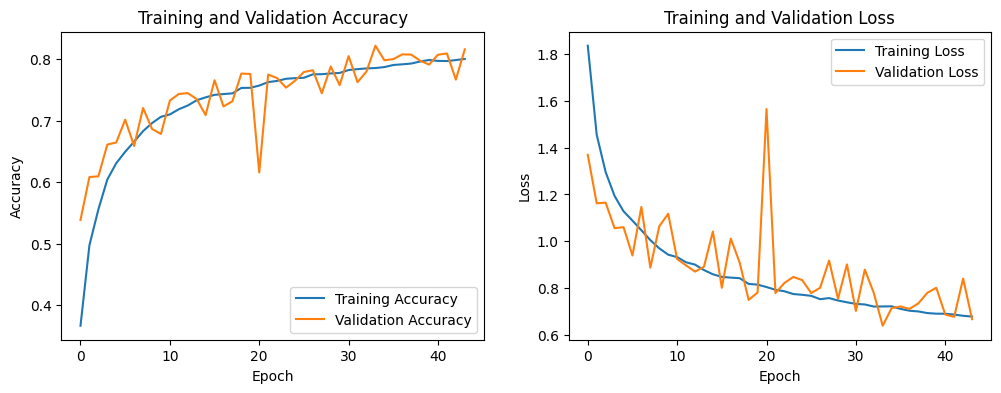

In [8]:

# Step 8: Plot Training and Validation Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [9]:
# Step 9: Make Predictions (with correct preprocessing)
sample_images, sample_labels = next(test_generator)  # 從 test_generator 拿一 batch
sample_images = sample_images[:5]
sample_labels = sample_labels[:5]

predictions = model.predict(sample_images)
for i in range(5):
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[sample_labels[i][0]]
    print(f"Image {i+1}: Predicted: {predicted_label}, True: {true_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Image 1: Predicted: bird, True: airplane
Image 2: Predicted: airplane, True: airplane
Image 3: Predicted: frog, True: frog
Image 4: Predicted: truck, True: truck
Image 5: Predicted: automobile, True: automobile


In [10]:
# Step 10: Save Model Performance for Autograding
# This cell saves the model performance to a text file for GitHub Actions
try:
    # Get final training accuracy
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    # Create performance summary
    performance_text = f"""Model Performance Summary:
Test Accuracy: {test_acc:.4f}
Test Loss: {test_loss:.4f}
Final Training Accuracy: {final_train_acc:.4f}
Final Validation Accuracy: {final_val_acc:.4f}
Final Training Loss: {final_train_loss:.4f}
Final Validation Loss: {final_val_loss:.4f}
Training Epochs: {len(history.history['accuracy'])}
Model Parameters: {model.count_params()}"""

    # Save to file for GitHub Actions
    with open('model_accuracy.txt', 'w') as f:
        f.write(performance_text)

    print("Model performance saved to model_accuracy.txt")
    print(performance_text)

except Exception as e:
    print(f"Error saving model performance: {e}")
    # Create a basic file even if there's an error
    with open('model_accuracy.txt', 'w') as f:
        f.write(f"Model execution completed with errors: {e}")

Model performance saved to model_accuracy.txt
Model Performance Summary:
Test Accuracy: 0.8215
Test Loss: 0.6392
Final Training Accuracy: 0.8000
Final Validation Accuracy: 0.8156
Final Training Loss: 0.6783
Final Validation Loss: 0.6671
Training Epochs: 44
Model Parameters: 1153514


# Task 5: Report
## 實驗結果:
Model Performance Summary:
Test Accuracy: 0.8306
Test Loss: 0.6215
Final Training Accuracy: 0.8087
Final Validation Accuracy: 0.8137
Final Training Loss: 0.6535
Final Validation Loss: 0.6546
Training Epochs: 47
Model Parameters: 1153514
## 說明
此資料集為cifar10資料集，總共50000筆資料，大小為32*32，顏色為3(rgb)
一開始利用ImageDataGenerator作為資料集擴增的手段，利用
'''          
rotation_range=15   隨機旋轉 ±15 度     
width_shift_range=0.1    水平方向隨機移動最多 ±10% 的寬度
height_shift_range=0.1   垂直方向隨機移動最多 ±10% 的高度
horizontal_flip=True     鏡像
'''
提升泛化能力，解決overfitting

網路層設計:
參考文獻網路層設計，利用一層轉置層加正規化(batchnorm)，重複兩次再加一次maxpooling的設計(vgg)，加深網路層數(總六層)
激發函數選擇relu避免overfitting，filter size 都設置為(3,3)
再經過flatten+full connect network，作為cnn完成分類任務
```
#Conv Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
#Conv Layer 2
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
#Conv Layer 3
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),

#Conv Layer 4
    layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),

#Dense Layer 1
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    # Output Layer
    layers.Dense(10, activation='softmax')
```
本來以regulization作為提升泛化能力避免overfitting的手段，但結果不如預期，且不如使用batchnorm的結果
接下來使用early stop作為避免overfitting的手段，使停在最好的參數
```
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)
```
利用觀察val_accuracy，如在10epoch內沒有提升，則停下訓練，並回到最佳參數的位置

參數設定:
```
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=100,
    callbacks=[early_stop]
)
```
使用資料擴增後的資料訓練，並設定訓練100圈，並且停在最佳參數避免overfitting
